In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from autoencoder import NonLinearAutoencoder
from solver import train_vali_all_epochs, nl_dev_train_vali_all_epochs, test

In [2]:
# MNIST normalisation
transform = transforms.Compose([
    transforms.ToTensor(),  
    transforms.Normalize((0.1307,), (0.3081,))
])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_size = int(len(mnist_train) * 0.8)
validation_size = len(mnist_train) - train_size
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train, [train_size, validation_size])

batch_size = 128
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=6)
validation_loader = DataLoader(mnist_val, batch_size=batch_size, shuffle=False, num_workers=6)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=6)

In [3]:
save_path = os.getenv("HOME") + '/mnist_model/'

In [4]:
def train_sae(save_path):
    sae_model = NonLinearAutoencoder(n_input=784, n_hidden_ls=[512, 128, 32], n_layers=3)
    sae_optimizer = torch.optim.SGD(sae_model.parameters(), lr=0.1, momentum=0.9)

    sae_train_loss, sae_validation_loss = train_vali_all_epochs(
        sae_model, 
        train_loader, 
        validation_loader, 
        sae_optimizer, 
        n_epochs=60, 
        device=torch.device('cuda'), 
        save_path=save_path+'/'
        )
    
    return sae_model, sae_train_loss, sae_validation_loss

In [5]:
def train_dae(save_path):
    dae_model = NonLinearAutoencoder(n_input=784, n_hidden_ls=[512, 128, 32], n_layers=3)
    dae_optimizer = torch.optim.SGD(dae_model.parameters(), lr=0.1, momentum=0.9)

    size_ls = [4, 4, 4, 4, 4, 10,
            10, 10, 10, 10, 16, 16,
            16, 16, 16, 16, 16, 24,
            24, 24, 24, 24, 24, 24, 
            32, 32, 32, 32, 32, 32,
            32, 32, 32, 32, 32, 32, 
            32, 32, 32, 32, 32, 32, 
            32, 32, 32, 32, 32, 32, 
            32, 32]

    manner = 'cell_division'

    dae_train_loss, dae_validation_loss = nl_dev_train_vali_all_epochs(
        dae_model, 
        size_ls,
        manner,
        train_loader,
        validation_loader, 
        dae_optimizer, 
        n_epochs=60,
        device=torch.device('cpu'), 
        save_path=save_path+'/'
        )
    
    return dae_model, dae_train_loss, dae_validation_loss

In [12]:
def continue_train_sae(save_path, sae_model):
    sae_optimizer = torch.optim.SGD(sae_model.parameters(), lr=0.1, momentum=0.9)

    sae_train_loss, sae_validation_loss = train_vali_all_epochs(
        sae_model, 
        train_loader, 
        validation_loader, 
        sae_optimizer, 
        n_epochs=10, 
        device=torch.device('cuda'), 
        save_path=save_path+'/'
        )
    
    return sae_model, sae_train_loss, sae_validation_loss

In [16]:
sae_train_loss_all = np.load('/home/david/mnist_models_test/sae/0/' + 'all_train_losses.npy')
# find mean of each epoch
sae_train_loss_mean = np.mean(sae_train_loss_all, axis=1)
print(sae_train_loss_mean)

[0.14746012 0.13868285 0.13357097 0.12961896 0.12632983 0.12348603
 0.12101461 0.11876016 0.11672813 0.11484088]


In [7]:
save_path = os.getenv("HOME") + '/mnist_model/'
num_models = 10
for i in range(num_models):
    # save_path looks like: /home/david/mnist_models/model_type/iteration/'
    base_dir = save_path
    
    sae_path = os.path.join(base_dir, "sae", str(i+40))
    dae_path = os.path.join(base_dir, "dae", str(i+40))

    train_sae(sae_path)
    train_dae(dae_path)

Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.002928: 100%|██████████| 375/375 [00:01<00:00, 189.87it/s]

====> Epoch: 0 Average loss: 0.5897


====> Test set loss: 0.3990
Directory created: /home/david/mnist_model/sae/20/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002209: 100%|██████████| 375/375 [00:01<00:00, 191.08it/s]


====> Epoch: 1 Average loss: 0.3384
====> Test set loss: 0.2943
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.002007: 100%|██████████| 375/375 [00:02<00:00, 183.04it/s]

====> Epoch: 2 Average loss: 0.2663


====> Test set loss: 0.2450
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001663: 100%|██████████| 375/375 [00:01<00:00, 187.74it/s]


====> Epoch: 3 Average loss: 0.2279
====> Test set loss: 0.2137
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001420: 100%|██████████| 375/375 [00:01<00:00, 196.91it/s]


====> Epoch: 4 Average loss: 0.2046
====> Test set loss: 0.1964
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001396: 100%|██████████| 375/375 [00:01<00:00, 194.86it/s]

====> Epoch: 5 Average loss: 0.1905


====> Test set loss: 0.1860
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001372: 100%|██████████| 375/375 [00:01<00:00, 190.32it/s]


====> Epoch: 6 Average loss: 0.1797
====> Test set loss: 0.1787
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001368: 100%|██████████| 375/375 [00:01<00:00, 192.65it/s]

====> Epoch: 7 Average loss: 0.1716


====> Test set loss: 0.1690
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001221: 100%|██████████| 375/375 [00:02<00:00, 185.96it/s]


====> Epoch: 8 Average loss: 0.1649
====> Test set loss: 0.1628
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001271: 100%|██████████| 375/375 [00:02<00:00, 187.31it/s]


====> Epoch: 9 Average loss: 0.1596
====> Test set loss: 0.1590
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001121: 100%|██████████| 375/375 [00:02<00:00, 182.81it/s]


====> Epoch: 10 Average loss: 0.1551
====> Test set loss: 0.1550
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001087: 100%|██████████| 375/375 [00:01<00:00, 190.59it/s]


====> Epoch: 11 Average loss: 0.1508
====> Test set loss: 0.1497
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001037: 100%|██████████| 375/375 [00:02<00:00, 185.27it/s]

====> Epoch: 12 Average loss: 0.1474


====> Test set loss: 0.1474
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001122: 100%|██████████| 375/375 [00:02<00:00, 186.90it/s]


====> Epoch: 13 Average loss: 0.1442
====> Test set loss: 0.1443
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001135: 100%|██████████| 375/375 [00:02<00:00, 184.18it/s]


====> Epoch: 14 Average loss: 0.1412
====> Test set loss: 0.1413
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001046: 100%|██████████| 375/375 [00:02<00:00, 181.30it/s]

====> Epoch: 15 Average loss: 0.1386


====> Test set loss: 0.1395
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001074: 100%|██████████| 375/375 [00:02<00:00, 180.37it/s]

====> Epoch: 16 Average loss: 0.1361


====> Test set loss: 0.1368
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001012: 100%|██████████| 375/375 [00:02<00:00, 180.87it/s]


====> Epoch: 17 Average loss: 0.1335
====> Test set loss: 0.1354
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001109: 100%|██████████| 375/375 [00:02<00:00, 183.38it/s]


====> Epoch: 18 Average loss: 0.1312
====> Test set loss: 0.1317
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001014: 100%|██████████| 375/375 [00:02<00:00, 181.69it/s]


====> Epoch: 19 Average loss: 0.1290
====> Test set loss: 0.1298
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001012: 100%|██████████| 375/375 [00:02<00:00, 177.80it/s]


====> Epoch: 20 Average loss: 0.1270
====> Test set loss: 0.1279
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000954: 100%|██████████| 375/375 [00:02<00:00, 174.78it/s]

====> Epoch: 21 Average loss: 0.1251


====> Test set loss: 0.1264
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000993: 100%|██████████| 375/375 [00:02<00:00, 181.05it/s]


====> Epoch: 22 Average loss: 0.1234
====> Test set loss: 0.1251
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000952: 100%|██████████| 375/375 [00:02<00:00, 175.52it/s]

====> Epoch: 23 Average loss: 0.1219


====> Test set loss: 0.1225
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000926: 100%|██████████| 375/375 [00:02<00:00, 177.28it/s]


====> Epoch: 24 Average loss: 0.1205
====> Test set loss: 0.1218
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000939: 100%|██████████| 375/375 [00:02<00:00, 174.17it/s]


====> Epoch: 25 Average loss: 0.1192
====> Test set loss: 0.1202
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000943: 100%|██████████| 375/375 [00:02<00:00, 178.37it/s]

====> Epoch: 26 Average loss: 0.1180


====> Test set loss: 0.1210
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000923: 100%|██████████| 375/375 [00:02<00:00, 178.20it/s]

====> Epoch: 27 Average loss: 0.1168


====> Test set loss: 0.1183
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000885: 100%|██████████| 375/375 [00:02<00:00, 173.50it/s]

====> Epoch: 28 Average loss: 0.1158


====> Test set loss: 0.1174
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000956: 100%|██████████| 375/375 [00:02<00:00, 171.56it/s]

====> Epoch: 29 Average loss: 0.1145


====> Test set loss: 0.1162
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000909: 100%|██████████| 375/375 [00:02<00:00, 178.72it/s]


====> Epoch: 30 Average loss: 0.1137
====> Test set loss: 0.1152
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000953: 100%|██████████| 375/375 [00:02<00:00, 177.59it/s]

====> Epoch: 31 Average loss: 0.1129


====> Test set loss: 0.1146
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000821: 100%|██████████| 375/375 [00:02<00:00, 168.38it/s]


====> Epoch: 32 Average loss: 0.1121
====> Test set loss: 0.1137
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000879: 100%|██████████| 375/375 [00:02<00:00, 174.41it/s]

====> Epoch: 33 Average loss: 0.1112


====> Test set loss: 0.1130
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000827: 100%|██████████| 375/375 [00:02<00:00, 176.02it/s]


====> Epoch: 34 Average loss: 0.1104
====> Test set loss: 0.1126
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000895: 100%|██████████| 375/375 [00:02<00:00, 177.55it/s]


====> Epoch: 35 Average loss: 0.1096
====> Test set loss: 0.1118
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000812: 100%|██████████| 375/375 [00:02<00:00, 177.71it/s]


====> Epoch: 36 Average loss: 0.1088
====> Test set loss: 0.1112
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000911: 100%|██████████| 375/375 [00:02<00:00, 178.17it/s]


====> Epoch: 37 Average loss: 0.1082
====> Test set loss: 0.1109
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000834: 100%|██████████| 375/375 [00:02<00:00, 179.82it/s]

====> Epoch: 38 Average loss: 0.1076


====> Test set loss: 0.1096
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000844: 100%|██████████| 375/375 [00:02<00:00, 171.56it/s]

====> Epoch: 39 Average loss: 0.1071


====> Test set loss: 0.1088
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000788: 100%|██████████| 375/375 [00:02<00:00, 182.12it/s]


====> Epoch: 40 Average loss: 0.1064
====> Test set loss: 0.1082
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000820: 100%|██████████| 375/375 [00:02<00:00, 181.09it/s]

====> Epoch: 41 Average loss: 0.1058


====> Test set loss: 0.1089
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000817: 100%|██████████| 375/375 [00:02<00:00, 179.64it/s]

====> Epoch: 42 Average loss: 0.1054


====> Test set loss: 0.1080
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000809: 100%|██████████| 375/375 [00:02<00:00, 177.75it/s]


====> Epoch: 43 Average loss: 0.1049
====> Test set loss: 0.1073
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000830: 100%|██████████| 375/375 [00:02<00:00, 172.00it/s]


====> Epoch: 44 Average loss: 0.1043
====> Test set loss: 0.1068
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000827: 100%|██████████| 375/375 [00:02<00:00, 176.97it/s]

====> Epoch: 45 Average loss: 0.1039


====> Test set loss: 0.1068
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000795: 100%|██████████| 375/375 [00:02<00:00, 174.29it/s]


====> Epoch: 46 Average loss: 0.1035
====> Test set loss: 0.1059
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000779: 100%|██████████| 375/375 [00:02<00:00, 173.53it/s]


====> Epoch: 47 Average loss: 0.1029
====> Test set loss: 0.1052
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000770: 100%|██████████| 375/375 [00:02<00:00, 179.88it/s]


====> Epoch: 48 Average loss: 0.1025
====> Test set loss: 0.1054
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000798: 100%|██████████| 375/375 [00:02<00:00, 178.89it/s]


====> Epoch: 49 Average loss: 0.1019
====> Test set loss: 0.1052
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000834: 100%|██████████| 375/375 [00:02<00:00, 175.59it/s]


====> Epoch: 50 Average loss: 0.1012
====> Test set loss: 0.1039
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000764: 100%|██████████| 375/375 [00:02<00:00, 173.01it/s]

====> Epoch: 51 Average loss: 0.1006


====> Test set loss: 0.1035
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000780: 100%|██████████| 375/375 [00:02<00:00, 166.27it/s]


====> Epoch: 52 Average loss: 0.1001
====> Test set loss: 0.1026
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000809: 100%|██████████| 375/375 [00:02<00:00, 171.77it/s]

====> Epoch: 53 Average loss: 0.0996


====> Test set loss: 0.1025
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000748: 100%|██████████| 375/375 [00:02<00:00, 175.09it/s]

====> Epoch: 54 Average loss: 0.0990


====> Test set loss: 0.1018
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000796: 100%|██████████| 375/375 [00:02<00:00, 178.34it/s]


====> Epoch: 55 Average loss: 0.0985
====> Test set loss: 0.1008
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000847: 100%|██████████| 375/375 [00:02<00:00, 177.46it/s]


====> Epoch: 56 Average loss: 0.0980
====> Test set loss: 0.1004
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000712: 100%|██████████| 375/375 [00:02<00:00, 172.65it/s]


====> Epoch: 57 Average loss: 0.0977
====> Test set loss: 0.1003
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000706: 100%|██████████| 375/375 [00:02<00:00, 176.33it/s]

====> Epoch: 58 Average loss: 0.0972


====> Test set loss: 0.1000
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000743: 100%|██████████| 375/375 [00:02<00:00, 170.90it/s]


====> Epoch: 59 Average loss: 0.0969
====> Test set loss: 0.0993
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/20/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007818: 100%|██████████| 375/375 [00:03<00:00, 102.28it/s]

====> Epoch: 0 Average loss: 1.0049


====> Test set loss: 1.0067
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.003815: 100%|██████████| 375/375 [00:03<00:00, 95.34it/s] 

====> Epoch: 1 Average loss: 0.5995


====> Test set loss: 0.4838
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003280: 100%|██████████| 375/375 [00:04<00:00, 91.82it/s]

====> Epoch: 2 Average loss: 0.4502


====> Test set loss: 0.4254
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003300: 100%|██████████| 375/375 [00:04<00:00, 92.87it/s]

====> Epoch: 3 Average loss: 0.4089


====> Test set loss: 0.3984
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.002820: 100%|██████████| 375/375 [00:03<00:00, 93.85it/s]

====> Epoch: 4 Average loss: 0.3862


====> Test set loss: 0.3807
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002856: 100%|██████████| 375/375 [00:03<00:00, 95.13it/s] 


====> Epoch: 5 Average loss: 0.4622
====> Test set loss: 0.3684
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002593: 100%|██████████| 375/375 [00:04<00:00, 93.70it/s]


====> Epoch: 6 Average loss: 0.3458
====> Test set loss: 0.3321
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002447: 100%|██████████| 375/375 [00:04<00:00, 93.49it/s]

====> Epoch: 7 Average loss: 0.3207


====> Test set loss: 0.3137
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002237: 100%|██████████| 375/375 [00:03<00:00, 95.79it/s] 

====> Epoch: 8 Average loss: 0.3062


====> Test set loss: 0.3015
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002278: 100%|██████████| 375/375 [00:03<00:00, 95.35it/s]

====> Epoch: 9 Average loss: 0.2929


====> Test set loss: 0.2883
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002136: 100%|██████████| 375/375 [00:03<00:00, 96.52it/s]

====> Epoch: 10 Average loss: 0.2866


====> Test set loss: 0.2780
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001896: 100%|██████████| 375/375 [00:04<00:00, 92.86it/s] 

====> Epoch: 11 Average loss: 0.2706


====> Test set loss: 0.2656
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001958: 100%|██████████| 375/375 [00:03<00:00, 95.00it/s]


====> Epoch: 12 Average loss: 0.2563
====> Test set loss: 0.2503
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001706: 100%|██████████| 375/375 [00:04<00:00, 91.32it/s]

====> Epoch: 13 Average loss: 0.2404


====> Test set loss: 0.2359
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001690: 100%|██████████| 375/375 [00:03<00:00, 94.96it/s] 

====> Epoch: 14 Average loss: 0.2271


====> Test set loss: 0.2241
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001599: 100%|██████████| 375/375 [00:03<00:00, 93.76it/s] 

====> Epoch: 15 Average loss: 0.2171


====> Test set loss: 0.2146
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001539: 100%|██████████| 375/375 [00:03<00:00, 95.26it/s] 

====> Epoch: 16 Average loss: 0.2090


====> Test set loss: 0.2076
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001548: 100%|██████████| 375/375 [00:04<00:00, 91.44it/s]

====> Epoch: 17 Average loss: 0.2229


====> Test set loss: 0.2037
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001508: 100%|██████████| 375/375 [00:03<00:00, 98.43it/s] 

====> Epoch: 18 Average loss: 0.1986


====> Test set loss: 0.1981
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001488: 100%|██████████| 375/375 [00:03<00:00, 94.70it/s]


====> Epoch: 19 Average loss: 0.1925
====> Test set loss: 0.1919
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001439: 100%|██████████| 375/375 [00:04<00:00, 93.17it/s]

====> Epoch: 20 Average loss: 0.1874


====> Test set loss: 0.1867
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001405: 100%|██████████| 375/375 [00:04<00:00, 93.30it/s]

====> Epoch: 21 Average loss: 0.1824


====> Test set loss: 0.1829
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001369: 100%|██████████| 375/375 [00:03<00:00, 96.13it/s]

====> Epoch: 22 Average loss: 0.1775


====> Test set loss: 0.1772
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001325: 100%|██████████| 375/375 [00:04<00:00, 92.76it/s]


====> Epoch: 23 Average loss: 0.1727
====> Test set loss: 0.1734
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001273: 100%|██████████| 375/375 [00:04<00:00, 85.65it/s]


====> Epoch: 24 Average loss: 0.1871
====> Test set loss: 0.1701
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001290: 100%|██████████| 375/375 [00:04<00:00, 93.21it/s]

====> Epoch: 25 Average loss: 0.1653


====> Test set loss: 0.1657
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001335: 100%|██████████| 375/375 [00:03<00:00, 94.41it/s]


====> Epoch: 26 Average loss: 0.1611
====> Test set loss: 0.1616
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001242: 100%|██████████| 375/375 [00:03<00:00, 94.82it/s]


====> Epoch: 27 Average loss: 0.1572
====> Test set loss: 0.1577
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001168: 100%|██████████| 375/375 [00:04<00:00, 90.40it/s]

====> Epoch: 28 Average loss: 0.1536


====> Test set loss: 0.1558
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001194: 100%|██████████| 375/375 [00:04<00:00, 93.43it/s]

====> Epoch: 29 Average loss: 0.1502


====> Test set loss: 0.1511
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001136: 100%|██████████| 375/375 [00:03<00:00, 94.34it/s] 

====> Epoch: 30 Average loss: 0.1465


====> Test set loss: 0.1473
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001200: 100%|██████████| 375/375 [00:03<00:00, 94.66it/s]

====> Epoch: 31 Average loss: 0.1432


====> Test set loss: 0.1439
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.001134: 100%|██████████| 375/375 [00:03<00:00, 94.78it/s]

====> Epoch: 32 Average loss: 0.1400


====> Test set loss: 0.1416
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.001013: 100%|██████████| 375/375 [00:03<00:00, 94.24it/s] 

====> Epoch: 33 Average loss: 0.1373


====> Test set loss: 0.1389
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.001017: 100%|██████████| 375/375 [00:04<00:00, 85.95it/s]

====> Epoch: 34 Average loss: 0.1347


====> Test set loss: 0.1358
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.001047: 100%|██████████| 375/375 [00:03<00:00, 94.62it/s]


====> Epoch: 35 Average loss: 0.1319
====> Test set loss: 0.1332
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.001008: 100%|██████████| 375/375 [00:03<00:00, 94.19it/s]

====> Epoch: 36 Average loss: 0.1297


====> Test set loss: 0.1320
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000994: 100%|██████████| 375/375 [00:04<00:00, 93.47it/s] 

====> Epoch: 37 Average loss: 0.1273


====> Test set loss: 0.1292
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000986: 100%|██████████| 375/375 [00:04<00:00, 91.74it/s]

====> Epoch: 38 Average loss: 0.1253


====> Test set loss: 0.1270
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000933: 100%|██████████| 375/375 [00:03<00:00, 94.41it/s]

====> Epoch: 39 Average loss: 0.1233


====> Test set loss: 0.1242
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000865: 100%|██████████| 375/375 [00:04<00:00, 88.99it/s]

====> Epoch: 40 Average loss: 0.1215


====> Test set loss: 0.1230
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000957: 100%|██████████| 375/375 [00:04<00:00, 91.91it/s]

====> Epoch: 41 Average loss: 0.1198


====> Test set loss: 0.1218
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000924: 100%|██████████| 375/375 [00:04<00:00, 92.91it/s]

====> Epoch: 42 Average loss: 0.1182


====> Test set loss: 0.1198
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000898: 100%|██████████| 375/375 [00:03<00:00, 95.51it/s]

====> Epoch: 43 Average loss: 0.1168


====> Test set loss: 0.1190
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000871: 100%|██████████| 375/375 [00:04<00:00, 90.41it/s]


====> Epoch: 44 Average loss: 0.1154
====> Test set loss: 0.1175
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000926: 100%|██████████| 375/375 [00:04<00:00, 92.26it/s]


====> Epoch: 45 Average loss: 0.1143
====> Test set loss: 0.1163
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000829: 100%|██████████| 375/375 [00:03<00:00, 96.16it/s]

====> Epoch: 46 Average loss: 0.1129


====> Test set loss: 0.1150
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000954: 100%|██████████| 375/375 [00:04<00:00, 93.49it/s] 


====> Epoch: 47 Average loss: 0.1118
====> Test set loss: 0.1138
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000879: 100%|██████████| 375/375 [00:04<00:00, 92.85it/s]

====> Epoch: 48 Average loss: 0.1106


====> Test set loss: 0.1142
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000939: 100%|██████████| 375/375 [00:03<00:00, 94.05it/s]

====> Epoch: 49 Average loss: 0.1098


====> Test set loss: 0.1123
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000875: 100%|██████████| 375/375 [00:04<00:00, 93.58it/s]


====> Epoch: 50 Average loss: 0.1086
====> Test set loss: 0.1112
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000824: 100%|██████████| 375/375 [00:04<00:00, 90.10it/s] 

====> Epoch: 51 Average loss: 0.1073


====> Test set loss: 0.1102
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000910: 100%|██████████| 375/375 [00:03<00:00, 95.13it/s]


====> Epoch: 52 Average loss: 0.1065
====> Test set loss: 0.1096
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000785: 100%|██████████| 375/375 [00:04<00:00, 91.99it/s]

====> Epoch: 53 Average loss: 0.1054


====> Test set loss: 0.1082
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000773: 100%|██████████| 375/375 [00:04<00:00, 93.67it/s] 


====> Epoch: 54 Average loss: 0.1045
====> Test set loss: 0.1078
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000870: 100%|██████████| 375/375 [00:04<00:00, 93.30it/s]

====> Epoch: 55 Average loss: 0.1040


====> Test set loss: 0.1067
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000779: 100%|██████████| 375/375 [00:04<00:00, 92.13it/s]

====> Epoch: 56 Average loss: 0.1029


====> Test set loss: 0.1061
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000768: 100%|██████████| 375/375 [00:04<00:00, 92.38it/s]

====> Epoch: 57 Average loss: 0.1021


====> Test set loss: 0.1058
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000810: 100%|██████████| 375/375 [00:04<00:00, 93.52it/s] 


====> Epoch: 58 Average loss: 0.1014
====> Test set loss: 0.1035
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000781: 100%|██████████| 375/375 [00:04<00:00, 85.66it/s]

====> Epoch: 59 Average loss: 0.1005


====> Test set loss: 0.1025
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003033: 100%|██████████| 375/375 [00:02<00:00, 172.14it/s]


====> Epoch: 0 Average loss: 0.5837
====> Test set loss: 0.3937
Directory created: /home/david/mnist_model/sae/21/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002185: 100%|██████████| 375/375 [00:02<00:00, 168.96it/s]


====> Epoch: 1 Average loss: 0.3293
====> Test set loss: 0.2842
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001813: 100%|██████████| 375/375 [00:02<00:00, 165.50it/s]


====> Epoch: 2 Average loss: 0.2580
====> Test set loss: 0.2358
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001604: 100%|██████████| 375/375 [00:02<00:00, 169.37it/s]

====> Epoch: 3 Average loss: 0.2190


====> Test set loss: 0.2054
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001540: 100%|██████████| 375/375 [00:02<00:00, 174.12it/s]

====> Epoch: 4 Average loss: 0.1967


====> Test set loss: 0.1900
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001382: 100%|██████████| 375/375 [00:02<00:00, 171.03it/s]


====> Epoch: 5 Average loss: 0.1822
====> Test set loss: 0.1767
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001256: 100%|██████████| 375/375 [00:02<00:00, 165.41it/s]

====> Epoch: 6 Average loss: 0.1702


====> Test set loss: 0.1650
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001216: 100%|██████████| 375/375 [00:02<00:00, 167.81it/s]


====> Epoch: 7 Average loss: 0.1602
====> Test set loss: 0.1583
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001162: 100%|██████████| 375/375 [00:02<00:00, 164.36it/s]

====> Epoch: 8 Average loss: 0.1521


====> Test set loss: 0.1501
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001100: 100%|██████████| 375/375 [00:02<00:00, 166.32it/s]

====> Epoch: 9 Average loss: 0.1456


====> Test set loss: 0.1446
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001079: 100%|██████████| 375/375 [00:02<00:00, 168.74it/s]


====> Epoch: 10 Average loss: 0.1405
====> Test set loss: 0.1389
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001103: 100%|██████████| 375/375 [00:02<00:00, 171.48it/s]


====> Epoch: 11 Average loss: 0.1363
====> Test set loss: 0.1361
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001040: 100%|██████████| 375/375 [00:02<00:00, 167.62it/s]

====> Epoch: 12 Average loss: 0.1324


====> Test set loss: 0.1322
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001007: 100%|██████████| 375/375 [00:02<00:00, 158.08it/s]


====> Epoch: 13 Average loss: 0.1293
====> Test set loss: 0.1287
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001027: 100%|██████████| 375/375 [00:02<00:00, 170.29it/s]

====> Epoch: 14 Average loss: 0.1265


====> Test set loss: 0.1260
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001010: 100%|██████████| 375/375 [00:02<00:00, 168.07it/s]

====> Epoch: 15 Average loss: 0.1237


====> Test set loss: 0.1229
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000941: 100%|██████████| 375/375 [00:02<00:00, 166.39it/s]


====> Epoch: 16 Average loss: 0.1213
====> Test set loss: 0.1209
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000860: 100%|██████████| 375/375 [00:02<00:00, 173.42it/s]

====> Epoch: 17 Average loss: 0.1191


====> Test set loss: 0.1200
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000973: 100%|██████████| 375/375 [00:02<00:00, 172.45it/s]

====> Epoch: 18 Average loss: 0.1171


====> Test set loss: 0.1180
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000913: 100%|██████████| 375/375 [00:02<00:00, 173.72it/s]


====> Epoch: 19 Average loss: 0.1154
====> Test set loss: 0.1156
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000886: 100%|██████████| 375/375 [00:02<00:00, 168.33it/s]

====> Epoch: 20 Average loss: 0.1136


====> Test set loss: 0.1148
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000843: 100%|██████████| 375/375 [00:02<00:00, 170.37it/s]


====> Epoch: 21 Average loss: 0.1118
====> Test set loss: 0.1125
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000802: 100%|██████████| 375/375 [00:02<00:00, 166.80it/s]


====> Epoch: 22 Average loss: 0.1101
====> Test set loss: 0.1113
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000798: 100%|██████████| 375/375 [00:02<00:00, 168.75it/s]

====> Epoch: 23 Average loss: 0.1088


====> Test set loss: 0.1093
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000785: 100%|██████████| 375/375 [00:02<00:00, 176.34it/s]

====> Epoch: 24 Average loss: 0.1075


====> Test set loss: 0.1094
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000830: 100%|██████████| 375/375 [00:02<00:00, 166.48it/s]

====> Epoch: 25 Average loss: 0.1061


====> Test set loss: 0.1080
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000817: 100%|██████████| 375/375 [00:02<00:00, 170.79it/s]

====> Epoch: 26 Average loss: 0.1048


====> Test set loss: 0.1055
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000808: 100%|██████████| 375/375 [00:02<00:00, 165.58it/s]


====> Epoch: 27 Average loss: 0.1038
====> Test set loss: 0.1067
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000755: 100%|██████████| 375/375 [00:02<00:00, 167.06it/s]


====> Epoch: 28 Average loss: 0.1027
====> Test set loss: 0.1043
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000804: 100%|██████████| 375/375 [00:02<00:00, 164.83it/s]

====> Epoch: 29 Average loss: 0.1017


====> Test set loss: 0.1033
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000816: 100%|██████████| 375/375 [00:02<00:00, 168.82it/s]

====> Epoch: 30 Average loss: 0.1007


====> Test set loss: 0.1025
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000786: 100%|██████████| 375/375 [00:02<00:00, 170.11it/s]

====> Epoch: 31 Average loss: 0.1000


====> Test set loss: 0.1013
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000775: 100%|██████████| 375/375 [00:02<00:00, 170.15it/s]


====> Epoch: 32 Average loss: 0.0992
====> Test set loss: 0.1002
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000777: 100%|██████████| 375/375 [00:02<00:00, 166.74it/s]


====> Epoch: 33 Average loss: 0.0983
====> Test set loss: 0.0995
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000743: 100%|██████████| 375/375 [00:02<00:00, 169.16it/s]

====> Epoch: 34 Average loss: 0.0976


====> Test set loss: 0.0991
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000736: 100%|██████████| 375/375 [00:02<00:00, 162.74it/s]

====> Epoch: 35 Average loss: 0.0968


====> Test set loss: 0.0985
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000712: 100%|██████████| 375/375 [00:02<00:00, 168.64it/s]


====> Epoch: 36 Average loss: 0.0958
====> Test set loss: 0.0978
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000736: 100%|██████████| 375/375 [00:02<00:00, 164.98it/s]

====> Epoch: 37 Average loss: 0.0954


====> Test set loss: 0.0972
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000822: 100%|██████████| 375/375 [00:02<00:00, 163.00it/s]


====> Epoch: 38 Average loss: 0.0945
====> Test set loss: 0.0963
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000737: 100%|██████████| 375/375 [00:02<00:00, 168.00it/s]

====> Epoch: 39 Average loss: 0.0939


====> Test set loss: 0.0954
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000742: 100%|██████████| 375/375 [00:02<00:00, 158.85it/s]


====> Epoch: 40 Average loss: 0.0932
====> Test set loss: 0.0954
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000740: 100%|██████████| 375/375 [00:02<00:00, 163.43it/s]

====> Epoch: 41 Average loss: 0.0926


====> Test set loss: 0.0941
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000706: 100%|██████████| 375/375 [00:02<00:00, 164.64it/s]


====> Epoch: 42 Average loss: 0.0919
====> Test set loss: 0.0937
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000747: 100%|██████████| 375/375 [00:02<00:00, 165.47it/s]

====> Epoch: 43 Average loss: 0.0914


====> Test set loss: 0.0933
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000748: 100%|██████████| 375/375 [00:02<00:00, 170.05it/s]

====> Epoch: 44 Average loss: 0.0909


====> Test set loss: 0.0931
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000741: 100%|██████████| 375/375 [00:02<00:00, 168.35it/s]

====> Epoch: 45 Average loss: 0.0902


====> Test set loss: 0.0932
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000677: 100%|██████████| 375/375 [00:02<00:00, 165.29it/s]


====> Epoch: 46 Average loss: 0.0898
====> Test set loss: 0.0919
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000687: 100%|██████████| 375/375 [00:02<00:00, 160.13it/s]


====> Epoch: 47 Average loss: 0.0893
====> Test set loss: 0.0905
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000747: 100%|██████████| 375/375 [00:02<00:00, 164.87it/s]

====> Epoch: 48 Average loss: 0.0886


====> Test set loss: 0.0905
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000641: 100%|██████████| 375/375 [00:02<00:00, 163.85it/s]


====> Epoch: 49 Average loss: 0.0883
====> Test set loss: 0.0896
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000750: 100%|██████████| 375/375 [00:02<00:00, 162.17it/s]

====> Epoch: 50 Average loss: 0.0878


====> Test set loss: 0.0898
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000649: 100%|██████████| 375/375 [00:02<00:00, 168.97it/s]

====> Epoch: 51 Average loss: 0.0874


====> Test set loss: 0.0895
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000744: 100%|██████████| 375/375 [00:02<00:00, 169.60it/s]

====> Epoch: 52 Average loss: 0.0869


====> Test set loss: 0.0889
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000751: 100%|██████████| 375/375 [00:02<00:00, 162.17it/s]

====> Epoch: 53 Average loss: 0.0865


====> Test set loss: 0.0886
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000648: 100%|██████████| 375/375 [00:02<00:00, 162.25it/s]

====> Epoch: 54 Average loss: 0.0864


====> Test set loss: 0.0882
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000609: 100%|██████████| 375/375 [00:02<00:00, 165.62it/s]

====> Epoch: 55 Average loss: 0.0860


====> Test set loss: 0.0874
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000633: 100%|██████████| 375/375 [00:02<00:00, 158.22it/s]

====> Epoch: 56 Average loss: 0.0855


====> Test set loss: 0.0876
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000679: 100%|██████████| 375/375 [00:02<00:00, 165.56it/s]

====> Epoch: 57 Average loss: 0.0852


====> Test set loss: 0.0880
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000654: 100%|██████████| 375/375 [00:02<00:00, 168.49it/s]


====> Epoch: 58 Average loss: 0.0848
====> Test set loss: 0.0867
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000643: 100%|██████████| 375/375 [00:02<00:00, 169.07it/s]

====> Epoch: 59 Average loss: 0.0845


====> Test set loss: 0.0865
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/21/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007890: 100%|██████████| 375/375 [00:03<00:00, 98.80it/s] 

====> Epoch: 0 Average loss: 1.0015


====> Test set loss: 1.0033
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.004494: 100%|██████████| 375/375 [00:04<00:00, 89.19it/s]

====> Epoch: 1 Average loss: 0.6406


====> Test set loss: 0.5421
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003775: 100%|██████████| 375/375 [00:04<00:00, 88.28it/s]


====> Epoch: 2 Average loss: 0.5129
====> Test set loss: 0.4914
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003225: 100%|██████████| 375/375 [00:04<00:00, 89.94it/s]


====> Epoch: 3 Average loss: 0.4702
====> Test set loss: 0.4386
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003248: 100%|██████████| 375/375 [00:04<00:00, 86.94it/s]

====> Epoch: 4 Average loss: 0.4166


====> Test set loss: 0.4030
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.003230: 100%|██████████| 375/375 [00:04<00:00, 87.28it/s]


====> Epoch: 5 Average loss: 0.4917
====> Test set loss: 0.4167
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002913: 100%|██████████| 375/375 [00:04<00:00, 86.27it/s] 

====> Epoch: 6 Average loss: 0.3895


====> Test set loss: 0.3704
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002764: 100%|██████████| 375/375 [00:04<00:00, 92.87it/s]

====> Epoch: 7 Average loss: 0.3570


====> Test set loss: 0.3469
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002499: 100%|██████████| 375/375 [00:04<00:00, 89.83it/s] 

====> Epoch: 8 Average loss: 0.3341


====> Test set loss: 0.3241
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002407: 100%|██████████| 375/375 [00:04<00:00, 88.57it/s]

====> Epoch: 9 Average loss: 0.3127


====> Test set loss: 0.3035
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002214: 100%|██████████| 375/375 [00:04<00:00, 92.24it/s] 

====> Epoch: 10 Average loss: 0.2998


====> Test set loss: 0.2870
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002000: 100%|██████████| 375/375 [00:04<00:00, 91.22it/s]

====> Epoch: 11 Average loss: 0.2737


====> Test set loss: 0.2646
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001917: 100%|██████████| 375/375 [00:04<00:00, 88.62it/s]

====> Epoch: 12 Average loss: 0.2542


====> Test set loss: 0.2495
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001847: 100%|██████████| 375/375 [00:04<00:00, 90.26it/s]


====> Epoch: 13 Average loss: 0.2400
====> Test set loss: 0.2351
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001645: 100%|██████████| 375/375 [00:04<00:00, 91.45it/s] 

====> Epoch: 14 Average loss: 0.2264


====> Test set loss: 0.2221
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001727: 100%|██████████| 375/375 [00:03<00:00, 93.78it/s]

====> Epoch: 15 Average loss: 0.2147


====> Test set loss: 0.2119
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001638: 100%|██████████| 375/375 [00:04<00:00, 90.36it/s]


====> Epoch: 16 Average loss: 0.2055
====> Test set loss: 0.2037
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001492: 100%|██████████| 375/375 [00:04<00:00, 92.86it/s]

====> Epoch: 17 Average loss: 0.2096


====> Test set loss: 0.1975
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001468: 100%|██████████| 375/375 [00:03<00:00, 95.82it/s] 

====> Epoch: 18 Average loss: 0.1926


====> Test set loss: 0.1913
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001360: 100%|██████████| 375/375 [00:04<00:00, 93.54it/s]

====> Epoch: 19 Average loss: 0.1867


====> Test set loss: 0.1861
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001345: 100%|██████████| 375/375 [00:04<00:00, 91.80it/s]


====> Epoch: 20 Average loss: 0.1799
====> Test set loss: 0.1787
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001325: 100%|██████████| 375/375 [00:03<00:00, 94.96it/s] 

====> Epoch: 21 Average loss: 0.1731


====> Test set loss: 0.1726
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001287: 100%|██████████| 375/375 [00:04<00:00, 92.15it/s] 

====> Epoch: 22 Average loss: 0.1668


====> Test set loss: 0.1670
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001196: 100%|██████████| 375/375 [00:04<00:00, 92.16it/s] 

====> Epoch: 23 Average loss: 0.1615


====> Test set loss: 0.1605
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001222: 100%|██████████| 375/375 [00:03<00:00, 96.05it/s] 

====> Epoch: 24 Average loss: 0.1641


====> Test set loss: 0.1563
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001229: 100%|██████████| 375/375 [00:04<00:00, 80.81it/s]


====> Epoch: 25 Average loss: 0.1527
====> Test set loss: 0.1525
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001147: 100%|██████████| 375/375 [00:04<00:00, 92.74it/s] 

====> Epoch: 26 Average loss: 0.1485


====> Test set loss: 0.1485
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001043: 100%|██████████| 375/375 [00:04<00:00, 93.47it/s]


====> Epoch: 27 Average loss: 0.1449
====> Test set loss: 0.1456
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001141: 100%|██████████| 375/375 [00:03<00:00, 94.35it/s]

====> Epoch: 28 Average loss: 0.1413


====> Test set loss: 0.1413
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001101: 100%|██████████| 375/375 [00:04<00:00, 92.01it/s]


====> Epoch: 29 Average loss: 0.1379
====> Test set loss: 0.1380
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000975: 100%|██████████| 375/375 [00:04<00:00, 86.47it/s]

====> Epoch: 30 Average loss: 0.1346


====> Test set loss: 0.1358
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001055: 100%|██████████| 375/375 [00:04<00:00, 91.50it/s]

====> Epoch: 31 Average loss: 0.1313


====> Test set loss: 0.1318
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.001003: 100%|██████████| 375/375 [00:04<00:00, 93.03it/s] 

====> Epoch: 32 Average loss: 0.1284


====> Test set loss: 0.1292
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000946: 100%|██████████| 375/375 [00:04<00:00, 91.85it/s]

====> Epoch: 33 Average loss: 0.1255


====> Test set loss: 0.1261
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000904: 100%|██████████| 375/375 [00:03<00:00, 94.39it/s] 


====> Epoch: 34 Average loss: 0.1230
====> Test set loss: 0.1246
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000922: 100%|██████████| 375/375 [00:03<00:00, 93.80it/s]

====> Epoch: 35 Average loss: 0.1207


====> Test set loss: 0.1218
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000937: 100%|██████████| 375/375 [00:04<00:00, 89.37it/s]

====> Epoch: 36 Average loss: 0.1184


====> Test set loss: 0.1194
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000921: 100%|██████████| 375/375 [00:04<00:00, 91.13it/s]

====> Epoch: 37 Average loss: 0.1167


====> Test set loss: 0.1180
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000893: 100%|██████████| 375/375 [00:04<00:00, 92.42it/s] 

====> Epoch: 38 Average loss: 0.1147


====> Test set loss: 0.1165
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000936: 100%|██████████| 375/375 [00:04<00:00, 90.74it/s]

====> Epoch: 39 Average loss: 0.1129


====> Test set loss: 0.1145
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000893: 100%|██████████| 375/375 [00:03<00:00, 94.19it/s]

====> Epoch: 40 Average loss: 0.1113


====> Test set loss: 0.1123
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000843: 100%|██████████| 375/375 [00:04<00:00, 90.39it/s]

====> Epoch: 41 Average loss: 0.1097


====> Test set loss: 0.1116
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000838: 100%|██████████| 375/375 [00:04<00:00, 92.26it/s] 


====> Epoch: 42 Average loss: 0.1084
====> Test set loss: 0.1095
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000856: 100%|██████████| 375/375 [00:03<00:00, 95.15it/s] 

====> Epoch: 43 Average loss: 0.1071


====> Test set loss: 0.1099
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000850: 100%|██████████| 375/375 [00:04<00:00, 92.88it/s]

====> Epoch: 44 Average loss: 0.1058


====> Test set loss: 0.1078
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000794: 100%|██████████| 375/375 [00:04<00:00, 87.91it/s]


====> Epoch: 45 Average loss: 0.1046
====> Test set loss: 0.1069
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000769: 100%|██████████| 375/375 [00:04<00:00, 93.48it/s]

====> Epoch: 46 Average loss: 0.1035


====> Test set loss: 0.1057
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000823: 100%|██████████| 375/375 [00:03<00:00, 95.20it/s]

====> Epoch: 47 Average loss: 0.1026


====> Test set loss: 0.1047
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000779: 100%|██████████| 375/375 [00:04<00:00, 91.09it/s]

====> Epoch: 48 Average loss: 0.1015


====> Test set loss: 0.1029
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000798: 100%|██████████| 375/375 [00:04<00:00, 86.84it/s]

====> Epoch: 49 Average loss: 0.1007


====> Test set loss: 0.1024
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000855: 100%|██████████| 375/375 [00:04<00:00, 93.29it/s]


====> Epoch: 50 Average loss: 0.0999
====> Test set loss: 0.1023
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000781: 100%|██████████| 375/375 [00:04<00:00, 93.33it/s] 

====> Epoch: 51 Average loss: 0.0991


====> Test set loss: 0.1012
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000768: 100%|██████████| 375/375 [00:03<00:00, 94.40it/s] 

====> Epoch: 52 Average loss: 0.0982


====> Test set loss: 0.0999
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000772: 100%|██████████| 375/375 [00:04<00:00, 89.31it/s]

====> Epoch: 53 Average loss: 0.0975


====> Test set loss: 0.0998
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000786: 100%|██████████| 375/375 [00:04<00:00, 91.55it/s]

====> Epoch: 54 Average loss: 0.0968


====> Test set loss: 0.0989
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000720: 100%|██████████| 375/375 [00:04<00:00, 93.09it/s]

====> Epoch: 55 Average loss: 0.0961


====> Test set loss: 0.0983
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000725: 100%|██████████| 375/375 [00:03<00:00, 94.28it/s]

====> Epoch: 56 Average loss: 0.0954


====> Test set loss: 0.0981
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000717: 100%|██████████| 375/375 [00:04<00:00, 93.01it/s]

====> Epoch: 57 Average loss: 0.0949


====> Test set loss: 0.0965
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000669: 100%|██████████| 375/375 [00:04<00:00, 92.17it/s]

====> Epoch: 58 Average loss: 0.0943


====> Test set loss: 0.0964
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000779: 100%|██████████| 375/375 [00:04<00:00, 89.67it/s]


====> Epoch: 59 Average loss: 0.0938
====> Test set loss: 0.0957
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003149: 100%|██████████| 375/375 [00:02<00:00, 171.04it/s]


====> Epoch: 0 Average loss: 0.6035
====> Test set loss: 0.4111
Directory created: /home/david/mnist_model/sae/22/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002471: 100%|██████████| 375/375 [00:02<00:00, 170.46it/s]

====> Epoch: 1 Average loss: 0.3493


====> Test set loss: 0.2999
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001984: 100%|██████████| 375/375 [00:02<00:00, 172.71it/s]


====> Epoch: 2 Average loss: 0.2683
====> Test set loss: 0.2433
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001776: 100%|██████████| 375/375 [00:02<00:00, 164.75it/s]


====> Epoch: 3 Average loss: 0.2267
====> Test set loss: 0.2143
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001555: 100%|██████████| 375/375 [00:02<00:00, 167.21it/s]

====> Epoch: 4 Average loss: 0.2033


====> Test set loss: 0.1956
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001460: 100%|██████████| 375/375 [00:02<00:00, 174.56it/s]


====> Epoch: 5 Average loss: 0.1870
====> Test set loss: 0.1800
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001361: 100%|██████████| 375/375 [00:02<00:00, 169.34it/s]


====> Epoch: 6 Average loss: 0.1746
====> Test set loss: 0.1706
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001173: 100%|██████████| 375/375 [00:02<00:00, 170.52it/s]


====> Epoch: 7 Average loss: 0.1653
====> Test set loss: 0.1621
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001216: 100%|██████████| 375/375 [00:02<00:00, 170.33it/s]

====> Epoch: 8 Average loss: 0.1584


====> Test set loss: 0.1565
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001233: 100%|██████████| 375/375 [00:02<00:00, 166.15it/s]


====> Epoch: 9 Average loss: 0.1526
====> Test set loss: 0.1499
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001191: 100%|██████████| 375/375 [00:02<00:00, 163.25it/s]

====> Epoch: 10 Average loss: 0.1476


====> Test set loss: 0.1464
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001071: 100%|██████████| 375/375 [00:02<00:00, 170.23it/s]

====> Epoch: 11 Average loss: 0.1435


====> Test set loss: 0.1422
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001097: 100%|██████████| 375/375 [00:02<00:00, 176.82it/s]


====> Epoch: 12 Average loss: 0.1395
====> Test set loss: 0.1388
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001098: 100%|██████████| 375/375 [00:02<00:00, 170.24it/s]

====> Epoch: 13 Average loss: 0.1364


====> Test set loss: 0.1362
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001097: 100%|██████████| 375/375 [00:02<00:00, 169.82it/s]


====> Epoch: 14 Average loss: 0.1335
====> Test set loss: 0.1325
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001027: 100%|██████████| 375/375 [00:02<00:00, 169.92it/s]

====> Epoch: 15 Average loss: 0.1305


====> Test set loss: 0.1309
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001023: 100%|██████████| 375/375 [00:02<00:00, 169.44it/s]

====> Epoch: 16 Average loss: 0.1284


====> Test set loss: 0.1296
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000915: 100%|██████████| 375/375 [00:02<00:00, 164.04it/s]

====> Epoch: 17 Average loss: 0.1259


====> Test set loss: 0.1264
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000905: 100%|██████████| 375/375 [00:02<00:00, 171.62it/s]

====> Epoch: 18 Average loss: 0.1240


====> Test set loss: 0.1261
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000881: 100%|██████████| 375/375 [00:02<00:00, 167.33it/s]

====> Epoch: 19 Average loss: 0.1224


====> Test set loss: 0.1232
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000943: 100%|██████████| 375/375 [00:02<00:00, 172.81it/s]

====> Epoch: 20 Average loss: 0.1205


====> Test set loss: 0.1215
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000952: 100%|██████████| 375/375 [00:02<00:00, 166.02it/s]


====> Epoch: 21 Average loss: 0.1190
====> Test set loss: 0.1203
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000881: 100%|██████████| 375/375 [00:02<00:00, 160.89it/s]

====> Epoch: 22 Average loss: 0.1175


====> Test set loss: 0.1183
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000811: 100%|██████████| 375/375 [00:02<00:00, 167.10it/s]

====> Epoch: 23 Average loss: 0.1162


====> Test set loss: 0.1171
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000882: 100%|██████████| 375/375 [00:02<00:00, 164.48it/s]


====> Epoch: 24 Average loss: 0.1149
====> Test set loss: 0.1164
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000843: 100%|██████████| 375/375 [00:02<00:00, 166.53it/s]

====> Epoch: 25 Average loss: 0.1137


====> Test set loss: 0.1144
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000897: 100%|██████████| 375/375 [00:02<00:00, 167.47it/s]

====> Epoch: 26 Average loss: 0.1124


====> Test set loss: 0.1140
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000911: 100%|██████████| 375/375 [00:02<00:00, 166.02it/s]

====> Epoch: 27 Average loss: 0.1114


====> Test set loss: 0.1126
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000876: 100%|██████████| 375/375 [00:02<00:00, 166.84it/s]

====> Epoch: 28 Average loss: 0.1102


====> Test set loss: 0.1118
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000832: 100%|██████████| 375/375 [00:02<00:00, 164.44it/s]

====> Epoch: 29 Average loss: 0.1092


====> Test set loss: 0.1102
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000782: 100%|██████████| 375/375 [00:02<00:00, 161.48it/s]


====> Epoch: 30 Average loss: 0.1082
====> Test set loss: 0.1093
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000842: 100%|██████████| 375/375 [00:02<00:00, 167.06it/s]

====> Epoch: 31 Average loss: 0.1072


====> Test set loss: 0.1094
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000794: 100%|██████████| 375/375 [00:02<00:00, 167.89it/s]

====> Epoch: 32 Average loss: 0.1061


====> Test set loss: 0.1079
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000838: 100%|██████████| 375/375 [00:02<00:00, 165.15it/s]

====> Epoch: 33 Average loss: 0.1055


====> Test set loss: 0.1071
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000816: 100%|██████████| 375/375 [00:02<00:00, 166.08it/s]

====> Epoch: 34 Average loss: 0.1045


====> Test set loss: 0.1063
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000783: 100%|██████████| 375/375 [00:02<00:00, 164.19it/s]

====> Epoch: 35 Average loss: 0.1039


====> Test set loss: 0.1056
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000843: 100%|██████████| 375/375 [00:02<00:00, 166.24it/s]

====> Epoch: 36 Average loss: 0.1030


====> Test set loss: 0.1047
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000741: 100%|██████████| 375/375 [00:02<00:00, 156.88it/s]

====> Epoch: 37 Average loss: 0.1023


====> Test set loss: 0.1045
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000761: 100%|██████████| 375/375 [00:02<00:00, 162.36it/s]


====> Epoch: 38 Average loss: 0.1016
====> Test set loss: 0.1038
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000825: 100%|██████████| 375/375 [00:02<00:00, 168.49it/s]

====> Epoch: 39 Average loss: 0.1010


====> Test set loss: 0.1034
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000790: 100%|██████████| 375/375 [00:02<00:00, 162.81it/s]

====> Epoch: 40 Average loss: 0.1004


====> Test set loss: 0.1020
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000736: 100%|██████████| 375/375 [00:02<00:00, 162.66it/s]

====> Epoch: 41 Average loss: 0.0998


====> Test set loss: 0.1013
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000767: 100%|██████████| 375/375 [00:02<00:00, 164.74it/s]


====> Epoch: 42 Average loss: 0.0992
====> Test set loss: 0.1009
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000775: 100%|██████████| 375/375 [00:02<00:00, 163.96it/s]

====> Epoch: 43 Average loss: 0.0987


====> Test set loss: 0.1004
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000772: 100%|██████████| 375/375 [00:02<00:00, 154.83it/s]


====> Epoch: 44 Average loss: 0.0982
====> Test set loss: 0.1000
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000788: 100%|██████████| 375/375 [00:02<00:00, 163.54it/s]

====> Epoch: 45 Average loss: 0.0979


====> Test set loss: 0.1006
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000783: 100%|██████████| 375/375 [00:02<00:00, 164.93it/s]


====> Epoch: 46 Average loss: 0.0973
====> Test set loss: 0.0992
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000837: 100%|██████████| 375/375 [00:02<00:00, 166.12it/s]


====> Epoch: 47 Average loss: 0.0968
====> Test set loss: 0.0988
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000669: 100%|██████████| 375/375 [00:02<00:00, 162.10it/s]

====> Epoch: 48 Average loss: 0.0965


====> Test set loss: 0.0977
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000712: 100%|██████████| 375/375 [00:02<00:00, 160.97it/s]

====> Epoch: 49 Average loss: 0.0960


====> Test set loss: 0.0976
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000826: 100%|██████████| 375/375 [00:02<00:00, 158.92it/s]

====> Epoch: 50 Average loss: 0.0956


====> Test set loss: 0.0969
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000772: 100%|██████████| 375/375 [00:02<00:00, 162.13it/s]


====> Epoch: 51 Average loss: 0.0952
====> Test set loss: 0.0969
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000788: 100%|██████████| 375/375 [00:02<00:00, 157.73it/s]


====> Epoch: 52 Average loss: 0.0948
====> Test set loss: 0.0980
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000716: 100%|██████████| 375/375 [00:02<00:00, 167.49it/s]

====> Epoch: 53 Average loss: 0.0945


====> Test set loss: 0.0968
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000755: 100%|██████████| 375/375 [00:02<00:00, 165.71it/s]

====> Epoch: 54 Average loss: 0.0940


====> Test set loss: 0.0969
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000770: 100%|██████████| 375/375 [00:02<00:00, 161.29it/s]

====> Epoch: 55 Average loss: 0.0936


====> Test set loss: 0.0956
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000776: 100%|██████████| 375/375 [00:02<00:00, 161.31it/s]


====> Epoch: 56 Average loss: 0.0935
====> Test set loss: 0.0954
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000769: 100%|██████████| 375/375 [00:02<00:00, 153.50it/s]

====> Epoch: 57 Average loss: 0.0929


====> Test set loss: 0.0952
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000727: 100%|██████████| 375/375 [00:02<00:00, 165.96it/s]


====> Epoch: 58 Average loss: 0.0926
====> Test set loss: 0.0952
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000698: 100%|██████████| 375/375 [00:02<00:00, 162.13it/s]

====> Epoch: 59 Average loss: 0.0923


====> Test set loss: 0.0943
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/22/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007484: 100%|██████████| 375/375 [00:03<00:00, 100.36it/s]


====> Epoch: 0 Average loss: 1.0085
====> Test set loss: 1.0102
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.004086: 100%|██████████| 375/375 [00:04<00:00, 88.51it/s]


====> Epoch: 1 Average loss: 0.6097
====> Test set loss: 0.5101
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003628: 100%|██████████| 375/375 [00:04<00:00, 86.61it/s]

====> Epoch: 2 Average loss: 0.4814


====> Test set loss: 0.4619
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003575: 100%|██████████| 375/375 [00:04<00:00, 89.35it/s]

====> Epoch: 3 Average loss: 0.4487


====> Test set loss: 0.4401
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003352: 100%|██████████| 375/375 [00:04<00:00, 90.69it/s]


====> Epoch: 4 Average loss: 0.4301
====> Test set loss: 0.4260
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.003046: 100%|██████████| 375/375 [00:04<00:00, 90.75it/s]

====> Epoch: 5 Average loss: 0.4556


====> Test set loss: 0.3853
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002858: 100%|██████████| 375/375 [00:04<00:00, 88.10it/s]


====> Epoch: 6 Average loss: 0.3637
====> Test set loss: 0.3443
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002355: 100%|██████████| 375/375 [00:03<00:00, 94.90it/s] 


====> Epoch: 7 Average loss: 0.3281
====> Test set loss: 0.3185
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002362: 100%|██████████| 375/375 [00:04<00:00, 88.21it/s]

====> Epoch: 8 Average loss: 0.3075


====> Test set loss: 0.3018
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002435: 100%|██████████| 375/375 [00:04<00:00, 91.06it/s]

====> Epoch: 9 Average loss: 0.2936


====> Test set loss: 0.2893
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002152: 100%|██████████| 375/375 [00:03<00:00, 93.77it/s] 


====> Epoch: 10 Average loss: 0.2891
====> Test set loss: 0.2783
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002064: 100%|██████████| 375/375 [00:03<00:00, 94.08it/s]

====> Epoch: 11 Average loss: 0.2671


====> Test set loss: 0.2607
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001817: 100%|██████████| 375/375 [00:04<00:00, 92.39it/s]

====> Epoch: 12 Average loss: 0.2485


====> Test set loss: 0.2399
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001755: 100%|██████████| 375/375 [00:04<00:00, 93.53it/s]

====> Epoch: 13 Average loss: 0.2302


====> Test set loss: 0.2249
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001777: 100%|██████████| 375/375 [00:04<00:00, 90.47it/s]

====> Epoch: 14 Average loss: 0.2173


====> Test set loss: 0.2137
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001654: 100%|██████████| 375/375 [00:03<00:00, 95.22it/s]

====> Epoch: 15 Average loss: 0.2083


====> Test set loss: 0.2077
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001576: 100%|██████████| 375/375 [00:03<00:00, 93.86it/s]

====> Epoch: 16 Average loss: 0.2013


====> Test set loss: 0.2000
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001558: 100%|██████████| 375/375 [00:04<00:00, 92.28it/s]

====> Epoch: 17 Average loss: 0.2110


====> Test set loss: 0.1957
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001432: 100%|██████████| 375/375 [00:04<00:00, 93.57it/s]


====> Epoch: 18 Average loss: 0.1908
====> Test set loss: 0.1908
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001411: 100%|██████████| 375/375 [00:03<00:00, 96.11it/s] 


====> Epoch: 19 Average loss: 0.1853
====> Test set loss: 0.1848
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001424: 100%|██████████| 375/375 [00:03<00:00, 95.21it/s]

====> Epoch: 20 Average loss: 0.1793


====> Test set loss: 0.1795
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001405: 100%|██████████| 375/375 [00:03<00:00, 94.64it/s] 


====> Epoch: 21 Average loss: 0.1739
====> Test set loss: 0.1738
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001238: 100%|██████████| 375/375 [00:04<00:00, 92.91it/s]

====> Epoch: 22 Average loss: 0.1686


====> Test set loss: 0.1690
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001192: 100%|██████████| 375/375 [00:04<00:00, 90.20it/s]

====> Epoch: 23 Average loss: 0.1637


====> Test set loss: 0.1640
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001230: 100%|██████████| 375/375 [00:04<00:00, 92.78it/s]

====> Epoch: 24 Average loss: 0.1781


====> Test set loss: 0.1612
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001155: 100%|██████████| 375/375 [00:04<00:00, 89.50it/s]

====> Epoch: 25 Average loss: 0.1561


====> Test set loss: 0.1562
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001152: 100%|██████████| 375/375 [00:03<00:00, 94.23it/s]

====> Epoch: 26 Average loss: 0.1519


====> Test set loss: 0.1522
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001137: 100%|██████████| 375/375 [00:04<00:00, 92.74it/s] 


====> Epoch: 27 Average loss: 0.1481
====> Test set loss: 0.1495
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001125: 100%|██████████| 375/375 [00:03<00:00, 95.54it/s]

====> Epoch: 28 Average loss: 0.1444


====> Test set loss: 0.1453
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001087: 100%|██████████| 375/375 [00:04<00:00, 92.83it/s]


====> Epoch: 29 Average loss: 0.1409
====> Test set loss: 0.1422
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001050: 100%|██████████| 375/375 [00:04<00:00, 92.76it/s] 

====> Epoch: 30 Average loss: 0.1377


====> Test set loss: 0.1385
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001053: 100%|██████████| 375/375 [00:04<00:00, 93.00it/s]

====> Epoch: 31 Average loss: 0.1346


====> Test set loss: 0.1359
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000976: 100%|██████████| 375/375 [00:03<00:00, 95.60it/s] 


====> Epoch: 32 Average loss: 0.1314
====> Test set loss: 0.1325
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000931: 100%|██████████| 375/375 [00:03<00:00, 95.00it/s] 

====> Epoch: 33 Average loss: 0.1287


====> Test set loss: 0.1295
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000933: 100%|██████████| 375/375 [00:04<00:00, 93.49it/s]

====> Epoch: 34 Average loss: 0.1260


====> Test set loss: 0.1275
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000886: 100%|██████████| 375/375 [00:04<00:00, 92.24it/s]

====> Epoch: 35 Average loss: 0.1235


====> Test set loss: 0.1256
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000933: 100%|██████████| 375/375 [00:03<00:00, 94.17it/s]

====> Epoch: 36 Average loss: 0.1214


====> Test set loss: 0.1228
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000955: 100%|██████████| 375/375 [00:03<00:00, 94.28it/s]

====> Epoch: 37 Average loss: 0.1190


====> Test set loss: 0.1206
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000864: 100%|██████████| 375/375 [00:04<00:00, 92.52it/s]

====> Epoch: 38 Average loss: 0.1170


====> Test set loss: 0.1187
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000868: 100%|██████████| 375/375 [00:04<00:00, 92.02it/s]

====> Epoch: 39 Average loss: 0.1151


====> Test set loss: 0.1172
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000880: 100%|██████████| 375/375 [00:04<00:00, 92.76it/s] 

====> Epoch: 40 Average loss: 0.1131


====> Test set loss: 0.1152
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000884: 100%|██████████| 375/375 [00:04<00:00, 91.94it/s]

====> Epoch: 41 Average loss: 0.1118


====> Test set loss: 0.1138
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000860: 100%|██████████| 375/375 [00:03<00:00, 93.98it/s] 

====> Epoch: 42 Average loss: 0.1102


====> Test set loss: 0.1119
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000870: 100%|██████████| 375/375 [00:04<00:00, 90.75it/s]

====> Epoch: 43 Average loss: 0.1089


====> Test set loss: 0.1109
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000881: 100%|██████████| 375/375 [00:04<00:00, 92.34it/s] 

====> Epoch: 44 Average loss: 0.1075


====> Test set loss: 0.1097
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000817: 100%|██████████| 375/375 [00:04<00:00, 89.24it/s]

====> Epoch: 45 Average loss: 0.1063


====> Test set loss: 0.1089
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000787: 100%|██████████| 375/375 [00:04<00:00, 90.87it/s] 

====> Epoch: 46 Average loss: 0.1054


====> Test set loss: 0.1076
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000726: 100%|██████████| 375/375 [00:04<00:00, 91.48it/s]

====> Epoch: 47 Average loss: 0.1041


====> Test set loss: 0.1061
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000800: 100%|██████████| 375/375 [00:03<00:00, 94.78it/s]


====> Epoch: 48 Average loss: 0.1031
====> Test set loss: 0.1059
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000727: 100%|██████████| 375/375 [00:03<00:00, 93.96it/s]

====> Epoch: 49 Average loss: 0.1022


====> Test set loss: 0.1041
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000872: 100%|██████████| 375/375 [00:03<00:00, 94.95it/s] 


====> Epoch: 50 Average loss: 0.1012
====> Test set loss: 0.1035
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000782: 100%|██████████| 375/375 [00:03<00:00, 95.18it/s] 

====> Epoch: 51 Average loss: 0.1005


====> Test set loss: 0.1028
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000784: 100%|██████████| 375/375 [00:03<00:00, 94.67it/s]

====> Epoch: 52 Average loss: 0.0997


====> Test set loss: 0.1022
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000788: 100%|██████████| 375/375 [00:03<00:00, 95.72it/s]

====> Epoch: 53 Average loss: 0.0988


====> Test set loss: 0.1008
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000739: 100%|██████████| 375/375 [00:04<00:00, 90.53it/s]

====> Epoch: 54 Average loss: 0.0981


====> Test set loss: 0.1006
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000750: 100%|██████████| 375/375 [00:04<00:00, 93.30it/s]

====> Epoch: 55 Average loss: 0.0975


====> Test set loss: 0.0997
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000744: 100%|██████████| 375/375 [00:03<00:00, 94.97it/s]

====> Epoch: 56 Average loss: 0.0967


====> Test set loss: 0.0994
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000740: 100%|██████████| 375/375 [00:04<00:00, 93.45it/s]

====> Epoch: 57 Average loss: 0.0961


====> Test set loss: 0.0984
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000729: 100%|██████████| 375/375 [00:03<00:00, 93.81it/s] 

====> Epoch: 58 Average loss: 0.0955


====> Test set loss: 0.0984
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000763: 100%|██████████| 375/375 [00:04<00:00, 93.14it/s] 

====> Epoch: 59 Average loss: 0.0949


====> Test set loss: 0.0975
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003269: 100%|██████████| 375/375 [00:02<00:00, 178.84it/s]

====> Epoch: 0 Average loss: 0.5947


====> Test set loss: 0.4077
Directory created: /home/david/mnist_model/sae/23/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002274: 100%|██████████| 375/375 [00:02<00:00, 172.91it/s]


====> Epoch: 1 Average loss: 0.3461
====> Test set loss: 0.2994
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001939: 100%|██████████| 375/375 [00:02<00:00, 176.03it/s]


====> Epoch: 2 Average loss: 0.2692
====> Test set loss: 0.2487
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001658: 100%|██████████| 375/375 [00:02<00:00, 172.60it/s]

====> Epoch: 3 Average loss: 0.2338


====> Test set loss: 0.2226
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001631: 100%|██████████| 375/375 [00:02<00:00, 169.15it/s]

====> Epoch: 4 Average loss: 0.2110


====> Test set loss: 0.2038
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001519: 100%|██████████| 375/375 [00:02<00:00, 169.07it/s]

====> Epoch: 5 Average loss: 0.1965


====> Test set loss: 0.1918
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001351: 100%|██████████| 375/375 [00:02<00:00, 172.78it/s]

====> Epoch: 6 Average loss: 0.1859


====> Test set loss: 0.1822
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001452: 100%|██████████| 375/375 [00:02<00:00, 171.33it/s]

====> Epoch: 7 Average loss: 0.1767


====> Test set loss: 0.1750
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001277: 100%|██████████| 375/375 [00:02<00:00, 171.78it/s]


====> Epoch: 8 Average loss: 0.1693
====> Test set loss: 0.1671
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001284: 100%|██████████| 375/375 [00:02<00:00, 167.76it/s]

====> Epoch: 9 Average loss: 0.1633


====> Test set loss: 0.1616
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001282: 100%|██████████| 375/375 [00:02<00:00, 168.36it/s]

====> Epoch: 10 Average loss: 0.1583


====> Test set loss: 0.1568
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001176: 100%|██████████| 375/375 [00:02<00:00, 169.82it/s]

====> Epoch: 11 Average loss: 0.1538


====> Test set loss: 0.1532
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001114: 100%|██████████| 375/375 [00:02<00:00, 170.55it/s]


====> Epoch: 12 Average loss: 0.1499
====> Test set loss: 0.1500
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001115: 100%|██████████| 375/375 [00:02<00:00, 167.65it/s]

====> Epoch: 13 Average loss: 0.1463


====> Test set loss: 0.1463
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001064: 100%|██████████| 375/375 [00:02<00:00, 169.56it/s]


====> Epoch: 14 Average loss: 0.1428
====> Test set loss: 0.1432
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001130: 100%|██████████| 375/375 [00:02<00:00, 166.99it/s]

====> Epoch: 15 Average loss: 0.1393


====> Test set loss: 0.1399
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001074: 100%|██████████| 375/375 [00:02<00:00, 169.38it/s]

====> Epoch: 16 Average loss: 0.1365


====> Test set loss: 0.1367
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001020: 100%|██████████| 375/375 [00:02<00:00, 163.45it/s]


====> Epoch: 17 Average loss: 0.1342
====> Test set loss: 0.1351
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001053: 100%|██████████| 375/375 [00:02<00:00, 168.85it/s]


====> Epoch: 18 Average loss: 0.1319
====> Test set loss: 0.1326
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000983: 100%|██████████| 375/375 [00:02<00:00, 167.07it/s]


====> Epoch: 19 Average loss: 0.1298
====> Test set loss: 0.1306
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000982: 100%|██████████| 375/375 [00:02<00:00, 168.42it/s]

====> Epoch: 20 Average loss: 0.1279


====> Test set loss: 0.1301
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000973: 100%|██████████| 375/375 [00:02<00:00, 170.99it/s]


====> Epoch: 21 Average loss: 0.1264
====> Test set loss: 0.1279
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000980: 100%|██████████| 375/375 [00:02<00:00, 160.89it/s]


====> Epoch: 22 Average loss: 0.1248
====> Test set loss: 0.1264
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000920: 100%|██████████| 375/375 [00:02<00:00, 165.51it/s]

====> Epoch: 23 Average loss: 0.1233


====> Test set loss: 0.1246
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000966: 100%|██████████| 375/375 [00:02<00:00, 168.00it/s]

====> Epoch: 24 Average loss: 0.1220


====> Test set loss: 0.1234
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000901: 100%|██████████| 375/375 [00:02<00:00, 166.96it/s]


====> Epoch: 25 Average loss: 0.1208
====> Test set loss: 0.1223
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000937: 100%|██████████| 375/375 [00:02<00:00, 162.33it/s]


====> Epoch: 26 Average loss: 0.1195
====> Test set loss: 0.1220
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000903: 100%|██████████| 375/375 [00:02<00:00, 168.89it/s]


====> Epoch: 27 Average loss: 0.1184
====> Test set loss: 0.1196
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000945: 100%|██████████| 375/375 [00:02<00:00, 170.91it/s]


====> Epoch: 28 Average loss: 0.1173
====> Test set loss: 0.1192
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000909: 100%|██████████| 375/375 [00:02<00:00, 159.77it/s]


====> Epoch: 29 Average loss: 0.1165
====> Test set loss: 0.1183
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000958: 100%|██████████| 375/375 [00:02<00:00, 159.85it/s]

====> Epoch: 30 Average loss: 0.1155


====> Test set loss: 0.1179
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000904: 100%|██████████| 375/375 [00:02<00:00, 164.95it/s]


====> Epoch: 31 Average loss: 0.1147
====> Test set loss: 0.1165
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000852: 100%|██████████| 375/375 [00:02<00:00, 165.81it/s]


====> Epoch: 32 Average loss: 0.1139
====> Test set loss: 0.1150
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000903: 100%|██████████| 375/375 [00:02<00:00, 164.80it/s]

====> Epoch: 33 Average loss: 0.1130


====> Test set loss: 0.1149
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000834: 100%|██████████| 375/375 [00:02<00:00, 166.93it/s]

====> Epoch: 34 Average loss: 0.1123


====> Test set loss: 0.1145
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000902: 100%|██████████| 375/375 [00:02<00:00, 168.00it/s]


====> Epoch: 35 Average loss: 0.1117
====> Test set loss: 0.1134
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000798: 100%|██████████| 375/375 [00:02<00:00, 162.39it/s]

====> Epoch: 36 Average loss: 0.1109


====> Test set loss: 0.1137
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000834: 100%|██████████| 375/375 [00:02<00:00, 161.37it/s]


====> Epoch: 37 Average loss: 0.1101
====> Test set loss: 0.1122
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000886: 100%|██████████| 375/375 [00:02<00:00, 160.51it/s]

====> Epoch: 38 Average loss: 0.1096


====> Test set loss: 0.1120
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000828: 100%|██████████| 375/375 [00:02<00:00, 163.95it/s]


====> Epoch: 39 Average loss: 0.1090
====> Test set loss: 0.1112
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000862: 100%|██████████| 375/375 [00:02<00:00, 167.00it/s]


====> Epoch: 40 Average loss: 0.1084
====> Test set loss: 0.1112
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000878: 100%|██████████| 375/375 [00:02<00:00, 164.17it/s]

====> Epoch: 41 Average loss: 0.1079


====> Test set loss: 0.1101
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000885: 100%|██████████| 375/375 [00:02<00:00, 159.13it/s]

====> Epoch: 42 Average loss: 0.1073


====> Test set loss: 0.1099
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000826: 100%|██████████| 375/375 [00:02<00:00, 166.76it/s]


====> Epoch: 43 Average loss: 0.1069
====> Test set loss: 0.1126
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000849: 100%|██████████| 375/375 [00:02<00:00, 160.14it/s]


====> Epoch: 44 Average loss: 0.1063
====> Test set loss: 0.1085
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000798: 100%|██████████| 375/375 [00:02<00:00, 160.29it/s]

====> Epoch: 45 Average loss: 0.1057


====> Test set loss: 0.1083
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000816: 100%|██████████| 375/375 [00:02<00:00, 159.56it/s]

====> Epoch: 46 Average loss: 0.1053


====> Test set loss: 0.1085
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000792: 100%|██████████| 375/375 [00:02<00:00, 162.83it/s]


====> Epoch: 47 Average loss: 0.1048
====> Test set loss: 0.1083
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000876: 100%|██████████| 375/375 [00:02<00:00, 164.51it/s]

====> Epoch: 48 Average loss: 0.1044


====> Test set loss: 0.1072
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000757: 100%|██████████| 375/375 [00:02<00:00, 158.08it/s]

====> Epoch: 49 Average loss: 0.1039


====> Test set loss: 0.1069
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000905: 100%|██████████| 375/375 [00:02<00:00, 160.12it/s]

====> Epoch: 50 Average loss: 0.1036


====> Test set loss: 0.1072
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000757: 100%|██████████| 375/375 [00:02<00:00, 161.02it/s]

====> Epoch: 51 Average loss: 0.1032


====> Test set loss: 0.1066
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000815: 100%|██████████| 375/375 [00:02<00:00, 160.32it/s]


====> Epoch: 52 Average loss: 0.1028
====> Test set loss: 0.1060
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000802: 100%|██████████| 375/375 [00:02<00:00, 167.10it/s]

====> Epoch: 53 Average loss: 0.1022


====> Test set loss: 0.1058
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000820: 100%|██████████| 375/375 [00:02<00:00, 164.07it/s]

====> Epoch: 54 Average loss: 0.1021


====> Test set loss: 0.1046
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000794: 100%|██████████| 375/375 [00:02<00:00, 154.14it/s]

====> Epoch: 55 Average loss: 0.1016


====> Test set loss: 0.1044
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000837: 100%|██████████| 375/375 [00:02<00:00, 161.54it/s]

====> Epoch: 56 Average loss: 0.1013


====> Test set loss: 0.1046
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000818: 100%|██████████| 375/375 [00:02<00:00, 162.32it/s]

====> Epoch: 57 Average loss: 0.1008


====> Test set loss: 0.1042
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000766: 100%|██████████| 375/375 [00:02<00:00, 162.64it/s]


====> Epoch: 58 Average loss: 0.1005
====> Test set loss: 0.1035
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000770: 100%|██████████| 375/375 [00:02<00:00, 162.12it/s]

====> Epoch: 59 Average loss: 0.1003


====> Test set loss: 0.1025
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/23/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007871: 100%|██████████| 375/375 [00:03<00:00, 99.71it/s] 

====> Epoch: 0 Average loss: 1.0064


====> Test set loss: 1.0082
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.005088: 100%|██████████| 375/375 [00:04<00:00, 88.01it/s]

====> Epoch: 1 Average loss: 0.6773


====> Test set loss: 0.6348
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.004461: 100%|██████████| 375/375 [00:04<00:00, 88.03it/s]

====> Epoch: 2 Average loss: 0.5922


====> Test set loss: 0.5648
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003951: 100%|██████████| 375/375 [00:04<00:00, 88.40it/s]


====> Epoch: 3 Average loss: 0.5481
====> Test set loss: 0.5330
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003524: 100%|██████████| 375/375 [00:04<00:00, 90.71it/s]

====> Epoch: 4 Average loss: 0.4824


====> Test set loss: 0.4403
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002918: 100%|██████████| 375/375 [00:04<00:00, 90.82it/s]

====> Epoch: 5 Average loss: 0.4607


====> Test set loss: 0.3920
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002797: 100%|██████████| 375/375 [00:04<00:00, 90.54it/s]

====> Epoch: 6 Average loss: 0.3698


====> Test set loss: 0.3519
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002474: 100%|██████████| 375/375 [00:04<00:00, 91.36it/s]


====> Epoch: 7 Average loss: 0.3384
====> Test set loss: 0.3288
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002460: 100%|██████████| 375/375 [00:04<00:00, 92.93it/s]

====> Epoch: 8 Average loss: 0.3159


====> Test set loss: 0.3072
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002287: 100%|██████████| 375/375 [00:04<00:00, 90.64it/s]


====> Epoch: 9 Average loss: 0.2981
====> Test set loss: 0.2923
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002138: 100%|██████████| 375/375 [00:04<00:00, 91.02it/s]

====> Epoch: 10 Average loss: 0.2917


====> Test set loss: 0.2775
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002052: 100%|██████████| 375/375 [00:04<00:00, 86.48it/s]

====> Epoch: 11 Average loss: 0.2644


====> Test set loss: 0.2545
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001906: 100%|██████████| 375/375 [00:04<00:00, 91.86it/s]

====> Epoch: 12 Average loss: 0.2443


====> Test set loss: 0.2365
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001780: 100%|██████████| 375/375 [00:04<00:00, 90.90it/s]

====> Epoch: 13 Average loss: 0.2282


====> Test set loss: 0.2242
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001696: 100%|██████████| 375/375 [00:04<00:00, 91.77it/s]


====> Epoch: 14 Average loss: 0.2159
====> Test set loss: 0.2133
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001453: 100%|██████████| 375/375 [00:04<00:00, 93.62it/s]


====> Epoch: 15 Average loss: 0.2062
====> Test set loss: 0.2035
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001490: 100%|██████████| 375/375 [00:04<00:00, 91.44it/s] 

====> Epoch: 16 Average loss: 0.1983


====> Test set loss: 0.1968
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001500: 100%|██████████| 375/375 [00:04<00:00, 92.84it/s]

====> Epoch: 17 Average loss: 0.2180


====> Test set loss: 0.1956
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001584: 100%|██████████| 375/375 [00:03<00:00, 94.80it/s]

====> Epoch: 18 Average loss: 0.1886


====> Test set loss: 0.1880
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001461: 100%|██████████| 375/375 [00:04<00:00, 89.95it/s]

====> Epoch: 19 Average loss: 0.1826


====> Test set loss: 0.1821
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001350: 100%|██████████| 375/375 [00:03<00:00, 93.82it/s]

====> Epoch: 20 Average loss: 0.1764


====> Test set loss: 0.1760
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001298: 100%|██████████| 375/375 [00:03<00:00, 94.55it/s]

====> Epoch: 21 Average loss: 0.1702


====> Test set loss: 0.1695
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001288: 100%|██████████| 375/375 [00:04<00:00, 90.33it/s]

====> Epoch: 22 Average loss: 0.1647


====> Test set loss: 0.1649
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001232: 100%|██████████| 375/375 [00:04<00:00, 92.08it/s]


====> Epoch: 23 Average loss: 0.1598
====> Test set loss: 0.1605
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001296: 100%|██████████| 375/375 [00:03<00:00, 96.43it/s] 


====> Epoch: 24 Average loss: 0.1658
====> Test set loss: 0.1565
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001159: 100%|██████████| 375/375 [00:04<00:00, 92.92it/s]

====> Epoch: 25 Average loss: 0.1520


====> Test set loss: 0.1527
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001106: 100%|██████████| 375/375 [00:04<00:00, 90.11it/s]


====> Epoch: 26 Average loss: 0.1483
====> Test set loss: 0.1490
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001128: 100%|██████████| 375/375 [00:04<00:00, 91.12it/s] 

====> Epoch: 27 Average loss: 0.1448


====> Test set loss: 0.1451
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001145: 100%|██████████| 375/375 [00:03<00:00, 94.55it/s] 

====> Epoch: 28 Average loss: 0.1413


====> Test set loss: 0.1422
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001041: 100%|██████████| 375/375 [00:03<00:00, 96.65it/s]

====> Epoch: 29 Average loss: 0.1382


====> Test set loss: 0.1388
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001132: 100%|██████████| 375/375 [00:04<00:00, 90.66it/s]

====> Epoch: 30 Average loss: 0.1350


====> Test set loss: 0.1364
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000948: 100%|██████████| 375/375 [00:04<00:00, 91.96it/s]

====> Epoch: 31 Average loss: 0.1321


====> Test set loss: 0.1331
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.001040: 100%|██████████| 375/375 [00:03<00:00, 96.82it/s] 

====> Epoch: 32 Average loss: 0.1295


====> Test set loss: 0.1306
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000963: 100%|██████████| 375/375 [00:03<00:00, 97.08it/s] 

====> Epoch: 33 Average loss: 0.1268


====> Test set loss: 0.1283
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000954: 100%|██████████| 375/375 [00:04<00:00, 89.28it/s]


====> Epoch: 34 Average loss: 0.1242
====> Test set loss: 0.1254
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000961: 100%|██████████| 375/375 [00:04<00:00, 89.18it/s]

====> Epoch: 35 Average loss: 0.1222


====> Test set loss: 0.1230
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000922: 100%|██████████| 375/375 [00:03<00:00, 93.83it/s]

====> Epoch: 36 Average loss: 0.1200


====> Test set loss: 0.1216
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000933: 100%|██████████| 375/375 [00:03<00:00, 96.66it/s] 


====> Epoch: 37 Average loss: 0.1180
====> Test set loss: 0.1195
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000862: 100%|██████████| 375/375 [00:04<00:00, 91.88it/s]


====> Epoch: 38 Average loss: 0.1161
====> Test set loss: 0.1182
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000899: 100%|██████████| 375/375 [00:04<00:00, 90.23it/s]

====> Epoch: 39 Average loss: 0.1144


====> Test set loss: 0.1155
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000866: 100%|██████████| 375/375 [00:03<00:00, 95.33it/s] 

====> Epoch: 40 Average loss: 0.1126


====> Test set loss: 0.1148
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000867: 100%|██████████| 375/375 [00:04<00:00, 90.65it/s]

====> Epoch: 41 Average loss: 0.1112


====> Test set loss: 0.1131
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000882: 100%|██████████| 375/375 [00:04<00:00, 90.03it/s]

====> Epoch: 42 Average loss: 0.1097


====> Test set loss: 0.1116
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000865: 100%|██████████| 375/375 [00:04<00:00, 93.25it/s]


====> Epoch: 43 Average loss: 0.1084
====> Test set loss: 0.1103
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000831: 100%|██████████| 375/375 [00:04<00:00, 92.76it/s]

====> Epoch: 44 Average loss: 0.1074


====> Test set loss: 0.1098
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000749: 100%|██████████| 375/375 [00:03<00:00, 95.85it/s] 

====> Epoch: 45 Average loss: 0.1060


====> Test set loss: 0.1079
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000854: 100%|██████████| 375/375 [00:03<00:00, 95.07it/s] 

====> Epoch: 46 Average loss: 0.1049


====> Test set loss: 0.1067
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000857: 100%|██████████| 375/375 [00:04<00:00, 92.84it/s]

====> Epoch: 47 Average loss: 0.1040


====> Test set loss: 0.1064
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000830: 100%|██████████| 375/375 [00:04<00:00, 90.07it/s]

====> Epoch: 48 Average loss: 0.1028


====> Test set loss: 0.1048
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000832: 100%|██████████| 375/375 [00:03<00:00, 97.82it/s] 

====> Epoch: 49 Average loss: 0.1018


====> Test set loss: 0.1039
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000788: 100%|██████████| 375/375 [00:03<00:00, 94.48it/s]

====> Epoch: 50 Average loss: 0.1010


====> Test set loss: 0.1034
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000816: 100%|██████████| 375/375 [00:04<00:00, 90.47it/s]


====> Epoch: 51 Average loss: 0.1001
====> Test set loss: 0.1014
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000732: 100%|██████████| 375/375 [00:04<00:00, 92.59it/s] 

====> Epoch: 52 Average loss: 0.0991


====> Test set loss: 0.1012
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000834: 100%|██████████| 375/375 [00:03<00:00, 93.86it/s] 

====> Epoch: 53 Average loss: 0.0985


====> Test set loss: 0.1012
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000767: 100%|██████████| 375/375 [00:04<00:00, 92.84it/s]

====> Epoch: 54 Average loss: 0.0976


====> Test set loss: 0.0999
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000747: 100%|██████████| 375/375 [00:04<00:00, 91.79it/s] 

====> Epoch: 55 Average loss: 0.0968


====> Test set loss: 0.0989
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000784: 100%|██████████| 375/375 [00:04<00:00, 92.78it/s]

====> Epoch: 56 Average loss: 0.0961


====> Test set loss: 0.0981
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000781: 100%|██████████| 375/375 [00:03<00:00, 95.05it/s]

====> Epoch: 57 Average loss: 0.0954


====> Test set loss: 0.0976
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000791: 100%|██████████| 375/375 [00:03<00:00, 94.55it/s]

====> Epoch: 58 Average loss: 0.0947


====> Test set loss: 0.0973
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000726: 100%|██████████| 375/375 [00:04<00:00, 89.09it/s]

====> Epoch: 59 Average loss: 0.0940


====> Test set loss: 0.0962
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003206: 100%|██████████| 375/375 [00:02<00:00, 174.32it/s]

====> Epoch: 0 Average loss: 0.5912


====> Test set loss: 0.4104
Directory created: /home/david/mnist_model/sae/24/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002338: 100%|██████████| 375/375 [00:02<00:00, 174.22it/s]

====> Epoch: 1 Average loss: 0.3438


====> Test set loss: 0.2970
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001872: 100%|██████████| 375/375 [00:02<00:00, 171.12it/s]

====> Epoch: 2 Average loss: 0.2662


====> Test set loss: 0.2432
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001851: 100%|██████████| 375/375 [00:02<00:00, 175.28it/s]


====> Epoch: 3 Average loss: 0.2286
====> Test set loss: 0.2188
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001614: 100%|██████████| 375/375 [00:02<00:00, 167.60it/s]

====> Epoch: 4 Average loss: 0.2071


====> Test set loss: 0.2015
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001371: 100%|██████████| 375/375 [00:02<00:00, 172.26it/s]


====> Epoch: 5 Average loss: 0.1923
====> Test set loss: 0.1865
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001348: 100%|██████████| 375/375 [00:02<00:00, 169.45it/s]


====> Epoch: 6 Average loss: 0.1804
====> Test set loss: 0.1771
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001273: 100%|██████████| 375/375 [00:02<00:00, 170.74it/s]

====> Epoch: 7 Average loss: 0.1709


====> Test set loss: 0.1680
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001248: 100%|██████████| 375/375 [00:02<00:00, 174.70it/s]

====> Epoch: 8 Average loss: 0.1629


====> Test set loss: 0.1608
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001158: 100%|██████████| 375/375 [00:02<00:00, 170.04it/s]


====> Epoch: 9 Average loss: 0.1568
====> Test set loss: 0.1551
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001171: 100%|██████████| 375/375 [00:02<00:00, 171.47it/s]

====> Epoch: 10 Average loss: 0.1517


====> Test set loss: 0.1519
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001145: 100%|██████████| 375/375 [00:02<00:00, 170.13it/s]


====> Epoch: 11 Average loss: 0.1472
====> Test set loss: 0.1460
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001123: 100%|██████████| 375/375 [00:02<00:00, 167.34it/s]

====> Epoch: 12 Average loss: 0.1433


====> Test set loss: 0.1437
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000968: 100%|██████████| 375/375 [00:02<00:00, 164.99it/s]

====> Epoch: 13 Average loss: 0.1401


====> Test set loss: 0.1397
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001048: 100%|██████████| 375/375 [00:02<00:00, 172.66it/s]

====> Epoch: 14 Average loss: 0.1368


====> Test set loss: 0.1377
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001019: 100%|██████████| 375/375 [00:02<00:00, 166.97it/s]


====> Epoch: 15 Average loss: 0.1339
====> Test set loss: 0.1342
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000979: 100%|██████████| 375/375 [00:02<00:00, 169.95it/s]


====> Epoch: 16 Average loss: 0.1313
====> Test set loss: 0.1311
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001039: 100%|██████████| 375/375 [00:02<00:00, 173.04it/s]


====> Epoch: 17 Average loss: 0.1288
====> Test set loss: 0.1312
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000961: 100%|██████████| 375/375 [00:02<00:00, 169.25it/s]


====> Epoch: 18 Average loss: 0.1263
====> Test set loss: 0.1266
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000936: 100%|██████████| 375/375 [00:02<00:00, 164.49it/s]


====> Epoch: 19 Average loss: 0.1244
====> Test set loss: 0.1255
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000973: 100%|██████████| 375/375 [00:02<00:00, 163.76it/s]


====> Epoch: 20 Average loss: 0.1225
====> Test set loss: 0.1242
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000947: 100%|██████████| 375/375 [00:02<00:00, 166.45it/s]

====> Epoch: 21 Average loss: 0.1205


====> Test set loss: 0.1213
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000983: 100%|██████████| 375/375 [00:02<00:00, 170.39it/s]


====> Epoch: 22 Average loss: 0.1192
====> Test set loss: 0.1205
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000877: 100%|██████████| 375/375 [00:02<00:00, 169.49it/s]


====> Epoch: 23 Average loss: 0.1179
====> Test set loss: 0.1190
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000930: 100%|██████████| 375/375 [00:02<00:00, 167.42it/s]

====> Epoch: 24 Average loss: 0.1165


====> Test set loss: 0.1193
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000889: 100%|██████████| 375/375 [00:02<00:00, 163.53it/s]


====> Epoch: 25 Average loss: 0.1152
====> Test set loss: 0.1164
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000904: 100%|██████████| 375/375 [00:02<00:00, 160.53it/s]

====> Epoch: 26 Average loss: 0.1140


====> Test set loss: 0.1150
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000872: 100%|██████████| 375/375 [00:02<00:00, 167.03it/s]

====> Epoch: 27 Average loss: 0.1129


====> Test set loss: 0.1145
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000922: 100%|██████████| 375/375 [00:02<00:00, 169.89it/s]

====> Epoch: 28 Average loss: 0.1120


====> Test set loss: 0.1135
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000892: 100%|██████████| 375/375 [00:02<00:00, 166.81it/s]

====> Epoch: 29 Average loss: 0.1109


====> Test set loss: 0.1123
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000818: 100%|██████████| 375/375 [00:02<00:00, 167.03it/s]


====> Epoch: 30 Average loss: 0.1098
====> Test set loss: 0.1109
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000854: 100%|██████████| 375/375 [00:02<00:00, 166.50it/s]

====> Epoch: 31 Average loss: 0.1090


====> Test set loss: 0.1115
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000886: 100%|██████████| 375/375 [00:02<00:00, 165.22it/s]

====> Epoch: 32 Average loss: 0.1081


====> Test set loss: 0.1094
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000842: 100%|██████████| 375/375 [00:02<00:00, 156.57it/s]

====> Epoch: 33 Average loss: 0.1071


====> Test set loss: 0.1090
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000857: 100%|██████████| 375/375 [00:02<00:00, 166.16it/s]


====> Epoch: 34 Average loss: 0.1061
====> Test set loss: 0.1074
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000807: 100%|██████████| 375/375 [00:02<00:00, 169.60it/s]


====> Epoch: 35 Average loss: 0.1052
====> Test set loss: 0.1071
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000832: 100%|██████████| 375/375 [00:02<00:00, 165.81it/s]

====> Epoch: 36 Average loss: 0.1044


====> Test set loss: 0.1057
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000818: 100%|██████████| 375/375 [00:02<00:00, 164.46it/s]

====> Epoch: 37 Average loss: 0.1036


====> Test set loss: 0.1060
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000732: 100%|██████████| 375/375 [00:02<00:00, 160.32it/s]


====> Epoch: 38 Average loss: 0.1030
====> Test set loss: 0.1059
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000873: 100%|██████████| 375/375 [00:02<00:00, 165.71it/s]

====> Epoch: 39 Average loss: 0.1023


====> Test set loss: 0.1041
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000805: 100%|██████████| 375/375 [00:02<00:00, 163.21it/s]

====> Epoch: 40 Average loss: 0.1016


====> Test set loss: 0.1034
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000817: 100%|██████████| 375/375 [00:02<00:00, 167.00it/s]

====> Epoch: 41 Average loss: 0.1010


====> Test set loss: 0.1030
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000771: 100%|██████████| 375/375 [00:02<00:00, 164.90it/s]

====> Epoch: 42 Average loss: 0.1005


====> Test set loss: 0.1024
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000708: 100%|██████████| 375/375 [00:02<00:00, 165.88it/s]


====> Epoch: 43 Average loss: 0.0999
====> Test set loss: 0.1024
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000767: 100%|██████████| 375/375 [00:02<00:00, 159.63it/s]

====> Epoch: 44 Average loss: 0.0993


====> Test set loss: 0.1012
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000783: 100%|██████████| 375/375 [00:02<00:00, 164.70it/s]


====> Epoch: 45 Average loss: 0.0989
====> Test set loss: 0.1012
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000736: 100%|██████████| 375/375 [00:02<00:00, 161.01it/s]

====> Epoch: 46 Average loss: 0.0984


====> Test set loss: 0.1005
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000734: 100%|██████████| 375/375 [00:02<00:00, 159.68it/s]

====> Epoch: 47 Average loss: 0.0978


====> Test set loss: 0.1007
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000772: 100%|██████████| 375/375 [00:02<00:00, 161.72it/s]

====> Epoch: 48 Average loss: 0.0974


====> Test set loss: 0.0997
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000722: 100%|██████████| 375/375 [00:02<00:00, 164.22it/s]


====> Epoch: 49 Average loss: 0.0971
====> Test set loss: 0.0994
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000754: 100%|██████████| 375/375 [00:02<00:00, 162.87it/s]

====> Epoch: 50 Average loss: 0.0966


====> Test set loss: 0.0986
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000741: 100%|██████████| 375/375 [00:02<00:00, 160.76it/s]


====> Epoch: 51 Average loss: 0.0962
====> Test set loss: 0.0985
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000710: 100%|██████████| 375/375 [00:02<00:00, 165.93it/s]

====> Epoch: 52 Average loss: 0.0958


====> Test set loss: 0.0981
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000756: 100%|██████████| 375/375 [00:02<00:00, 151.88it/s]

====> Epoch: 53 Average loss: 0.0954


====> Test set loss: 0.0979
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000761: 100%|██████████| 375/375 [00:02<00:00, 163.52it/s]

====> Epoch: 54 Average loss: 0.0949


====> Test set loss: 0.0974
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000772: 100%|██████████| 375/375 [00:02<00:00, 167.98it/s]

====> Epoch: 55 Average loss: 0.0946


====> Test set loss: 0.0974
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000708: 100%|██████████| 375/375 [00:02<00:00, 162.89it/s]

====> Epoch: 56 Average loss: 0.0943


====> Test set loss: 0.0968
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000778: 100%|██████████| 375/375 [00:02<00:00, 165.53it/s]

====> Epoch: 57 Average loss: 0.0937


====> Test set loss: 0.0959
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000693: 100%|██████████| 375/375 [00:02<00:00, 159.56it/s]

====> Epoch: 58 Average loss: 0.0933


====> Test set loss: 0.0957
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000753: 100%|██████████| 375/375 [00:02<00:00, 157.36it/s]


====> Epoch: 59 Average loss: 0.0928
====> Test set loss: 0.0948
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/24/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007429: 100%|██████████| 375/375 [00:03<00:00, 99.02it/s] 

====> Epoch: 0 Average loss: 1.0026


====> Test set loss: 1.0045
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.004409: 100%|██████████| 375/375 [00:04<00:00, 93.53it/s] 


====> Epoch: 1 Average loss: 0.6418
====> Test set loss: 0.5472
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003913: 100%|██████████| 375/375 [00:04<00:00, 90.77it/s]

====> Epoch: 2 Average loss: 0.5185


====> Test set loss: 0.4869
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003404: 100%|██████████| 375/375 [00:04<00:00, 89.18it/s]

====> Epoch: 3 Average loss: 0.4691


====> Test set loss: 0.4534
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003441: 100%|██████████| 375/375 [00:04<00:00, 89.94it/s]


====> Epoch: 4 Average loss: 0.4422
====> Test set loss: 0.4362
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002898: 100%|██████████| 375/375 [00:04<00:00, 92.07it/s]


====> Epoch: 5 Average loss: 0.4368
====> Test set loss: 0.3696
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002658: 100%|██████████| 375/375 [00:04<00:00, 90.65it/s]

====> Epoch: 6 Average loss: 0.3491


====> Test set loss: 0.3360
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002486: 100%|██████████| 375/375 [00:04<00:00, 88.16it/s]


====> Epoch: 7 Average loss: 0.3252
====> Test set loss: 0.3182
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002411: 100%|██████████| 375/375 [00:04<00:00, 89.88it/s] 

====> Epoch: 8 Average loss: 0.3066


====> Test set loss: 0.2993
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002299: 100%|██████████| 375/375 [00:04<00:00, 91.94it/s]

====> Epoch: 9 Average loss: 0.2921


====> Test set loss: 0.2886
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002154: 100%|██████████| 375/375 [00:04<00:00, 92.44it/s]

====> Epoch: 10 Average loss: 0.2863


====> Test set loss: 0.2784
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002083: 100%|██████████| 375/375 [00:04<00:00, 90.44it/s]


====> Epoch: 11 Average loss: 0.2690
====> Test set loss: 0.2595
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001857: 100%|██████████| 375/375 [00:04<00:00, 90.52it/s]


====> Epoch: 12 Average loss: 0.2471
====> Test set loss: 0.2387
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001639: 100%|██████████| 375/375 [00:04<00:00, 92.88it/s]

====> Epoch: 13 Average loss: 0.2308


====> Test set loss: 0.2252
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001753: 100%|██████████| 375/375 [00:04<00:00, 90.69it/s]

====> Epoch: 14 Average loss: 0.2192


====> Test set loss: 0.2159
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001480: 100%|██████████| 375/375 [00:04<00:00, 92.34it/s]


====> Epoch: 15 Average loss: 0.2106
====> Test set loss: 0.2094
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001575: 100%|██████████| 375/375 [00:04<00:00, 92.12it/s]

====> Epoch: 16 Average loss: 0.2040


====> Test set loss: 0.2031
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001441: 100%|██████████| 375/375 [00:04<00:00, 93.43it/s] 

====> Epoch: 17 Average loss: 0.2189


====> Test set loss: 0.1996
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001464: 100%|██████████| 375/375 [00:04<00:00, 92.68it/s]

====> Epoch: 18 Average loss: 0.1940


====> Test set loss: 0.1933
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001489: 100%|██████████| 375/375 [00:04<00:00, 92.81it/s]


====> Epoch: 19 Average loss: 0.1873
====> Test set loss: 0.1859
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001405: 100%|██████████| 375/375 [00:04<00:00, 92.24it/s] 

====> Epoch: 20 Average loss: 0.1806


====> Test set loss: 0.1789
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001317: 100%|██████████| 375/375 [00:03<00:00, 94.03it/s]

====> Epoch: 21 Average loss: 0.1740


====> Test set loss: 0.1733
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001330: 100%|██████████| 375/375 [00:04<00:00, 93.25it/s]

====> Epoch: 22 Average loss: 0.1677


====> Test set loss: 0.1668
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001193: 100%|██████████| 375/375 [00:04<00:00, 93.38it/s]

====> Epoch: 23 Average loss: 0.1619


====> Test set loss: 0.1610
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001221: 100%|██████████| 375/375 [00:04<00:00, 92.11it/s]

====> Epoch: 24 Average loss: 0.1828


====> Test set loss: 0.1598
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001215: 100%|██████████| 375/375 [00:03<00:00, 94.70it/s] 


====> Epoch: 25 Average loss: 0.1548
====> Test set loss: 0.1547
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001101: 100%|██████████| 375/375 [00:03<00:00, 94.33it/s]

====> Epoch: 26 Average loss: 0.1501


====> Test set loss: 0.1511
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001031: 100%|██████████| 375/375 [00:04<00:00, 92.76it/s]

====> Epoch: 27 Average loss: 0.1462


====> Test set loss: 0.1473
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001119: 100%|██████████| 375/375 [00:04<00:00, 93.52it/s]

====> Epoch: 28 Average loss: 0.1427


====> Test set loss: 0.1432
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001071: 100%|██████████| 375/375 [00:03<00:00, 93.88it/s]

====> Epoch: 29 Average loss: 0.1394


====> Test set loss: 0.1396
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001033: 100%|██████████| 375/375 [00:03<00:00, 95.70it/s]

====> Epoch: 30 Average loss: 0.1365


====> Test set loss: 0.1376
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001046: 100%|██████████| 375/375 [00:04<00:00, 91.10it/s]

====> Epoch: 31 Average loss: 0.1339


====> Test set loss: 0.1349
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.001046: 100%|██████████| 375/375 [00:04<00:00, 90.59it/s]

====> Epoch: 32 Average loss: 0.1315


====> Test set loss: 0.1334
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.001027: 100%|██████████| 375/375 [00:03<00:00, 95.59it/s] 


====> Epoch: 33 Average loss: 0.1292
====> Test set loss: 0.1307
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000969: 100%|██████████| 375/375 [00:03<00:00, 96.92it/s] 

====> Epoch: 34 Average loss: 0.1269


====> Test set loss: 0.1285
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000984: 100%|██████████| 375/375 [00:04<00:00, 90.22it/s]

====> Epoch: 35 Average loss: 0.1250


====> Test set loss: 0.1263
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000962: 100%|██████████| 375/375 [00:04<00:00, 92.35it/s] 

====> Epoch: 36 Average loss: 0.1231


====> Test set loss: 0.1249
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000934: 100%|██████████| 375/375 [00:04<00:00, 91.90it/s]


====> Epoch: 37 Average loss: 0.1214
====> Test set loss: 0.1232
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000945: 100%|██████████| 375/375 [00:03<00:00, 95.14it/s]

====> Epoch: 38 Average loss: 0.1199


====> Test set loss: 0.1233
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000927: 100%|██████████| 375/375 [00:04<00:00, 92.97it/s] 

====> Epoch: 39 Average loss: 0.1183


====> Test set loss: 0.1201
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000918: 100%|██████████| 375/375 [00:04<00:00, 93.52it/s]


====> Epoch: 40 Average loss: 0.1169
====> Test set loss: 0.1191
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000903: 100%|██████████| 375/375 [00:03<00:00, 94.87it/s] 

====> Epoch: 41 Average loss: 0.1155


====> Test set loss: 0.1182
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000899: 100%|██████████| 375/375 [00:03<00:00, 94.58it/s]

====> Epoch: 42 Average loss: 0.1143


====> Test set loss: 0.1170
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000923: 100%|██████████| 375/375 [00:04<00:00, 93.62it/s] 

====> Epoch: 43 Average loss: 0.1132


====> Test set loss: 0.1154
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000879: 100%|██████████| 375/375 [00:04<00:00, 93.26it/s] 


====> Epoch: 44 Average loss: 0.1121
====> Test set loss: 0.1147
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000874: 100%|██████████| 375/375 [00:03<00:00, 94.65it/s] 

====> Epoch: 45 Average loss: 0.1110


====> Test set loss: 0.1131
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000857: 100%|██████████| 375/375 [00:03<00:00, 94.90it/s]

====> Epoch: 46 Average loss: 0.1101


====> Test set loss: 0.1125
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000851: 100%|██████████| 375/375 [00:03<00:00, 93.90it/s]


====> Epoch: 47 Average loss: 0.1090
====> Test set loss: 0.1122
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000866: 100%|██████████| 375/375 [00:04<00:00, 91.93it/s]


====> Epoch: 48 Average loss: 0.1082
====> Test set loss: 0.1111
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000807: 100%|██████████| 375/375 [00:03<00:00, 94.93it/s]


====> Epoch: 49 Average loss: 0.1072
====> Test set loss: 0.1096
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000826: 100%|██████████| 375/375 [00:03<00:00, 96.56it/s] 

====> Epoch: 50 Average loss: 0.1066


====> Test set loss: 0.1094
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000848: 100%|██████████| 375/375 [00:03<00:00, 94.95it/s] 

====> Epoch: 51 Average loss: 0.1058


====> Test set loss: 0.1085
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000801: 100%|██████████| 375/375 [00:04<00:00, 92.03it/s]

====> Epoch: 52 Average loss: 0.1050


====> Test set loss: 0.1078
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000811: 100%|██████████| 375/375 [00:03<00:00, 95.44it/s] 


====> Epoch: 53 Average loss: 0.1043
====> Test set loss: 0.1072
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000806: 100%|██████████| 375/375 [00:03<00:00, 94.52it/s] 

====> Epoch: 54 Average loss: 0.1037


====> Test set loss: 0.1063
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000719: 100%|██████████| 375/375 [00:03<00:00, 94.66it/s]

====> Epoch: 55 Average loss: 0.1030


====> Test set loss: 0.1054
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000862: 100%|██████████| 375/375 [00:04<00:00, 90.81it/s]

====> Epoch: 56 Average loss: 0.1024


====> Test set loss: 0.1063
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000760: 100%|██████████| 375/375 [00:03<00:00, 94.07it/s] 


====> Epoch: 57 Average loss: 0.1018
====> Test set loss: 0.1048
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000876: 100%|██████████| 375/375 [00:04<00:00, 91.50it/s]

====> Epoch: 58 Average loss: 0.1011


====> Test set loss: 0.1037
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000827: 100%|██████████| 375/375 [00:03<00:00, 97.33it/s]


====> Epoch: 59 Average loss: 0.1006
====> Test set loss: 0.1034
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003237: 100%|██████████| 375/375 [00:02<00:00, 172.56it/s]

====> Epoch: 0 Average loss: 0.6142


====> Test set loss: 0.4310
Directory created: /home/david/mnist_model/sae/25/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002338: 100%|██████████| 375/375 [00:02<00:00, 171.47it/s]


====> Epoch: 1 Average loss: 0.3567
====> Test set loss: 0.3047
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001928: 100%|██████████| 375/375 [00:02<00:00, 173.21it/s]


====> Epoch: 2 Average loss: 0.2713
====> Test set loss: 0.2485
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001698: 100%|██████████| 375/375 [00:02<00:00, 174.87it/s]

====> Epoch: 3 Average loss: 0.2328


====> Test set loss: 0.2208
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001625: 100%|██████████| 375/375 [00:02<00:00, 172.44it/s]


====> Epoch: 4 Average loss: 0.2095
====> Test set loss: 0.2050
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001487: 100%|██████████| 375/375 [00:02<00:00, 176.05it/s]


====> Epoch: 5 Average loss: 0.1934
====> Test set loss: 0.1878
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001455: 100%|██████████| 375/375 [00:02<00:00, 170.51it/s]


====> Epoch: 6 Average loss: 0.1805
====> Test set loss: 0.1766
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001209: 100%|██████████| 375/375 [00:02<00:00, 167.84it/s]

====> Epoch: 7 Average loss: 0.1716


====> Test set loss: 0.1704
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001257: 100%|██████████| 375/375 [00:02<00:00, 171.28it/s]


====> Epoch: 8 Average loss: 0.1644
====> Test set loss: 0.1622
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001186: 100%|██████████| 375/375 [00:02<00:00, 168.87it/s]

====> Epoch: 9 Average loss: 0.1579


====> Test set loss: 0.1562
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001221: 100%|██████████| 375/375 [00:02<00:00, 167.61it/s]

====> Epoch: 10 Average loss: 0.1528


====> Test set loss: 0.1515
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001156: 100%|██████████| 375/375 [00:02<00:00, 171.50it/s]


====> Epoch: 11 Average loss: 0.1479
====> Test set loss: 0.1484
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001052: 100%|██████████| 375/375 [00:02<00:00, 171.71it/s]


====> Epoch: 12 Average loss: 0.1438
====> Test set loss: 0.1435
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001083: 100%|██████████| 375/375 [00:02<00:00, 165.62it/s]


====> Epoch: 13 Average loss: 0.1398
====> Test set loss: 0.1412
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001042: 100%|██████████| 375/375 [00:02<00:00, 170.20it/s]

====> Epoch: 14 Average loss: 0.1364


====> Test set loss: 0.1365
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000991: 100%|██████████| 375/375 [00:02<00:00, 167.67it/s]

====> Epoch: 15 Average loss: 0.1331


====> Test set loss: 0.1343
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001015: 100%|██████████| 375/375 [00:02<00:00, 167.00it/s]

====> Epoch: 16 Average loss: 0.1300


====> Test set loss: 0.1304
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001034: 100%|██████████| 375/375 [00:02<00:00, 161.89it/s]


====> Epoch: 17 Average loss: 0.1275
====> Test set loss: 0.1284
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000988: 100%|██████████| 375/375 [00:02<00:00, 168.02it/s]

====> Epoch: 18 Average loss: 0.1252


====> Test set loss: 0.1255
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000942: 100%|██████████| 375/375 [00:02<00:00, 165.17it/s]


====> Epoch: 19 Average loss: 0.1232
====> Test set loss: 0.1244
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000900: 100%|██████████| 375/375 [00:02<00:00, 170.77it/s]


====> Epoch: 20 Average loss: 0.1214
====> Test set loss: 0.1226
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000934: 100%|██████████| 375/375 [00:02<00:00, 167.83it/s]

====> Epoch: 21 Average loss: 0.1201


====> Test set loss: 0.1202
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000899: 100%|██████████| 375/375 [00:02<00:00, 163.72it/s]

====> Epoch: 22 Average loss: 0.1185


====> Test set loss: 0.1205
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000890: 100%|██████████| 375/375 [00:02<00:00, 168.07it/s]

====> Epoch: 23 Average loss: 0.1170


====> Test set loss: 0.1182
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000957: 100%|██████████| 375/375 [00:02<00:00, 158.44it/s]

====> Epoch: 24 Average loss: 0.1160


====> Test set loss: 0.1168
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000903: 100%|██████████| 375/375 [00:02<00:00, 168.03it/s]


====> Epoch: 25 Average loss: 0.1147
====> Test set loss: 0.1158
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000893: 100%|██████████| 375/375 [00:02<00:00, 165.97it/s]

====> Epoch: 26 Average loss: 0.1135


====> Test set loss: 0.1141
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000854: 100%|██████████| 375/375 [00:02<00:00, 162.10it/s]

====> Epoch: 27 Average loss: 0.1127


====> Test set loss: 0.1147
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000844: 100%|██████████| 375/375 [00:02<00:00, 162.60it/s]

====> Epoch: 28 Average loss: 0.1117


====> Test set loss: 0.1139
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000820: 100%|██████████| 375/375 [00:02<00:00, 165.79it/s]


====> Epoch: 29 Average loss: 0.1107
====> Test set loss: 0.1124
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000874: 100%|██████████| 375/375 [00:02<00:00, 166.39it/s]


====> Epoch: 30 Average loss: 0.1099
====> Test set loss: 0.1114
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000866: 100%|██████████| 375/375 [00:02<00:00, 161.13it/s]

====> Epoch: 31 Average loss: 0.1093


====> Test set loss: 0.1115
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000831: 100%|██████████| 375/375 [00:02<00:00, 162.26it/s]

====> Epoch: 32 Average loss: 0.1084


====> Test set loss: 0.1096
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000843: 100%|██████████| 375/375 [00:02<00:00, 163.99it/s]


====> Epoch: 33 Average loss: 0.1075
====> Test set loss: 0.1094
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000803: 100%|██████████| 375/375 [00:02<00:00, 161.80it/s]


====> Epoch: 34 Average loss: 0.1069
====> Test set loss: 0.1087
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000852: 100%|██████████| 375/375 [00:02<00:00, 165.87it/s]

====> Epoch: 35 Average loss: 0.1063


====> Test set loss: 0.1083
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000773: 100%|██████████| 375/375 [00:02<00:00, 169.87it/s]


====> Epoch: 36 Average loss: 0.1056
====> Test set loss: 0.1066
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000825: 100%|██████████| 375/375 [00:02<00:00, 163.37it/s]

====> Epoch: 37 Average loss: 0.1049


====> Test set loss: 0.1068
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000836: 100%|██████████| 375/375 [00:02<00:00, 164.51it/s]

====> Epoch: 38 Average loss: 0.1042


====> Test set loss: 0.1063
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000795: 100%|██████████| 375/375 [00:02<00:00, 164.07it/s]


====> Epoch: 39 Average loss: 0.1037
====> Test set loss: 0.1070
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000731: 100%|██████████| 375/375 [00:02<00:00, 162.27it/s]


====> Epoch: 40 Average loss: 0.1029
====> Test set loss: 0.1048
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000871: 100%|██████████| 375/375 [00:02<00:00, 160.23it/s]

====> Epoch: 41 Average loss: 0.1024


====> Test set loss: 0.1047
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000791: 100%|██████████| 375/375 [00:02<00:00, 162.13it/s]


====> Epoch: 42 Average loss: 0.1017
====> Test set loss: 0.1046
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000771: 100%|██████████| 375/375 [00:02<00:00, 164.31it/s]


====> Epoch: 43 Average loss: 0.1011
====> Test set loss: 0.1033
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000807: 100%|██████████| 375/375 [00:02<00:00, 158.97it/s]


====> Epoch: 44 Average loss: 0.1003
====> Test set loss: 0.1025
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000795: 100%|██████████| 375/375 [00:02<00:00, 164.64it/s]

====> Epoch: 45 Average loss: 0.0999


====> Test set loss: 0.1020
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000793: 100%|██████████| 375/375 [00:02<00:00, 161.72it/s]

====> Epoch: 46 Average loss: 0.0992


====> Test set loss: 0.1016
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000758: 100%|██████████| 375/375 [00:02<00:00, 161.18it/s]


====> Epoch: 47 Average loss: 0.0987
====> Test set loss: 0.1017
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000804: 100%|██████████| 375/375 [00:02<00:00, 162.80it/s]

====> Epoch: 48 Average loss: 0.0982


====> Test set loss: 0.1000
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000790: 100%|██████████| 375/375 [00:02<00:00, 163.34it/s]


====> Epoch: 49 Average loss: 0.0977
====> Test set loss: 0.0995
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000711: 100%|██████████| 375/375 [00:02<00:00, 166.89it/s]


====> Epoch: 50 Average loss: 0.0972
====> Test set loss: 0.0993
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000731: 100%|██████████| 375/375 [00:02<00:00, 161.30it/s]


====> Epoch: 51 Average loss: 0.0969
====> Test set loss: 0.0988
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000693: 100%|██████████| 375/375 [00:02<00:00, 160.17it/s]

====> Epoch: 52 Average loss: 0.0964


====> Test set loss: 0.0993
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000781: 100%|██████████| 375/375 [00:02<00:00, 160.06it/s]


====> Epoch: 53 Average loss: 0.0960
====> Test set loss: 0.0982
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000750: 100%|██████████| 375/375 [00:02<00:00, 158.00it/s]

====> Epoch: 54 Average loss: 0.0956


====> Test set loss: 0.0978
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000765: 100%|██████████| 375/375 [00:02<00:00, 158.57it/s]

====> Epoch: 55 Average loss: 0.0953


====> Test set loss: 0.0991
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000791: 100%|██████████| 375/375 [00:02<00:00, 166.28it/s]

====> Epoch: 56 Average loss: 0.0950


====> Test set loss: 0.0971
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000726: 100%|██████████| 375/375 [00:02<00:00, 162.00it/s]


====> Epoch: 57 Average loss: 0.0944
====> Test set loss: 0.0970
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000718: 100%|██████████| 375/375 [00:02<00:00, 162.67it/s]

====> Epoch: 58 Average loss: 0.0942


====> Test set loss: 0.0964
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000711: 100%|██████████| 375/375 [00:02<00:00, 165.10it/s]

====> Epoch: 59 Average loss: 0.0936


====> Test set loss: 0.0969
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/25/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007585: 100%|██████████| 375/375 [00:03<00:00, 97.62it/s] 

====> Epoch: 0 Average loss: 1.0009


====> Test set loss: 1.0026
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.003990: 100%|██████████| 375/375 [00:04<00:00, 90.80it/s]

====> Epoch: 1 Average loss: 0.6419


====> Test set loss: 0.5004
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003247: 100%|██████████| 375/375 [00:04<00:00, 93.20it/s] 

====> Epoch: 2 Average loss: 0.4560


====> Test set loss: 0.4249
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.002989: 100%|██████████| 375/375 [00:04<00:00, 89.55it/s]

====> Epoch: 3 Average loss: 0.4070


====> Test set loss: 0.3936
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.002726: 100%|██████████| 375/375 [00:04<00:00, 89.77it/s]

====> Epoch: 4 Average loss: 0.3836


====> Test set loss: 0.3777
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002663: 100%|██████████| 375/375 [00:04<00:00, 92.24it/s]


====> Epoch: 5 Average loss: 0.4397
====> Test set loss: 0.3756
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002815: 100%|██████████| 375/375 [00:04<00:00, 89.63it/s]

====> Epoch: 6 Average loss: 0.3567


====> Test set loss: 0.3439
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002458: 100%|██████████| 375/375 [00:04<00:00, 90.37it/s] 

====> Epoch: 7 Average loss: 0.3311


====> Test set loss: 0.3214
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002352: 100%|██████████| 375/375 [00:04<00:00, 90.92it/s]

====> Epoch: 8 Average loss: 0.3121


====> Test set loss: 0.3045
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002405: 100%|██████████| 375/375 [00:04<00:00, 91.48it/s]

====> Epoch: 9 Average loss: 0.2940


====> Test set loss: 0.2863
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002043: 100%|██████████| 375/375 [00:03<00:00, 95.56it/s]

====> Epoch: 10 Average loss: 0.2867


====> Test set loss: 0.2716
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001908: 100%|██████████| 375/375 [00:04<00:00, 92.10it/s]

====> Epoch: 11 Average loss: 0.2642


====> Test set loss: 0.2598
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001768: 100%|██████████| 375/375 [00:04<00:00, 93.25it/s]

====> Epoch: 12 Average loss: 0.2488


====> Test set loss: 0.2419
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001854: 100%|██████████| 375/375 [00:04<00:00, 93.38it/s] 

====> Epoch: 13 Average loss: 0.2326


====> Test set loss: 0.2275
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001593: 100%|██████████| 375/375 [00:03<00:00, 96.04it/s] 

====> Epoch: 14 Average loss: 0.2203


====> Test set loss: 0.2167
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001579: 100%|██████████| 375/375 [00:04<00:00, 93.03it/s]


====> Epoch: 15 Average loss: 0.2105
====> Test set loss: 0.2072
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001543: 100%|██████████| 375/375 [00:04<00:00, 91.95it/s]

====> Epoch: 16 Average loss: 0.2019


====> Test set loss: 0.1994
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001590: 100%|██████████| 375/375 [00:04<00:00, 90.94it/s]

====> Epoch: 17 Average loss: 0.2100


====> Test set loss: 0.1944
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001428: 100%|██████████| 375/375 [00:03<00:00, 96.35it/s]

====> Epoch: 18 Average loss: 0.1897


====> Test set loss: 0.1889
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001438: 100%|██████████| 375/375 [00:04<00:00, 87.44it/s]

====> Epoch: 19 Average loss: 0.1834


====> Test set loss: 0.1825
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001232: 100%|██████████| 375/375 [00:04<00:00, 90.71it/s]

====> Epoch: 20 Average loss: 0.1769


====> Test set loss: 0.1757
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001365: 100%|██████████| 375/375 [00:04<00:00, 93.28it/s] 


====> Epoch: 21 Average loss: 0.1705
====> Test set loss: 0.1705
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001292: 100%|██████████| 375/375 [00:04<00:00, 92.91it/s]

====> Epoch: 22 Average loss: 0.1643


====> Test set loss: 0.1635
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001230: 100%|██████████| 375/375 [00:04<00:00, 92.83it/s]

====> Epoch: 23 Average loss: 0.1588


====> Test set loss: 0.1581
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001200: 100%|██████████| 375/375 [00:03<00:00, 93.97it/s] 

====> Epoch: 24 Average loss: 0.1659


====> Test set loss: 0.1539
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001064: 100%|██████████| 375/375 [00:04<00:00, 93.34it/s]

====> Epoch: 25 Average loss: 0.1495


====> Test set loss: 0.1493
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001213: 100%|██████████| 375/375 [00:03<00:00, 95.85it/s] 


====> Epoch: 26 Average loss: 0.1452
====> Test set loss: 0.1459
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001097: 100%|██████████| 375/375 [00:03<00:00, 95.76it/s] 

====> Epoch: 27 Average loss: 0.1411


====> Test set loss: 0.1419
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001101: 100%|██████████| 375/375 [00:04<00:00, 90.60it/s]

====> Epoch: 28 Average loss: 0.1376


====> Test set loss: 0.1383
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001012: 100%|██████████| 375/375 [00:04<00:00, 92.13it/s]

====> Epoch: 29 Average loss: 0.1342


====> Test set loss: 0.1353
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001004: 100%|██████████| 375/375 [00:04<00:00, 92.83it/s] 

====> Epoch: 30 Average loss: 0.1310


====> Test set loss: 0.1312
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000956: 100%|██████████| 375/375 [00:03<00:00, 95.01it/s]

====> Epoch: 31 Average loss: 0.1278


====> Test set loss: 0.1288
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000945: 100%|██████████| 375/375 [00:04<00:00, 91.18it/s]

====> Epoch: 32 Average loss: 0.1249


====> Test set loss: 0.1261
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000915: 100%|██████████| 375/375 [00:04<00:00, 92.91it/s] 

====> Epoch: 33 Average loss: 0.1224


====> Test set loss: 0.1239
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000954: 100%|██████████| 375/375 [00:03<00:00, 94.42it/s]

====> Epoch: 34 Average loss: 0.1201


====> Test set loss: 0.1217
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000889: 100%|██████████| 375/375 [00:04<00:00, 91.25it/s]

====> Epoch: 35 Average loss: 0.1178


====> Test set loss: 0.1187
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000925: 100%|██████████| 375/375 [00:04<00:00, 91.62it/s] 


====> Epoch: 36 Average loss: 0.1159
====> Test set loss: 0.1170
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000903: 100%|██████████| 375/375 [00:04<00:00, 93.46it/s]


====> Epoch: 37 Average loss: 0.1139
====> Test set loss: 0.1155
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000925: 100%|██████████| 375/375 [00:03<00:00, 97.86it/s]

====> Epoch: 38 Average loss: 0.1122


====> Test set loss: 0.1131
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000832: 100%|██████████| 375/375 [00:03<00:00, 94.35it/s]

====> Epoch: 39 Average loss: 0.1105


====> Test set loss: 0.1119
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000871: 100%|██████████| 375/375 [00:03<00:00, 94.13it/s] 

====> Epoch: 40 Average loss: 0.1090


====> Test set loss: 0.1104
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000805: 100%|██████████| 375/375 [00:04<00:00, 92.49it/s]


====> Epoch: 41 Average loss: 0.1075
====> Test set loss: 0.1092
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000853: 100%|██████████| 375/375 [00:03<00:00, 95.43it/s]

====> Epoch: 42 Average loss: 0.1060


====> Test set loss: 0.1075
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000847: 100%|██████████| 375/375 [00:03<00:00, 94.39it/s] 

====> Epoch: 43 Average loss: 0.1047


====> Test set loss: 0.1072
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000813: 100%|██████████| 375/375 [00:04<00:00, 88.65it/s]

====> Epoch: 44 Average loss: 0.1035


====> Test set loss: 0.1058
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000821: 100%|██████████| 375/375 [00:03<00:00, 93.91it/s] 

====> Epoch: 45 Average loss: 0.1023


====> Test set loss: 0.1045
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000803: 100%|██████████| 375/375 [00:03<00:00, 94.70it/s]

====> Epoch: 46 Average loss: 0.1013


====> Test set loss: 0.1033
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000776: 100%|██████████| 375/375 [00:03<00:00, 96.52it/s]

====> Epoch: 47 Average loss: 0.1004


====> Test set loss: 0.1014
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000777: 100%|██████████| 375/375 [00:04<00:00, 92.29it/s]

====> Epoch: 48 Average loss: 0.0993


====> Test set loss: 0.1010
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000754: 100%|██████████| 375/375 [00:04<00:00, 90.51it/s]

====> Epoch: 49 Average loss: 0.0982


====> Test set loss: 0.1001
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000730: 100%|██████████| 375/375 [00:04<00:00, 93.74it/s]

====> Epoch: 50 Average loss: 0.0974


====> Test set loss: 0.0991
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000771: 100%|██████████| 375/375 [00:04<00:00, 92.05it/s]

====> Epoch: 51 Average loss: 0.0966


====> Test set loss: 0.0981
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000786: 100%|██████████| 375/375 [00:04<00:00, 93.41it/s]

====> Epoch: 52 Average loss: 0.0957


====> Test set loss: 0.0977
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000729: 100%|██████████| 375/375 [00:03<00:00, 94.11it/s]

====> Epoch: 53 Average loss: 0.0951


====> Test set loss: 0.0968
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000698: 100%|██████████| 375/375 [00:03<00:00, 94.29it/s]

====> Epoch: 54 Average loss: 0.0943


====> Test set loss: 0.0968
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000761: 100%|██████████| 375/375 [00:03<00:00, 95.54it/s]


====> Epoch: 55 Average loss: 0.0936
====> Test set loss: 0.0956
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000743: 100%|██████████| 375/375 [00:04<00:00, 89.42it/s]

====> Epoch: 56 Average loss: 0.0929


====> Test set loss: 0.0949
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000744: 100%|██████████| 375/375 [00:04<00:00, 92.88it/s]

====> Epoch: 57 Average loss: 0.0922


====> Test set loss: 0.0943
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000685: 100%|██████████| 375/375 [00:03<00:00, 94.64it/s]

====> Epoch: 58 Average loss: 0.0915


====> Test set loss: 0.0932
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000697: 100%|██████████| 375/375 [00:04<00:00, 92.14it/s]


====> Epoch: 59 Average loss: 0.0910
====> Test set loss: 0.0931
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003361: 100%|██████████| 375/375 [00:02<00:00, 173.97it/s]

====> Epoch: 0 Average loss: 0.5905


====> Test set loss: 0.4104
Directory created: /home/david/mnist_model/sae/26/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002173: 100%|██████████| 375/375 [00:02<00:00, 166.92it/s]


====> Epoch: 1 Average loss: 0.3375
====> Test set loss: 0.2870
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001787: 100%|██████████| 375/375 [00:02<00:00, 171.89it/s]


====> Epoch: 2 Average loss: 0.2603
====> Test set loss: 0.2397
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001619: 100%|██████████| 375/375 [00:02<00:00, 171.78it/s]


====> Epoch: 3 Average loss: 0.2235
====> Test set loss: 0.2117
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001477: 100%|██████████| 375/375 [00:02<00:00, 171.06it/s]


====> Epoch: 4 Average loss: 0.2009
====> Test set loss: 0.1931
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001440: 100%|██████████| 375/375 [00:02<00:00, 174.44it/s]

====> Epoch: 5 Average loss: 0.1847


====> Test set loss: 0.1796
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001389: 100%|██████████| 375/375 [00:02<00:00, 172.70it/s]

====> Epoch: 6 Average loss: 0.1729


====> Test set loss: 0.1690
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001209: 100%|██████████| 375/375 [00:02<00:00, 171.72it/s]

====> Epoch: 7 Average loss: 0.1643


====> Test set loss: 0.1616
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001245: 100%|██████████| 375/375 [00:02<00:00, 166.54it/s]


====> Epoch: 8 Average loss: 0.1573
====> Test set loss: 0.1555
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001184: 100%|██████████| 375/375 [00:02<00:00, 167.50it/s]

====> Epoch: 9 Average loss: 0.1514


====> Test set loss: 0.1496
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001140: 100%|██████████| 375/375 [00:02<00:00, 165.48it/s]

====> Epoch: 10 Average loss: 0.1460


====> Test set loss: 0.1441
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001121: 100%|██████████| 375/375 [00:02<00:00, 173.14it/s]


====> Epoch: 11 Average loss: 0.1420
====> Test set loss: 0.1414
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001056: 100%|██████████| 375/375 [00:02<00:00, 171.93it/s]

====> Epoch: 12 Average loss: 0.1379


====> Test set loss: 0.1378
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001091: 100%|██████████| 375/375 [00:02<00:00, 170.86it/s]


====> Epoch: 13 Average loss: 0.1348
====> Test set loss: 0.1342
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001007: 100%|██████████| 375/375 [00:02<00:00, 166.16it/s]

====> Epoch: 14 Average loss: 0.1318


====> Test set loss: 0.1325
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001044: 100%|██████████| 375/375 [00:02<00:00, 160.37it/s]

====> Epoch: 15 Average loss: 0.1293


====> Test set loss: 0.1304
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001010: 100%|██████████| 375/375 [00:02<00:00, 164.70it/s]


====> Epoch: 16 Average loss: 0.1270
====> Test set loss: 0.1274
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000953: 100%|██████████| 375/375 [00:02<00:00, 166.20it/s]


====> Epoch: 17 Average loss: 0.1248
====> Test set loss: 0.1253
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000924: 100%|██████████| 375/375 [00:02<00:00, 167.13it/s]


====> Epoch: 18 Average loss: 0.1228
====> Test set loss: 0.1247
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000977: 100%|██████████| 375/375 [00:02<00:00, 165.74it/s]

====> Epoch: 19 Average loss: 0.1211


====> Test set loss: 0.1217
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000982: 100%|██████████| 375/375 [00:02<00:00, 163.78it/s]

====> Epoch: 20 Average loss: 0.1194


====> Test set loss: 0.1201
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000886: 100%|██████████| 375/375 [00:02<00:00, 164.72it/s]

====> Epoch: 21 Average loss: 0.1179


====> Test set loss: 0.1183
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000921: 100%|██████████| 375/375 [00:02<00:00, 162.42it/s]


====> Epoch: 22 Average loss: 0.1163
====> Test set loss: 0.1170
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000920: 100%|██████████| 375/375 [00:02<00:00, 167.06it/s]

====> Epoch: 23 Average loss: 0.1151


====> Test set loss: 0.1162
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000959: 100%|██████████| 375/375 [00:02<00:00, 168.67it/s]

====> Epoch: 24 Average loss: 0.1138


====> Test set loss: 0.1156
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000889: 100%|██████████| 375/375 [00:02<00:00, 166.94it/s]

====> Epoch: 25 Average loss: 0.1128


====> Test set loss: 0.1140
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000857: 100%|██████████| 375/375 [00:02<00:00, 163.44it/s]


====> Epoch: 26 Average loss: 0.1116
====> Test set loss: 0.1132
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000883: 100%|██████████| 375/375 [00:02<00:00, 163.50it/s]


====> Epoch: 27 Average loss: 0.1107
====> Test set loss: 0.1117
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000877: 100%|██████████| 375/375 [00:02<00:00, 161.48it/s]


====> Epoch: 28 Average loss: 0.1095
====> Test set loss: 0.1119
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000828: 100%|██████████| 375/375 [00:02<00:00, 165.87it/s]

====> Epoch: 29 Average loss: 0.1089


====> Test set loss: 0.1101
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000892: 100%|██████████| 375/375 [00:02<00:00, 162.65it/s]

====> Epoch: 30 Average loss: 0.1079


====> Test set loss: 0.1088
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000803: 100%|██████████| 375/375 [00:02<00:00, 164.55it/s]

====> Epoch: 31 Average loss: 0.1071


====> Test set loss: 0.1079
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000799: 100%|██████████| 375/375 [00:02<00:00, 165.82it/s]

====> Epoch: 32 Average loss: 0.1062


====> Test set loss: 0.1085
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000843: 100%|██████████| 375/375 [00:02<00:00, 162.27it/s]


====> Epoch: 33 Average loss: 0.1055
====> Test set loss: 0.1077
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000777: 100%|██████████| 375/375 [00:02<00:00, 161.04it/s]

====> Epoch: 34 Average loss: 0.1047


====> Test set loss: 0.1064
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000742: 100%|██████████| 375/375 [00:02<00:00, 160.75it/s]


====> Epoch: 35 Average loss: 0.1039
====> Test set loss: 0.1052
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000820: 100%|██████████| 375/375 [00:02<00:00, 163.89it/s]

====> Epoch: 36 Average loss: 0.1030


====> Test set loss: 0.1047
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000814: 100%|██████████| 375/375 [00:02<00:00, 163.40it/s]

====> Epoch: 37 Average loss: 0.1024


====> Test set loss: 0.1036
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000832: 100%|██████████| 375/375 [00:02<00:00, 164.97it/s]

====> Epoch: 38 Average loss: 0.1016


====> Test set loss: 0.1033
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000757: 100%|██████████| 375/375 [00:02<00:00, 170.01it/s]

====> Epoch: 39 Average loss: 0.1008


====> Test set loss: 0.1020
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000818: 100%|██████████| 375/375 [00:02<00:00, 164.83it/s]

====> Epoch: 40 Average loss: 0.1002


====> Test set loss: 0.1023
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000801: 100%|██████████| 375/375 [00:02<00:00, 158.18it/s]

====> Epoch: 41 Average loss: 0.0994


====> Test set loss: 0.1011
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000750: 100%|██████████| 375/375 [00:02<00:00, 164.27it/s]

====> Epoch: 42 Average loss: 0.0989


====> Test set loss: 0.1007
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000783: 100%|██████████| 375/375 [00:02<00:00, 159.41it/s]

====> Epoch: 43 Average loss: 0.0982


====> Test set loss: 0.1010
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000738: 100%|██████████| 375/375 [00:02<00:00, 164.99it/s]

====> Epoch: 44 Average loss: 0.0977


====> Test set loss: 0.1001
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000784: 100%|██████████| 375/375 [00:02<00:00, 162.40it/s]

====> Epoch: 45 Average loss: 0.0972


====> Test set loss: 0.0995
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000771: 100%|██████████| 375/375 [00:02<00:00, 161.86it/s]


====> Epoch: 46 Average loss: 0.0965
====> Test set loss: 0.0995
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000749: 100%|██████████| 375/375 [00:02<00:00, 165.58it/s]

====> Epoch: 47 Average loss: 0.0961


====> Test set loss: 0.0983
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000738: 100%|██████████| 375/375 [00:02<00:00, 157.20it/s]

====> Epoch: 48 Average loss: 0.0956


====> Test set loss: 0.0975
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000769: 100%|██████████| 375/375 [00:02<00:00, 157.52it/s]

====> Epoch: 49 Average loss: 0.0951


====> Test set loss: 0.0978
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000706: 100%|██████████| 375/375 [00:02<00:00, 165.22it/s]

====> Epoch: 50 Average loss: 0.0949


====> Test set loss: 0.0971
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000748: 100%|██████████| 375/375 [00:02<00:00, 164.03it/s]


====> Epoch: 51 Average loss: 0.0943
====> Test set loss: 0.0959
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000738: 100%|██████████| 375/375 [00:02<00:00, 163.34it/s]


====> Epoch: 52 Average loss: 0.0940
====> Test set loss: 0.0956
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000714: 100%|██████████| 375/375 [00:02<00:00, 166.59it/s]


====> Epoch: 53 Average loss: 0.0935
====> Test set loss: 0.0953
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000700: 100%|██████████| 375/375 [00:02<00:00, 157.75it/s]

====> Epoch: 54 Average loss: 0.0931


====> Test set loss: 0.0959
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000738: 100%|██████████| 375/375 [00:02<00:00, 156.74it/s]

====> Epoch: 55 Average loss: 0.0928


====> Test set loss: 0.0949
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000717: 100%|██████████| 375/375 [00:02<00:00, 158.04it/s]


====> Epoch: 56 Average loss: 0.0926
====> Test set loss: 0.0950
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000721: 100%|██████████| 375/375 [00:02<00:00, 160.59it/s]


====> Epoch: 57 Average loss: 0.0921
====> Test set loss: 0.0948
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000652: 100%|██████████| 375/375 [00:02<00:00, 164.34it/s]

====> Epoch: 58 Average loss: 0.0917


====> Test set loss: 0.0943
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000689: 100%|██████████| 375/375 [00:02<00:00, 164.26it/s]


====> Epoch: 59 Average loss: 0.0915
====> Test set loss: 0.0946
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/26/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007827: 100%|██████████| 375/375 [00:03<00:00, 96.28it/s] 

====> Epoch: 0 Average loss: 1.0031


====> Test set loss: 1.0049
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.004621: 100%|██████████| 375/375 [00:04<00:00, 90.22it/s]

====> Epoch: 1 Average loss: 0.6639


====> Test set loss: 0.6012
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.004230: 100%|██████████| 375/375 [00:04<00:00, 91.11it/s]


====> Epoch: 2 Average loss: 0.5829
====> Test set loss: 0.5686
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003762: 100%|██████████| 375/375 [00:04<00:00, 92.11it/s]

====> Epoch: 3 Average loss: 0.5321


====> Test set loss: 0.4970
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003534: 100%|██████████| 375/375 [00:04<00:00, 90.87it/s]

====> Epoch: 4 Average loss: 0.4772


====> Test set loss: 0.4598
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.003191: 100%|██████████| 375/375 [00:04<00:00, 89.37it/s]

====> Epoch: 5 Average loss: 0.4895


====> Test set loss: 0.4212
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.003015: 100%|██████████| 375/375 [00:03<00:00, 95.10it/s]


====> Epoch: 6 Average loss: 0.4032
====> Test set loss: 0.3885
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002759: 100%|██████████| 375/375 [00:03<00:00, 94.50it/s] 

====> Epoch: 7 Average loss: 0.3722


====> Test set loss: 0.3580
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002643: 100%|██████████| 375/375 [00:04<00:00, 90.71it/s]

====> Epoch: 8 Average loss: 0.3428


====> Test set loss: 0.3310
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002452: 100%|██████████| 375/375 [00:04<00:00, 91.02it/s]

====> Epoch: 9 Average loss: 0.3212


====> Test set loss: 0.3145
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002297: 100%|██████████| 375/375 [00:04<00:00, 92.62it/s]

====> Epoch: 10 Average loss: 0.3042


====> Test set loss: 0.2914
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002047: 100%|██████████| 375/375 [00:04<00:00, 93.57it/s] 

====> Epoch: 11 Average loss: 0.2742


====> Test set loss: 0.2603
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001740: 100%|██████████| 375/375 [00:04<00:00, 92.34it/s]

====> Epoch: 12 Average loss: 0.2471


====> Test set loss: 0.2385
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001736: 100%|██████████| 375/375 [00:04<00:00, 91.33it/s]

====> Epoch: 13 Average loss: 0.2309


====> Test set loss: 0.2253
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001843: 100%|██████████| 375/375 [00:04<00:00, 90.16it/s]

====> Epoch: 14 Average loss: 0.2189


====> Test set loss: 0.2161
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001655: 100%|██████████| 375/375 [00:03<00:00, 93.82it/s]


====> Epoch: 15 Average loss: 0.2096
====> Test set loss: 0.2069
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001547: 100%|██████████| 375/375 [00:04<00:00, 91.75it/s]

====> Epoch: 16 Average loss: 0.2024


====> Test set loss: 0.2015
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001569: 100%|██████████| 375/375 [00:04<00:00, 92.46it/s] 

====> Epoch: 17 Average loss: 0.2578


====> Test set loss: 0.2089
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001528: 100%|██████████| 375/375 [00:04<00:00, 92.57it/s]


====> Epoch: 18 Average loss: 0.2012
====> Test set loss: 0.1979
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001396: 100%|██████████| 375/375 [00:04<00:00, 92.42it/s]

====> Epoch: 19 Average loss: 0.1918


====> Test set loss: 0.1895
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001398: 100%|██████████| 375/375 [00:03<00:00, 96.13it/s] 


====> Epoch: 20 Average loss: 0.1844
====> Test set loss: 0.1827
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001391: 100%|██████████| 375/375 [00:04<00:00, 91.34it/s]

====> Epoch: 21 Average loss: 0.1782


====> Test set loss: 0.1770
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001454: 100%|██████████| 375/375 [00:04<00:00, 93.32it/s] 

====> Epoch: 22 Average loss: 0.1729


====> Test set loss: 0.1722
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001223: 100%|██████████| 375/375 [00:04<00:00, 93.68it/s] 

====> Epoch: 23 Average loss: 0.1685


====> Test set loss: 0.1694
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001235: 100%|██████████| 375/375 [00:04<00:00, 91.76it/s]

====> Epoch: 24 Average loss: 0.1718


====> Test set loss: 0.1647
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001250: 100%|██████████| 375/375 [00:04<00:00, 89.59it/s]

====> Epoch: 25 Average loss: 0.1613


====> Test set loss: 0.1619
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001256: 100%|██████████| 375/375 [00:04<00:00, 93.14it/s]

====> Epoch: 26 Average loss: 0.1576


====> Test set loss: 0.1579
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001193: 100%|██████████| 375/375 [00:03<00:00, 96.90it/s] 

====> Epoch: 27 Average loss: 0.1539


====> Test set loss: 0.1542
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001158: 100%|██████████| 375/375 [00:03<00:00, 94.75it/s]

====> Epoch: 28 Average loss: 0.1504


====> Test set loss: 0.1510
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001154: 100%|██████████| 375/375 [00:04<00:00, 93.69it/s]


====> Epoch: 29 Average loss: 0.1468
====> Test set loss: 0.1474
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001050: 100%|██████████| 375/375 [00:03<00:00, 94.76it/s] 

====> Epoch: 30 Average loss: 0.1429


====> Test set loss: 0.1432
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001069: 100%|██████████| 375/375 [00:03<00:00, 96.31it/s] 


====> Epoch: 31 Average loss: 0.1393
====> Test set loss: 0.1414
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.001038: 100%|██████████| 375/375 [00:04<00:00, 93.35it/s]

====> Epoch: 32 Average loss: 0.1362


====> Test set loss: 0.1372
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000981: 100%|██████████| 375/375 [00:04<00:00, 91.74it/s]


====> Epoch: 33 Average loss: 0.1332
====> Test set loss: 0.1336
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.001012: 100%|██████████| 375/375 [00:04<00:00, 92.89it/s] 

====> Epoch: 34 Average loss: 0.1301


====> Test set loss: 0.1312
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000944: 100%|██████████| 375/375 [00:03<00:00, 97.31it/s]

====> Epoch: 35 Average loss: 0.1278


====> Test set loss: 0.1284
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.001001: 100%|██████████| 375/375 [00:03<00:00, 95.28it/s] 

====> Epoch: 36 Average loss: 0.1255


====> Test set loss: 0.1276
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000903: 100%|██████████| 375/375 [00:04<00:00, 92.23it/s]

====> Epoch: 37 Average loss: 0.1234


====> Test set loss: 0.1248
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000938: 100%|██████████| 375/375 [00:04<00:00, 89.43it/s]

====> Epoch: 38 Average loss: 0.1215


====> Test set loss: 0.1231
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000937: 100%|██████████| 375/375 [00:03<00:00, 94.32it/s]

====> Epoch: 39 Average loss: 0.1197


====> Test set loss: 0.1211
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000893: 100%|██████████| 375/375 [00:04<00:00, 90.00it/s]

====> Epoch: 40 Average loss: 0.1181


====> Test set loss: 0.1199
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000882: 100%|██████████| 375/375 [00:03<00:00, 95.14it/s]

====> Epoch: 41 Average loss: 0.1165


====> Test set loss: 0.1179
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000910: 100%|██████████| 375/375 [00:04<00:00, 88.85it/s]

====> Epoch: 42 Average loss: 0.1149


====> Test set loss: 0.1164
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000817: 100%|██████████| 375/375 [00:03<00:00, 95.88it/s]


====> Epoch: 43 Average loss: 0.1134
====> Test set loss: 0.1151
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000866: 100%|██████████| 375/375 [00:04<00:00, 92.04it/s]

====> Epoch: 44 Average loss: 0.1121


====> Test set loss: 0.1146
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000870: 100%|██████████| 375/375 [00:04<00:00, 91.18it/s]


====> Epoch: 45 Average loss: 0.1109
====> Test set loss: 0.1130
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000810: 100%|██████████| 375/375 [00:04<00:00, 88.72it/s]

====> Epoch: 46 Average loss: 0.1096


====> Test set loss: 0.1118
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000818: 100%|██████████| 375/375 [00:04<00:00, 92.84it/s]

====> Epoch: 47 Average loss: 0.1087


====> Test set loss: 0.1105
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000831: 100%|██████████| 375/375 [00:03<00:00, 94.40it/s]

====> Epoch: 48 Average loss: 0.1076


====> Test set loss: 0.1102
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000877: 100%|██████████| 375/375 [00:04<00:00, 90.40it/s]

====> Epoch: 49 Average loss: 0.1067


====> Test set loss: 0.1087
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000826: 100%|██████████| 375/375 [00:04<00:00, 92.71it/s] 


====> Epoch: 50 Average loss: 0.1058
====> Test set loss: 0.1085
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000837: 100%|██████████| 375/375 [00:03<00:00, 96.47it/s]

====> Epoch: 51 Average loss: 0.1050


====> Test set loss: 0.1070
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000832: 100%|██████████| 375/375 [00:03<00:00, 97.15it/s]


====> Epoch: 52 Average loss: 0.1042
====> Test set loss: 0.1061
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000801: 100%|██████████| 375/375 [00:03<00:00, 95.09it/s] 

====> Epoch: 53 Average loss: 0.1034


====> Test set loss: 0.1063
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000838: 100%|██████████| 375/375 [00:03<00:00, 93.97it/s]


====> Epoch: 54 Average loss: 0.1028
====> Test set loss: 0.1053
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000823: 100%|██████████| 375/375 [00:04<00:00, 92.05it/s]


====> Epoch: 55 Average loss: 0.1020
====> Test set loss: 0.1041
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000779: 100%|██████████| 375/375 [00:03<00:00, 94.87it/s]

====> Epoch: 56 Average loss: 0.1015


====> Test set loss: 0.1041
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000792: 100%|██████████| 375/375 [00:04<00:00, 92.96it/s] 


====> Epoch: 57 Average loss: 0.1009
====> Test set loss: 0.1041
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000801: 100%|██████████| 375/375 [00:04<00:00, 90.75it/s]

====> Epoch: 58 Average loss: 0.1001


====> Test set loss: 0.1025
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000759: 100%|██████████| 375/375 [00:04<00:00, 90.91it/s] 

====> Epoch: 59 Average loss: 0.0998


====> Test set loss: 0.1020
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003229: 100%|██████████| 375/375 [00:02<00:00, 178.11it/s]

====> Epoch: 0 Average loss: 0.6086


====> Test set loss: 0.4190
Directory created: /home/david/mnist_model/sae/27/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002352: 100%|██████████| 375/375 [00:02<00:00, 173.00it/s]

====> Epoch: 1 Average loss: 0.3552


====> Test set loss: 0.3098
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.002111: 100%|██████████| 375/375 [00:02<00:00, 169.08it/s]


====> Epoch: 2 Average loss: 0.2791
====> Test set loss: 0.2564
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001758: 100%|██████████| 375/375 [00:02<00:00, 170.64it/s]


====> Epoch: 3 Average loss: 0.2388
====> Test set loss: 0.2245
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001551: 100%|██████████| 375/375 [00:02<00:00, 174.03it/s]

====> Epoch: 4 Average loss: 0.2126


====> Test set loss: 0.2023
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001428: 100%|██████████| 375/375 [00:02<00:00, 168.40it/s]

====> Epoch: 5 Average loss: 0.1938


====> Test set loss: 0.1872
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001355: 100%|██████████| 375/375 [00:02<00:00, 167.96it/s]

====> Epoch: 6 Average loss: 0.1821


====> Test set loss: 0.1772
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001223: 100%|██████████| 375/375 [00:02<00:00, 171.29it/s]

====> Epoch: 7 Average loss: 0.1724


====> Test set loss: 0.1688
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001294: 100%|██████████| 375/375 [00:02<00:00, 165.99it/s]


====> Epoch: 8 Average loss: 0.1649
====> Test set loss: 0.1627
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001206: 100%|██████████| 375/375 [00:02<00:00, 166.55it/s]

====> Epoch: 9 Average loss: 0.1589


====> Test set loss: 0.1572
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001167: 100%|██████████| 375/375 [00:02<00:00, 171.52it/s]

====> Epoch: 10 Average loss: 0.1540


====> Test set loss: 0.1522
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001152: 100%|██████████| 375/375 [00:02<00:00, 166.69it/s]

====> Epoch: 11 Average loss: 0.1496


====> Test set loss: 0.1494
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001117: 100%|██████████| 375/375 [00:02<00:00, 162.08it/s]


====> Epoch: 12 Average loss: 0.1460
====> Test set loss: 0.1463
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001192: 100%|██████████| 375/375 [00:02<00:00, 172.23it/s]

====> Epoch: 13 Average loss: 0.1424


====> Test set loss: 0.1436
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001134: 100%|██████████| 375/375 [00:02<00:00, 166.07it/s]

====> Epoch: 14 Average loss: 0.1396


====> Test set loss: 0.1393
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001119: 100%|██████████| 375/375 [00:02<00:00, 165.52it/s]


====> Epoch: 15 Average loss: 0.1372
====> Test set loss: 0.1377
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001098: 100%|██████████| 375/375 [00:02<00:00, 168.17it/s]


====> Epoch: 16 Average loss: 0.1346
====> Test set loss: 0.1349
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001009: 100%|██████████| 375/375 [00:02<00:00, 164.35it/s]

====> Epoch: 17 Average loss: 0.1326


====> Test set loss: 0.1333
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001043: 100%|██████████| 375/375 [00:02<00:00, 162.75it/s]


====> Epoch: 18 Average loss: 0.1306
====> Test set loss: 0.1312
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001045: 100%|██████████| 375/375 [00:02<00:00, 168.16it/s]

====> Epoch: 19 Average loss: 0.1288


====> Test set loss: 0.1298
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000965: 100%|██████████| 375/375 [00:02<00:00, 172.67it/s]


====> Epoch: 20 Average loss: 0.1273
====> Test set loss: 0.1278
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000914: 100%|██████████| 375/375 [00:02<00:00, 161.97it/s]

====> Epoch: 21 Average loss: 0.1257


====> Test set loss: 0.1263
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000965: 100%|██████████| 375/375 [00:02<00:00, 165.49it/s]

====> Epoch: 22 Average loss: 0.1242


====> Test set loss: 0.1256
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000893: 100%|██████████| 375/375 [00:02<00:00, 163.62it/s]


====> Epoch: 23 Average loss: 0.1229
====> Test set loss: 0.1249
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000991: 100%|██████████| 375/375 [00:02<00:00, 167.92it/s]


====> Epoch: 24 Average loss: 0.1214
====> Test set loss: 0.1229
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000956: 100%|██████████| 375/375 [00:02<00:00, 163.14it/s]


====> Epoch: 25 Average loss: 0.1201
====> Test set loss: 0.1217
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000950: 100%|██████████| 375/375 [00:02<00:00, 162.70it/s]

====> Epoch: 26 Average loss: 0.1186


====> Test set loss: 0.1203
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000905: 100%|██████████| 375/375 [00:02<00:00, 165.22it/s]

====> Epoch: 27 Average loss: 0.1172


====> Test set loss: 0.1184
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000863: 100%|██████████| 375/375 [00:02<00:00, 161.33it/s]

====> Epoch: 28 Average loss: 0.1162


====> Test set loss: 0.1194
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000926: 100%|██████████| 375/375 [00:02<00:00, 161.20it/s]

====> Epoch: 29 Average loss: 0.1152


====> Test set loss: 0.1181
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000895: 100%|██████████| 375/375 [00:02<00:00, 166.83it/s]


====> Epoch: 30 Average loss: 0.1141
====> Test set loss: 0.1158
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000860: 100%|██████████| 375/375 [00:02<00:00, 163.53it/s]

====> Epoch: 31 Average loss: 0.1131


====> Test set loss: 0.1153
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000828: 100%|██████████| 375/375 [00:02<00:00, 161.76it/s]


====> Epoch: 32 Average loss: 0.1123
====> Test set loss: 0.1140
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000852: 100%|██████████| 375/375 [00:02<00:00, 164.65it/s]

====> Epoch: 33 Average loss: 0.1115


====> Test set loss: 0.1136
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000840: 100%|██████████| 375/375 [00:02<00:00, 163.12it/s]

====> Epoch: 34 Average loss: 0.1106


====> Test set loss: 0.1125
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000825: 100%|██████████| 375/375 [00:02<00:00, 161.05it/s]

====> Epoch: 35 Average loss: 0.1100


====> Test set loss: 0.1119
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000833: 100%|██████████| 375/375 [00:02<00:00, 159.85it/s]


====> Epoch: 36 Average loss: 0.1093
====> Test set loss: 0.1121
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000835: 100%|██████████| 375/375 [00:02<00:00, 164.67it/s]

====> Epoch: 37 Average loss: 0.1086


====> Test set loss: 0.1107
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000820: 100%|██████████| 375/375 [00:02<00:00, 167.95it/s]


====> Epoch: 38 Average loss: 0.1080
====> Test set loss: 0.1105
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000841: 100%|██████████| 375/375 [00:02<00:00, 164.73it/s]

====> Epoch: 39 Average loss: 0.1073


====> Test set loss: 0.1098
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000844: 100%|██████████| 375/375 [00:02<00:00, 163.29it/s]

====> Epoch: 40 Average loss: 0.1066


====> Test set loss: 0.1091
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000767: 100%|██████████| 375/375 [00:02<00:00, 162.89it/s]


====> Epoch: 41 Average loss: 0.1063
====> Test set loss: 0.1081
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000869: 100%|██████████| 375/375 [00:02<00:00, 159.96it/s]

====> Epoch: 42 Average loss: 0.1057


====> Test set loss: 0.1077
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000849: 100%|██████████| 375/375 [00:02<00:00, 162.71it/s]

====> Epoch: 43 Average loss: 0.1051


====> Test set loss: 0.1070
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000778: 100%|██████████| 375/375 [00:02<00:00, 161.76it/s]


====> Epoch: 44 Average loss: 0.1045
====> Test set loss: 0.1070
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000771: 100%|██████████| 375/375 [00:02<00:00, 155.36it/s]

====> Epoch: 45 Average loss: 0.1041


====> Test set loss: 0.1058
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000840: 100%|██████████| 375/375 [00:02<00:00, 161.59it/s]

====> Epoch: 46 Average loss: 0.1035


====> Test set loss: 0.1059
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000830: 100%|██████████| 375/375 [00:02<00:00, 160.65it/s]


====> Epoch: 47 Average loss: 0.1030
====> Test set loss: 0.1054
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000822: 100%|██████████| 375/375 [00:02<00:00, 160.19it/s]


====> Epoch: 48 Average loss: 0.1028
====> Test set loss: 0.1047
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000829: 100%|██████████| 375/375 [00:02<00:00, 153.31it/s]


====> Epoch: 49 Average loss: 0.1022
====> Test set loss: 0.1049
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000845: 100%|██████████| 375/375 [00:02<00:00, 162.57it/s]

====> Epoch: 50 Average loss: 0.1018


====> Test set loss: 0.1049
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000797: 100%|██████████| 375/375 [00:02<00:00, 163.64it/s]


====> Epoch: 51 Average loss: 0.1015
====> Test set loss: 0.1046
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000780: 100%|██████████| 375/375 [00:02<00:00, 159.92it/s]


====> Epoch: 52 Average loss: 0.1010
====> Test set loss: 0.1035
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000806: 100%|██████████| 375/375 [00:02<00:00, 161.50it/s]

====> Epoch: 53 Average loss: 0.1006


====> Test set loss: 0.1034
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000810: 100%|██████████| 375/375 [00:02<00:00, 158.55it/s]


====> Epoch: 54 Average loss: 0.1003
====> Test set loss: 0.1037
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000798: 100%|██████████| 375/375 [00:02<00:00, 161.22it/s]


====> Epoch: 55 Average loss: 0.0999
====> Test set loss: 0.1023
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000829: 100%|██████████| 375/375 [00:02<00:00, 163.25it/s]


====> Epoch: 56 Average loss: 0.0994
====> Test set loss: 0.1017
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000756: 100%|██████████| 375/375 [00:02<00:00, 159.72it/s]

====> Epoch: 57 Average loss: 0.0992


====> Test set loss: 0.1018
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000786: 100%|██████████| 375/375 [00:02<00:00, 160.69it/s]

====> Epoch: 58 Average loss: 0.0987


====> Test set loss: 0.1012
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000723: 100%|██████████| 375/375 [00:02<00:00, 160.48it/s]


====> Epoch: 59 Average loss: 0.0984
====> Test set loss: 0.1010
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/27/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007813: 100%|██████████| 375/375 [00:03<00:00, 97.15it/s]

====> Epoch: 0 Average loss: 1.0008


====> Test set loss: 1.0025
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.003952: 100%|██████████| 375/375 [00:04<00:00, 85.64it/s]

====> Epoch: 1 Average loss: 0.6267


====> Test set loss: 0.5075
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003275: 100%|██████████| 375/375 [00:04<00:00, 87.93it/s]

====> Epoch: 2 Average loss: 0.4543


====> Test set loss: 0.4254
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.002889: 100%|██████████| 375/375 [00:04<00:00, 88.99it/s]

====> Epoch: 3 Average loss: 0.4062


====> Test set loss: 0.3947
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.002821: 100%|██████████| 375/375 [00:04<00:00, 91.04it/s]

====> Epoch: 4 Average loss: 0.3831


====> Test set loss: 0.3775
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002957: 100%|██████████| 375/375 [00:04<00:00, 89.82it/s]

====> Epoch: 5 Average loss: 0.4574


====> Test set loss: 0.3789
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002581: 100%|██████████| 375/375 [00:04<00:00, 91.21it/s] 

====> Epoch: 6 Average loss: 0.3530


====> Test set loss: 0.3352
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002281: 100%|██████████| 375/375 [00:04<00:00, 93.12it/s]

====> Epoch: 7 Average loss: 0.3233


====> Test set loss: 0.3165
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002177: 100%|██████████| 375/375 [00:04<00:00, 88.44it/s]


====> Epoch: 8 Average loss: 0.3072
====> Test set loss: 0.3016
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002105: 100%|██████████| 375/375 [00:04<00:00, 92.70it/s]


====> Epoch: 9 Average loss: 0.2916
====> Test set loss: 0.2861
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002091: 100%|██████████| 375/375 [00:04<00:00, 93.15it/s]

====> Epoch: 10 Average loss: 0.2861


====> Test set loss: 0.2757
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002034: 100%|██████████| 375/375 [00:04<00:00, 87.78it/s]

====> Epoch: 11 Average loss: 0.2675


====> Test set loss: 0.2617
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001848: 100%|██████████| 375/375 [00:04<00:00, 91.61it/s]


====> Epoch: 12 Average loss: 0.2519
====> Test set loss: 0.2458
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001750: 100%|██████████| 375/375 [00:04<00:00, 90.04it/s] 

====> Epoch: 13 Average loss: 0.2375


====> Test set loss: 0.2329
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001737: 100%|██████████| 375/375 [00:04<00:00, 91.28it/s]

====> Epoch: 14 Average loss: 0.2259


====> Test set loss: 0.2227
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001720: 100%|██████████| 375/375 [00:04<00:00, 92.29it/s] 

====> Epoch: 15 Average loss: 0.2160


====> Test set loss: 0.2134
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001561: 100%|██████████| 375/375 [00:04<00:00, 89.16it/s]

====> Epoch: 16 Average loss: 0.2070


====> Test set loss: 0.2051
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001563: 100%|██████████| 375/375 [00:04<00:00, 89.94it/s]

====> Epoch: 17 Average loss: 0.2146


====> Test set loss: 0.1991
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001450: 100%|██████████| 375/375 [00:03<00:00, 94.55it/s]

====> Epoch: 18 Average loss: 0.1931


====> Test set loss: 0.1917
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001485: 100%|██████████| 375/375 [00:04<00:00, 93.11it/s]

====> Epoch: 19 Average loss: 0.1856


====> Test set loss: 0.1839
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001245: 100%|██████████| 375/375 [00:04<00:00, 92.00it/s]

====> Epoch: 20 Average loss: 0.1786


====> Test set loss: 0.1784
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001371: 100%|██████████| 375/375 [00:04<00:00, 90.38it/s]


====> Epoch: 21 Average loss: 0.1721
====> Test set loss: 0.1718
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001300: 100%|██████████| 375/375 [00:04<00:00, 93.41it/s]

====> Epoch: 22 Average loss: 0.1666


====> Test set loss: 0.1662
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001212: 100%|██████████| 375/375 [00:04<00:00, 92.25it/s]

====> Epoch: 23 Average loss: 0.1614


====> Test set loss: 0.1618
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001197: 100%|██████████| 375/375 [00:04<00:00, 91.92it/s]

====> Epoch: 24 Average loss: 0.1734


====> Test set loss: 0.1593
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001097: 100%|██████████| 375/375 [00:04<00:00, 92.66it/s]

====> Epoch: 25 Average loss: 0.1532


====> Test set loss: 0.1535
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001064: 100%|██████████| 375/375 [00:04<00:00, 93.50it/s] 

====> Epoch: 26 Average loss: 0.1488


====> Test set loss: 0.1496
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001060: 100%|██████████| 375/375 [00:04<00:00, 90.62it/s]


====> Epoch: 27 Average loss: 0.1449
====> Test set loss: 0.1463
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001070: 100%|██████████| 375/375 [00:04<00:00, 92.32it/s]

====> Epoch: 28 Average loss: 0.1413


====> Test set loss: 0.1425
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000985: 100%|██████████| 375/375 [00:03<00:00, 96.02it/s]

====> Epoch: 29 Average loss: 0.1380


====> Test set loss: 0.1391
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001027: 100%|██████████| 375/375 [00:04<00:00, 91.91it/s] 


====> Epoch: 30 Average loss: 0.1349
====> Test set loss: 0.1365
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001006: 100%|██████████| 375/375 [00:03<00:00, 95.14it/s]


====> Epoch: 31 Average loss: 0.1320
====> Test set loss: 0.1330
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.001018: 100%|██████████| 375/375 [00:04<00:00, 92.81it/s]

====> Epoch: 32 Average loss: 0.1290


====> Test set loss: 0.1300
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000915: 100%|██████████| 375/375 [00:04<00:00, 92.62it/s] 


====> Epoch: 33 Average loss: 0.1263
====> Test set loss: 0.1271
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000974: 100%|██████████| 375/375 [00:03<00:00, 94.19it/s] 


====> Epoch: 34 Average loss: 0.1238
====> Test set loss: 0.1252
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000906: 100%|██████████| 375/375 [00:03<00:00, 97.36it/s]

====> Epoch: 35 Average loss: 0.1213


====> Test set loss: 0.1221
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.001007: 100%|██████████| 375/375 [00:04<00:00, 89.10it/s]


====> Epoch: 36 Average loss: 0.1188
====> Test set loss: 0.1201
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000907: 100%|██████████| 375/375 [00:03<00:00, 94.48it/s]

====> Epoch: 37 Average loss: 0.1169


====> Test set loss: 0.1185
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000874: 100%|██████████| 375/375 [00:04<00:00, 91.27it/s]

====> Epoch: 38 Average loss: 0.1148


====> Test set loss: 0.1166
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000897: 100%|██████████| 375/375 [00:04<00:00, 93.17it/s]


====> Epoch: 39 Average loss: 0.1129
====> Test set loss: 0.1146
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000855: 100%|██████████| 375/375 [00:04<00:00, 90.18it/s]


====> Epoch: 40 Average loss: 0.1110
====> Test set loss: 0.1127
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000822: 100%|██████████| 375/375 [00:04<00:00, 92.67it/s]

====> Epoch: 41 Average loss: 0.1094


====> Test set loss: 0.1126
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000893: 100%|██████████| 375/375 [00:04<00:00, 90.96it/s]

====> Epoch: 42 Average loss: 0.1078


====> Test set loss: 0.1097
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000805: 100%|██████████| 375/375 [00:04<00:00, 92.58it/s] 

====> Epoch: 43 Average loss: 0.1063


====> Test set loss: 0.1076
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000828: 100%|██████████| 375/375 [00:04<00:00, 93.30it/s]


====> Epoch: 44 Average loss: 0.1049
====> Test set loss: 0.1064
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000827: 100%|██████████| 375/375 [00:04<00:00, 93.16it/s]

====> Epoch: 45 Average loss: 0.1034


====> Test set loss: 0.1055
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000767: 100%|██████████| 375/375 [00:04<00:00, 92.33it/s]

====> Epoch: 46 Average loss: 0.1023


====> Test set loss: 0.1047
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000778: 100%|██████████| 375/375 [00:03<00:00, 95.61it/s]

====> Epoch: 47 Average loss: 0.1010


====> Test set loss: 0.1023
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000808: 100%|██████████| 375/375 [00:03<00:00, 94.38it/s] 

====> Epoch: 48 Average loss: 0.0999


====> Test set loss: 0.1027
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000817: 100%|██████████| 375/375 [00:04<00:00, 89.80it/s]

====> Epoch: 49 Average loss: 0.0988


====> Test set loss: 0.1004
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000737: 100%|██████████| 375/375 [00:04<00:00, 91.77it/s]

====> Epoch: 50 Average loss: 0.0977


====> Test set loss: 0.1000
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000736: 100%|██████████| 375/375 [00:04<00:00, 91.60it/s]


====> Epoch: 51 Average loss: 0.0967
====> Test set loss: 0.0985
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000787: 100%|██████████| 375/375 [00:04<00:00, 91.65it/s]


====> Epoch: 52 Average loss: 0.0957
====> Test set loss: 0.0988
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000751: 100%|██████████| 375/375 [00:04<00:00, 93.34it/s] 


====> Epoch: 53 Average loss: 0.0949
====> Test set loss: 0.0975
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000703: 100%|██████████| 375/375 [00:04<00:00, 92.48it/s]

====> Epoch: 54 Average loss: 0.0940


====> Test set loss: 0.0963
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000668: 100%|██████████| 375/375 [00:04<00:00, 92.39it/s]

====> Epoch: 55 Average loss: 0.0931


====> Test set loss: 0.0945
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000703: 100%|██████████| 375/375 [00:04<00:00, 91.85it/s]

====> Epoch: 56 Average loss: 0.0922


====> Test set loss: 0.0938
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000690: 100%|██████████| 375/375 [00:04<00:00, 93.04it/s]

====> Epoch: 57 Average loss: 0.0914


====> Test set loss: 0.0937
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000721: 100%|██████████| 375/375 [00:04<00:00, 90.66it/s]


====> Epoch: 58 Average loss: 0.0907
====> Test set loss: 0.0930
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000735: 100%|██████████| 375/375 [00:04<00:00, 93.18it/s]


====> Epoch: 59 Average loss: 0.0901
====> Test set loss: 0.0921
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003151: 100%|██████████| 375/375 [00:02<00:00, 175.75it/s]


====> Epoch: 0 Average loss: 0.6026
====> Test set loss: 0.4201
Directory created: /home/david/mnist_model/sae/28/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002249: 100%|██████████| 375/375 [00:02<00:00, 168.81it/s]


====> Epoch: 1 Average loss: 0.3461
====> Test set loss: 0.2973
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001963: 100%|██████████| 375/375 [00:02<00:00, 171.32it/s]


====> Epoch: 2 Average loss: 0.2683
====> Test set loss: 0.2454
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001601: 100%|██████████| 375/375 [00:02<00:00, 168.54it/s]

====> Epoch: 3 Average loss: 0.2292


====> Test set loss: 0.2172
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001600: 100%|██████████| 375/375 [00:02<00:00, 163.75it/s]


====> Epoch: 4 Average loss: 0.2074
====> Test set loss: 0.2013
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001480: 100%|██████████| 375/375 [00:02<00:00, 174.76it/s]

====> Epoch: 5 Average loss: 0.1936


====> Test set loss: 0.1892
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001379: 100%|██████████| 375/375 [00:02<00:00, 168.95it/s]


====> Epoch: 6 Average loss: 0.1832
====> Test set loss: 0.1795
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001435: 100%|██████████| 375/375 [00:02<00:00, 171.19it/s]

====> Epoch: 7 Average loss: 0.1744


====> Test set loss: 0.1719
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001380: 100%|██████████| 375/375 [00:02<00:00, 169.08it/s]

====> Epoch: 8 Average loss: 0.1674


====> Test set loss: 0.1651
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001272: 100%|██████████| 375/375 [00:02<00:00, 169.69it/s]


====> Epoch: 9 Average loss: 0.1619
====> Test set loss: 0.1604
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001305: 100%|██████████| 375/375 [00:02<00:00, 166.66it/s]


====> Epoch: 10 Average loss: 0.1568
====> Test set loss: 0.1566
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001173: 100%|██████████| 375/375 [00:02<00:00, 166.95it/s]


====> Epoch: 11 Average loss: 0.1525
====> Test set loss: 0.1516
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001088: 100%|██████████| 375/375 [00:02<00:00, 170.59it/s]

====> Epoch: 12 Average loss: 0.1483


====> Test set loss: 0.1469
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001077: 100%|██████████| 375/375 [00:02<00:00, 165.93it/s]

====> Epoch: 13 Average loss: 0.1447


====> Test set loss: 0.1438
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001035: 100%|██████████| 375/375 [00:02<00:00, 163.54it/s]


====> Epoch: 14 Average loss: 0.1410
====> Test set loss: 0.1415
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001026: 100%|██████████| 375/375 [00:02<00:00, 157.39it/s]

====> Epoch: 15 Average loss: 0.1380


====> Test set loss: 0.1383
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001033: 100%|██████████| 375/375 [00:02<00:00, 164.04it/s]

====> Epoch: 16 Average loss: 0.1353


====> Test set loss: 0.1364
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001005: 100%|██████████| 375/375 [00:02<00:00, 164.75it/s]

====> Epoch: 17 Average loss: 0.1331


====> Test set loss: 0.1334
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001010: 100%|██████████| 375/375 [00:02<00:00, 170.10it/s]


====> Epoch: 18 Average loss: 0.1311
====> Test set loss: 0.1319
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001052: 100%|██████████| 375/375 [00:02<00:00, 167.05it/s]

====> Epoch: 19 Average loss: 0.1289


====> Test set loss: 0.1304
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001038: 100%|██████████| 375/375 [00:02<00:00, 169.17it/s]

====> Epoch: 20 Average loss: 0.1272


====> Test set loss: 0.1276
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000989: 100%|██████████| 375/375 [00:02<00:00, 164.51it/s]

====> Epoch: 21 Average loss: 0.1256


====> Test set loss: 0.1274
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000927: 100%|██████████| 375/375 [00:02<00:00, 161.13it/s]


====> Epoch: 22 Average loss: 0.1241
====> Test set loss: 0.1248
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001037: 100%|██████████| 375/375 [00:02<00:00, 163.87it/s]

====> Epoch: 23 Average loss: 0.1227


====> Test set loss: 0.1243
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000925: 100%|██████████| 375/375 [00:02<00:00, 167.12it/s]


====> Epoch: 24 Average loss: 0.1214
====> Test set loss: 0.1231
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000928: 100%|██████████| 375/375 [00:02<00:00, 161.23it/s]

====> Epoch: 25 Average loss: 0.1201


====> Test set loss: 0.1212
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000871: 100%|██████████| 375/375 [00:02<00:00, 165.21it/s]

====> Epoch: 26 Average loss: 0.1193


====> Test set loss: 0.1205
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000954: 100%|██████████| 375/375 [00:02<00:00, 164.43it/s]

====> Epoch: 27 Average loss: 0.1181


====> Test set loss: 0.1194
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000862: 100%|██████████| 375/375 [00:02<00:00, 154.09it/s]

====> Epoch: 28 Average loss: 0.1168


====> Test set loss: 0.1180
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000872: 100%|██████████| 375/375 [00:02<00:00, 161.99it/s]


====> Epoch: 29 Average loss: 0.1157
====> Test set loss: 0.1172
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000857: 100%|██████████| 375/375 [00:02<00:00, 157.19it/s]


====> Epoch: 30 Average loss: 0.1143
====> Test set loss: 0.1155
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000893: 100%|██████████| 375/375 [00:02<00:00, 168.01it/s]


====> Epoch: 31 Average loss: 0.1132
====> Test set loss: 0.1148
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000857: 100%|██████████| 375/375 [00:02<00:00, 159.28it/s]

====> Epoch: 32 Average loss: 0.1121


====> Test set loss: 0.1135
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000912: 100%|██████████| 375/375 [00:02<00:00, 166.60it/s]


====> Epoch: 33 Average loss: 0.1110
====> Test set loss: 0.1129
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000936: 100%|██████████| 375/375 [00:02<00:00, 163.28it/s]


====> Epoch: 34 Average loss: 0.1100
====> Test set loss: 0.1115
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000857: 100%|██████████| 375/375 [00:02<00:00, 159.70it/s]

====> Epoch: 35 Average loss: 0.1091


====> Test set loss: 0.1113
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000914: 100%|██████████| 375/375 [00:02<00:00, 164.01it/s]

====> Epoch: 36 Average loss: 0.1080


====> Test set loss: 0.1101
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000837: 100%|██████████| 375/375 [00:02<00:00, 160.93it/s]


====> Epoch: 37 Average loss: 0.1071
====> Test set loss: 0.1087
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000831: 100%|██████████| 375/375 [00:02<00:00, 162.38it/s]


====> Epoch: 38 Average loss: 0.1063
====> Test set loss: 0.1081
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000735: 100%|██████████| 375/375 [00:02<00:00, 162.99it/s]

====> Epoch: 39 Average loss: 0.1057


====> Test set loss: 0.1076
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000822: 100%|██████████| 375/375 [00:02<00:00, 159.73it/s]


====> Epoch: 40 Average loss: 0.1049
====> Test set loss: 0.1067
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000849: 100%|██████████| 375/375 [00:02<00:00, 159.49it/s]


====> Epoch: 41 Average loss: 0.1041
====> Test set loss: 0.1071
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000844: 100%|██████████| 375/375 [00:02<00:00, 160.51it/s]

====> Epoch: 42 Average loss: 0.1035


====> Test set loss: 0.1053
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000827: 100%|██████████| 375/375 [00:02<00:00, 161.31it/s]


====> Epoch: 43 Average loss: 0.1029
====> Test set loss: 0.1058
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000770: 100%|██████████| 375/375 [00:02<00:00, 164.30it/s]

====> Epoch: 44 Average loss: 0.1022


====> Test set loss: 0.1043
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000807: 100%|██████████| 375/375 [00:02<00:00, 161.85it/s]


====> Epoch: 45 Average loss: 0.1016
====> Test set loss: 0.1037
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000744: 100%|██████████| 375/375 [00:02<00:00, 164.58it/s]


====> Epoch: 46 Average loss: 0.1010
====> Test set loss: 0.1035
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000805: 100%|██████████| 375/375 [00:02<00:00, 158.82it/s]


====> Epoch: 47 Average loss: 0.1005
====> Test set loss: 0.1031
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000756: 100%|██████████| 375/375 [00:02<00:00, 157.95it/s]


====> Epoch: 48 Average loss: 0.1000
====> Test set loss: 0.1026
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000790: 100%|██████████| 375/375 [00:02<00:00, 158.03it/s]


====> Epoch: 49 Average loss: 0.0996
====> Test set loss: 0.1023
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000826: 100%|██████████| 375/375 [00:02<00:00, 157.37it/s]

====> Epoch: 50 Average loss: 0.0992


====> Test set loss: 0.1017
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000814: 100%|██████████| 375/375 [00:02<00:00, 148.96it/s]

====> Epoch: 51 Average loss: 0.0987


====> Test set loss: 0.1013
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000774: 100%|██████████| 375/375 [00:02<00:00, 158.53it/s]

====> Epoch: 52 Average loss: 0.0982


====> Test set loss: 0.1005
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000763: 100%|██████████| 375/375 [00:02<00:00, 164.44it/s]


====> Epoch: 53 Average loss: 0.0978
====> Test set loss: 0.1004
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000748: 100%|██████████| 375/375 [00:02<00:00, 154.61it/s]


====> Epoch: 54 Average loss: 0.0974
====> Test set loss: 0.1003
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000771: 100%|██████████| 375/375 [00:02<00:00, 157.43it/s]


====> Epoch: 55 Average loss: 0.0970
====> Test set loss: 0.0995
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000771: 100%|██████████| 375/375 [00:02<00:00, 157.75it/s]


====> Epoch: 56 Average loss: 0.0966
====> Test set loss: 0.0995
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000792: 100%|██████████| 375/375 [00:02<00:00, 163.89it/s]

====> Epoch: 57 Average loss: 0.0962


====> Test set loss: 0.0989
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000758: 100%|██████████| 375/375 [00:02<00:00, 164.81it/s]


====> Epoch: 58 Average loss: 0.0959
====> Test set loss: 0.0982
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000748: 100%|██████████| 375/375 [00:02<00:00, 161.86it/s]

====> Epoch: 59 Average loss: 0.0956


====> Test set loss: 0.0985
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/28/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007779: 100%|██████████| 375/375 [00:03<00:00, 95.43it/s]

====> Epoch: 0 Average loss: 1.0036


====> Test set loss: 1.0054
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.004697: 100%|██████████| 375/375 [00:04<00:00, 90.37it/s]

====> Epoch: 1 Average loss: 0.6504


====> Test set loss: 0.5782
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.004341: 100%|██████████| 375/375 [00:04<00:00, 91.48it/s] 


====> Epoch: 2 Average loss: 0.5617
====> Test set loss: 0.5475
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003863: 100%|██████████| 375/375 [00:04<00:00, 90.31it/s]

====> Epoch: 3 Average loss: 0.5299


====> Test set loss: 0.4972
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003579: 100%|██████████| 375/375 [00:04<00:00, 86.09it/s]

====> Epoch: 4 Average loss: 0.4724


====> Test set loss: 0.4524
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.003181: 100%|██████████| 375/375 [00:04<00:00, 91.06it/s]

====> Epoch: 5 Average loss: 0.4733


====> Test set loss: 0.3962
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002587: 100%|██████████| 375/375 [00:04<00:00, 91.10it/s]


====> Epoch: 6 Average loss: 0.3649
====> Test set loss: 0.3447
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002439: 100%|██████████| 375/375 [00:04<00:00, 92.95it/s]

====> Epoch: 7 Average loss: 0.3313


====> Test set loss: 0.3224
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002649: 100%|██████████| 375/375 [00:04<00:00, 89.68it/s]


====> Epoch: 8 Average loss: 0.3112
====> Test set loss: 0.3034
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002383: 100%|██████████| 375/375 [00:04<00:00, 89.59it/s]

====> Epoch: 9 Average loss: 0.2950


====> Test set loss: 0.2892
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002247: 100%|██████████| 375/375 [00:04<00:00, 91.67it/s]

====> Epoch: 10 Average loss: 0.3068


====> Test set loss: 0.2800
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002098: 100%|██████████| 375/375 [00:04<00:00, 91.69it/s]

====> Epoch: 11 Average loss: 0.2691


====> Test set loss: 0.2628
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001965: 100%|██████████| 375/375 [00:04<00:00, 91.13it/s]

====> Epoch: 12 Average loss: 0.2539


====> Test set loss: 0.2511
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001822: 100%|██████████| 375/375 [00:04<00:00, 90.86it/s]


====> Epoch: 13 Average loss: 0.2436
====> Test set loss: 0.2427
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001964: 100%|██████████| 375/375 [00:03<00:00, 95.52it/s] 

====> Epoch: 14 Average loss: 0.2361


====> Test set loss: 0.2342
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001819: 100%|██████████| 375/375 [00:04<00:00, 90.75it/s]

====> Epoch: 15 Average loss: 0.2281


====> Test set loss: 0.2267
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001723: 100%|██████████| 375/375 [00:04<00:00, 90.40it/s] 

====> Epoch: 16 Average loss: 0.2206


====> Test set loss: 0.2204
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001692: 100%|██████████| 375/375 [00:04<00:00, 91.04it/s]

====> Epoch: 17 Average loss: 0.2236


====> Test set loss: 0.2148
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001587: 100%|██████████| 375/375 [00:03<00:00, 94.19it/s] 

====> Epoch: 18 Average loss: 0.2078


====> Test set loss: 0.2066
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001477: 100%|██████████| 375/375 [00:03<00:00, 95.62it/s]

====> Epoch: 19 Average loss: 0.1992


====> Test set loss: 0.1975
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001431: 100%|██████████| 375/375 [00:04<00:00, 91.48it/s]


====> Epoch: 20 Average loss: 0.1913
====> Test set loss: 0.1909
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001480: 100%|██████████| 375/375 [00:04<00:00, 90.04it/s]

====> Epoch: 21 Average loss: 0.1839


====> Test set loss: 0.1826
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001332: 100%|██████████| 375/375 [00:03<00:00, 93.83it/s]

====> Epoch: 22 Average loss: 0.1773


====> Test set loss: 0.1771
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001298: 100%|██████████| 375/375 [00:03<00:00, 94.29it/s]


====> Epoch: 23 Average loss: 0.1714
====> Test set loss: 0.1710
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001268: 100%|██████████| 375/375 [00:04<00:00, 93.30it/s]


====> Epoch: 24 Average loss: 0.1789
====> Test set loss: 0.1665
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001253: 100%|██████████| 375/375 [00:04<00:00, 92.00it/s]


====> Epoch: 25 Average loss: 0.1616
====> Test set loss: 0.1619
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001318: 100%|██████████| 375/375 [00:03<00:00, 94.37it/s]

====> Epoch: 26 Average loss: 0.1568


====> Test set loss: 0.1568
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001084: 100%|██████████| 375/375 [00:04<00:00, 93.09it/s]

====> Epoch: 27 Average loss: 0.1523


====> Test set loss: 0.1521
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001154: 100%|██████████| 375/375 [00:04<00:00, 92.96it/s]

====> Epoch: 28 Average loss: 0.1480


====> Test set loss: 0.1485
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001048: 100%|██████████| 375/375 [00:04<00:00, 90.56it/s]

====> Epoch: 29 Average loss: 0.1440


====> Test set loss: 0.1441
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001089: 100%|██████████| 375/375 [00:03<00:00, 95.74it/s] 

====> Epoch: 30 Average loss: 0.1404


====> Test set loss: 0.1416
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001110: 100%|██████████| 375/375 [00:03<00:00, 94.59it/s]

====> Epoch: 31 Average loss: 0.1370


====> Test set loss: 0.1385
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000961: 100%|██████████| 375/375 [00:04<00:00, 89.71it/s]

====> Epoch: 32 Average loss: 0.1339


====> Test set loss: 0.1341
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.001029: 100%|██████████| 375/375 [00:04<00:00, 90.73it/s]

====> Epoch: 33 Average loss: 0.1309


====> Test set loss: 0.1318
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000967: 100%|██████████| 375/375 [00:03<00:00, 94.27it/s] 

====> Epoch: 34 Average loss: 0.1285


====> Test set loss: 0.1294
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000948: 100%|██████████| 375/375 [00:03<00:00, 94.65it/s]

====> Epoch: 35 Average loss: 0.1261


====> Test set loss: 0.1276
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000942: 100%|██████████| 375/375 [00:04<00:00, 91.54it/s] 

====> Epoch: 36 Average loss: 0.1239


====> Test set loss: 0.1249
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000893: 100%|██████████| 375/375 [00:04<00:00, 91.97it/s]

====> Epoch: 37 Average loss: 0.1218


====> Test set loss: 0.1244
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000884: 100%|██████████| 375/375 [00:03<00:00, 95.47it/s] 

====> Epoch: 38 Average loss: 0.1201


====> Test set loss: 0.1222
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000982: 100%|██████████| 375/375 [00:03<00:00, 94.29it/s]


====> Epoch: 39 Average loss: 0.1183
====> Test set loss: 0.1195
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000892: 100%|██████████| 375/375 [00:04<00:00, 91.86it/s]

====> Epoch: 40 Average loss: 0.1165


====> Test set loss: 0.1184
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000894: 100%|██████████| 375/375 [00:04<00:00, 91.67it/s]

====> Epoch: 41 Average loss: 0.1150


====> Test set loss: 0.1166
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000896: 100%|██████████| 375/375 [00:04<00:00, 93.28it/s]

====> Epoch: 42 Average loss: 0.1136


====> Test set loss: 0.1148
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000846: 100%|██████████| 375/375 [00:04<00:00, 90.78it/s] 

====> Epoch: 43 Average loss: 0.1122


====> Test set loss: 0.1148
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000832: 100%|██████████| 375/375 [00:04<00:00, 92.81it/s]


====> Epoch: 44 Average loss: 0.1110
====> Test set loss: 0.1131
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000889: 100%|██████████| 375/375 [00:03<00:00, 94.76it/s]

====> Epoch: 45 Average loss: 0.1097


====> Test set loss: 0.1121
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000885: 100%|██████████| 375/375 [00:04<00:00, 92.38it/s]

====> Epoch: 46 Average loss: 0.1086


====> Test set loss: 0.1107
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000868: 100%|██████████| 375/375 [00:03<00:00, 94.67it/s]

====> Epoch: 47 Average loss: 0.1075


====> Test set loss: 0.1095
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000840: 100%|██████████| 375/375 [00:04<00:00, 91.55it/s]

====> Epoch: 48 Average loss: 0.1065


====> Test set loss: 0.1090
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000854: 100%|██████████| 375/375 [00:04<00:00, 93.24it/s]

====> Epoch: 49 Average loss: 0.1056


====> Test set loss: 0.1081
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000785: 100%|██████████| 375/375 [00:04<00:00, 91.45it/s]

====> Epoch: 50 Average loss: 0.1048


====> Test set loss: 0.1065
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000870: 100%|██████████| 375/375 [00:03<00:00, 93.89it/s] 


====> Epoch: 51 Average loss: 0.1038
====> Test set loss: 0.1067
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000811: 100%|██████████| 375/375 [00:04<00:00, 91.50it/s]

====> Epoch: 52 Average loss: 0.1032


====> Test set loss: 0.1057
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000816: 100%|██████████| 375/375 [00:04<00:00, 93.56it/s]


====> Epoch: 53 Average loss: 0.1024
====> Test set loss: 0.1052
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000795: 100%|██████████| 375/375 [00:04<00:00, 92.31it/s] 

====> Epoch: 54 Average loss: 0.1015


====> Test set loss: 0.1037
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000807: 100%|██████████| 375/375 [00:03<00:00, 95.52it/s] 


====> Epoch: 55 Average loss: 0.1009
====> Test set loss: 0.1036
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000787: 100%|██████████| 375/375 [00:04<00:00, 91.72it/s]

====> Epoch: 56 Average loss: 0.1003


====> Test set loss: 0.1026
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000753: 100%|██████████| 375/375 [00:03<00:00, 94.21it/s]

====> Epoch: 57 Average loss: 0.0996


====> Test set loss: 0.1025
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000716: 100%|██████████| 375/375 [00:04<00:00, 92.66it/s] 

====> Epoch: 58 Average loss: 0.0990


====> Test set loss: 0.1015
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000766: 100%|██████████| 375/375 [00:03<00:00, 94.72it/s]

====> Epoch: 59 Average loss: 0.0983


====> Test set loss: 0.1008
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003121: 100%|██████████| 375/375 [00:02<00:00, 170.42it/s]

====> Epoch: 0 Average loss: 0.6068


====> Test set loss: 0.4146
Directory created: /home/david/mnist_model/sae/29/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002277: 100%|██████████| 375/375 [00:02<00:00, 171.10it/s]


====> Epoch: 1 Average loss: 0.3299
====> Test set loss: 0.2815
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001938: 100%|██████████| 375/375 [00:02<00:00, 171.63it/s]

====> Epoch: 2 Average loss: 0.2553


====> Test set loss: 0.2382
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001489: 100%|██████████| 375/375 [00:02<00:00, 172.20it/s]

====> Epoch: 3 Average loss: 0.2188


====> Test set loss: 0.2066
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001413: 100%|██████████| 375/375 [00:02<00:00, 167.77it/s]


====> Epoch: 4 Average loss: 0.1970
====> Test set loss: 0.1885
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001363: 100%|██████████| 375/375 [00:02<00:00, 163.66it/s]

====> Epoch: 5 Average loss: 0.1812


====> Test set loss: 0.1756
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001177: 100%|██████████| 375/375 [00:02<00:00, 170.16it/s]

====> Epoch: 6 Average loss: 0.1707


====> Test set loss: 0.1679
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001280: 100%|██████████| 375/375 [00:02<00:00, 165.73it/s]

====> Epoch: 7 Average loss: 0.1631


====> Test set loss: 0.1613
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001221: 100%|██████████| 375/375 [00:02<00:00, 168.61it/s]


====> Epoch: 8 Average loss: 0.1567
====> Test set loss: 0.1548
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001237: 100%|██████████| 375/375 [00:02<00:00, 169.76it/s]

====> Epoch: 9 Average loss: 0.1515


====> Test set loss: 0.1497
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001211: 100%|██████████| 375/375 [00:02<00:00, 170.45it/s]

====> Epoch: 10 Average loss: 0.1469


====> Test set loss: 0.1460
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001103: 100%|██████████| 375/375 [00:02<00:00, 166.24it/s]

====> Epoch: 11 Average loss: 0.1428


====> Test set loss: 0.1415
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001168: 100%|██████████| 375/375 [00:02<00:00, 137.70it/s]

====> Epoch: 12 Average loss: 0.1391


====> Test set loss: 0.1390
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000995: 100%|██████████| 375/375 [00:02<00:00, 166.64it/s]

====> Epoch: 13 Average loss: 0.1363


====> Test set loss: 0.1359
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001001: 100%|██████████| 375/375 [00:02<00:00, 165.40it/s]

====> Epoch: 14 Average loss: 0.1334


====> Test set loss: 0.1331
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001021: 100%|██████████| 375/375 [00:02<00:00, 164.62it/s]

====> Epoch: 15 Average loss: 0.1309


====> Test set loss: 0.1309
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001027: 100%|██████████| 375/375 [00:02<00:00, 164.59it/s]


====> Epoch: 16 Average loss: 0.1286
====> Test set loss: 0.1294
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001009: 100%|██████████| 375/375 [00:02<00:00, 165.73it/s]

====> Epoch: 17 Average loss: 0.1267


====> Test set loss: 0.1263
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001017: 100%|██████████| 375/375 [00:02<00:00, 169.91it/s]

====> Epoch: 18 Average loss: 0.1247


====> Test set loss: 0.1248
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000974: 100%|██████████| 375/375 [00:02<00:00, 166.80it/s]

====> Epoch: 19 Average loss: 0.1229


====> Test set loss: 0.1240
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000935: 100%|██████████| 375/375 [00:02<00:00, 166.85it/s]


====> Epoch: 20 Average loss: 0.1215
====> Test set loss: 0.1227
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000948: 100%|██████████| 375/375 [00:02<00:00, 167.31it/s]

====> Epoch: 21 Average loss: 0.1197


====> Test set loss: 0.1205
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000919: 100%|██████████| 375/375 [00:02<00:00, 161.49it/s]

====> Epoch: 22 Average loss: 0.1184


====> Test set loss: 0.1196
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000934: 100%|██████████| 375/375 [00:02<00:00, 168.62it/s]


====> Epoch: 23 Average loss: 0.1170
====> Test set loss: 0.1171
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000858: 100%|██████████| 375/375 [00:02<00:00, 162.31it/s]


====> Epoch: 24 Average loss: 0.1159
====> Test set loss: 0.1176
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000860: 100%|██████████| 375/375 [00:02<00:00, 162.58it/s]

====> Epoch: 25 Average loss: 0.1148


====> Test set loss: 0.1156
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000914: 100%|██████████| 375/375 [00:02<00:00, 164.32it/s]

====> Epoch: 26 Average loss: 0.1135


====> Test set loss: 0.1143
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000948: 100%|██████████| 375/375 [00:02<00:00, 161.78it/s]


====> Epoch: 27 Average loss: 0.1125
====> Test set loss: 0.1147
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000807: 100%|██████████| 375/375 [00:02<00:00, 160.47it/s]

====> Epoch: 28 Average loss: 0.1114


====> Test set loss: 0.1119
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000900: 100%|██████████| 375/375 [00:02<00:00, 166.17it/s]

====> Epoch: 29 Average loss: 0.1102


====> Test set loss: 0.1114
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000816: 100%|██████████| 375/375 [00:02<00:00, 160.51it/s]

====> Epoch: 30 Average loss: 0.1093


====> Test set loss: 0.1103
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000821: 100%|██████████| 375/375 [00:02<00:00, 162.96it/s]

====> Epoch: 31 Average loss: 0.1081


====> Test set loss: 0.1090
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000830: 100%|██████████| 375/375 [00:02<00:00, 163.66it/s]

====> Epoch: 32 Average loss: 0.1071


====> Test set loss: 0.1081
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000817: 100%|██████████| 375/375 [00:02<00:00, 163.31it/s]


====> Epoch: 33 Average loss: 0.1061
====> Test set loss: 0.1083
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000798: 100%|██████████| 375/375 [00:02<00:00, 163.56it/s]


====> Epoch: 34 Average loss: 0.1053
====> Test set loss: 0.1070
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000821: 100%|██████████| 375/375 [00:02<00:00, 162.37it/s]

====> Epoch: 35 Average loss: 0.1046


====> Test set loss: 0.1056
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000857: 100%|██████████| 375/375 [00:02<00:00, 165.60it/s]


====> Epoch: 36 Average loss: 0.1037
====> Test set loss: 0.1057
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000844: 100%|██████████| 375/375 [00:02<00:00, 159.47it/s]


====> Epoch: 37 Average loss: 0.1030
====> Test set loss: 0.1047
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000759: 100%|██████████| 375/375 [00:02<00:00, 164.53it/s]

====> Epoch: 38 Average loss: 0.1023


====> Test set loss: 0.1034
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000749: 100%|██████████| 375/375 [00:02<00:00, 164.36it/s]


====> Epoch: 39 Average loss: 0.1016
====> Test set loss: 0.1035
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000742: 100%|██████████| 375/375 [00:02<00:00, 159.96it/s]

====> Epoch: 40 Average loss: 0.1011


====> Test set loss: 0.1025
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000773: 100%|██████████| 375/375 [00:02<00:00, 160.96it/s]

====> Epoch: 41 Average loss: 0.1004


====> Test set loss: 0.1023
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000754: 100%|██████████| 375/375 [00:02<00:00, 160.68it/s]


====> Epoch: 42 Average loss: 0.0997
====> Test set loss: 0.1019
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000790: 100%|██████████| 375/375 [00:02<00:00, 160.21it/s]


====> Epoch: 43 Average loss: 0.0994
====> Test set loss: 0.1012
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000751: 100%|██████████| 375/375 [00:02<00:00, 162.02it/s]


====> Epoch: 44 Average loss: 0.0988
====> Test set loss: 0.1003
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000739: 100%|██████████| 375/375 [00:02<00:00, 162.83it/s]


====> Epoch: 45 Average loss: 0.0983
====> Test set loss: 0.1004
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000802: 100%|██████████| 375/375 [00:02<00:00, 164.12it/s]


====> Epoch: 46 Average loss: 0.0977
====> Test set loss: 0.0996
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000741: 100%|██████████| 375/375 [00:02<00:00, 159.61it/s]

====> Epoch: 47 Average loss: 0.0973


====> Test set loss: 0.0990
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000755: 100%|██████████| 375/375 [00:02<00:00, 158.21it/s]

====> Epoch: 48 Average loss: 0.0968


====> Test set loss: 0.0987
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000737: 100%|██████████| 375/375 [00:02<00:00, 159.21it/s]


====> Epoch: 49 Average loss: 0.0963
====> Test set loss: 0.0986
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000771: 100%|██████████| 375/375 [00:02<00:00, 162.91it/s]

====> Epoch: 50 Average loss: 0.0961


====> Test set loss: 0.0980
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000720: 100%|██████████| 375/375 [00:02<00:00, 165.33it/s]

====> Epoch: 51 Average loss: 0.0955


====> Test set loss: 0.0976
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000747: 100%|██████████| 375/375 [00:02<00:00, 160.71it/s]

====> Epoch: 52 Average loss: 0.0951


====> Test set loss: 0.0979
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000731: 100%|██████████| 375/375 [00:02<00:00, 160.62it/s]


====> Epoch: 53 Average loss: 0.0947
====> Test set loss: 0.0965
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000755: 100%|██████████| 375/375 [00:02<00:00, 162.04it/s]


====> Epoch: 54 Average loss: 0.0943
====> Test set loss: 0.0962
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000709: 100%|██████████| 375/375 [00:02<00:00, 160.73it/s]


====> Epoch: 55 Average loss: 0.0940
====> Test set loss: 0.0963
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000702: 100%|██████████| 375/375 [00:02<00:00, 162.72it/s]


====> Epoch: 56 Average loss: 0.0937
====> Test set loss: 0.0961
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000720: 100%|██████████| 375/375 [00:02<00:00, 159.86it/s]


====> Epoch: 57 Average loss: 0.0933
====> Test set loss: 0.0955
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000693: 100%|██████████| 375/375 [00:02<00:00, 161.99it/s]

====> Epoch: 58 Average loss: 0.0930


====> Test set loss: 0.0963
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000702: 100%|██████████| 375/375 [00:02<00:00, 161.92it/s]


====> Epoch: 59 Average loss: 0.0928
====> Test set loss: 0.0952
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/29/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007624: 100%|██████████| 375/375 [00:03<00:00, 96.25it/s] 

====> Epoch: 0 Average loss: 1.0028


====> Test set loss: 1.0045
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.003787: 100%|██████████| 375/375 [00:04<00:00, 89.91it/s]

====> Epoch: 1 Average loss: 0.6152


====> Test set loss: 0.4949
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003276: 100%|██████████| 375/375 [00:04<00:00, 87.71it/s]


====> Epoch: 2 Average loss: 0.4547
====> Test set loss: 0.4278
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.002934: 100%|██████████| 375/375 [00:04<00:00, 86.42it/s]

====> Epoch: 3 Average loss: 0.4106


====> Test set loss: 0.3976
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.002893: 100%|██████████| 375/375 [00:04<00:00, 88.85it/s] 


====> Epoch: 4 Average loss: 0.3867
====> Test set loss: 0.3790
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002764: 100%|██████████| 375/375 [00:03<00:00, 94.74it/s] 

====> Epoch: 5 Average loss: 0.4403


====> Test set loss: 0.3757
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002535: 100%|██████████| 375/375 [00:04<00:00, 86.68it/s]


====> Epoch: 6 Average loss: 0.3535
====> Test set loss: 0.3357
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002398: 100%|██████████| 375/375 [00:04<00:00, 90.07it/s]

====> Epoch: 7 Average loss: 0.3246


====> Test set loss: 0.3163
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002365: 100%|██████████| 375/375 [00:04<00:00, 89.30it/s]


====> Epoch: 8 Average loss: 0.3092
====> Test set loss: 0.3035
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002362: 100%|██████████| 375/375 [00:04<00:00, 91.59it/s]

====> Epoch: 9 Average loss: 0.2964


====> Test set loss: 0.2911
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002112: 100%|██████████| 375/375 [00:04<00:00, 91.36it/s] 

====> Epoch: 10 Average loss: 0.2877


====> Test set loss: 0.2801
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002066: 100%|██████████| 375/375 [00:04<00:00, 90.76it/s]

====> Epoch: 11 Average loss: 0.2720


====> Test set loss: 0.2659
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.002006: 100%|██████████| 375/375 [00:04<00:00, 88.36it/s]


====> Epoch: 12 Average loss: 0.2545
====> Test set loss: 0.2494
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001670: 100%|██████████| 375/375 [00:04<00:00, 93.58it/s]

====> Epoch: 13 Average loss: 0.2394


====> Test set loss: 0.2352
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001731: 100%|██████████| 375/375 [00:04<00:00, 92.27it/s] 


====> Epoch: 14 Average loss: 0.2250
====> Test set loss: 0.2205
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001580: 100%|██████████| 375/375 [00:04<00:00, 89.35it/s]

====> Epoch: 15 Average loss: 0.2133


====> Test set loss: 0.2110
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001545: 100%|██████████| 375/375 [00:04<00:00, 92.82it/s]

====> Epoch: 16 Average loss: 0.2049


====> Test set loss: 0.2037
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001520: 100%|██████████| 375/375 [00:04<00:00, 90.64it/s]

====> Epoch: 17 Average loss: 0.2079


====> Test set loss: 0.1984
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001522: 100%|██████████| 375/375 [00:04<00:00, 88.30it/s]

====> Epoch: 18 Average loss: 0.1928


====> Test set loss: 0.1926
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001303: 100%|██████████| 375/375 [00:04<00:00, 91.83it/s]

====> Epoch: 19 Average loss: 0.1876


====> Test set loss: 0.1874
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001363: 100%|██████████| 375/375 [00:04<00:00, 90.82it/s]

====> Epoch: 20 Average loss: 0.1824


====> Test set loss: 0.1824
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001426: 100%|██████████| 375/375 [00:03<00:00, 96.64it/s] 

====> Epoch: 21 Average loss: 0.1771


====> Test set loss: 0.1768
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001331: 100%|██████████| 375/375 [00:04<00:00, 90.76it/s]

====> Epoch: 22 Average loss: 0.1717


====> Test set loss: 0.1723
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001286: 100%|██████████| 375/375 [00:04<00:00, 91.54it/s] 

====> Epoch: 23 Average loss: 0.1666


====> Test set loss: 0.1677
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001330: 100%|██████████| 375/375 [00:04<00:00, 92.51it/s]

====> Epoch: 24 Average loss: 0.1728


====> Test set loss: 0.1624
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001176: 100%|██████████| 375/375 [00:04<00:00, 92.75it/s]


====> Epoch: 25 Average loss: 0.1573
====> Test set loss: 0.1571
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001250: 100%|██████████| 375/375 [00:04<00:00, 91.25it/s]


====> Epoch: 26 Average loss: 0.1528
====> Test set loss: 0.1532
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001154: 100%|██████████| 375/375 [00:03<00:00, 94.47it/s]

====> Epoch: 27 Average loss: 0.1485


====> Test set loss: 0.1493
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001094: 100%|██████████| 375/375 [00:04<00:00, 88.88it/s]

====> Epoch: 28 Average loss: 0.1447


====> Test set loss: 0.1452
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001014: 100%|██████████| 375/375 [00:04<00:00, 90.74it/s]

====> Epoch: 29 Average loss: 0.1414


====> Test set loss: 0.1424
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001084: 100%|██████████| 375/375 [00:03<00:00, 95.91it/s]

====> Epoch: 30 Average loss: 0.1382


====> Test set loss: 0.1388
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001038: 100%|██████████| 375/375 [00:04<00:00, 92.44it/s]

====> Epoch: 31 Average loss: 0.1352


====> Test set loss: 0.1364
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.001020: 100%|██████████| 375/375 [00:03<00:00, 94.17it/s]


====> Epoch: 32 Average loss: 0.1324
====> Test set loss: 0.1341
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000929: 100%|██████████| 375/375 [00:03<00:00, 94.64it/s]


====> Epoch: 33 Average loss: 0.1298
====> Test set loss: 0.1313
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000935: 100%|██████████| 375/375 [00:04<00:00, 93.68it/s]

====> Epoch: 34 Average loss: 0.1273


====> Test set loss: 0.1284
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000965: 100%|██████████| 375/375 [00:04<00:00, 90.87it/s]

====> Epoch: 35 Average loss: 0.1252


====> Test set loss: 0.1273
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000889: 100%|██████████| 375/375 [00:04<00:00, 91.08it/s]

====> Epoch: 36 Average loss: 0.1230


====> Test set loss: 0.1244
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000848: 100%|██████████| 375/375 [00:03<00:00, 94.64it/s]

====> Epoch: 37 Average loss: 0.1209


====> Test set loss: 0.1229
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000924: 100%|██████████| 375/375 [00:04<00:00, 93.75it/s] 


====> Epoch: 38 Average loss: 0.1190
====> Test set loss: 0.1210
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000897: 100%|██████████| 375/375 [00:04<00:00, 91.75it/s] 

====> Epoch: 39 Average loss: 0.1174


====> Test set loss: 0.1196
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000885: 100%|██████████| 375/375 [00:04<00:00, 88.50it/s]

====> Epoch: 40 Average loss: 0.1157


====> Test set loss: 0.1181
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000922: 100%|██████████| 375/375 [00:04<00:00, 90.43it/s] 


====> Epoch: 41 Average loss: 0.1145
====> Test set loss: 0.1171
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000928: 100%|██████████| 375/375 [00:03<00:00, 94.26it/s] 

====> Epoch: 42 Average loss: 0.1129


====> Test set loss: 0.1147
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000902: 100%|██████████| 375/375 [00:04<00:00, 91.88it/s]

====> Epoch: 43 Average loss: 0.1118


====> Test set loss: 0.1136
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000874: 100%|██████████| 375/375 [00:04<00:00, 91.05it/s]

====> Epoch: 44 Average loss: 0.1105


====> Test set loss: 0.1119
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000849: 100%|██████████| 375/375 [00:03<00:00, 94.37it/s]


====> Epoch: 45 Average loss: 0.1094
====> Test set loss: 0.1119
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000832: 100%|██████████| 375/375 [00:03<00:00, 94.43it/s] 

====> Epoch: 46 Average loss: 0.1082


====> Test set loss: 0.1108
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000886: 100%|██████████| 375/375 [00:04<00:00, 89.92it/s]


====> Epoch: 47 Average loss: 0.1073
====> Test set loss: 0.1095
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000862: 100%|██████████| 375/375 [00:04<00:00, 91.11it/s]

====> Epoch: 48 Average loss: 0.1064


====> Test set loss: 0.1093
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000836: 100%|██████████| 375/375 [00:04<00:00, 92.88it/s] 

====> Epoch: 49 Average loss: 0.1055


====> Test set loss: 0.1079
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000791: 100%|██████████| 375/375 [00:03<00:00, 94.35it/s]

====> Epoch: 50 Average loss: 0.1046


====> Test set loss: 0.1074
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000803: 100%|██████████| 375/375 [00:04<00:00, 88.41it/s]

====> Epoch: 51 Average loss: 0.1038


====> Test set loss: 0.1062
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000748: 100%|██████████| 375/375 [00:03<00:00, 95.03it/s]

====> Epoch: 52 Average loss: 0.1029


====> Test set loss: 0.1056
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000800: 100%|██████████| 375/375 [00:04<00:00, 90.24it/s]

====> Epoch: 53 Average loss: 0.1022


====> Test set loss: 0.1050
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000814: 100%|██████████| 375/375 [00:04<00:00, 91.53it/s] 

====> Epoch: 54 Average loss: 0.1014


====> Test set loss: 0.1033
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000774: 100%|██████████| 375/375 [00:04<00:00, 92.01it/s]

====> Epoch: 55 Average loss: 0.1007


====> Test set loss: 0.1026
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000771: 100%|██████████| 375/375 [00:04<00:00, 93.16it/s] 

====> Epoch: 56 Average loss: 0.0999


====> Test set loss: 0.1026
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000768: 100%|██████████| 375/375 [00:04<00:00, 91.94it/s]

====> Epoch: 57 Average loss: 0.0992


====> Test set loss: 0.1014
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000779: 100%|██████████| 375/375 [00:04<00:00, 92.90it/s]

====> Epoch: 58 Average loss: 0.0986


====> Test set loss: 0.1019
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000740: 100%|██████████| 375/375 [00:04<00:00, 88.69it/s]


====> Epoch: 59 Average loss: 0.0980
====> Test set loss: 0.1006
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003210: 100%|██████████| 375/375 [00:02<00:00, 168.18it/s]


====> Epoch: 0 Average loss: 0.6042
====> Test set loss: 0.4084
Directory created: /home/david/mnist_model/sae/30/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002253: 100%|██████████| 375/375 [00:02<00:00, 168.84it/s]


====> Epoch: 1 Average loss: 0.3392
====> Test set loss: 0.2898
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001855: 100%|██████████| 375/375 [00:02<00:00, 171.98it/s]


====> Epoch: 2 Average loss: 0.2611
====> Test set loss: 0.2384
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001640: 100%|██████████| 375/375 [00:02<00:00, 174.07it/s]

====> Epoch: 3 Average loss: 0.2234


====> Test set loss: 0.2114
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001553: 100%|██████████| 375/375 [00:02<00:00, 172.04it/s]

====> Epoch: 4 Average loss: 0.2003


====> Test set loss: 0.1922
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001533: 100%|██████████| 375/375 [00:02<00:00, 169.17it/s]

====> Epoch: 5 Average loss: 0.1837


====> Test set loss: 0.1802
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001357: 100%|██████████| 375/375 [00:02<00:00, 160.87it/s]

====> Epoch: 6 Average loss: 0.1719


====> Test set loss: 0.1684
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001235: 100%|██████████| 375/375 [00:02<00:00, 162.89it/s]

====> Epoch: 7 Average loss: 0.1630


====> Test set loss: 0.1601
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001184: 100%|██████████| 375/375 [00:02<00:00, 164.01it/s]


====> Epoch: 8 Average loss: 0.1554
====> Test set loss: 0.1525
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001180: 100%|██████████| 375/375 [00:02<00:00, 171.24it/s]

====> Epoch: 9 Average loss: 0.1492


====> Test set loss: 0.1479
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001157: 100%|██████████| 375/375 [00:02<00:00, 167.52it/s]

====> Epoch: 10 Average loss: 0.1441


====> Test set loss: 0.1433
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001070: 100%|██████████| 375/375 [00:02<00:00, 171.40it/s]

====> Epoch: 11 Average loss: 0.1400


====> Test set loss: 0.1388
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001027: 100%|██████████| 375/375 [00:02<00:00, 163.55it/s]

====> Epoch: 12 Average loss: 0.1361


====> Test set loss: 0.1360
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001036: 100%|██████████| 375/375 [00:02<00:00, 157.07it/s]

====> Epoch: 13 Average loss: 0.1329


====> Test set loss: 0.1322
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000988: 100%|██████████| 375/375 [00:02<00:00, 166.87it/s]

====> Epoch: 14 Average loss: 0.1299


====> Test set loss: 0.1295
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000981: 100%|██████████| 375/375 [00:02<00:00, 167.81it/s]


====> Epoch: 15 Average loss: 0.1269
====> Test set loss: 0.1276
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000940: 100%|██████████| 375/375 [00:02<00:00, 165.14it/s]

====> Epoch: 16 Average loss: 0.1245


====> Test set loss: 0.1258
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000997: 100%|██████████| 375/375 [00:02<00:00, 167.04it/s]

====> Epoch: 17 Average loss: 0.1225


====> Test set loss: 0.1234
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000937: 100%|██████████| 375/375 [00:02<00:00, 161.56it/s]


====> Epoch: 18 Average loss: 0.1204
====> Test set loss: 0.1206
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000888: 100%|██████████| 375/375 [00:02<00:00, 164.54it/s]


====> Epoch: 19 Average loss: 0.1187
====> Test set loss: 0.1189
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000920: 100%|██████████| 375/375 [00:02<00:00, 160.28it/s]

====> Epoch: 20 Average loss: 0.1168


====> Test set loss: 0.1178
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000890: 100%|██████████| 375/375 [00:02<00:00, 162.56it/s]

====> Epoch: 21 Average loss: 0.1153


====> Test set loss: 0.1153
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000918: 100%|██████████| 375/375 [00:02<00:00, 166.92it/s]

====> Epoch: 22 Average loss: 0.1138


====> Test set loss: 0.1141
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000886: 100%|██████████| 375/375 [00:02<00:00, 161.01it/s]

====> Epoch: 23 Average loss: 0.1125


====> Test set loss: 0.1145
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000873: 100%|██████████| 375/375 [00:02<00:00, 161.27it/s]


====> Epoch: 24 Average loss: 0.1113
====> Test set loss: 0.1118
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000909: 100%|██████████| 375/375 [00:02<00:00, 167.63it/s]

====> Epoch: 25 Average loss: 0.1102


====> Test set loss: 0.1118
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000833: 100%|██████████| 375/375 [00:02<00:00, 160.38it/s]

====> Epoch: 26 Average loss: 0.1089


====> Test set loss: 0.1095
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000817: 100%|██████████| 375/375 [00:02<00:00, 162.59it/s]

====> Epoch: 27 Average loss: 0.1079


====> Test set loss: 0.1088
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000802: 100%|██████████| 375/375 [00:02<00:00, 165.52it/s]

====> Epoch: 28 Average loss: 0.1070


====> Test set loss: 0.1079
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000833: 100%|██████████| 375/375 [00:02<00:00, 166.15it/s]


====> Epoch: 29 Average loss: 0.1060
====> Test set loss: 0.1071
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000869: 100%|██████████| 375/375 [00:02<00:00, 166.54it/s]


====> Epoch: 30 Average loss: 0.1050
====> Test set loss: 0.1065
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000820: 100%|██████████| 375/375 [00:02<00:00, 160.26it/s]

====> Epoch: 31 Average loss: 0.1043


====> Test set loss: 0.1054
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000808: 100%|██████████| 375/375 [00:02<00:00, 161.10it/s]

====> Epoch: 32 Average loss: 0.1035


====> Test set loss: 0.1045
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000758: 100%|██████████| 375/375 [00:02<00:00, 159.47it/s]


====> Epoch: 33 Average loss: 0.1026
====> Test set loss: 0.1042
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000769: 100%|██████████| 375/375 [00:02<00:00, 163.54it/s]


====> Epoch: 34 Average loss: 0.1019
====> Test set loss: 0.1039
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000830: 100%|██████████| 375/375 [00:02<00:00, 161.20it/s]

====> Epoch: 35 Average loss: 0.1013


====> Test set loss: 0.1028
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000794: 100%|██████████| 375/375 [00:02<00:00, 161.43it/s]

====> Epoch: 36 Average loss: 0.1005


====> Test set loss: 0.1020
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000864: 100%|██████████| 375/375 [00:02<00:00, 162.70it/s]

====> Epoch: 37 Average loss: 0.0999


====> Test set loss: 0.1019
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000740: 100%|██████████| 375/375 [00:02<00:00, 161.06it/s]

====> Epoch: 38 Average loss: 0.0993


====> Test set loss: 0.1012
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000790: 100%|██████████| 375/375 [00:02<00:00, 158.50it/s]

====> Epoch: 39 Average loss: 0.0989


====> Test set loss: 0.1004
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000766: 100%|██████████| 375/375 [00:02<00:00, 155.82it/s]

====> Epoch: 40 Average loss: 0.0983


====> Test set loss: 0.1000
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000761: 100%|██████████| 375/375 [00:02<00:00, 163.07it/s]


====> Epoch: 41 Average loss: 0.0976
====> Test set loss: 0.1000
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000702: 100%|██████████| 375/375 [00:02<00:00, 163.42it/s]


====> Epoch: 42 Average loss: 0.0972
====> Test set loss: 0.0995
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000730: 100%|██████████| 375/375 [00:02<00:00, 163.47it/s]


====> Epoch: 43 Average loss: 0.0968
====> Test set loss: 0.0990
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000795: 100%|██████████| 375/375 [00:02<00:00, 158.54it/s]

====> Epoch: 44 Average loss: 0.0961


====> Test set loss: 0.0974
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000777: 100%|██████████| 375/375 [00:02<00:00, 157.51it/s]


====> Epoch: 45 Average loss: 0.0956
====> Test set loss: 0.0990
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000772: 100%|██████████| 375/375 [00:02<00:00, 154.28it/s]

====> Epoch: 46 Average loss: 0.0953


====> Test set loss: 0.0968
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000777: 100%|██████████| 375/375 [00:02<00:00, 159.57it/s]

====> Epoch: 47 Average loss: 0.0948


====> Test set loss: 0.0966
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000708: 100%|██████████| 375/375 [00:02<00:00, 160.58it/s]

====> Epoch: 48 Average loss: 0.0943


====> Test set loss: 0.0964
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000817: 100%|██████████| 375/375 [00:02<00:00, 160.92it/s]

====> Epoch: 49 Average loss: 0.0939


====> Test set loss: 0.0962
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000711: 100%|██████████| 375/375 [00:02<00:00, 159.92it/s]

====> Epoch: 50 Average loss: 0.0934


====> Test set loss: 0.0965
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000732: 100%|██████████| 375/375 [00:02<00:00, 159.25it/s]

====> Epoch: 51 Average loss: 0.0931


====> Test set loss: 0.0948
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000712: 100%|██████████| 375/375 [00:02<00:00, 154.65it/s]


====> Epoch: 52 Average loss: 0.0928
====> Test set loss: 0.0944
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000735: 100%|██████████| 375/375 [00:02<00:00, 158.25it/s]

====> Epoch: 53 Average loss: 0.0925


====> Test set loss: 0.0945
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000715: 100%|██████████| 375/375 [00:02<00:00, 161.46it/s]

====> Epoch: 54 Average loss: 0.0920


====> Test set loss: 0.0944
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000716: 100%|██████████| 375/375 [00:02<00:00, 161.88it/s]

====> Epoch: 55 Average loss: 0.0917


====> Test set loss: 0.0945
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000737: 100%|██████████| 375/375 [00:02<00:00, 161.89it/s]

====> Epoch: 56 Average loss: 0.0914


====> Test set loss: 0.0950
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000662: 100%|██████████| 375/375 [00:02<00:00, 157.32it/s]

====> Epoch: 57 Average loss: 0.0910


====> Test set loss: 0.0928
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000684: 100%|██████████| 375/375 [00:02<00:00, 154.99it/s]

====> Epoch: 58 Average loss: 0.0906


====> Test set loss: 0.0926
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000740: 100%|██████████| 375/375 [00:02<00:00, 155.12it/s]

====> Epoch: 59 Average loss: 0.0904


====> Test set loss: 0.0932
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/30/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007780: 100%|██████████| 375/375 [00:03<00:00, 97.22it/s] 


====> Epoch: 0 Average loss: 1.0030
====> Test set loss: 1.0047
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.003954: 100%|██████████| 375/375 [00:04<00:00, 91.80it/s]

====> Epoch: 1 Average loss: 0.6151


====> Test set loss: 0.4860
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003286: 100%|██████████| 375/375 [00:04<00:00, 90.40it/s]


====> Epoch: 2 Average loss: 0.4498
====> Test set loss: 0.4208
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003002: 100%|██████████| 375/375 [00:04<00:00, 86.20it/s]

====> Epoch: 3 Average loss: 0.4051


====> Test set loss: 0.3924
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.002836: 100%|██████████| 375/375 [00:04<00:00, 89.79it/s]

====> Epoch: 4 Average loss: 0.3826


====> Test set loss: 0.3772
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002633: 100%|██████████| 375/375 [00:04<00:00, 92.88it/s] 

====> Epoch: 5 Average loss: 0.4226


====> Test set loss: 0.3572
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002500: 100%|██████████| 375/375 [00:04<00:00, 88.49it/s]


====> Epoch: 6 Average loss: 0.3404
====> Test set loss: 0.3295
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002506: 100%|██████████| 375/375 [00:04<00:00, 89.27it/s]

====> Epoch: 7 Average loss: 0.3205


====> Test set loss: 0.3142
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002468: 100%|██████████| 375/375 [00:04<00:00, 89.13it/s]

====> Epoch: 8 Average loss: 0.3065


====> Test set loss: 0.3008
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002213: 100%|██████████| 375/375 [00:04<00:00, 91.37it/s]

====> Epoch: 9 Average loss: 0.2912


====> Test set loss: 0.2866
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002183: 100%|██████████| 375/375 [00:04<00:00, 91.63it/s] 


====> Epoch: 10 Average loss: 0.2844
====> Test set loss: 0.2759
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002061: 100%|██████████| 375/375 [00:04<00:00, 88.40it/s]


====> Epoch: 11 Average loss: 0.2671
====> Test set loss: 0.2611
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001904: 100%|██████████| 375/375 [00:04<00:00, 92.63it/s] 

====> Epoch: 12 Average loss: 0.2528


====> Test set loss: 0.2479
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001718: 100%|██████████| 375/375 [00:04<00:00, 89.94it/s]

====> Epoch: 13 Average loss: 0.2400


====> Test set loss: 0.2360
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001638: 100%|██████████| 375/375 [00:04<00:00, 90.25it/s]

====> Epoch: 14 Average loss: 0.2279


====> Test set loss: 0.2236
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001731: 100%|██████████| 375/375 [00:04<00:00, 87.74it/s]


====> Epoch: 15 Average loss: 0.2170
====> Test set loss: 0.2142
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001603: 100%|██████████| 375/375 [00:03<00:00, 95.31it/s]

====> Epoch: 16 Average loss: 0.2083


====> Test set loss: 0.2071
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001617: 100%|██████████| 375/375 [00:04<00:00, 89.56it/s]

====> Epoch: 17 Average loss: 0.2201


====> Test set loss: 0.2009
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001474: 100%|██████████| 375/375 [00:04<00:00, 91.61it/s]

====> Epoch: 18 Average loss: 0.1954


====> Test set loss: 0.1940
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001450: 100%|██████████| 375/375 [00:04<00:00, 88.95it/s]


====> Epoch: 19 Average loss: 0.1875
====> Test set loss: 0.1859
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001423: 100%|██████████| 375/375 [00:04<00:00, 90.66it/s]

====> Epoch: 20 Average loss: 0.1796


====> Test set loss: 0.1783
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001308: 100%|██████████| 375/375 [00:03<00:00, 95.73it/s] 

====> Epoch: 21 Average loss: 0.1728


====> Test set loss: 0.1724
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001281: 100%|██████████| 375/375 [00:04<00:00, 91.95it/s]

====> Epoch: 22 Average loss: 0.1669


====> Test set loss: 0.1668
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001212: 100%|██████████| 375/375 [00:04<00:00, 91.62it/s]

====> Epoch: 23 Average loss: 0.1616


====> Test set loss: 0.1610
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001201: 100%|██████████| 375/375 [00:03<00:00, 94.80it/s] 

====> Epoch: 24 Average loss: 0.1804


====> Test set loss: 0.1588
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001127: 100%|██████████| 375/375 [00:04<00:00, 91.46it/s]


====> Epoch: 25 Average loss: 0.1538
====> Test set loss: 0.1536
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001233: 100%|██████████| 375/375 [00:04<00:00, 87.86it/s]

====> Epoch: 26 Average loss: 0.1491


====> Test set loss: 0.1503
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001224: 100%|██████████| 375/375 [00:04<00:00, 89.53it/s]

====> Epoch: 27 Average loss: 0.1451


====> Test set loss: 0.1456
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001179: 100%|██████████| 375/375 [00:04<00:00, 93.40it/s] 

====> Epoch: 28 Average loss: 0.1414


====> Test set loss: 0.1421
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001050: 100%|██████████| 375/375 [00:03<00:00, 94.76it/s]

====> Epoch: 29 Average loss: 0.1380


====> Test set loss: 0.1387
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001072: 100%|██████████| 375/375 [00:04<00:00, 87.62it/s]

====> Epoch: 30 Average loss: 0.1352


====> Test set loss: 0.1367
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001014: 100%|██████████| 375/375 [00:04<00:00, 88.98it/s]

====> Epoch: 31 Average loss: 0.1323


====> Test set loss: 0.1340
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000981: 100%|██████████| 375/375 [00:04<00:00, 93.62it/s] 

====> Epoch: 32 Average loss: 0.1297


====> Test set loss: 0.1305
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000889: 100%|██████████| 375/375 [00:04<00:00, 90.74it/s]

====> Epoch: 33 Average loss: 0.1272


====> Test set loss: 0.1285
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000910: 100%|██████████| 375/375 [00:04<00:00, 91.71it/s]

====> Epoch: 34 Average loss: 0.1250


====> Test set loss: 0.1260
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000907: 100%|██████████| 375/375 [00:04<00:00, 92.91it/s]

====> Epoch: 35 Average loss: 0.1229


====> Test set loss: 0.1242
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000905: 100%|██████████| 375/375 [00:04<00:00, 91.48it/s]

====> Epoch: 36 Average loss: 0.1209


====> Test set loss: 0.1228
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000939: 100%|██████████| 375/375 [00:03<00:00, 95.44it/s]

====> Epoch: 37 Average loss: 0.1190


====> Test set loss: 0.1206
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000920: 100%|██████████| 375/375 [00:04<00:00, 93.25it/s] 

====> Epoch: 38 Average loss: 0.1173


====> Test set loss: 0.1190
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000928: 100%|██████████| 375/375 [00:04<00:00, 90.61it/s]

====> Epoch: 39 Average loss: 0.1155


====> Test set loss: 0.1173
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000843: 100%|██████████| 375/375 [00:04<00:00, 93.74it/s] 

====> Epoch: 40 Average loss: 0.1140


====> Test set loss: 0.1163
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000855: 100%|██████████| 375/375 [00:03<00:00, 96.55it/s]

====> Epoch: 41 Average loss: 0.1126


====> Test set loss: 0.1139
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000936: 100%|██████████| 375/375 [00:04<00:00, 90.20it/s]

====> Epoch: 42 Average loss: 0.1112


====> Test set loss: 0.1132
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000838: 100%|██████████| 375/375 [00:04<00:00, 93.33it/s]


====> Epoch: 43 Average loss: 0.1098
====> Test set loss: 0.1118
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000842: 100%|██████████| 375/375 [00:04<00:00, 90.07it/s] 


====> Epoch: 44 Average loss: 0.1084
====> Test set loss: 0.1100
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000868: 100%|██████████| 375/375 [00:04<00:00, 93.58it/s] 

====> Epoch: 45 Average loss: 0.1073


====> Test set loss: 0.1096
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000818: 100%|██████████| 375/375 [00:04<00:00, 90.53it/s]


====> Epoch: 46 Average loss: 0.1062
====> Test set loss: 0.1087
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000802: 100%|██████████| 375/375 [00:04<00:00, 92.13it/s]

====> Epoch: 47 Average loss: 0.1049


====> Test set loss: 0.1074
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000815: 100%|██████████| 375/375 [00:04<00:00, 88.82it/s] 

====> Epoch: 48 Average loss: 0.1040


====> Test set loss: 0.1060
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000749: 100%|██████████| 375/375 [00:03<00:00, 94.52it/s]

====> Epoch: 49 Average loss: 0.1030


====> Test set loss: 0.1051
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000724: 100%|██████████| 375/375 [00:04<00:00, 92.91it/s]

====> Epoch: 50 Average loss: 0.1021


====> Test set loss: 0.1045
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000776: 100%|██████████| 375/375 [00:04<00:00, 93.24it/s]

====> Epoch: 51 Average loss: 0.1011


====> Test set loss: 0.1035
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000719: 100%|██████████| 375/375 [00:04<00:00, 92.47it/s] 

====> Epoch: 52 Average loss: 0.1003


====> Test set loss: 0.1025
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000739: 100%|██████████| 375/375 [00:03<00:00, 95.35it/s] 


====> Epoch: 53 Average loss: 0.0995
====> Test set loss: 0.1014
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000751: 100%|██████████| 375/375 [00:04<00:00, 87.53it/s]


====> Epoch: 54 Average loss: 0.0985
====> Test set loss: 0.1013
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000757: 100%|██████████| 375/375 [00:04<00:00, 92.41it/s]


====> Epoch: 55 Average loss: 0.0978
====> Test set loss: 0.1003
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000743: 100%|██████████| 375/375 [00:04<00:00, 93.47it/s] 

====> Epoch: 56 Average loss: 0.0971


====> Test set loss: 0.0994
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000810: 100%|██████████| 375/375 [00:04<00:00, 91.77it/s]

====> Epoch: 57 Average loss: 0.0963


====> Test set loss: 0.0990
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000802: 100%|██████████| 375/375 [00:04<00:00, 88.78it/s]


====> Epoch: 58 Average loss: 0.0957
====> Test set loss: 0.0981
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000748: 100%|██████████| 375/375 [00:04<00:00, 91.03it/s]


====> Epoch: 59 Average loss: 0.0949
====> Test set loss: 0.0976
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003044: 100%|██████████| 375/375 [00:02<00:00, 171.08it/s]


====> Epoch: 0 Average loss: 0.6061
====> Test set loss: 0.4179
Directory created: /home/david/mnist_model/sae/31/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002254: 100%|██████████| 375/375 [00:02<00:00, 171.65it/s]


====> Epoch: 1 Average loss: 0.3444
====> Test set loss: 0.2916
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001763: 100%|██████████| 375/375 [00:02<00:00, 171.57it/s]


====> Epoch: 2 Average loss: 0.2615
====> Test set loss: 0.2385
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001650: 100%|██████████| 375/375 [00:02<00:00, 174.81it/s]

====> Epoch: 3 Average loss: 0.2231


====> Test set loss: 0.2120
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001549: 100%|██████████| 375/375 [00:02<00:00, 169.73it/s]

====> Epoch: 4 Average loss: 0.2015


====> Test set loss: 0.1935
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001428: 100%|██████████| 375/375 [00:02<00:00, 164.39it/s]

====> Epoch: 5 Average loss: 0.1864


====> Test set loss: 0.1818
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001356: 100%|██████████| 375/375 [00:02<00:00, 170.62it/s]

====> Epoch: 6 Average loss: 0.1758


====> Test set loss: 0.1725
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001280: 100%|██████████| 375/375 [00:02<00:00, 172.22it/s]


====> Epoch: 7 Average loss: 0.1679
====> Test set loss: 0.1653
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001196: 100%|██████████| 375/375 [00:02<00:00, 166.23it/s]


====> Epoch: 8 Average loss: 0.1608
====> Test set loss: 0.1600
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001148: 100%|██████████| 375/375 [00:02<00:00, 168.57it/s]

====> Epoch: 9 Average loss: 0.1551


====> Test set loss: 0.1530
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001159: 100%|██████████| 375/375 [00:02<00:00, 167.79it/s]

====> Epoch: 10 Average loss: 0.1500


====> Test set loss: 0.1480
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001159: 100%|██████████| 375/375 [00:02<00:00, 166.90it/s]


====> Epoch: 11 Average loss: 0.1458
====> Test set loss: 0.1447
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001128: 100%|██████████| 375/375 [00:02<00:00, 164.94it/s]


====> Epoch: 12 Average loss: 0.1417
====> Test set loss: 0.1429
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001072: 100%|██████████| 375/375 [00:02<00:00, 167.35it/s]

====> Epoch: 13 Average loss: 0.1384


====> Test set loss: 0.1381
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001057: 100%|██████████| 375/375 [00:02<00:00, 162.55it/s]


====> Epoch: 14 Average loss: 0.1355
====> Test set loss: 0.1363
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001010: 100%|██████████| 375/375 [00:02<00:00, 166.34it/s]

====> Epoch: 15 Average loss: 0.1328


====> Test set loss: 0.1326
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000985: 100%|██████████| 375/375 [00:02<00:00, 169.05it/s]


====> Epoch: 16 Average loss: 0.1305
====> Test set loss: 0.1308
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000991: 100%|██████████| 375/375 [00:02<00:00, 165.08it/s]

====> Epoch: 17 Average loss: 0.1283


====> Test set loss: 0.1290
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000926: 100%|██████████| 375/375 [00:02<00:00, 164.07it/s]


====> Epoch: 18 Average loss: 0.1264
====> Test set loss: 0.1276
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000925: 100%|██████████| 375/375 [00:02<00:00, 161.49it/s]


====> Epoch: 19 Average loss: 0.1246
====> Test set loss: 0.1256
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000982: 100%|██████████| 375/375 [00:02<00:00, 162.74it/s]


====> Epoch: 20 Average loss: 0.1230
====> Test set loss: 0.1244
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000998: 100%|██████████| 375/375 [00:02<00:00, 163.88it/s]


====> Epoch: 21 Average loss: 0.1213
====> Test set loss: 0.1224
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000903: 100%|██████████| 375/375 [00:02<00:00, 166.20it/s]


====> Epoch: 22 Average loss: 0.1198
====> Test set loss: 0.1209
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000828: 100%|██████████| 375/375 [00:02<00:00, 165.57it/s]

====> Epoch: 23 Average loss: 0.1187


====> Test set loss: 0.1201
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000971: 100%|██████████| 375/375 [00:02<00:00, 162.20it/s]


====> Epoch: 24 Average loss: 0.1174
====> Test set loss: 0.1188
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000881: 100%|██████████| 375/375 [00:02<00:00, 159.54it/s]

====> Epoch: 25 Average loss: 0.1161


====> Test set loss: 0.1165
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000822: 100%|██████████| 375/375 [00:02<00:00, 164.77it/s]

====> Epoch: 26 Average loss: 0.1151


====> Test set loss: 0.1169
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000894: 100%|██████████| 375/375 [00:02<00:00, 164.55it/s]


====> Epoch: 27 Average loss: 0.1141
====> Test set loss: 0.1162
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000876: 100%|██████████| 375/375 [00:02<00:00, 163.13it/s]

====> Epoch: 28 Average loss: 0.1131


====> Test set loss: 0.1149
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000926: 100%|██████████| 375/375 [00:02<00:00, 164.44it/s]

====> Epoch: 29 Average loss: 0.1123


====> Test set loss: 0.1151
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000880: 100%|██████████| 375/375 [00:02<00:00, 163.18it/s]

====> Epoch: 30 Average loss: 0.1115


====> Test set loss: 0.1151
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000912: 100%|██████████| 375/375 [00:02<00:00, 162.56it/s]

====> Epoch: 31 Average loss: 0.1105


====> Test set loss: 0.1113
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000846: 100%|██████████| 375/375 [00:02<00:00, 160.34it/s]


====> Epoch: 32 Average loss: 0.1096
====> Test set loss: 0.1106
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000850: 100%|██████████| 375/375 [00:02<00:00, 160.57it/s]

====> Epoch: 33 Average loss: 0.1091


====> Test set loss: 0.1105
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000815: 100%|██████████| 375/375 [00:02<00:00, 160.51it/s]

====> Epoch: 34 Average loss: 0.1084


====> Test set loss: 0.1109
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000862: 100%|██████████| 375/375 [00:02<00:00, 163.75it/s]

====> Epoch: 35 Average loss: 0.1075


====> Test set loss: 0.1098
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000803: 100%|██████████| 375/375 [00:02<00:00, 159.65it/s]

====> Epoch: 36 Average loss: 0.1070


====> Test set loss: 0.1083
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000886: 100%|██████████| 375/375 [00:02<00:00, 158.44it/s]


====> Epoch: 37 Average loss: 0.1063
====> Test set loss: 0.1077
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000874: 100%|██████████| 375/375 [00:02<00:00, 163.17it/s]


====> Epoch: 38 Average loss: 0.1058
====> Test set loss: 0.1076
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000820: 100%|██████████| 375/375 [00:02<00:00, 156.54it/s]


====> Epoch: 39 Average loss: 0.1052
====> Test set loss: 0.1073
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000741: 100%|██████████| 375/375 [00:02<00:00, 166.06it/s]


====> Epoch: 40 Average loss: 0.1047
====> Test set loss: 0.1066
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000813: 100%|██████████| 375/375 [00:02<00:00, 159.81it/s]


====> Epoch: 41 Average loss: 0.1041
====> Test set loss: 0.1070
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000801: 100%|██████████| 375/375 [00:02<00:00, 162.03it/s]

====> Epoch: 42 Average loss: 0.1037


====> Test set loss: 0.1056
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000781: 100%|██████████| 375/375 [00:02<00:00, 157.81it/s]


====> Epoch: 43 Average loss: 0.1030
====> Test set loss: 0.1051
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000814: 100%|██████████| 375/375 [00:02<00:00, 165.13it/s]

====> Epoch: 44 Average loss: 0.1022


====> Test set loss: 0.1040
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000838: 100%|██████████| 375/375 [00:02<00:00, 156.07it/s]


====> Epoch: 45 Average loss: 0.1017
====> Test set loss: 0.1041
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000744: 100%|██████████| 375/375 [00:02<00:00, 163.08it/s]

====> Epoch: 46 Average loss: 0.1012


====> Test set loss: 0.1030
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000833: 100%|██████████| 375/375 [00:02<00:00, 159.45it/s]

====> Epoch: 47 Average loss: 0.1005


====> Test set loss: 0.1028
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000796: 100%|██████████| 375/375 [00:02<00:00, 159.45it/s]

====> Epoch: 48 Average loss: 0.0999


====> Test set loss: 0.1020
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000786: 100%|██████████| 375/375 [00:02<00:00, 157.88it/s]

====> Epoch: 49 Average loss: 0.0995


====> Test set loss: 0.1024
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000747: 100%|██████████| 375/375 [00:02<00:00, 159.12it/s]


====> Epoch: 50 Average loss: 0.0991
====> Test set loss: 0.1007
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000742: 100%|██████████| 375/375 [00:02<00:00, 156.89it/s]


====> Epoch: 51 Average loss: 0.0985
====> Test set loss: 0.1007
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000772: 100%|██████████| 375/375 [00:02<00:00, 160.27it/s]


====> Epoch: 52 Average loss: 0.0980
====> Test set loss: 0.1004
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000764: 100%|██████████| 375/375 [00:02<00:00, 161.96it/s]

====> Epoch: 53 Average loss: 0.0977


====> Test set loss: 0.1000
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000792: 100%|██████████| 375/375 [00:02<00:00, 154.55it/s]


====> Epoch: 54 Average loss: 0.0973
====> Test set loss: 0.0990
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000768: 100%|██████████| 375/375 [00:02<00:00, 160.84it/s]

====> Epoch: 55 Average loss: 0.0969


====> Test set loss: 0.0991
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000674: 100%|██████████| 375/375 [00:02<00:00, 160.16it/s]


====> Epoch: 56 Average loss: 0.0965
====> Test set loss: 0.0988
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000690: 100%|██████████| 375/375 [00:02<00:00, 157.56it/s]

====> Epoch: 57 Average loss: 0.0961


====> Test set loss: 0.0984
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000754: 100%|██████████| 375/375 [00:02<00:00, 156.82it/s]


====> Epoch: 58 Average loss: 0.0958
====> Test set loss: 0.0987
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000774: 100%|██████████| 375/375 [00:02<00:00, 163.06it/s]

====> Epoch: 59 Average loss: 0.0953


====> Test set loss: 0.0980
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/31/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007437: 100%|██████████| 375/375 [00:03<00:00, 97.71it/s] 


====> Epoch: 0 Average loss: 1.0012
====> Test set loss: 1.0030
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.003929: 100%|██████████| 375/375 [00:04<00:00, 89.79it/s]

====> Epoch: 1 Average loss: 0.6156


====> Test set loss: 0.5021
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003268: 100%|██████████| 375/375 [00:04<00:00, 89.56it/s]

====> Epoch: 2 Average loss: 0.4575


====> Test set loss: 0.4270
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003194: 100%|██████████| 375/375 [00:04<00:00, 88.10it/s]

====> Epoch: 3 Average loss: 0.4072


====> Test set loss: 0.3923
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003075: 100%|██████████| 375/375 [00:04<00:00, 88.04it/s]

====> Epoch: 4 Average loss: 0.3814


====> Test set loss: 0.3747
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002891: 100%|██████████| 375/375 [00:04<00:00, 89.52it/s]

====> Epoch: 5 Average loss: 0.4647


====> Test set loss: 0.3764
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002648: 100%|██████████| 375/375 [00:04<00:00, 89.34it/s]

====> Epoch: 6 Average loss: 0.3581


====> Test set loss: 0.3465
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002625: 100%|██████████| 375/375 [00:04<00:00, 90.43it/s]


====> Epoch: 7 Average loss: 0.3377
====> Test set loss: 0.3341
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002507: 100%|██████████| 375/375 [00:04<00:00, 90.21it/s]

====> Epoch: 8 Average loss: 0.3246


====> Test set loss: 0.3190
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002440: 100%|██████████| 375/375 [00:04<00:00, 92.39it/s]

====> Epoch: 9 Average loss: 0.3105


====> Test set loss: 0.3077
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002262: 100%|██████████| 375/375 [00:04<00:00, 87.75it/s]


====> Epoch: 10 Average loss: 0.3014
====> Test set loss: 0.2931
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002209: 100%|██████████| 375/375 [00:04<00:00, 93.59it/s]

====> Epoch: 11 Average loss: 0.2806


====> Test set loss: 0.2709
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001908: 100%|██████████| 375/375 [00:04<00:00, 88.98it/s]


====> Epoch: 12 Average loss: 0.2605
====> Test set loss: 0.2539
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001806: 100%|██████████| 375/375 [00:04<00:00, 88.35it/s]


====> Epoch: 13 Average loss: 0.2449
====> Test set loss: 0.2399
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001717: 100%|██████████| 375/375 [00:04<00:00, 91.82it/s]

====> Epoch: 14 Average loss: 0.2315


====> Test set loss: 0.2278
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001743: 100%|██████████| 375/375 [00:04<00:00, 92.00it/s]

====> Epoch: 15 Average loss: 0.2216


====> Test set loss: 0.2199
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001637: 100%|██████████| 375/375 [00:04<00:00, 93.62it/s]

====> Epoch: 16 Average loss: 0.2137


====> Test set loss: 0.2121
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001588: 100%|██████████| 375/375 [00:04<00:00, 89.67it/s]

====> Epoch: 17 Average loss: 0.2186


====> Test set loss: 0.2076
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001513: 100%|██████████| 375/375 [00:04<00:00, 91.11it/s]


====> Epoch: 18 Average loss: 0.2009
====> Test set loss: 0.2002
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001642: 100%|██████████| 375/375 [00:04<00:00, 90.55it/s]

====> Epoch: 19 Average loss: 0.1941


====> Test set loss: 0.1921
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001450: 100%|██████████| 375/375 [00:04<00:00, 92.00it/s]

====> Epoch: 20 Average loss: 0.1866


====> Test set loss: 0.1851
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001359: 100%|██████████| 375/375 [00:04<00:00, 88.96it/s]

====> Epoch: 21 Average loss: 0.1802


====> Test set loss: 0.1788
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001398: 100%|██████████| 375/375 [00:04<00:00, 91.16it/s]


====> Epoch: 22 Average loss: 0.1745
====> Test set loss: 0.1736
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001351: 100%|██████████| 375/375 [00:04<00:00, 91.37it/s]


====> Epoch: 23 Average loss: 0.1688
====> Test set loss: 0.1684
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001341: 100%|██████████| 375/375 [00:04<00:00, 90.41it/s]

====> Epoch: 24 Average loss: 0.1768


====> Test set loss: 0.1639
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001228: 100%|██████████| 375/375 [00:04<00:00, 90.30it/s]

====> Epoch: 25 Average loss: 0.1593


====> Test set loss: 0.1580
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001188: 100%|██████████| 375/375 [00:04<00:00, 90.76it/s]

====> Epoch: 26 Average loss: 0.1546


====> Test set loss: 0.1542
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001222: 100%|██████████| 375/375 [00:04<00:00, 91.63it/s] 


====> Epoch: 27 Average loss: 0.1508
====> Test set loss: 0.1520
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001111: 100%|██████████| 375/375 [00:04<00:00, 92.52it/s]


====> Epoch: 28 Average loss: 0.1470
====> Test set loss: 0.1472
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001069: 100%|██████████| 375/375 [00:04<00:00, 89.93it/s]


====> Epoch: 29 Average loss: 0.1432
====> Test set loss: 0.1444
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001068: 100%|██████████| 375/375 [00:04<00:00, 89.82it/s]

====> Epoch: 30 Average loss: 0.1398


====> Test set loss: 0.1404
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001098: 100%|██████████| 375/375 [00:03<00:00, 95.51it/s] 

====> Epoch: 31 Average loss: 0.1364


====> Test set loss: 0.1373
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000976: 100%|██████████| 375/375 [00:03<00:00, 94.55it/s]


====> Epoch: 32 Average loss: 0.1332
====> Test set loss: 0.1350
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.001011: 100%|██████████| 375/375 [00:04<00:00, 91.97it/s]

====> Epoch: 33 Average loss: 0.1304


====> Test set loss: 0.1315
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.001051: 100%|██████████| 375/375 [00:04<00:00, 88.15it/s]


====> Epoch: 34 Average loss: 0.1278
====> Test set loss: 0.1291
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.001010: 100%|██████████| 375/375 [00:04<00:00, 92.86it/s] 


====> Epoch: 35 Average loss: 0.1253
====> Test set loss: 0.1259
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000881: 100%|██████████| 375/375 [00:04<00:00, 93.74it/s]

====> Epoch: 36 Average loss: 0.1229


====> Test set loss: 0.1238
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000918: 100%|██████████| 375/375 [00:04<00:00, 88.27it/s]

====> Epoch: 37 Average loss: 0.1211


====> Test set loss: 0.1228
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000919: 100%|██████████| 375/375 [00:04<00:00, 88.75it/s]


====> Epoch: 38 Average loss: 0.1189
====> Test set loss: 0.1197
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000878: 100%|██████████| 375/375 [00:03<00:00, 96.09it/s] 


====> Epoch: 39 Average loss: 0.1171
====> Test set loss: 0.1187
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000958: 100%|██████████| 375/375 [00:03<00:00, 96.85it/s] 

====> Epoch: 40 Average loss: 0.1156


====> Test set loss: 0.1181
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000903: 100%|██████████| 375/375 [00:04<00:00, 90.06it/s]

====> Epoch: 41 Average loss: 0.1139


====> Test set loss: 0.1156
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000832: 100%|██████████| 375/375 [00:04<00:00, 91.84it/s]

====> Epoch: 42 Average loss: 0.1126


====> Test set loss: 0.1157
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000861: 100%|██████████| 375/375 [00:04<00:00, 92.83it/s] 

====> Epoch: 43 Average loss: 0.1112


====> Test set loss: 0.1145
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000791: 100%|██████████| 375/375 [00:03<00:00, 94.22it/s] 

====> Epoch: 44 Average loss: 0.1100


====> Test set loss: 0.1120
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000924: 100%|██████████| 375/375 [00:03<00:00, 94.12it/s]

====> Epoch: 45 Average loss: 0.1087


====> Test set loss: 0.1107
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000854: 100%|██████████| 375/375 [00:04<00:00, 92.62it/s]

====> Epoch: 46 Average loss: 0.1077


====> Test set loss: 0.1092
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000798: 100%|██████████| 375/375 [00:04<00:00, 92.37it/s]


====> Epoch: 47 Average loss: 0.1066
====> Test set loss: 0.1082
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000815: 100%|██████████| 375/375 [00:03<00:00, 94.64it/s] 


====> Epoch: 48 Average loss: 0.1056
====> Test set loss: 0.1074
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000797: 100%|██████████| 375/375 [00:04<00:00, 91.50it/s]

====> Epoch: 49 Average loss: 0.1047


====> Test set loss: 0.1082
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000808: 100%|██████████| 375/375 [00:04<00:00, 91.15it/s]

====> Epoch: 50 Average loss: 0.1037


====> Test set loss: 0.1053
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000725: 100%|██████████| 375/375 [00:04<00:00, 92.26it/s]


====> Epoch: 51 Average loss: 0.1029
====> Test set loss: 0.1053
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000741: 100%|██████████| 375/375 [00:04<00:00, 91.84it/s]

====> Epoch: 52 Average loss: 0.1020


====> Test set loss: 0.1043
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000835: 100%|██████████| 375/375 [00:04<00:00, 91.44it/s]

====> Epoch: 53 Average loss: 0.1013


====> Test set loss: 0.1031
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000777: 100%|██████████| 375/375 [00:04<00:00, 91.11it/s]

====> Epoch: 54 Average loss: 0.1005


====> Test set loss: 0.1030
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000776: 100%|██████████| 375/375 [00:04<00:00, 92.74it/s]

====> Epoch: 55 Average loss: 0.0998


====> Test set loss: 0.1023
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000696: 100%|██████████| 375/375 [00:03<00:00, 95.43it/s] 

====> Epoch: 56 Average loss: 0.0993


====> Test set loss: 0.1014
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000784: 100%|██████████| 375/375 [00:04<00:00, 86.72it/s]

====> Epoch: 57 Average loss: 0.0985


====> Test set loss: 0.1002
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000708: 100%|██████████| 375/375 [00:04<00:00, 91.17it/s]


====> Epoch: 58 Average loss: 0.0979
====> Test set loss: 0.0998
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000778: 100%|██████████| 375/375 [00:04<00:00, 91.55it/s] 

====> Epoch: 59 Average loss: 0.0972


====> Test set loss: 0.0991
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003491: 100%|██████████| 375/375 [00:02<00:00, 172.77it/s]

====> Epoch: 0 Average loss: 0.6203


====> Test set loss: 0.4338
Directory created: /home/david/mnist_model/sae/32/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002459: 100%|██████████| 375/375 [00:02<00:00, 172.41it/s]

====> Epoch: 1 Average loss: 0.3603


====> Test set loss: 0.3072
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001971: 100%|██████████| 375/375 [00:02<00:00, 160.24it/s]

====> Epoch: 2 Average loss: 0.2759


====> Test set loss: 0.2534
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001718: 100%|██████████| 375/375 [00:02<00:00, 170.15it/s]


====> Epoch: 3 Average loss: 0.2355
====> Test set loss: 0.2199
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001565: 100%|██████████| 375/375 [00:02<00:00, 168.73it/s]

====> Epoch: 4 Average loss: 0.2088


====> Test set loss: 0.2006
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001316: 100%|██████████| 375/375 [00:02<00:00, 161.36it/s]


====> Epoch: 5 Average loss: 0.1919
====> Test set loss: 0.1853
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001348: 100%|██████████| 375/375 [00:02<00:00, 173.00it/s]

====> Epoch: 6 Average loss: 0.1783


====> Test set loss: 0.1747
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001341: 100%|██████████| 375/375 [00:02<00:00, 169.97it/s]

====> Epoch: 7 Average loss: 0.1682


====> Test set loss: 0.1651
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001236: 100%|██████████| 375/375 [00:02<00:00, 164.90it/s]


====> Epoch: 8 Average loss: 0.1605
====> Test set loss: 0.1577
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001207: 100%|██████████| 375/375 [00:02<00:00, 164.79it/s]

====> Epoch: 9 Average loss: 0.1536


====> Test set loss: 0.1524
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001205: 100%|██████████| 375/375 [00:02<00:00, 167.86it/s]


====> Epoch: 10 Average loss: 0.1482
====> Test set loss: 0.1472
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001043: 100%|██████████| 375/375 [00:02<00:00, 164.15it/s]


====> Epoch: 11 Average loss: 0.1437
====> Test set loss: 0.1421
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001136: 100%|██████████| 375/375 [00:02<00:00, 169.64it/s]


====> Epoch: 12 Average loss: 0.1396
====> Test set loss: 0.1388
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001032: 100%|██████████| 375/375 [00:02<00:00, 168.25it/s]

====> Epoch: 13 Average loss: 0.1363


====> Test set loss: 0.1360
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001003: 100%|██████████| 375/375 [00:02<00:00, 171.79it/s]

====> Epoch: 14 Average loss: 0.1331


====> Test set loss: 0.1325
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001015: 100%|██████████| 375/375 [00:02<00:00, 166.19it/s]

====> Epoch: 15 Average loss: 0.1304


====> Test set loss: 0.1302
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001008: 100%|██████████| 375/375 [00:02<00:00, 162.79it/s]


====> Epoch: 16 Average loss: 0.1281
====> Test set loss: 0.1285
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001010: 100%|██████████| 375/375 [00:02<00:00, 166.20it/s]

====> Epoch: 17 Average loss: 0.1255


====> Test set loss: 0.1266
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000926: 100%|██████████| 375/375 [00:02<00:00, 162.65it/s]

====> Epoch: 18 Average loss: 0.1236


====> Test set loss: 0.1244
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000873: 100%|██████████| 375/375 [00:02<00:00, 168.99it/s]

====> Epoch: 19 Average loss: 0.1218


====> Test set loss: 0.1221
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000932: 100%|██████████| 375/375 [00:02<00:00, 165.46it/s]

====> Epoch: 20 Average loss: 0.1200


====> Test set loss: 0.1205
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001002: 100%|██████████| 375/375 [00:02<00:00, 164.15it/s]

====> Epoch: 21 Average loss: 0.1185


====> Test set loss: 0.1193
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000860: 100%|██████████| 375/375 [00:02<00:00, 161.04it/s]


====> Epoch: 22 Average loss: 0.1169
====> Test set loss: 0.1177
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000895: 100%|██████████| 375/375 [00:02<00:00, 162.54it/s]

====> Epoch: 23 Average loss: 0.1155


====> Test set loss: 0.1162
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000894: 100%|██████████| 375/375 [00:02<00:00, 163.17it/s]

====> Epoch: 24 Average loss: 0.1143


====> Test set loss: 0.1154
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000888: 100%|██████████| 375/375 [00:02<00:00, 163.29it/s]


====> Epoch: 25 Average loss: 0.1128
====> Test set loss: 0.1134
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000858: 100%|██████████| 375/375 [00:02<00:00, 164.75it/s]

====> Epoch: 26 Average loss: 0.1115


====> Test set loss: 0.1130
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000849: 100%|██████████| 375/375 [00:02<00:00, 167.70it/s]

====> Epoch: 27 Average loss: 0.1102


====> Test set loss: 0.1108
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000874: 100%|██████████| 375/375 [00:02<00:00, 164.86it/s]

====> Epoch: 28 Average loss: 0.1091


====> Test set loss: 0.1098
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000877: 100%|██████████| 375/375 [00:02<00:00, 157.95it/s]

====> Epoch: 29 Average loss: 0.1081


====> Test set loss: 0.1095
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000866: 100%|██████████| 375/375 [00:02<00:00, 162.49it/s]


====> Epoch: 30 Average loss: 0.1069
====> Test set loss: 0.1086
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000825: 100%|██████████| 375/375 [00:02<00:00, 162.84it/s]

====> Epoch: 31 Average loss: 0.1060


====> Test set loss: 0.1071
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000888: 100%|██████████| 375/375 [00:02<00:00, 163.26it/s]


====> Epoch: 32 Average loss: 0.1050
====> Test set loss: 0.1070
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000792: 100%|██████████| 375/375 [00:02<00:00, 162.81it/s]


====> Epoch: 33 Average loss: 0.1046
====> Test set loss: 0.1056
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000840: 100%|██████████| 375/375 [00:02<00:00, 160.25it/s]

====> Epoch: 34 Average loss: 0.1034


====> Test set loss: 0.1045
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000755: 100%|██████████| 375/375 [00:02<00:00, 159.16it/s]

====> Epoch: 35 Average loss: 0.1026


====> Test set loss: 0.1042
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000826: 100%|██████████| 375/375 [00:02<00:00, 163.22it/s]

====> Epoch: 36 Average loss: 0.1021


====> Test set loss: 0.1032
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000801: 100%|██████████| 375/375 [00:02<00:00, 156.63it/s]


====> Epoch: 37 Average loss: 0.1014
====> Test set loss: 0.1036
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000740: 100%|██████████| 375/375 [00:02<00:00, 163.04it/s]

====> Epoch: 38 Average loss: 0.1007


====> Test set loss: 0.1028
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000769: 100%|██████████| 375/375 [00:02<00:00, 164.06it/s]

====> Epoch: 39 Average loss: 0.1000


====> Test set loss: 0.1019
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000758: 100%|██████████| 375/375 [00:02<00:00, 165.21it/s]


====> Epoch: 40 Average loss: 0.0994
====> Test set loss: 0.1011
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000815: 100%|██████████| 375/375 [00:02<00:00, 163.10it/s]


====> Epoch: 41 Average loss: 0.0988
====> Test set loss: 0.1007
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000825: 100%|██████████| 375/375 [00:02<00:00, 155.67it/s]


====> Epoch: 42 Average loss: 0.0981
====> Test set loss: 0.1006
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000780: 100%|██████████| 375/375 [00:02<00:00, 162.66it/s]


====> Epoch: 43 Average loss: 0.0978
====> Test set loss: 0.0996
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000744: 100%|██████████| 375/375 [00:02<00:00, 161.09it/s]

====> Epoch: 44 Average loss: 0.0972


====> Test set loss: 0.0990
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000748: 100%|██████████| 375/375 [00:02<00:00, 161.16it/s]

====> Epoch: 45 Average loss: 0.0966


====> Test set loss: 0.0985
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000745: 100%|██████████| 375/375 [00:02<00:00, 159.63it/s]


====> Epoch: 46 Average loss: 0.0961
====> Test set loss: 0.0982
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000754: 100%|██████████| 375/375 [00:02<00:00, 163.35it/s]


====> Epoch: 47 Average loss: 0.0956
====> Test set loss: 0.0978
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000727: 100%|██████████| 375/375 [00:02<00:00, 161.40it/s]

====> Epoch: 48 Average loss: 0.0952


====> Test set loss: 0.0973
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000775: 100%|██████████| 375/375 [00:02<00:00, 155.48it/s]

====> Epoch: 49 Average loss: 0.0948


====> Test set loss: 0.0971
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000720: 100%|██████████| 375/375 [00:02<00:00, 156.51it/s]

====> Epoch: 50 Average loss: 0.0943


====> Test set loss: 0.0962
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000719: 100%|██████████| 375/375 [00:02<00:00, 163.56it/s]


====> Epoch: 51 Average loss: 0.0940
====> Test set loss: 0.0954
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000736: 100%|██████████| 375/375 [00:02<00:00, 160.93it/s]

====> Epoch: 52 Average loss: 0.0936


====> Test set loss: 0.0954
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000761: 100%|██████████| 375/375 [00:02<00:00, 159.81it/s]


====> Epoch: 53 Average loss: 0.0932
====> Test set loss: 0.0951
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000672: 100%|██████████| 375/375 [00:02<00:00, 160.58it/s]


====> Epoch: 54 Average loss: 0.0927
====> Test set loss: 0.0953
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000745: 100%|██████████| 375/375 [00:02<00:00, 154.63it/s]


====> Epoch: 55 Average loss: 0.0924
====> Test set loss: 0.0944
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000764: 100%|██████████| 375/375 [00:02<00:00, 159.59it/s]


====> Epoch: 56 Average loss: 0.0922
====> Test set loss: 0.0943
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000756: 100%|██████████| 375/375 [00:02<00:00, 161.93it/s]

====> Epoch: 57 Average loss: 0.0916


====> Test set loss: 0.0939
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000713: 100%|██████████| 375/375 [00:02<00:00, 158.98it/s]

====> Epoch: 58 Average loss: 0.0912


====> Test set loss: 0.0939
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000677: 100%|██████████| 375/375 [00:02<00:00, 160.16it/s]

====> Epoch: 59 Average loss: 0.0910


====> Test set loss: 0.0942
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/32/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007870: 100%|██████████| 375/375 [00:03<00:00, 94.81it/s] 

====> Epoch: 0 Average loss: 1.0022


====> Test set loss: 1.0040
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.004089: 100%|██████████| 375/375 [00:04<00:00, 87.84it/s]

====> Epoch: 1 Average loss: 0.6172


====> Test set loss: 0.5196
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003625: 100%|██████████| 375/375 [00:04<00:00, 89.24it/s]

====> Epoch: 2 Average loss: 0.4919


====> Test set loss: 0.4717
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003469: 100%|██████████| 375/375 [00:04<00:00, 92.29it/s] 

====> Epoch: 3 Average loss: 0.4429


====> Test set loss: 0.4164
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003080: 100%|██████████| 375/375 [00:04<00:00, 90.16it/s]

====> Epoch: 4 Average loss: 0.4010


====> Test set loss: 0.3904
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.003010: 100%|██████████| 375/375 [00:04<00:00, 87.58it/s]

====> Epoch: 5 Average loss: 0.4746


====> Test set loss: 0.3859
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002750: 100%|██████████| 375/375 [00:04<00:00, 88.57it/s]

====> Epoch: 6 Average loss: 0.3684


====> Test set loss: 0.3554
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002756: 100%|██████████| 375/375 [00:04<00:00, 89.74it/s]

====> Epoch: 7 Average loss: 0.3464


====> Test set loss: 0.3387
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002423: 100%|██████████| 375/375 [00:04<00:00, 92.31it/s]

====> Epoch: 8 Average loss: 0.3290


====> Test set loss: 0.3194
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002262: 100%|██████████| 375/375 [00:04<00:00, 89.27it/s]

====> Epoch: 9 Average loss: 0.3082


====> Test set loss: 0.2991
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002078: 100%|██████████| 375/375 [00:04<00:00, 91.85it/s]

====> Epoch: 10 Average loss: 0.2950


====> Test set loss: 0.2829
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002100: 100%|██████████| 375/375 [00:04<00:00, 93.04it/s] 


====> Epoch: 11 Average loss: 0.2726
====> Test set loss: 0.2636
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001882: 100%|██████████| 375/375 [00:04<00:00, 89.85it/s]

====> Epoch: 12 Average loss: 0.2521


====> Test set loss: 0.2449
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001690: 100%|██████████| 375/375 [00:04<00:00, 88.67it/s]

====> Epoch: 13 Average loss: 0.2357


====> Test set loss: 0.2314
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001823: 100%|██████████| 375/375 [00:03<00:00, 95.22it/s]

====> Epoch: 14 Average loss: 0.2239


====> Test set loss: 0.2201
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001647: 100%|██████████| 375/375 [00:03<00:00, 93.80it/s]


====> Epoch: 15 Average loss: 0.2136
====> Test set loss: 0.2107
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001642: 100%|██████████| 375/375 [00:04<00:00, 91.94it/s]

====> Epoch: 16 Average loss: 0.2044


====> Test set loss: 0.2023
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001763: 100%|██████████| 375/375 [00:04<00:00, 87.68it/s] 

====> Epoch: 17 Average loss: 0.2510


====> Test set loss: 0.2087
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001454: 100%|██████████| 375/375 [00:04<00:00, 93.05it/s]

====> Epoch: 18 Average loss: 0.2007


====> Test set loss: 0.1977
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001542: 100%|██████████| 375/375 [00:04<00:00, 92.82it/s] 

====> Epoch: 19 Average loss: 0.1923


====> Test set loss: 0.1920
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001459: 100%|██████████| 375/375 [00:04<00:00, 92.70it/s]

====> Epoch: 20 Average loss: 0.1865


====> Test set loss: 0.1859
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001478: 100%|██████████| 375/375 [00:04<00:00, 90.84it/s]

====> Epoch: 21 Average loss: 0.1816


====> Test set loss: 0.1820
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001393: 100%|██████████| 375/375 [00:04<00:00, 91.63it/s]

====> Epoch: 22 Average loss: 0.1771


====> Test set loss: 0.1777
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001320: 100%|██████████| 375/375 [00:04<00:00, 89.97it/s]


====> Epoch: 23 Average loss: 0.1733
====> Test set loss: 0.1739
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001217: 100%|██████████| 375/375 [00:04<00:00, 90.98it/s]

====> Epoch: 24 Average loss: 0.1785


====> Test set loss: 0.1724
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001355: 100%|██████████| 375/375 [00:04<00:00, 92.57it/s]


====> Epoch: 25 Average loss: 0.1672
====> Test set loss: 0.1676
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001244: 100%|██████████| 375/375 [00:03<00:00, 93.98it/s] 

====> Epoch: 26 Average loss: 0.1644


====> Test set loss: 0.1665
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001265: 100%|██████████| 375/375 [00:04<00:00, 93.46it/s]

====> Epoch: 27 Average loss: 0.1615


====> Test set loss: 0.1630
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001245: 100%|██████████| 375/375 [00:04<00:00, 91.42it/s]

====> Epoch: 28 Average loss: 0.1584


====> Test set loss: 0.1592
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001196: 100%|██████████| 375/375 [00:04<00:00, 89.34it/s]

====> Epoch: 29 Average loss: 0.1554


====> Test set loss: 0.1562
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001221: 100%|██████████| 375/375 [00:04<00:00, 92.54it/s]

====> Epoch: 30 Average loss: 0.1522


====> Test set loss: 0.1534
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001211: 100%|██████████| 375/375 [00:04<00:00, 93.05it/s]

====> Epoch: 31 Average loss: 0.1492


====> Test set loss: 0.1504
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.001142: 100%|██████████| 375/375 [00:04<00:00, 91.61it/s]

====> Epoch: 32 Average loss: 0.1461


====> Test set loss: 0.1476
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.001142: 100%|██████████| 375/375 [00:04<00:00, 87.47it/s]


====> Epoch: 33 Average loss: 0.1429
====> Test set loss: 0.1438
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.001070: 100%|██████████| 375/375 [00:04<00:00, 93.35it/s]

====> Epoch: 34 Average loss: 0.1399


====> Test set loss: 0.1412
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.001025: 100%|██████████| 375/375 [00:04<00:00, 89.56it/s]

====> Epoch: 35 Average loss: 0.1373


====> Test set loss: 0.1395
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.001052: 100%|██████████| 375/375 [00:04<00:00, 89.24it/s]

====> Epoch: 36 Average loss: 0.1348


====> Test set loss: 0.1361
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.001070: 100%|██████████| 375/375 [00:04<00:00, 90.29it/s]

====> Epoch: 37 Average loss: 0.1326


====> Test set loss: 0.1351
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.001035: 100%|██████████| 375/375 [00:03<00:00, 94.75it/s]

====> Epoch: 38 Average loss: 0.1305


====> Test set loss: 0.1320
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000984: 100%|██████████| 375/375 [00:04<00:00, 92.51it/s] 

====> Epoch: 39 Average loss: 0.1284


====> Test set loss: 0.1304
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.001038: 100%|██████████| 375/375 [00:04<00:00, 92.69it/s]

====> Epoch: 40 Average loss: 0.1268


====> Test set loss: 0.1288
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000994: 100%|██████████| 375/375 [00:04<00:00, 92.28it/s]

====> Epoch: 41 Average loss: 0.1252


====> Test set loss: 0.1271
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000966: 100%|██████████| 375/375 [00:04<00:00, 93.03it/s]

====> Epoch: 42 Average loss: 0.1236


====> Test set loss: 0.1256
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000965: 100%|██████████| 375/375 [00:03<00:00, 94.51it/s] 


====> Epoch: 43 Average loss: 0.1222
====> Test set loss: 0.1243
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000957: 100%|██████████| 375/375 [00:04<00:00, 91.55it/s]

====> Epoch: 44 Average loss: 0.1210


====> Test set loss: 0.1228
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000938: 100%|██████████| 375/375 [00:03<00:00, 94.39it/s]

====> Epoch: 45 Average loss: 0.1197


====> Test set loss: 0.1209
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000904: 100%|██████████| 375/375 [00:04<00:00, 93.52it/s] 

====> Epoch: 46 Average loss: 0.1184


====> Test set loss: 0.1203
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000875: 100%|██████████| 375/375 [00:03<00:00, 93.97it/s]


====> Epoch: 47 Average loss: 0.1174
====> Test set loss: 0.1199
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000818: 100%|██████████| 375/375 [00:04<00:00, 92.74it/s] 

====> Epoch: 48 Average loss: 0.1162


====> Test set loss: 0.1189
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000908: 100%|██████████| 375/375 [00:04<00:00, 91.29it/s]


====> Epoch: 49 Average loss: 0.1154
====> Test set loss: 0.1185
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000931: 100%|██████████| 375/375 [00:04<00:00, 91.24it/s] 


====> Epoch: 50 Average loss: 0.1143
====> Test set loss: 0.1171
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000817: 100%|██████████| 375/375 [00:03<00:00, 94.73it/s] 


====> Epoch: 51 Average loss: 0.1133
====> Test set loss: 0.1161
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000862: 100%|██████████| 375/375 [00:04<00:00, 92.44it/s]

====> Epoch: 52 Average loss: 0.1127


====> Test set loss: 0.1145
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000799: 100%|██████████| 375/375 [00:04<00:00, 90.46it/s]

====> Epoch: 53 Average loss: 0.1118


====> Test set loss: 0.1145
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000842: 100%|██████████| 375/375 [00:04<00:00, 89.40it/s]


====> Epoch: 54 Average loss: 0.1109
====> Test set loss: 0.1131
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000871: 100%|██████████| 375/375 [00:04<00:00, 93.13it/s] 

====> Epoch: 55 Average loss: 0.1101


====> Test set loss: 0.1128
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000863: 100%|██████████| 375/375 [00:04<00:00, 91.52it/s]

====> Epoch: 56 Average loss: 0.1096


====> Test set loss: 0.1131
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000846: 100%|██████████| 375/375 [00:04<00:00, 90.56it/s]

====> Epoch: 57 Average loss: 0.1088


====> Test set loss: 0.1108
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000836: 100%|██████████| 375/375 [00:04<00:00, 93.56it/s]

====> Epoch: 58 Average loss: 0.1082


====> Test set loss: 0.1115
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000834: 100%|██████████| 375/375 [00:04<00:00, 93.67it/s]

====> Epoch: 59 Average loss: 0.1076


====> Test set loss: 0.1109
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003244: 100%|██████████| 375/375 [00:02<00:00, 167.91it/s]

====> Epoch: 0 Average loss: 0.5897


====> Test set loss: 0.3959
Directory created: /home/david/mnist_model/sae/33/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002168: 100%|██████████| 375/375 [00:02<00:00, 171.88it/s]


====> Epoch: 1 Average loss: 0.3268
====> Test set loss: 0.2831
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001906: 100%|██████████| 375/375 [00:02<00:00, 169.43it/s]

====> Epoch: 2 Average loss: 0.2524


====> Test set loss: 0.2290
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001491: 100%|██████████| 375/375 [00:02<00:00, 168.17it/s]

====> Epoch: 3 Average loss: 0.2133


====> Test set loss: 0.2013
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001362: 100%|██████████| 375/375 [00:02<00:00, 168.89it/s]

====> Epoch: 4 Average loss: 0.1922


====> Test set loss: 0.1845
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001404: 100%|██████████| 375/375 [00:02<00:00, 171.09it/s]

====> Epoch: 5 Average loss: 0.1779


====> Test set loss: 0.1732
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001258: 100%|██████████| 375/375 [00:02<00:00, 167.56it/s]

====> Epoch: 6 Average loss: 0.1667


====> Test set loss: 0.1621
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001210: 100%|██████████| 375/375 [00:02<00:00, 170.54it/s]


====> Epoch: 7 Average loss: 0.1579
====> Test set loss: 0.1545
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001184: 100%|██████████| 375/375 [00:02<00:00, 168.38it/s]


====> Epoch: 8 Average loss: 0.1509
====> Test set loss: 0.1498
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001144: 100%|██████████| 375/375 [00:02<00:00, 167.08it/s]

====> Epoch: 9 Average loss: 0.1455


====> Test set loss: 0.1435
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001168: 100%|██████████| 375/375 [00:02<00:00, 166.06it/s]


====> Epoch: 10 Average loss: 0.1408
====> Test set loss: 0.1402
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001055: 100%|██████████| 375/375 [00:02<00:00, 165.62it/s]


====> Epoch: 11 Average loss: 0.1367
====> Test set loss: 0.1359
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001095: 100%|██████████| 375/375 [00:02<00:00, 168.90it/s]

====> Epoch: 12 Average loss: 0.1333


====> Test set loss: 0.1335
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.000983: 100%|██████████| 375/375 [00:02<00:00, 166.55it/s]

====> Epoch: 13 Average loss: 0.1301


====> Test set loss: 0.1299
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000994: 100%|██████████| 375/375 [00:02<00:00, 167.31it/s]

====> Epoch: 14 Average loss: 0.1273


====> Test set loss: 0.1288
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000966: 100%|██████████| 375/375 [00:02<00:00, 166.18it/s]


====> Epoch: 15 Average loss: 0.1250
====> Test set loss: 0.1248
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000911: 100%|██████████| 375/375 [00:02<00:00, 164.80it/s]


====> Epoch: 16 Average loss: 0.1227
====> Test set loss: 0.1223
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000912: 100%|██████████| 375/375 [00:02<00:00, 162.06it/s]


====> Epoch: 17 Average loss: 0.1206
====> Test set loss: 0.1199
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000943: 100%|██████████| 375/375 [00:02<00:00, 165.35it/s]


====> Epoch: 18 Average loss: 0.1188
====> Test set loss: 0.1201
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000956: 100%|██████████| 375/375 [00:02<00:00, 168.05it/s]


====> Epoch: 19 Average loss: 0.1171
====> Test set loss: 0.1194
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000888: 100%|██████████| 375/375 [00:02<00:00, 165.71it/s]


====> Epoch: 20 Average loss: 0.1154
====> Test set loss: 0.1154
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000891: 100%|██████████| 375/375 [00:02<00:00, 164.46it/s]

====> Epoch: 21 Average loss: 0.1141


====> Test set loss: 0.1144
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000874: 100%|██████████| 375/375 [00:02<00:00, 163.61it/s]


====> Epoch: 22 Average loss: 0.1126
====> Test set loss: 0.1134
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000811: 100%|██████████| 375/375 [00:02<00:00, 161.59it/s]

====> Epoch: 23 Average loss: 0.1114


====> Test set loss: 0.1128
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000914: 100%|██████████| 375/375 [00:02<00:00, 160.65it/s]


====> Epoch: 24 Average loss: 0.1099
====> Test set loss: 0.1113
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000833: 100%|██████████| 375/375 [00:02<00:00, 164.14it/s]


====> Epoch: 25 Average loss: 0.1090
====> Test set loss: 0.1106
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000884: 100%|██████████| 375/375 [00:02<00:00, 167.21it/s]


====> Epoch: 26 Average loss: 0.1079
====> Test set loss: 0.1082
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000824: 100%|██████████| 375/375 [00:02<00:00, 161.20it/s]


====> Epoch: 27 Average loss: 0.1068
====> Test set loss: 0.1083
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000828: 100%|██████████| 375/375 [00:02<00:00, 163.00it/s]

====> Epoch: 28 Average loss: 0.1059


====> Test set loss: 0.1075
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000857: 100%|██████████| 375/375 [00:02<00:00, 160.45it/s]


====> Epoch: 29 Average loss: 0.1051
====> Test set loss: 0.1065
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000789: 100%|██████████| 375/375 [00:02<00:00, 159.52it/s]

====> Epoch: 30 Average loss: 0.1042


====> Test set loss: 0.1052
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000760: 100%|██████████| 375/375 [00:02<00:00, 165.81it/s]

====> Epoch: 31 Average loss: 0.1033


====> Test set loss: 0.1054
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000750: 100%|██████████| 375/375 [00:02<00:00, 161.67it/s]


====> Epoch: 32 Average loss: 0.1026
====> Test set loss: 0.1038
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000762: 100%|██████████| 375/375 [00:02<00:00, 163.02it/s]


====> Epoch: 33 Average loss: 0.1019
====> Test set loss: 0.1037
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000787: 100%|██████████| 375/375 [00:02<00:00, 162.32it/s]


====> Epoch: 34 Average loss: 0.1011
====> Test set loss: 0.1034
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000775: 100%|██████████| 375/375 [00:02<00:00, 162.94it/s]

====> Epoch: 35 Average loss: 0.1006


====> Test set loss: 0.1023
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000825: 100%|██████████| 375/375 [00:02<00:00, 161.63it/s]


====> Epoch: 36 Average loss: 0.0999
====> Test set loss: 0.1020
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000799: 100%|██████████| 375/375 [00:02<00:00, 157.04it/s]

====> Epoch: 37 Average loss: 0.0992


====> Test set loss: 0.1008
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000753: 100%|██████████| 375/375 [00:02<00:00, 164.54it/s]


====> Epoch: 38 Average loss: 0.0987
====> Test set loss: 0.1003
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000724: 100%|██████████| 375/375 [00:02<00:00, 162.23it/s]

====> Epoch: 39 Average loss: 0.0980


====> Test set loss: 0.0994
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000732: 100%|██████████| 375/375 [00:02<00:00, 161.95it/s]


====> Epoch: 40 Average loss: 0.0974
====> Test set loss: 0.1000
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000711: 100%|██████████| 375/375 [00:02<00:00, 158.45it/s]

====> Epoch: 41 Average loss: 0.0971


====> Test set loss: 0.0992
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000701: 100%|██████████| 375/375 [00:02<00:00, 158.07it/s]

====> Epoch: 42 Average loss: 0.0966


====> Test set loss: 0.0981
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000752: 100%|██████████| 375/375 [00:02<00:00, 161.05it/s]


====> Epoch: 43 Average loss: 0.0960
====> Test set loss: 0.0982
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000750: 100%|██████████| 375/375 [00:02<00:00, 162.53it/s]

====> Epoch: 44 Average loss: 0.0957


====> Test set loss: 0.0980
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000810: 100%|██████████| 375/375 [00:02<00:00, 158.45it/s]

====> Epoch: 45 Average loss: 0.0951


====> Test set loss: 0.0976
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000727: 100%|██████████| 375/375 [00:02<00:00, 159.65it/s]


====> Epoch: 46 Average loss: 0.0947
====> Test set loss: 0.0964
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000770: 100%|██████████| 375/375 [00:02<00:00, 157.20it/s]


====> Epoch: 47 Average loss: 0.0944
====> Test set loss: 0.0964
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000795: 100%|██████████| 375/375 [00:02<00:00, 162.57it/s]


====> Epoch: 48 Average loss: 0.0938
====> Test set loss: 0.0963
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000777: 100%|██████████| 375/375 [00:02<00:00, 163.14it/s]

====> Epoch: 49 Average loss: 0.0935


====> Test set loss: 0.0964
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000797: 100%|██████████| 375/375 [00:02<00:00, 158.39it/s]


====> Epoch: 50 Average loss: 0.0931
====> Test set loss: 0.0951
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000775: 100%|██████████| 375/375 [00:02<00:00, 165.51it/s]

====> Epoch: 51 Average loss: 0.0928


====> Test set loss: 0.0944
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000719: 100%|██████████| 375/375 [00:02<00:00, 154.97it/s]

====> Epoch: 52 Average loss: 0.0923


====> Test set loss: 0.0940
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000728: 100%|██████████| 375/375 [00:02<00:00, 158.13it/s]

====> Epoch: 53 Average loss: 0.0919


====> Test set loss: 0.0938
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000719: 100%|██████████| 375/375 [00:02<00:00, 157.46it/s]

====> Epoch: 54 Average loss: 0.0916


====> Test set loss: 0.0937
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000718: 100%|██████████| 375/375 [00:02<00:00, 159.36it/s]

====> Epoch: 55 Average loss: 0.0913


====> Test set loss: 0.0933
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000762: 100%|██████████| 375/375 [00:02<00:00, 162.17it/s]

====> Epoch: 56 Average loss: 0.0909


====> Test set loss: 0.0931
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000693: 100%|██████████| 375/375 [00:02<00:00, 156.55it/s]


====> Epoch: 57 Average loss: 0.0906
====> Test set loss: 0.0931
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000728: 100%|██████████| 375/375 [00:02<00:00, 157.21it/s]


====> Epoch: 58 Average loss: 0.0903
====> Test set loss: 0.0929
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000696: 100%|██████████| 375/375 [00:02<00:00, 161.56it/s]


====> Epoch: 59 Average loss: 0.0901
====> Test set loss: 0.0920
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/33/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007563: 100%|██████████| 375/375 [00:03<00:00, 94.40it/s] 

====> Epoch: 0 Average loss: 0.9997


====> Test set loss: 1.0015
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.003922: 100%|██████████| 375/375 [00:04<00:00, 88.47it/s]

====> Epoch: 1 Average loss: 0.6177


====> Test set loss: 0.5245
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003422: 100%|██████████| 375/375 [00:04<00:00, 88.74it/s]

====> Epoch: 2 Average loss: 0.4940


====> Test set loss: 0.4762
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003401: 100%|██████████| 375/375 [00:04<00:00, 89.13it/s]

====> Epoch: 3 Average loss: 0.4598


====> Test set loss: 0.4473
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003285: 100%|██████████| 375/375 [00:04<00:00, 88.95it/s]

====> Epoch: 4 Average loss: 0.4358


====> Test set loss: 0.4222
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002986: 100%|██████████| 375/375 [00:04<00:00, 92.34it/s]

====> Epoch: 5 Average loss: 0.4470


====> Test set loss: 0.3757
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002734: 100%|██████████| 375/375 [00:04<00:00, 90.98it/s]


====> Epoch: 6 Average loss: 0.3535
====> Test set loss: 0.3353
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002503: 100%|██████████| 375/375 [00:04<00:00, 87.04it/s]


====> Epoch: 7 Average loss: 0.3225
====> Test set loss: 0.3132
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002245: 100%|██████████| 375/375 [00:04<00:00, 89.35it/s]

====> Epoch: 8 Average loss: 0.3037


====> Test set loss: 0.2974
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002318: 100%|██████████| 375/375 [00:04<00:00, 90.27it/s]

====> Epoch: 9 Average loss: 0.2898


====> Test set loss: 0.2852
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002087: 100%|██████████| 375/375 [00:04<00:00, 90.14it/s]


====> Epoch: 10 Average loss: 0.2892
====> Test set loss: 0.2728
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001913: 100%|██████████| 375/375 [00:04<00:00, 90.26it/s]

====> Epoch: 11 Average loss: 0.2626


====> Test set loss: 0.2570
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001875: 100%|██████████| 375/375 [00:04<00:00, 91.37it/s]

====> Epoch: 12 Average loss: 0.2473


====> Test set loss: 0.2419
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001807: 100%|██████████| 375/375 [00:04<00:00, 91.48it/s] 


====> Epoch: 13 Average loss: 0.2324
====> Test set loss: 0.2270
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001781: 100%|██████████| 375/375 [00:04<00:00, 92.33it/s]

====> Epoch: 14 Average loss: 0.2197


====> Test set loss: 0.2163
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001574: 100%|██████████| 375/375 [00:04<00:00, 93.21it/s] 


====> Epoch: 15 Average loss: 0.2097
====> Test set loss: 0.2072
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001717: 100%|██████████| 375/375 [00:04<00:00, 90.23it/s]

====> Epoch: 16 Average loss: 0.2015


====> Test set loss: 0.2006
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001668: 100%|██████████| 375/375 [00:04<00:00, 92.35it/s]

====> Epoch: 17 Average loss: 0.2440


====> Test set loss: 0.2040
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001589: 100%|██████████| 375/375 [00:04<00:00, 92.15it/s]


====> Epoch: 18 Average loss: 0.1963
====> Test set loss: 0.1936
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001505: 100%|██████████| 375/375 [00:04<00:00, 90.84it/s]


====> Epoch: 19 Average loss: 0.1884
====> Test set loss: 0.1870
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001349: 100%|██████████| 375/375 [00:04<00:00, 89.85it/s]

====> Epoch: 20 Average loss: 0.1819


====> Test set loss: 0.1809
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001336: 100%|██████████| 375/375 [00:03<00:00, 93.85it/s]

====> Epoch: 21 Average loss: 0.1760


====> Test set loss: 0.1769
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001375: 100%|██████████| 375/375 [00:04<00:00, 93.43it/s] 

====> Epoch: 22 Average loss: 0.1709


====> Test set loss: 0.1712
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001233: 100%|██████████| 375/375 [00:04<00:00, 92.55it/s]


====> Epoch: 23 Average loss: 0.1664
====> Test set loss: 0.1657
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001247: 100%|██████████| 375/375 [00:04<00:00, 93.35it/s] 

====> Epoch: 24 Average loss: 0.1719


====> Test set loss: 0.1625
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001229: 100%|██████████| 375/375 [00:03<00:00, 93.82it/s]

====> Epoch: 25 Average loss: 0.1583


====> Test set loss: 0.1584
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001295: 100%|██████████| 375/375 [00:04<00:00, 88.83it/s]

====> Epoch: 26 Average loss: 0.1544


====> Test set loss: 0.1551
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001125: 100%|██████████| 375/375 [00:03<00:00, 93.98it/s]

====> Epoch: 27 Average loss: 0.1509


====> Test set loss: 0.1510
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001145: 100%|██████████| 375/375 [00:04<00:00, 91.01it/s]

====> Epoch: 28 Average loss: 0.1475


====> Test set loss: 0.1483
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001114: 100%|██████████| 375/375 [00:04<00:00, 93.04it/s] 

====> Epoch: 29 Average loss: 0.1444


====> Test set loss: 0.1455
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001032: 100%|██████████| 375/375 [00:04<00:00, 89.02it/s]


====> Epoch: 30 Average loss: 0.1413
====> Test set loss: 0.1421
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001126: 100%|██████████| 375/375 [00:04<00:00, 91.75it/s] 

====> Epoch: 31 Average loss: 0.1385


====> Test set loss: 0.1402
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.001081: 100%|██████████| 375/375 [00:04<00:00, 90.65it/s]

====> Epoch: 32 Average loss: 0.1354


====> Test set loss: 0.1365
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.001047: 100%|██████████| 375/375 [00:04<00:00, 93.17it/s] 


====> Epoch: 33 Average loss: 0.1328
====> Test set loss: 0.1337
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.001019: 100%|██████████| 375/375 [00:04<00:00, 90.60it/s]

====> Epoch: 34 Average loss: 0.1303


====> Test set loss: 0.1314
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000994: 100%|██████████| 375/375 [00:04<00:00, 89.89it/s]

====> Epoch: 35 Average loss: 0.1277


====> Test set loss: 0.1289
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000973: 100%|██████████| 375/375 [00:04<00:00, 91.24it/s]


====> Epoch: 36 Average loss: 0.1254
====> Test set loss: 0.1271
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000968: 100%|██████████| 375/375 [00:03<00:00, 94.15it/s] 

====> Epoch: 37 Average loss: 0.1234


====> Test set loss: 0.1247
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000949: 100%|██████████| 375/375 [00:03<00:00, 94.22it/s]

====> Epoch: 38 Average loss: 0.1214


====> Test set loss: 0.1227
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000980: 100%|██████████| 375/375 [00:04<00:00, 92.02it/s]

====> Epoch: 39 Average loss: 0.1194


====> Test set loss: 0.1220
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000847: 100%|██████████| 375/375 [00:04<00:00, 93.34it/s]

====> Epoch: 40 Average loss: 0.1179


====> Test set loss: 0.1191
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000858: 100%|██████████| 375/375 [00:03<00:00, 94.86it/s] 

====> Epoch: 41 Average loss: 0.1162


====> Test set loss: 0.1176
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000939: 100%|██████████| 375/375 [00:04<00:00, 92.66it/s]

====> Epoch: 42 Average loss: 0.1145


====> Test set loss: 0.1158
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000850: 100%|██████████| 375/375 [00:04<00:00, 90.46it/s]


====> Epoch: 43 Average loss: 0.1132
====> Test set loss: 0.1149
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000908: 100%|██████████| 375/375 [00:04<00:00, 91.53it/s]

====> Epoch: 44 Average loss: 0.1119


====> Test set loss: 0.1141
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000842: 100%|██████████| 375/375 [00:04<00:00, 92.82it/s] 

====> Epoch: 45 Average loss: 0.1107


====> Test set loss: 0.1128
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000839: 100%|██████████| 375/375 [00:04<00:00, 93.39it/s]

====> Epoch: 46 Average loss: 0.1096


====> Test set loss: 0.1112
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000848: 100%|██████████| 375/375 [00:04<00:00, 92.08it/s]

====> Epoch: 47 Average loss: 0.1086


====> Test set loss: 0.1104
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000834: 100%|██████████| 375/375 [00:04<00:00, 88.18it/s]

====> Epoch: 48 Average loss: 0.1075


====> Test set loss: 0.1096
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000868: 100%|██████████| 375/375 [00:04<00:00, 91.62it/s]

====> Epoch: 49 Average loss: 0.1066


====> Test set loss: 0.1085
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000895: 100%|██████████| 375/375 [00:03<00:00, 94.36it/s]

====> Epoch: 50 Average loss: 0.1059


====> Test set loss: 0.1083
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000763: 100%|██████████| 375/375 [00:04<00:00, 89.41it/s]

====> Epoch: 51 Average loss: 0.1049


====> Test set loss: 0.1075
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000875: 100%|██████████| 375/375 [00:04<00:00, 92.29it/s]

====> Epoch: 52 Average loss: 0.1041


====> Test set loss: 0.1062
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000859: 100%|██████████| 375/375 [00:03<00:00, 94.22it/s] 

====> Epoch: 53 Average loss: 0.1034


====> Test set loss: 0.1069
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000829: 100%|██████████| 375/375 [00:03<00:00, 94.05it/s]

====> Epoch: 54 Average loss: 0.1028


====> Test set loss: 0.1056
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000840: 100%|██████████| 375/375 [00:04<00:00, 90.75it/s] 

====> Epoch: 55 Average loss: 0.1021


====> Test set loss: 0.1048
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000815: 100%|██████████| 375/375 [00:04<00:00, 91.43it/s]

====> Epoch: 56 Average loss: 0.1014


====> Test set loss: 0.1037
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000798: 100%|██████████| 375/375 [00:04<00:00, 93.31it/s] 

====> Epoch: 57 Average loss: 0.1008


====> Test set loss: 0.1033
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000754: 100%|██████████| 375/375 [00:03<00:00, 93.99it/s]

====> Epoch: 58 Average loss: 0.1004


====> Test set loss: 0.1026
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000729: 100%|██████████| 375/375 [00:04<00:00, 90.45it/s]

====> Epoch: 59 Average loss: 0.0998


====> Test set loss: 0.1015
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003118: 100%|██████████| 375/375 [00:02<00:00, 170.47it/s]


====> Epoch: 0 Average loss: 0.5974
====> Test set loss: 0.4105
Directory created: /home/david/mnist_model/sae/34/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002285: 100%|██████████| 375/375 [00:02<00:00, 168.61it/s]

====> Epoch: 1 Average loss: 0.3311


====> Test set loss: 0.2819
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001787: 100%|██████████| 375/375 [00:02<00:00, 171.64it/s]


====> Epoch: 2 Average loss: 0.2570
====> Test set loss: 0.2367
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001548: 100%|██████████| 375/375 [00:02<00:00, 169.61it/s]


====> Epoch: 3 Average loss: 0.2205
====> Test set loss: 0.2088
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001523: 100%|██████████| 375/375 [00:02<00:00, 167.89it/s]


====> Epoch: 4 Average loss: 0.1987
====> Test set loss: 0.1907
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001516: 100%|██████████| 375/375 [00:02<00:00, 162.71it/s]


====> Epoch: 5 Average loss: 0.1829
====> Test set loss: 0.1766
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001196: 100%|██████████| 375/375 [00:02<00:00, 171.11it/s]


====> Epoch: 6 Average loss: 0.1713
====> Test set loss: 0.1664
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001207: 100%|██████████| 375/375 [00:02<00:00, 167.14it/s]


====> Epoch: 7 Average loss: 0.1621
====> Test set loss: 0.1582
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001195: 100%|██████████| 375/375 [00:02<00:00, 168.40it/s]

====> Epoch: 8 Average loss: 0.1542


====> Test set loss: 0.1519
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001098: 100%|██████████| 375/375 [00:02<00:00, 170.95it/s]


====> Epoch: 9 Average loss: 0.1471
====> Test set loss: 0.1447
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001104: 100%|██████████| 375/375 [00:02<00:00, 169.58it/s]

====> Epoch: 10 Average loss: 0.1410


====> Test set loss: 0.1392
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001024: 100%|██████████| 375/375 [00:02<00:00, 166.25it/s]

====> Epoch: 11 Average loss: 0.1362


====> Test set loss: 0.1360
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001012: 100%|██████████| 375/375 [00:02<00:00, 160.39it/s]

====> Epoch: 12 Average loss: 0.1323


====> Test set loss: 0.1310
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001004: 100%|██████████| 375/375 [00:02<00:00, 165.61it/s]


====> Epoch: 13 Average loss: 0.1286
====> Test set loss: 0.1288
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000961: 100%|██████████| 375/375 [00:02<00:00, 165.01it/s]

====> Epoch: 14 Average loss: 0.1259


====> Test set loss: 0.1263
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000958: 100%|██████████| 375/375 [00:02<00:00, 168.37it/s]

====> Epoch: 15 Average loss: 0.1232


====> Test set loss: 0.1246
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000932: 100%|██████████| 375/375 [00:02<00:00, 167.43it/s]

====> Epoch: 16 Average loss: 0.1208


====> Test set loss: 0.1227
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000947: 100%|██████████| 375/375 [00:02<00:00, 167.12it/s]


====> Epoch: 17 Average loss: 0.1187
====> Test set loss: 0.1196
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000944: 100%|██████████| 375/375 [00:02<00:00, 164.92it/s]

====> Epoch: 18 Average loss: 0.1168


====> Test set loss: 0.1167
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000845: 100%|██████████| 375/375 [00:02<00:00, 162.86it/s]

====> Epoch: 19 Average loss: 0.1149


====> Test set loss: 0.1148
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000882: 100%|██████████| 375/375 [00:02<00:00, 160.42it/s]

====> Epoch: 20 Average loss: 0.1136


====> Test set loss: 0.1143
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000927: 100%|██████████| 375/375 [00:02<00:00, 164.80it/s]

====> Epoch: 21 Average loss: 0.1120


====> Test set loss: 0.1122
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000838: 100%|██████████| 375/375 [00:02<00:00, 166.56it/s]


====> Epoch: 22 Average loss: 0.1105
====> Test set loss: 0.1124
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000853: 100%|██████████| 375/375 [00:02<00:00, 163.37it/s]


====> Epoch: 23 Average loss: 0.1091
====> Test set loss: 0.1095
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000871: 100%|██████████| 375/375 [00:02<00:00, 162.52it/s]

====> Epoch: 24 Average loss: 0.1079


====> Test set loss: 0.1089
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000871: 100%|██████████| 375/375 [00:02<00:00, 161.19it/s]


====> Epoch: 25 Average loss: 0.1069
====> Test set loss: 0.1080
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000808: 100%|██████████| 375/375 [00:02<00:00, 165.95it/s]

====> Epoch: 26 Average loss: 0.1058


====> Test set loss: 0.1066
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000888: 100%|██████████| 375/375 [00:02<00:00, 159.78it/s]


====> Epoch: 27 Average loss: 0.1049
====> Test set loss: 0.1057
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000815: 100%|██████████| 375/375 [00:02<00:00, 160.75it/s]


====> Epoch: 28 Average loss: 0.1040
====> Test set loss: 0.1050
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000779: 100%|██████████| 375/375 [00:02<00:00, 163.80it/s]


====> Epoch: 29 Average loss: 0.1030
====> Test set loss: 0.1046
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000805: 100%|██████████| 375/375 [00:02<00:00, 157.62it/s]

====> Epoch: 30 Average loss: 0.1022


====> Test set loss: 0.1031
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000794: 100%|██████████| 375/375 [00:02<00:00, 159.79it/s]


====> Epoch: 31 Average loss: 0.1013
====> Test set loss: 0.1025
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000811: 100%|██████████| 375/375 [00:02<00:00, 160.08it/s]


====> Epoch: 32 Average loss: 0.1005
====> Test set loss: 0.1027
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000738: 100%|██████████| 375/375 [00:02<00:00, 163.27it/s]


====> Epoch: 33 Average loss: 0.1000
====> Test set loss: 0.1023
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000818: 100%|██████████| 375/375 [00:02<00:00, 161.12it/s]


====> Epoch: 34 Average loss: 0.0991
====> Test set loss: 0.1005
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000767: 100%|██████████| 375/375 [00:02<00:00, 162.29it/s]


====> Epoch: 35 Average loss: 0.0984
====> Test set loss: 0.1001
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000732: 100%|██████████| 375/375 [00:02<00:00, 163.76it/s]


====> Epoch: 36 Average loss: 0.0980
====> Test set loss: 0.0991
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000768: 100%|██████████| 375/375 [00:02<00:00, 161.04it/s]

====> Epoch: 37 Average loss: 0.0972


====> Test set loss: 0.0996
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000744: 100%|██████████| 375/375 [00:02<00:00, 156.27it/s]


====> Epoch: 38 Average loss: 0.0969
====> Test set loss: 0.0992
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000782: 100%|██████████| 375/375 [00:02<00:00, 164.04it/s]

====> Epoch: 39 Average loss: 0.0962


====> Test set loss: 0.0980
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000748: 100%|██████████| 375/375 [00:02<00:00, 159.14it/s]

====> Epoch: 40 Average loss: 0.0956


====> Test set loss: 0.0969
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000733: 100%|██████████| 375/375 [00:02<00:00, 159.54it/s]


====> Epoch: 41 Average loss: 0.0951
====> Test set loss: 0.0965
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000724: 100%|██████████| 375/375 [00:02<00:00, 161.61it/s]


====> Epoch: 42 Average loss: 0.0946
====> Test set loss: 0.0962
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000731: 100%|██████████| 375/375 [00:02<00:00, 160.28it/s]


====> Epoch: 43 Average loss: 0.0942
====> Test set loss: 0.0963
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000750: 100%|██████████| 375/375 [00:02<00:00, 157.03it/s]


====> Epoch: 44 Average loss: 0.0937
====> Test set loss: 0.0956
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000693: 100%|██████████| 375/375 [00:02<00:00, 158.22it/s]

====> Epoch: 45 Average loss: 0.0932


====> Test set loss: 0.0956
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000741: 100%|██████████| 375/375 [00:02<00:00, 159.87it/s]


====> Epoch: 46 Average loss: 0.0929
====> Test set loss: 0.0944
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000698: 100%|██████████| 375/375 [00:02<00:00, 165.50it/s]

====> Epoch: 47 Average loss: 0.0925


====> Test set loss: 0.0942
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000690: 100%|██████████| 375/375 [00:02<00:00, 160.28it/s]

====> Epoch: 48 Average loss: 0.0919


====> Test set loss: 0.0940
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000713: 100%|██████████| 375/375 [00:02<00:00, 157.99it/s]

====> Epoch: 49 Average loss: 0.0916


====> Test set loss: 0.0932
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000714: 100%|██████████| 375/375 [00:02<00:00, 160.98it/s]

====> Epoch: 50 Average loss: 0.0912


====> Test set loss: 0.0935
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000725: 100%|██████████| 375/375 [00:02<00:00, 156.64it/s]


====> Epoch: 51 Average loss: 0.0908
====> Test set loss: 0.0925
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000760: 100%|██████████| 375/375 [00:02<00:00, 158.93it/s]

====> Epoch: 52 Average loss: 0.0905


====> Test set loss: 0.0929
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000735: 100%|██████████| 375/375 [00:02<00:00, 159.64it/s]

====> Epoch: 53 Average loss: 0.0902


====> Test set loss: 0.0921
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000640: 100%|██████████| 375/375 [00:02<00:00, 158.38it/s]

====> Epoch: 54 Average loss: 0.0898


====> Test set loss: 0.0923
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000660: 100%|██████████| 375/375 [00:02<00:00, 157.91it/s]


====> Epoch: 55 Average loss: 0.0895
====> Test set loss: 0.0916
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000688: 100%|██████████| 375/375 [00:02<00:00, 158.24it/s]

====> Epoch: 56 Average loss: 0.0892


====> Test set loss: 0.0914
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000668: 100%|██████████| 375/375 [00:02<00:00, 157.89it/s]

====> Epoch: 57 Average loss: 0.0888


====> Test set loss: 0.0909
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000669: 100%|██████████| 375/375 [00:02<00:00, 156.08it/s]


====> Epoch: 58 Average loss: 0.0885
====> Test set loss: 0.0906
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000649: 100%|██████████| 375/375 [00:02<00:00, 166.11it/s]

====> Epoch: 59 Average loss: 0.0882


====> Test set loss: 0.0900
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/34/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007387: 100%|██████████| 375/375 [00:03<00:00, 99.72it/s] 

====> Epoch: 0 Average loss: 0.9990


====> Test set loss: 1.0008
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.004737: 100%|██████████| 375/375 [00:04<00:00, 90.98it/s] 


====> Epoch: 1 Average loss: 0.6490
====> Test set loss: 0.5797
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003743: 100%|██████████| 375/375 [00:04<00:00, 84.88it/s]

====> Epoch: 2 Average loss: 0.5326


====> Test set loss: 0.4912
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003520: 100%|██████████| 375/375 [00:04<00:00, 89.03it/s]

====> Epoch: 3 Average loss: 0.4716


====> Test set loss: 0.4574
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003389: 100%|██████████| 375/375 [00:04<00:00, 90.91it/s]

====> Epoch: 4 Average loss: 0.4439


====> Test set loss: 0.4346
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002951: 100%|██████████| 375/375 [00:04<00:00, 91.54it/s] 

====> Epoch: 5 Average loss: 0.4583


====> Test set loss: 0.3954
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002722: 100%|██████████| 375/375 [00:04<00:00, 85.15it/s]


====> Epoch: 6 Average loss: 0.3704
====> Test set loss: 0.3513
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002429: 100%|██████████| 375/375 [00:04<00:00, 86.17it/s]

====> Epoch: 7 Average loss: 0.3359


====> Test set loss: 0.3246
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002191: 100%|██████████| 375/375 [00:04<00:00, 91.48it/s]

====> Epoch: 8 Average loss: 0.3133


====> Test set loss: 0.3065
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002213: 100%|██████████| 375/375 [00:03<00:00, 93.96it/s]


====> Epoch: 9 Average loss: 0.2967
====> Test set loss: 0.2909
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002264: 100%|██████████| 375/375 [00:04<00:00, 85.21it/s]

====> Epoch: 10 Average loss: 0.2978


====> Test set loss: 0.2787
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002141: 100%|██████████| 375/375 [00:04<00:00, 88.83it/s]

====> Epoch: 11 Average loss: 0.2686


====> Test set loss: 0.2610
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001938: 100%|██████████| 375/375 [00:04<00:00, 90.99it/s]

====> Epoch: 12 Average loss: 0.2519


====> Test set loss: 0.2456
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001868: 100%|██████████| 375/375 [00:04<00:00, 91.40it/s] 

====> Epoch: 13 Average loss: 0.2373


====> Test set loss: 0.2328
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001671: 100%|██████████| 375/375 [00:04<00:00, 87.21it/s]


====> Epoch: 14 Average loss: 0.2253
====> Test set loss: 0.2224
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001660: 100%|██████████| 375/375 [00:04<00:00, 91.57it/s] 

====> Epoch: 15 Average loss: 0.2152


====> Test set loss: 0.2131
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001601: 100%|██████████| 375/375 [00:04<00:00, 91.94it/s]


====> Epoch: 16 Average loss: 0.2074
====> Test set loss: 0.2053
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001508: 100%|██████████| 375/375 [00:04<00:00, 90.74it/s] 

====> Epoch: 17 Average loss: 0.2143


====> Test set loss: 0.2009
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001453: 100%|██████████| 375/375 [00:04<00:00, 91.62it/s]


====> Epoch: 18 Average loss: 0.1954
====> Test set loss: 0.1944
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001444: 100%|██████████| 375/375 [00:04<00:00, 92.69it/s] 

====> Epoch: 19 Average loss: 0.1887


====> Test set loss: 0.1867
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001391: 100%|██████████| 375/375 [00:04<00:00, 91.91it/s] 

====> Epoch: 20 Average loss: 0.1813


====> Test set loss: 0.1798
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001235: 100%|██████████| 375/375 [00:04<00:00, 90.72it/s]


====> Epoch: 21 Average loss: 0.1741
====> Test set loss: 0.1718
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001268: 100%|██████████| 375/375 [00:04<00:00, 87.32it/s]

====> Epoch: 22 Average loss: 0.1671


====> Test set loss: 0.1660
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001221: 100%|██████████| 375/375 [00:04<00:00, 90.22it/s]

====> Epoch: 23 Average loss: 0.1609


====> Test set loss: 0.1604
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001273: 100%|██████████| 375/375 [00:04<00:00, 93.25it/s] 

====> Epoch: 24 Average loss: 0.1686


====> Test set loss: 0.1560
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001195: 100%|██████████| 375/375 [00:04<00:00, 93.26it/s]

====> Epoch: 25 Average loss: 0.1515


====> Test set loss: 0.1513
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001095: 100%|██████████| 375/375 [00:04<00:00, 90.33it/s]

====> Epoch: 26 Average loss: 0.1468


====> Test set loss: 0.1475
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001129: 100%|██████████| 375/375 [00:04<00:00, 91.96it/s]

====> Epoch: 27 Average loss: 0.1430


====> Test set loss: 0.1428
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001109: 100%|██████████| 375/375 [00:04<00:00, 92.78it/s]

====> Epoch: 28 Average loss: 0.1391


====> Test set loss: 0.1391
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001038: 100%|██████████| 375/375 [00:04<00:00, 93.03it/s]

====> Epoch: 29 Average loss: 0.1355


====> Test set loss: 0.1364
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000992: 100%|██████████| 375/375 [00:04<00:00, 92.66it/s] 

====> Epoch: 30 Average loss: 0.1321


====> Test set loss: 0.1332
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000993: 100%|██████████| 375/375 [00:04<00:00, 91.46it/s]

====> Epoch: 31 Average loss: 0.1291


====> Test set loss: 0.1298
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000935: 100%|██████████| 375/375 [00:03<00:00, 95.30it/s] 

====> Epoch: 32 Average loss: 0.1263


====> Test set loss: 0.1273
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.001003: 100%|██████████| 375/375 [00:04<00:00, 91.34it/s]

====> Epoch: 33 Average loss: 0.1237


====> Test set loss: 0.1250
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000948: 100%|██████████| 375/375 [00:04<00:00, 90.14it/s]

====> Epoch: 34 Average loss: 0.1214


====> Test set loss: 0.1225
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000915: 100%|██████████| 375/375 [00:04<00:00, 92.69it/s]

====> Epoch: 35 Average loss: 0.1192


====> Test set loss: 0.1212
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000936: 100%|██████████| 375/375 [00:04<00:00, 92.46it/s] 

====> Epoch: 36 Average loss: 0.1170


====> Test set loss: 0.1188
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000920: 100%|██████████| 375/375 [00:04<00:00, 90.66it/s]

====> Epoch: 37 Average loss: 0.1151


====> Test set loss: 0.1168
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000820: 100%|██████████| 375/375 [00:04<00:00, 90.34it/s]

====> Epoch: 38 Average loss: 0.1131


====> Test set loss: 0.1146
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000831: 100%|██████████| 375/375 [00:04<00:00, 89.12it/s]

====> Epoch: 39 Average loss: 0.1113


====> Test set loss: 0.1125
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000830: 100%|██████████| 375/375 [00:04<00:00, 91.87it/s]

====> Epoch: 40 Average loss: 0.1096


====> Test set loss: 0.1117
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000882: 100%|██████████| 375/375 [00:04<00:00, 92.96it/s]


====> Epoch: 41 Average loss: 0.1081
====> Test set loss: 0.1099
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000846: 100%|██████████| 375/375 [00:04<00:00, 91.67it/s]

====> Epoch: 42 Average loss: 0.1067


====> Test set loss: 0.1090
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000828: 100%|██████████| 375/375 [00:04<00:00, 91.65it/s] 

====> Epoch: 43 Average loss: 0.1051


====> Test set loss: 0.1071
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000823: 100%|██████████| 375/375 [00:04<00:00, 92.22it/s]

====> Epoch: 44 Average loss: 0.1039


====> Test set loss: 0.1064
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000807: 100%|██████████| 375/375 [00:04<00:00, 89.68it/s]


====> Epoch: 45 Average loss: 0.1028
====> Test set loss: 0.1044
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000833: 100%|██████████| 375/375 [00:04<00:00, 91.16it/s]

====> Epoch: 46 Average loss: 0.1014


====> Test set loss: 0.1035
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000774: 100%|██████████| 375/375 [00:04<00:00, 92.73it/s] 

====> Epoch: 47 Average loss: 0.1004


====> Test set loss: 0.1027
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000795: 100%|██████████| 375/375 [00:03<00:00, 94.57it/s]

====> Epoch: 48 Average loss: 0.0994


====> Test set loss: 0.1022
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000748: 100%|██████████| 375/375 [00:04<00:00, 92.60it/s]

====> Epoch: 49 Average loss: 0.0985


====> Test set loss: 0.1011
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000765: 100%|██████████| 375/375 [00:04<00:00, 90.90it/s]

====> Epoch: 50 Average loss: 0.0976


====> Test set loss: 0.0994
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000757: 100%|██████████| 375/375 [00:04<00:00, 88.54it/s] 

====> Epoch: 51 Average loss: 0.0968


====> Test set loss: 0.0989
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000746: 100%|██████████| 375/375 [00:04<00:00, 92.62it/s]

====> Epoch: 52 Average loss: 0.0960


====> Test set loss: 0.0978
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000794: 100%|██████████| 375/375 [00:04<00:00, 92.63it/s]

====> Epoch: 53 Average loss: 0.0953


====> Test set loss: 0.0972
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000734: 100%|██████████| 375/375 [00:04<00:00, 93.64it/s]

====> Epoch: 54 Average loss: 0.0946


====> Test set loss: 0.0977
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000727: 100%|██████████| 375/375 [00:04<00:00, 92.13it/s] 

====> Epoch: 55 Average loss: 0.0938


====> Test set loss: 0.0960
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000751: 100%|██████████| 375/375 [00:03<00:00, 94.79it/s]

====> Epoch: 56 Average loss: 0.0933


====> Test set loss: 0.0956
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000741: 100%|██████████| 375/375 [00:04<00:00, 92.75it/s] 


====> Epoch: 57 Average loss: 0.0924
====> Test set loss: 0.0951
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000703: 100%|██████████| 375/375 [00:04<00:00, 92.50it/s]

====> Epoch: 58 Average loss: 0.0919


====> Test set loss: 0.0951
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000703: 100%|██████████| 375/375 [00:04<00:00, 89.00it/s]

====> Epoch: 59 Average loss: 0.0914


====> Test set loss: 0.0937
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003088: 100%|██████████| 375/375 [00:02<00:00, 173.26it/s]


====> Epoch: 0 Average loss: 0.5895
====> Test set loss: 0.4110
Directory created: /home/david/mnist_model/sae/35/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002349: 100%|██████████| 375/375 [00:02<00:00, 170.44it/s]


====> Epoch: 1 Average loss: 0.3475
====> Test set loss: 0.2978
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001894: 100%|██████████| 375/375 [00:02<00:00, 168.03it/s]


====> Epoch: 2 Average loss: 0.2675
====> Test set loss: 0.2482
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001547: 100%|██████████| 375/375 [00:02<00:00, 169.41it/s]

====> Epoch: 3 Average loss: 0.2311


====> Test set loss: 0.2171
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001600: 100%|██████████| 375/375 [00:02<00:00, 169.05it/s]


====> Epoch: 4 Average loss: 0.2070
====> Test set loss: 0.1991
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001510: 100%|██████████| 375/375 [00:02<00:00, 167.93it/s]


====> Epoch: 5 Average loss: 0.1913
====> Test set loss: 0.1846
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001354: 100%|██████████| 375/375 [00:02<00:00, 169.06it/s]

====> Epoch: 6 Average loss: 0.1794


====> Test set loss: 0.1761
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001379: 100%|██████████| 375/375 [00:02<00:00, 170.83it/s]

====> Epoch: 7 Average loss: 0.1703


====> Test set loss: 0.1671
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001243: 100%|██████████| 375/375 [00:02<00:00, 164.67it/s]


====> Epoch: 8 Average loss: 0.1635
====> Test set loss: 0.1622
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001330: 100%|██████████| 375/375 [00:02<00:00, 169.96it/s]

====> Epoch: 9 Average loss: 0.1581


====> Test set loss: 0.1574
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001170: 100%|██████████| 375/375 [00:02<00:00, 164.15it/s]

====> Epoch: 10 Average loss: 0.1529


====> Test set loss: 0.1524
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001102: 100%|██████████| 375/375 [00:02<00:00, 167.16it/s]


====> Epoch: 11 Average loss: 0.1487
====> Test set loss: 0.1477
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001097: 100%|██████████| 375/375 [00:02<00:00, 166.13it/s]

====> Epoch: 12 Average loss: 0.1445


====> Test set loss: 0.1446
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001056: 100%|██████████| 375/375 [00:02<00:00, 151.73it/s]


====> Epoch: 13 Average loss: 0.1408
====> Test set loss: 0.1409
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001025: 100%|██████████| 375/375 [00:02<00:00, 168.73it/s]

====> Epoch: 14 Average loss: 0.1375


====> Test set loss: 0.1370
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001021: 100%|██████████| 375/375 [00:02<00:00, 166.39it/s]

====> Epoch: 15 Average loss: 0.1348


====> Test set loss: 0.1341
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000993: 100%|██████████| 375/375 [00:02<00:00, 168.60it/s]

====> Epoch: 16 Average loss: 0.1324


====> Test set loss: 0.1329
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001006: 100%|██████████| 375/375 [00:02<00:00, 166.69it/s]

====> Epoch: 17 Average loss: 0.1301


====> Test set loss: 0.1309
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001055: 100%|██████████| 375/375 [00:02<00:00, 164.58it/s]


====> Epoch: 18 Average loss: 0.1282
====> Test set loss: 0.1285
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000952: 100%|██████████| 375/375 [00:02<00:00, 155.89it/s]

====> Epoch: 19 Average loss: 0.1263


====> Test set loss: 0.1260
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000982: 100%|██████████| 375/375 [00:02<00:00, 164.99it/s]


====> Epoch: 20 Average loss: 0.1245
====> Test set loss: 0.1267
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000953: 100%|██████████| 375/375 [00:02<00:00, 168.94it/s]


====> Epoch: 21 Average loss: 0.1232
====> Test set loss: 0.1239
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000904: 100%|██████████| 375/375 [00:02<00:00, 164.77it/s]

====> Epoch: 22 Average loss: 0.1218


====> Test set loss: 0.1222
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000900: 100%|██████████| 375/375 [00:02<00:00, 162.13it/s]


====> Epoch: 23 Average loss: 0.1206
====> Test set loss: 0.1220
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000897: 100%|██████████| 375/375 [00:02<00:00, 164.18it/s]

====> Epoch: 24 Average loss: 0.1191


====> Test set loss: 0.1206
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000980: 100%|██████████| 375/375 [00:02<00:00, 163.54it/s]


====> Epoch: 25 Average loss: 0.1178
====> Test set loss: 0.1189
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000976: 100%|██████████| 375/375 [00:02<00:00, 157.89it/s]


====> Epoch: 26 Average loss: 0.1170
====> Test set loss: 0.1188
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000910: 100%|██████████| 375/375 [00:02<00:00, 167.15it/s]

====> Epoch: 27 Average loss: 0.1158


====> Test set loss: 0.1170
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000865: 100%|██████████| 375/375 [00:02<00:00, 162.14it/s]


====> Epoch: 28 Average loss: 0.1149
====> Test set loss: 0.1162
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000841: 100%|██████████| 375/375 [00:02<00:00, 161.12it/s]


====> Epoch: 29 Average loss: 0.1141
====> Test set loss: 0.1151
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000886: 100%|██████████| 375/375 [00:02<00:00, 161.58it/s]

====> Epoch: 30 Average loss: 0.1133


====> Test set loss: 0.1151
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000863: 100%|██████████| 375/375 [00:02<00:00, 162.70it/s]

====> Epoch: 31 Average loss: 0.1122


====> Test set loss: 0.1135
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000905: 100%|██████████| 375/375 [00:02<00:00, 163.23it/s]

====> Epoch: 32 Average loss: 0.1115


====> Test set loss: 0.1136
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000831: 100%|██████████| 375/375 [00:02<00:00, 153.05it/s]

====> Epoch: 33 Average loss: 0.1107


====> Test set loss: 0.1117
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000908: 100%|██████████| 375/375 [00:02<00:00, 159.32it/s]

====> Epoch: 34 Average loss: 0.1101


====> Test set loss: 0.1124
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000876: 100%|██████████| 375/375 [00:02<00:00, 159.01it/s]

====> Epoch: 35 Average loss: 0.1094


====> Test set loss: 0.1117
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000855: 100%|██████████| 375/375 [00:02<00:00, 159.01it/s]


====> Epoch: 36 Average loss: 0.1087
====> Test set loss: 0.1099
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000882: 100%|██████████| 375/375 [00:02<00:00, 160.90it/s]

====> Epoch: 37 Average loss: 0.1081


====> Test set loss: 0.1097
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000867: 100%|██████████| 375/375 [00:02<00:00, 165.94it/s]

====> Epoch: 38 Average loss: 0.1076


====> Test set loss: 0.1095
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000862: 100%|██████████| 375/375 [00:02<00:00, 153.68it/s]

====> Epoch: 39 Average loss: 0.1069


====> Test set loss: 0.1095
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000838: 100%|██████████| 375/375 [00:02<00:00, 161.72it/s]


====> Epoch: 40 Average loss: 0.1064
====> Test set loss: 0.1085
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000819: 100%|██████████| 375/375 [00:02<00:00, 163.20it/s]


====> Epoch: 41 Average loss: 0.1059
====> Test set loss: 0.1080
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000732: 100%|██████████| 375/375 [00:02<00:00, 163.20it/s]

====> Epoch: 42 Average loss: 0.1053


====> Test set loss: 0.1075
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000815: 100%|██████████| 375/375 [00:02<00:00, 161.31it/s]


====> Epoch: 43 Average loss: 0.1048
====> Test set loss: 0.1071
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000801: 100%|██████████| 375/375 [00:02<00:00, 165.10it/s]

====> Epoch: 44 Average loss: 0.1043


====> Test set loss: 0.1060
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000774: 100%|██████████| 375/375 [00:02<00:00, 160.15it/s]


====> Epoch: 45 Average loss: 0.1039
====> Test set loss: 0.1069
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000781: 100%|██████████| 375/375 [00:02<00:00, 159.72it/s]

====> Epoch: 46 Average loss: 0.1033


====> Test set loss: 0.1052
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000850: 100%|██████████| 375/375 [00:02<00:00, 159.57it/s]


====> Epoch: 47 Average loss: 0.1030
====> Test set loss: 0.1058
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000737: 100%|██████████| 375/375 [00:02<00:00, 159.19it/s]

====> Epoch: 48 Average loss: 0.1026


====> Test set loss: 0.1053
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000772: 100%|██████████| 375/375 [00:02<00:00, 160.05it/s]


====> Epoch: 49 Average loss: 0.1023
====> Test set loss: 0.1046
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000743: 100%|██████████| 375/375 [00:02<00:00, 159.32it/s]


====> Epoch: 50 Average loss: 0.1018
====> Test set loss: 0.1041
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000801: 100%|██████████| 375/375 [00:02<00:00, 163.09it/s]

====> Epoch: 51 Average loss: 0.1014


====> Test set loss: 0.1041
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000838: 100%|██████████| 375/375 [00:02<00:00, 158.36it/s]


====> Epoch: 52 Average loss: 0.1011
====> Test set loss: 0.1038
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000777: 100%|██████████| 375/375 [00:02<00:00, 162.98it/s]

====> Epoch: 53 Average loss: 0.1007


====> Test set loss: 0.1030
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000778: 100%|██████████| 375/375 [00:02<00:00, 156.41it/s]

====> Epoch: 54 Average loss: 0.1004


====> Test set loss: 0.1029
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000762: 100%|██████████| 375/375 [00:02<00:00, 157.73it/s]

====> Epoch: 55 Average loss: 0.0999


====> Test set loss: 0.1028
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000793: 100%|██████████| 375/375 [00:02<00:00, 155.61it/s]

====> Epoch: 56 Average loss: 0.0996


====> Test set loss: 0.1025
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000786: 100%|██████████| 375/375 [00:02<00:00, 162.56it/s]

====> Epoch: 57 Average loss: 0.0994


====> Test set loss: 0.1021
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000807: 100%|██████████| 375/375 [00:02<00:00, 155.15it/s]


====> Epoch: 58 Average loss: 0.0990
====> Test set loss: 0.1020
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000774: 100%|██████████| 375/375 [00:02<00:00, 158.83it/s]


====> Epoch: 59 Average loss: 0.0987
====> Test set loss: 0.1017
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/35/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007749: 100%|██████████| 375/375 [00:03<00:00, 98.01it/s]

====> Epoch: 0 Average loss: 1.0046


====> Test set loss: 1.0064
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.003930: 100%|██████████| 375/375 [00:04<00:00, 87.17it/s]


====> Epoch: 1 Average loss: 0.6218
====> Test set loss: 0.5130
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003407: 100%|██████████| 375/375 [00:04<00:00, 86.54it/s]

====> Epoch: 2 Average loss: 0.4618


====> Test set loss: 0.4297
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003163: 100%|██████████| 375/375 [00:04<00:00, 86.78it/s]

====> Epoch: 3 Average loss: 0.4111


====> Test set loss: 0.3987
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.002924: 100%|██████████| 375/375 [00:04<00:00, 89.26it/s]

====> Epoch: 4 Average loss: 0.3867


====> Test set loss: 0.3802
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002945: 100%|██████████| 375/375 [00:04<00:00, 89.10it/s]

====> Epoch: 5 Average loss: 0.4327


====> Test set loss: 0.3620
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002695: 100%|██████████| 375/375 [00:03<00:00, 94.39it/s]

====> Epoch: 6 Average loss: 0.3431


====> Test set loss: 0.3314
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002306: 100%|██████████| 375/375 [00:04<00:00, 90.25it/s]

====> Epoch: 7 Average loss: 0.3213


====> Test set loss: 0.3145
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002276: 100%|██████████| 375/375 [00:04<00:00, 90.34it/s]

====> Epoch: 8 Average loss: 0.3068


====> Test set loss: 0.3028
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002168: 100%|██████████| 375/375 [00:04<00:00, 89.62it/s]

====> Epoch: 9 Average loss: 0.2925


====> Test set loss: 0.2881
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002042: 100%|██████████| 375/375 [00:04<00:00, 91.99it/s]


====> Epoch: 10 Average loss: 0.2865
====> Test set loss: 0.2785
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002138: 100%|██████████| 375/375 [00:04<00:00, 92.39it/s] 

====> Epoch: 11 Average loss: 0.2709


====> Test set loss: 0.2669
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001887: 100%|██████████| 375/375 [00:04<00:00, 89.69it/s]

====> Epoch: 12 Average loss: 0.2563


====> Test set loss: 0.2498
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001738: 100%|██████████| 375/375 [00:04<00:00, 79.80it/s]

====> Epoch: 13 Average loss: 0.2401


====> Test set loss: 0.2350
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001640: 100%|██████████| 375/375 [00:04<00:00, 88.90it/s]

====> Epoch: 14 Average loss: 0.2262


====> Test set loss: 0.2232
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001624: 100%|██████████| 375/375 [00:04<00:00, 89.90it/s]

====> Epoch: 15 Average loss: 0.2149


====> Test set loss: 0.2110
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001571: 100%|██████████| 375/375 [00:04<00:00, 85.60it/s]

====> Epoch: 16 Average loss: 0.2058


====> Test set loss: 0.2038
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001551: 100%|██████████| 375/375 [00:04<00:00, 87.64it/s]

====> Epoch: 17 Average loss: 0.2159


====> Test set loss: 0.1987
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001420: 100%|██████████| 375/375 [00:04<00:00, 85.60it/s]

====> Epoch: 18 Average loss: 0.1931


====> Test set loss: 0.1920
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001436: 100%|██████████| 375/375 [00:04<00:00, 87.62it/s]

====> Epoch: 19 Average loss: 0.1865


====> Test set loss: 0.1855
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001295: 100%|██████████| 375/375 [00:04<00:00, 85.74it/s]

====> Epoch: 20 Average loss: 0.1803


====> Test set loss: 0.1788
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001328: 100%|██████████| 375/375 [00:04<00:00, 85.59it/s]

====> Epoch: 21 Average loss: 0.1743


====> Test set loss: 0.1740
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001302: 100%|██████████| 375/375 [00:04<00:00, 89.60it/s]

====> Epoch: 22 Average loss: 0.1691


====> Test set loss: 0.1691
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001285: 100%|██████████| 375/375 [00:04<00:00, 86.31it/s]

====> Epoch: 23 Average loss: 0.1638


====> Test set loss: 0.1640
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001194: 100%|██████████| 375/375 [00:04<00:00, 86.20it/s]

====> Epoch: 24 Average loss: 0.1697


====> Test set loss: 0.1596
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001270: 100%|██████████| 375/375 [00:04<00:00, 87.92it/s]


====> Epoch: 25 Average loss: 0.1550
====> Test set loss: 0.1554
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001136: 100%|██████████| 375/375 [00:04<00:00, 89.71it/s]

====> Epoch: 26 Average loss: 0.1508


====> Test set loss: 0.1509
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001088: 100%|██████████| 375/375 [00:04<00:00, 88.05it/s]


====> Epoch: 27 Average loss: 0.1471
====> Test set loss: 0.1480
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001065: 100%|██████████| 375/375 [00:04<00:00, 86.24it/s]


====> Epoch: 28 Average loss: 0.1438
====> Test set loss: 0.1441
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001116: 100%|██████████| 375/375 [00:04<00:00, 86.47it/s]

====> Epoch: 29 Average loss: 0.1403


====> Test set loss: 0.1405
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001083: 100%|██████████| 375/375 [00:04<00:00, 86.61it/s]

====> Epoch: 30 Average loss: 0.1371


====> Test set loss: 0.1387
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001013: 100%|██████████| 375/375 [00:04<00:00, 85.49it/s]

====> Epoch: 31 Average loss: 0.1339


====> Test set loss: 0.1351
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000954: 100%|██████████| 375/375 [00:04<00:00, 85.04it/s]

====> Epoch: 32 Average loss: 0.1309


====> Test set loss: 0.1318
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000990: 100%|██████████| 375/375 [00:04<00:00, 89.40it/s]

====> Epoch: 33 Average loss: 0.1281


====> Test set loss: 0.1296
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000986: 100%|██████████| 375/375 [00:04<00:00, 87.56it/s]

====> Epoch: 34 Average loss: 0.1255


====> Test set loss: 0.1274
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000996: 100%|██████████| 375/375 [00:04<00:00, 86.69it/s]

====> Epoch: 35 Average loss: 0.1230


====> Test set loss: 0.1236
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000890: 100%|██████████| 375/375 [00:04<00:00, 88.28it/s]

====> Epoch: 36 Average loss: 0.1206


====> Test set loss: 0.1223
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000956: 100%|██████████| 375/375 [00:04<00:00, 87.69it/s]

====> Epoch: 37 Average loss: 0.1185


====> Test set loss: 0.1195
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000858: 100%|██████████| 375/375 [00:04<00:00, 85.01it/s]

====> Epoch: 38 Average loss: 0.1167


====> Test set loss: 0.1191
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000896: 100%|██████████| 375/375 [00:04<00:00, 87.51it/s]

====> Epoch: 39 Average loss: 0.1149


====> Test set loss: 0.1160
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000876: 100%|██████████| 375/375 [00:04<00:00, 88.72it/s] 

====> Epoch: 40 Average loss: 0.1131


====> Test set loss: 0.1148
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000824: 100%|██████████| 375/375 [00:04<00:00, 87.36it/s]

====> Epoch: 41 Average loss: 0.1116


====> Test set loss: 0.1125
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000849: 100%|██████████| 375/375 [00:04<00:00, 82.49it/s]


====> Epoch: 42 Average loss: 0.1100
====> Test set loss: 0.1119
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000856: 100%|██████████| 375/375 [00:04<00:00, 89.48it/s]

====> Epoch: 43 Average loss: 0.1085


====> Test set loss: 0.1104
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000848: 100%|██████████| 375/375 [00:04<00:00, 81.53it/s]


====> Epoch: 44 Average loss: 0.1071
====> Test set loss: 0.1088
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000772: 100%|██████████| 375/375 [00:04<00:00, 85.06it/s]


====> Epoch: 45 Average loss: 0.1059
====> Test set loss: 0.1076
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000791: 100%|██████████| 375/375 [00:04<00:00, 87.10it/s]

====> Epoch: 46 Average loss: 0.1046


====> Test set loss: 0.1067
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000786: 100%|██████████| 375/375 [00:04<00:00, 87.36it/s]

====> Epoch: 47 Average loss: 0.1036


====> Test set loss: 0.1060
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000832: 100%|██████████| 375/375 [00:04<00:00, 89.21it/s]

====> Epoch: 48 Average loss: 0.1025


====> Test set loss: 0.1041
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000799: 100%|██████████| 375/375 [00:04<00:00, 92.15it/s]

====> Epoch: 49 Average loss: 0.1015


====> Test set loss: 0.1032
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000801: 100%|██████████| 375/375 [00:04<00:00, 83.82it/s]

====> Epoch: 50 Average loss: 0.1004


====> Test set loss: 0.1025
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000790: 100%|██████████| 375/375 [00:04<00:00, 85.90it/s]

====> Epoch: 51 Average loss: 0.0996


====> Test set loss: 0.1024
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000806: 100%|██████████| 375/375 [00:04<00:00, 89.93it/s]


====> Epoch: 52 Average loss: 0.0987
====> Test set loss: 0.1007
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000752: 100%|██████████| 375/375 [00:04<00:00, 87.90it/s]

====> Epoch: 53 Average loss: 0.0978


====> Test set loss: 0.0991
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000765: 100%|██████████| 375/375 [00:04<00:00, 86.10it/s]

====> Epoch: 54 Average loss: 0.0970


====> Test set loss: 0.0991
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000734: 100%|██████████| 375/375 [00:04<00:00, 86.33it/s]

====> Epoch: 55 Average loss: 0.0963


====> Test set loss: 0.0985
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000722: 100%|██████████| 375/375 [00:04<00:00, 88.78it/s]

====> Epoch: 56 Average loss: 0.0955


====> Test set loss: 0.0976
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000741: 100%|██████████| 375/375 [00:04<00:00, 88.25it/s]

====> Epoch: 57 Average loss: 0.0946


====> Test set loss: 0.0970
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000707: 100%|██████████| 375/375 [00:04<00:00, 85.64it/s]

====> Epoch: 58 Average loss: 0.0938


====> Test set loss: 0.0962
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000749: 100%|██████████| 375/375 [00:04<00:00, 83.55it/s]

====> Epoch: 59 Average loss: 0.0929


====> Test set loss: 0.0949
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003063: 100%|██████████| 375/375 [00:02<00:00, 168.49it/s]


====> Epoch: 0 Average loss: 0.6034
====> Test set loss: 0.4091
Directory created: /home/david/mnist_model/sae/36/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002361: 100%|██████████| 375/375 [00:02<00:00, 166.00it/s]

====> Epoch: 1 Average loss: 0.3384


====> Test set loss: 0.2964
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001920: 100%|██████████| 375/375 [00:02<00:00, 162.40it/s]

====> Epoch: 2 Average loss: 0.2668


====> Test set loss: 0.2467
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001738: 100%|██████████| 375/375 [00:02<00:00, 159.61it/s]


====> Epoch: 3 Average loss: 0.2312
====> Test set loss: 0.2191
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001548: 100%|██████████| 375/375 [00:02<00:00, 162.68it/s]


====> Epoch: 4 Average loss: 0.2094
====> Test set loss: 0.2029
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001484: 100%|██████████| 375/375 [00:02<00:00, 154.64it/s]

====> Epoch: 5 Average loss: 0.1951


====> Test set loss: 0.1907
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001395: 100%|██████████| 375/375 [00:02<00:00, 162.85it/s]

====> Epoch: 6 Average loss: 0.1850


====> Test set loss: 0.1815
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001454: 100%|██████████| 375/375 [00:02<00:00, 161.77it/s]

====> Epoch: 7 Average loss: 0.1762


====> Test set loss: 0.1743
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001257: 100%|██████████| 375/375 [00:02<00:00, 159.79it/s]

====> Epoch: 8 Average loss: 0.1684


====> Test set loss: 0.1655
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001237: 100%|██████████| 375/375 [00:02<00:00, 153.40it/s]


====> Epoch: 9 Average loss: 0.1620
====> Test set loss: 0.1619
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001300: 100%|██████████| 375/375 [00:02<00:00, 156.16it/s]


====> Epoch: 10 Average loss: 0.1567
====> Test set loss: 0.1548
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001117: 100%|██████████| 375/375 [00:02<00:00, 157.27it/s]


====> Epoch: 11 Average loss: 0.1519
====> Test set loss: 0.1509
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001099: 100%|██████████| 375/375 [00:02<00:00, 162.17it/s]


====> Epoch: 12 Average loss: 0.1483
====> Test set loss: 0.1478
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001145: 100%|██████████| 375/375 [00:02<00:00, 158.98it/s]


====> Epoch: 13 Average loss: 0.1447
====> Test set loss: 0.1443
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001035: 100%|██████████| 375/375 [00:02<00:00, 163.72it/s]

====> Epoch: 14 Average loss: 0.1415


====> Test set loss: 0.1407
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001011: 100%|██████████| 375/375 [00:02<00:00, 154.29it/s]

====> Epoch: 15 Average loss: 0.1389


====> Test set loss: 0.1396
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001111: 100%|██████████| 375/375 [00:02<00:00, 157.78it/s]


====> Epoch: 16 Average loss: 0.1361
====> Test set loss: 0.1370
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001023: 100%|██████████| 375/375 [00:02<00:00, 156.70it/s]


====> Epoch: 17 Average loss: 0.1337
====> Test set loss: 0.1338
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001053: 100%|██████████| 375/375 [00:02<00:00, 160.67it/s]

====> Epoch: 18 Average loss: 0.1307


====> Test set loss: 0.1307
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000943: 100%|██████████| 375/375 [00:02<00:00, 162.06it/s]

====> Epoch: 19 Average loss: 0.1286


====> Test set loss: 0.1293
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001027: 100%|██████████| 375/375 [00:02<00:00, 159.27it/s]

====> Epoch: 20 Average loss: 0.1263


====> Test set loss: 0.1266
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000983: 100%|██████████| 375/375 [00:02<00:00, 154.34it/s]


====> Epoch: 21 Average loss: 0.1245
====> Test set loss: 0.1252
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000892: 100%|██████████| 375/375 [00:02<00:00, 150.13it/s]

====> Epoch: 22 Average loss: 0.1229


====> Test set loss: 0.1234
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000934: 100%|██████████| 375/375 [00:02<00:00, 154.74it/s]

====> Epoch: 23 Average loss: 0.1213


====> Test set loss: 0.1221
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000905: 100%|██████████| 375/375 [00:02<00:00, 156.14it/s]

====> Epoch: 24 Average loss: 0.1200


====> Test set loss: 0.1210
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000924: 100%|██████████| 375/375 [00:02<00:00, 155.68it/s]

====> Epoch: 25 Average loss: 0.1186


====> Test set loss: 0.1196
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000958: 100%|██████████| 375/375 [00:02<00:00, 159.76it/s]

====> Epoch: 26 Average loss: 0.1174


====> Test set loss: 0.1187
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000906: 100%|██████████| 375/375 [00:02<00:00, 154.75it/s]

====> Epoch: 27 Average loss: 0.1164


====> Test set loss: 0.1178
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000839: 100%|██████████| 375/375 [00:02<00:00, 151.58it/s]


====> Epoch: 28 Average loss: 0.1151
====> Test set loss: 0.1163
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000801: 100%|██████████| 375/375 [00:02<00:00, 152.73it/s]

====> Epoch: 29 Average loss: 0.1139


====> Test set loss: 0.1155
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000876: 100%|██████████| 375/375 [00:02<00:00, 155.19it/s]

====> Epoch: 30 Average loss: 0.1128


====> Test set loss: 0.1147
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000806: 100%|██████████| 375/375 [00:02<00:00, 158.62it/s]


====> Epoch: 31 Average loss: 0.1116
====> Test set loss: 0.1132
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000896: 100%|██████████| 375/375 [00:02<00:00, 159.50it/s]


====> Epoch: 32 Average loss: 0.1106
====> Test set loss: 0.1119
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000905: 100%|██████████| 375/375 [00:02<00:00, 154.46it/s]

====> Epoch: 33 Average loss: 0.1096


====> Test set loss: 0.1112
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000813: 100%|██████████| 375/375 [00:02<00:00, 148.48it/s]

====> Epoch: 34 Average loss: 0.1089


====> Test set loss: 0.1105
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000867: 100%|██████████| 375/375 [00:02<00:00, 151.73it/s]


====> Epoch: 35 Average loss: 0.1080
====> Test set loss: 0.1095
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000849: 100%|██████████| 375/375 [00:02<00:00, 153.13it/s]


====> Epoch: 36 Average loss: 0.1074
====> Test set loss: 0.1094
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000839: 100%|██████████| 375/375 [00:02<00:00, 156.54it/s]


====> Epoch: 37 Average loss: 0.1066
====> Test set loss: 0.1080
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000814: 100%|██████████| 375/375 [00:02<00:00, 154.99it/s]

====> Epoch: 38 Average loss: 0.1059


====> Test set loss: 0.1074
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000842: 100%|██████████| 375/375 [00:02<00:00, 155.13it/s]

====> Epoch: 39 Average loss: 0.1053


====> Test set loss: 0.1073
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000785: 100%|██████████| 375/375 [00:02<00:00, 152.36it/s]


====> Epoch: 40 Average loss: 0.1046
====> Test set loss: 0.1070
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000820: 100%|██████████| 375/375 [00:02<00:00, 154.13it/s]

====> Epoch: 41 Average loss: 0.1039


====> Test set loss: 0.1061
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000793: 100%|██████████| 375/375 [00:02<00:00, 152.40it/s]


====> Epoch: 42 Average loss: 0.1033
====> Test set loss: 0.1051
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000785: 100%|██████████| 375/375 [00:02<00:00, 127.11it/s]

====> Epoch: 43 Average loss: 0.1027


====> Test set loss: 0.1047
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000882: 100%|██████████| 375/375 [00:02<00:00, 149.66it/s]

====> Epoch: 44 Average loss: 0.1022


====> Test set loss: 0.1045
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000803: 100%|██████████| 375/375 [00:02<00:00, 153.88it/s]

====> Epoch: 45 Average loss: 0.1017


====> Test set loss: 0.1038
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000775: 100%|██████████| 375/375 [00:02<00:00, 146.64it/s]


====> Epoch: 46 Average loss: 0.1008
====> Test set loss: 0.1024
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000810: 100%|██████████| 375/375 [00:02<00:00, 150.66it/s]


====> Epoch: 47 Average loss: 0.1002
====> Test set loss: 0.1018
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000822: 100%|██████████| 375/375 [00:02<00:00, 154.50it/s]


====> Epoch: 48 Average loss: 0.0997
====> Test set loss: 0.1017
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000803: 100%|██████████| 375/375 [00:02<00:00, 156.21it/s]

====> Epoch: 49 Average loss: 0.0990


====> Test set loss: 0.1013
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000789: 100%|██████████| 375/375 [00:02<00:00, 150.95it/s]

====> Epoch: 50 Average loss: 0.0986


====> Test set loss: 0.1019
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000778: 100%|██████████| 375/375 [00:02<00:00, 151.94it/s]

====> Epoch: 51 Average loss: 0.0980


====> Test set loss: 0.1004
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000769: 100%|██████████| 375/375 [00:02<00:00, 146.75it/s]

====> Epoch: 52 Average loss: 0.0976


====> Test set loss: 0.1001
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000765: 100%|██████████| 375/375 [00:02<00:00, 149.56it/s]


====> Epoch: 53 Average loss: 0.0972
====> Test set loss: 0.0990
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000734: 100%|██████████| 375/375 [00:02<00:00, 147.86it/s]

====> Epoch: 54 Average loss: 0.0967


====> Test set loss: 0.0991
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000771: 100%|██████████| 375/375 [00:02<00:00, 152.66it/s]


====> Epoch: 55 Average loss: 0.0963
====> Test set loss: 0.0988
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000792: 100%|██████████| 375/375 [00:02<00:00, 153.89it/s]


====> Epoch: 56 Average loss: 0.0958
====> Test set loss: 0.0983
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000777: 100%|██████████| 375/375 [00:02<00:00, 155.14it/s]

====> Epoch: 57 Average loss: 0.0956


====> Test set loss: 0.0975
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000754: 100%|██████████| 375/375 [00:02<00:00, 150.28it/s]


====> Epoch: 58 Average loss: 0.0951
====> Test set loss: 0.0975
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000765: 100%|██████████| 375/375 [00:02<00:00, 149.94it/s]


====> Epoch: 59 Average loss: 0.0946
====> Test set loss: 0.0975
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/36/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007585: 100%|██████████| 375/375 [00:04<00:00, 91.19it/s] 


====> Epoch: 0 Average loss: 1.0059
====> Test set loss: 1.0076
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.004679: 100%|██████████| 375/375 [00:04<00:00, 86.38it/s]

====> Epoch: 1 Average loss: 0.6661


====> Test set loss: 0.6016
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.004260: 100%|██████████| 375/375 [00:04<00:00, 82.43it/s]

====> Epoch: 2 Average loss: 0.5593


====> Test set loss: 0.5239
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003750: 100%|██████████| 375/375 [00:04<00:00, 78.89it/s]


====> Epoch: 3 Average loss: 0.4970
====> Test set loss: 0.4798
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003411: 100%|██████████| 375/375 [00:04<00:00, 83.40it/s]

====> Epoch: 4 Average loss: 0.4631


====> Test set loss: 0.4512
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002841: 100%|██████████| 375/375 [00:04<00:00, 87.05it/s]


====> Epoch: 5 Average loss: 0.4458
====> Test set loss: 0.3867
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002892: 100%|██████████| 375/375 [00:04<00:00, 82.50it/s]

====> Epoch: 6 Average loss: 0.3682


====> Test set loss: 0.3556
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002451: 100%|██████████| 375/375 [00:04<00:00, 84.70it/s]

====> Epoch: 7 Average loss: 0.3406


====> Test set loss: 0.3260
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002298: 100%|██████████| 375/375 [00:04<00:00, 84.28it/s]

====> Epoch: 8 Average loss: 0.3136


====> Test set loss: 0.3051
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002276: 100%|██████████| 375/375 [00:04<00:00, 87.97it/s]


====> Epoch: 9 Average loss: 0.2971
====> Test set loss: 0.2928
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002263: 100%|██████████| 375/375 [00:04<00:00, 81.11it/s]

====> Epoch: 10 Average loss: 0.2921


====> Test set loss: 0.2804
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001912: 100%|██████████| 375/375 [00:04<00:00, 84.28it/s]

====> Epoch: 11 Average loss: 0.2678


====> Test set loss: 0.2571
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001908: 100%|██████████| 375/375 [00:04<00:00, 87.08it/s]

====> Epoch: 12 Average loss: 0.2451


====> Test set loss: 0.2380
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001691: 100%|██████████| 375/375 [00:04<00:00, 86.79it/s]


====> Epoch: 13 Average loss: 0.2293
====> Test set loss: 0.2263
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001688: 100%|██████████| 375/375 [00:04<00:00, 86.55it/s]


====> Epoch: 14 Average loss: 0.2181
====> Test set loss: 0.2156
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001494: 100%|██████████| 375/375 [00:04<00:00, 88.22it/s]

====> Epoch: 15 Average loss: 0.2095


====> Test set loss: 0.2083
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001549: 100%|██████████| 375/375 [00:04<00:00, 84.61it/s]


====> Epoch: 16 Average loss: 0.2025
====> Test set loss: 0.2021
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001510: 100%|██████████| 375/375 [00:04<00:00, 86.22it/s]

====> Epoch: 17 Average loss: 0.2144


====> Test set loss: 0.1972
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001581: 100%|██████████| 375/375 [00:04<00:00, 86.17it/s]

====> Epoch: 18 Average loss: 0.1917


====> Test set loss: 0.1915
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001451: 100%|██████████| 375/375 [00:04<00:00, 87.34it/s]

====> Epoch: 19 Average loss: 0.1855


====> Test set loss: 0.1842
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001382: 100%|██████████| 375/375 [00:04<00:00, 87.72it/s]

====> Epoch: 20 Average loss: 0.1792


====> Test set loss: 0.1782
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001378: 100%|██████████| 375/375 [00:04<00:00, 86.98it/s]

====> Epoch: 21 Average loss: 0.1733


====> Test set loss: 0.1728
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001190: 100%|██████████| 375/375 [00:04<00:00, 85.08it/s]

====> Epoch: 22 Average loss: 0.1681


====> Test set loss: 0.1679
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001261: 100%|██████████| 375/375 [00:04<00:00, 88.77it/s]

====> Epoch: 23 Average loss: 0.1636


====> Test set loss: 0.1638
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001200: 100%|██████████| 375/375 [00:04<00:00, 88.29it/s]

====> Epoch: 24 Average loss: 0.1842


====> Test set loss: 0.1622
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001260: 100%|██████████| 375/375 [00:04<00:00, 84.38it/s]


====> Epoch: 25 Average loss: 0.1572
====> Test set loss: 0.1577
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001078: 100%|██████████| 375/375 [00:04<00:00, 84.77it/s]

====> Epoch: 26 Average loss: 0.1530


====> Test set loss: 0.1539
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001150: 100%|██████████| 375/375 [00:04<00:00, 89.26it/s]

====> Epoch: 27 Average loss: 0.1495


====> Test set loss: 0.1501
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001107: 100%|██████████| 375/375 [00:04<00:00, 86.33it/s]

====> Epoch: 28 Average loss: 0.1462


====> Test set loss: 0.1470
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001133: 100%|██████████| 375/375 [00:04<00:00, 87.05it/s]

====> Epoch: 29 Average loss: 0.1430


====> Test set loss: 0.1440
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001065: 100%|██████████| 375/375 [00:04<00:00, 82.18it/s]


====> Epoch: 30 Average loss: 0.1400
====> Test set loss: 0.1421
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001170: 100%|██████████| 375/375 [00:04<00:00, 87.16it/s]

====> Epoch: 31 Average loss: 0.1372


====> Test set loss: 0.1384
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.001112: 100%|██████████| 375/375 [00:04<00:00, 86.20it/s]

====> Epoch: 32 Average loss: 0.1347


====> Test set loss: 0.1364
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.001021: 100%|██████████| 375/375 [00:04<00:00, 83.97it/s]

====> Epoch: 33 Average loss: 0.1324


====> Test set loss: 0.1340
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.001022: 100%|██████████| 375/375 [00:04<00:00, 85.53it/s]

====> Epoch: 34 Average loss: 0.1305


====> Test set loss: 0.1322
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000981: 100%|██████████| 375/375 [00:04<00:00, 86.92it/s]

====> Epoch: 35 Average loss: 0.1285


====> Test set loss: 0.1299
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000969: 100%|██████████| 375/375 [00:04<00:00, 86.66it/s]

====> Epoch: 36 Average loss: 0.1267


====> Test set loss: 0.1293
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000975: 100%|██████████| 375/375 [00:04<00:00, 81.82it/s]

====> Epoch: 37 Average loss: 0.1252


====> Test set loss: 0.1279
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000973: 100%|██████████| 375/375 [00:04<00:00, 88.25it/s]

====> Epoch: 38 Average loss: 0.1235


====> Test set loss: 0.1259
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000929: 100%|██████████| 375/375 [00:04<00:00, 86.71it/s]


====> Epoch: 39 Average loss: 0.1220
====> Test set loss: 0.1247
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000951: 100%|██████████| 375/375 [00:04<00:00, 86.48it/s]


====> Epoch: 40 Average loss: 0.1205
====> Test set loss: 0.1222
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000987: 100%|██████████| 375/375 [00:04<00:00, 81.47it/s]


====> Epoch: 41 Average loss: 0.1193
====> Test set loss: 0.1220
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000988: 100%|██████████| 375/375 [00:04<00:00, 85.87it/s]


====> Epoch: 42 Average loss: 0.1180
====> Test set loss: 0.1205
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000978: 100%|██████████| 375/375 [00:04<00:00, 87.68it/s]

====> Epoch: 43 Average loss: 0.1166


====> Test set loss: 0.1197
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000925: 100%|██████████| 375/375 [00:04<00:00, 86.36it/s]

====> Epoch: 44 Average loss: 0.1157


====> Test set loss: 0.1191
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000863: 100%|██████████| 375/375 [00:04<00:00, 84.07it/s]


====> Epoch: 45 Average loss: 0.1146
====> Test set loss: 0.1169
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000925: 100%|██████████| 375/375 [00:04<00:00, 87.95it/s]

====> Epoch: 46 Average loss: 0.1136


====> Test set loss: 0.1160
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000894: 100%|██████████| 375/375 [00:04<00:00, 86.91it/s]

====> Epoch: 47 Average loss: 0.1126


====> Test set loss: 0.1151
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000851: 100%|██████████| 375/375 [00:04<00:00, 86.46it/s]

====> Epoch: 48 Average loss: 0.1116


====> Test set loss: 0.1144
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000843: 100%|██████████| 375/375 [00:04<00:00, 83.75it/s]

====> Epoch: 49 Average loss: 0.1107


====> Test set loss: 0.1139
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000868: 100%|██████████| 375/375 [00:04<00:00, 88.65it/s]

====> Epoch: 50 Average loss: 0.1098


====> Test set loss: 0.1124
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000875: 100%|██████████| 375/375 [00:04<00:00, 87.19it/s]


====> Epoch: 51 Average loss: 0.1090
====> Test set loss: 0.1121
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000809: 100%|██████████| 375/375 [00:04<00:00, 84.25it/s]

====> Epoch: 52 Average loss: 0.1081


====> Test set loss: 0.1116
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000842: 100%|██████████| 375/375 [00:04<00:00, 79.70it/s]


====> Epoch: 53 Average loss: 0.1074
====> Test set loss: 0.1104
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000800: 100%|██████████| 375/375 [00:04<00:00, 87.43it/s]


====> Epoch: 54 Average loss: 0.1065
====> Test set loss: 0.1097
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000836: 100%|██████████| 375/375 [00:04<00:00, 83.23it/s]

====> Epoch: 55 Average loss: 0.1058


====> Test set loss: 0.1085
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000733: 100%|██████████| 375/375 [00:04<00:00, 83.30it/s]

====> Epoch: 56 Average loss: 0.1051


====> Test set loss: 0.1094
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000836: 100%|██████████| 375/375 [00:04<00:00, 86.36it/s]


====> Epoch: 57 Average loss: 0.1044
====> Test set loss: 0.1072
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000862: 100%|██████████| 375/375 [00:04<00:00, 87.41it/s]

====> Epoch: 58 Average loss: 0.1037


====> Test set loss: 0.1069
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000856: 100%|██████████| 375/375 [00:04<00:00, 84.30it/s]

====> Epoch: 59 Average loss: 0.1031


====> Test set loss: 0.1062
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003352: 100%|██████████| 375/375 [00:02<00:00, 171.08it/s]

====> Epoch: 0 Average loss: 0.6100


====> Test set loss: 0.4233
Directory created: /home/david/mnist_model/sae/37/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002224: 100%|██████████| 375/375 [00:02<00:00, 168.76it/s]

====> Epoch: 1 Average loss: 0.3469


====> Test set loss: 0.2948
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001883: 100%|██████████| 375/375 [00:02<00:00, 171.68it/s]

====> Epoch: 2 Average loss: 0.2676


====> Test set loss: 0.2463
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001626: 100%|██████████| 375/375 [00:02<00:00, 167.72it/s]

====> Epoch: 3 Average loss: 0.2298


====> Test set loss: 0.2172
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001624: 100%|██████████| 375/375 [00:02<00:00, 165.99it/s]

====> Epoch: 4 Average loss: 0.2057


====> Test set loss: 0.1965
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001342: 100%|██████████| 375/375 [00:02<00:00, 163.62it/s]


====> Epoch: 5 Average loss: 0.1892
====> Test set loss: 0.1853
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001376: 100%|██████████| 375/375 [00:02<00:00, 164.88it/s]

====> Epoch: 6 Average loss: 0.1786


====> Test set loss: 0.1749
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001368: 100%|██████████| 375/375 [00:02<00:00, 162.15it/s]


====> Epoch: 7 Average loss: 0.1705
====> Test set loss: 0.1682
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001246: 100%|██████████| 375/375 [00:02<00:00, 167.20it/s]

====> Epoch: 8 Average loss: 0.1642


====> Test set loss: 0.1615
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001190: 100%|██████████| 375/375 [00:02<00:00, 169.21it/s]


====> Epoch: 9 Average loss: 0.1583
====> Test set loss: 0.1575
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001199: 100%|██████████| 375/375 [00:02<00:00, 163.20it/s]


====> Epoch: 10 Average loss: 0.1534
====> Test set loss: 0.1518
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001079: 100%|██████████| 375/375 [00:02<00:00, 162.31it/s]


====> Epoch: 11 Average loss: 0.1494
====> Test set loss: 0.1484
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001161: 100%|██████████| 375/375 [00:02<00:00, 163.73it/s]

====> Epoch: 12 Average loss: 0.1459


====> Test set loss: 0.1451
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001070: 100%|██████████| 375/375 [00:02<00:00, 164.57it/s]

====> Epoch: 13 Average loss: 0.1426


====> Test set loss: 0.1418
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.000972: 100%|██████████| 375/375 [00:02<00:00, 162.39it/s]


====> Epoch: 14 Average loss: 0.1397
====> Test set loss: 0.1397
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001045: 100%|██████████| 375/375 [00:02<00:00, 166.59it/s]

====> Epoch: 15 Average loss: 0.1372


====> Test set loss: 0.1369
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001038: 100%|██████████| 375/375 [00:02<00:00, 165.08it/s]


====> Epoch: 16 Average loss: 0.1348
====> Test set loss: 0.1350
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001063: 100%|██████████| 375/375 [00:02<00:00, 161.78it/s]

====> Epoch: 17 Average loss: 0.1326


====> Test set loss: 0.1329
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001043: 100%|██████████| 375/375 [00:02<00:00, 160.08it/s]


====> Epoch: 18 Average loss: 0.1308
====> Test set loss: 0.1320
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000972: 100%|██████████| 375/375 [00:02<00:00, 159.12it/s]

====> Epoch: 19 Average loss: 0.1288


====> Test set loss: 0.1289
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001001: 100%|██████████| 375/375 [00:02<00:00, 156.46it/s]

====> Epoch: 20 Average loss: 0.1271


====> Test set loss: 0.1277
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000883: 100%|██████████| 375/375 [00:02<00:00, 160.59it/s]


====> Epoch: 21 Average loss: 0.1254
====> Test set loss: 0.1260
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000922: 100%|██████████| 375/375 [00:02<00:00, 165.17it/s]

====> Epoch: 22 Average loss: 0.1239


====> Test set loss: 0.1251
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000976: 100%|██████████| 375/375 [00:02<00:00, 160.47it/s]


====> Epoch: 23 Average loss: 0.1223
====> Test set loss: 0.1232
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000917: 100%|██████████| 375/375 [00:02<00:00, 161.06it/s]

====> Epoch: 24 Average loss: 0.1207


====> Test set loss: 0.1219
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000932: 100%|██████████| 375/375 [00:02<00:00, 153.64it/s]

====> Epoch: 25 Average loss: 0.1192


====> Test set loss: 0.1200
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000907: 100%|██████████| 375/375 [00:02<00:00, 157.74it/s]


====> Epoch: 26 Average loss: 0.1180
====> Test set loss: 0.1201
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000900: 100%|██████████| 375/375 [00:02<00:00, 155.68it/s]


====> Epoch: 27 Average loss: 0.1167
====> Test set loss: 0.1181
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000939: 100%|██████████| 375/375 [00:02<00:00, 160.18it/s]

====> Epoch: 28 Average loss: 0.1155


====> Test set loss: 0.1171
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000885: 100%|██████████| 375/375 [00:02<00:00, 161.35it/s]

====> Epoch: 29 Average loss: 0.1144


====> Test set loss: 0.1158
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000912: 100%|██████████| 375/375 [00:02<00:00, 163.14it/s]

====> Epoch: 30 Average loss: 0.1135


====> Test set loss: 0.1149
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000886: 100%|██████████| 375/375 [00:02<00:00, 158.72it/s]


====> Epoch: 31 Average loss: 0.1123
====> Test set loss: 0.1146
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000876: 100%|██████████| 375/375 [00:02<00:00, 154.37it/s]

====> Epoch: 32 Average loss: 0.1114


====> Test set loss: 0.1126
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000867: 100%|██████████| 375/375 [00:02<00:00, 156.27it/s]

====> Epoch: 33 Average loss: 0.1101


====> Test set loss: 0.1122
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000819: 100%|██████████| 375/375 [00:02<00:00, 163.01it/s]

====> Epoch: 34 Average loss: 0.1090


====> Test set loss: 0.1106
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000884: 100%|██████████| 375/375 [00:02<00:00, 160.33it/s]


====> Epoch: 35 Average loss: 0.1080
====> Test set loss: 0.1102
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000820: 100%|██████████| 375/375 [00:02<00:00, 161.60it/s]


====> Epoch: 36 Average loss: 0.1073
====> Test set loss: 0.1106
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000799: 100%|██████████| 375/375 [00:02<00:00, 158.72it/s]

====> Epoch: 37 Average loss: 0.1061


====> Test set loss: 0.1074
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000825: 100%|██████████| 375/375 [00:02<00:00, 158.71it/s]

====> Epoch: 38 Average loss: 0.1052


====> Test set loss: 0.1075
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000734: 100%|██████████| 375/375 [00:02<00:00, 162.76it/s]


====> Epoch: 39 Average loss: 0.1042
====> Test set loss: 0.1057
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000817: 100%|██████████| 375/375 [00:02<00:00, 155.76it/s]

====> Epoch: 40 Average loss: 0.1033


====> Test set loss: 0.1051
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000808: 100%|██████████| 375/375 [00:02<00:00, 157.14it/s]

====> Epoch: 41 Average loss: 0.1024


====> Test set loss: 0.1045
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000844: 100%|██████████| 375/375 [00:02<00:00, 156.03it/s]

====> Epoch: 42 Average loss: 0.1018


====> Test set loss: 0.1035
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000755: 100%|██████████| 375/375 [00:02<00:00, 156.65it/s]


====> Epoch: 43 Average loss: 0.1011
====> Test set loss: 0.1027
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000837: 100%|██████████| 375/375 [00:02<00:00, 160.55it/s]


====> Epoch: 44 Average loss: 0.1005
====> Test set loss: 0.1031
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000736: 100%|██████████| 375/375 [00:02<00:00, 160.55it/s]

====> Epoch: 45 Average loss: 0.0998


====> Test set loss: 0.1017
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000771: 100%|██████████| 375/375 [00:02<00:00, 158.58it/s]

====> Epoch: 46 Average loss: 0.0993


====> Test set loss: 0.1012
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000736: 100%|██████████| 375/375 [00:02<00:00, 157.64it/s]


====> Epoch: 47 Average loss: 0.0988
====> Test set loss: 0.1006
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000722: 100%|██████████| 375/375 [00:02<00:00, 158.17it/s]

====> Epoch: 48 Average loss: 0.0981


====> Test set loss: 0.1005
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000780: 100%|██████████| 375/375 [00:02<00:00, 156.04it/s]


====> Epoch: 49 Average loss: 0.0976
====> Test set loss: 0.0995
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000760: 100%|██████████| 375/375 [00:02<00:00, 158.45it/s]


====> Epoch: 50 Average loss: 0.0974
====> Test set loss: 0.0990
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000755: 100%|██████████| 375/375 [00:02<00:00, 157.64it/s]

====> Epoch: 51 Average loss: 0.0966


====> Test set loss: 0.0986
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000704: 100%|██████████| 375/375 [00:02<00:00, 157.11it/s]

====> Epoch: 52 Average loss: 0.0961


====> Test set loss: 0.0990
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000726: 100%|██████████| 375/375 [00:02<00:00, 163.00it/s]

====> Epoch: 53 Average loss: 0.0958


====> Test set loss: 0.0981
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000675: 100%|██████████| 375/375 [00:02<00:00, 159.25it/s]


====> Epoch: 54 Average loss: 0.0954
====> Test set loss: 0.0977
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000773: 100%|██████████| 375/375 [00:02<00:00, 155.71it/s]

====> Epoch: 55 Average loss: 0.0950


====> Test set loss: 0.0975
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000711: 100%|██████████| 375/375 [00:02<00:00, 155.54it/s]

====> Epoch: 56 Average loss: 0.0946


====> Test set loss: 0.0971
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000748: 100%|██████████| 375/375 [00:02<00:00, 158.71it/s]

====> Epoch: 57 Average loss: 0.0943


====> Test set loss: 0.0964
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000675: 100%|██████████| 375/375 [00:02<00:00, 157.75it/s]


====> Epoch: 58 Average loss: 0.0938
====> Test set loss: 0.0970
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000706: 100%|██████████| 375/375 [00:02<00:00, 155.09it/s]


====> Epoch: 59 Average loss: 0.0934
====> Test set loss: 0.0961
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/37/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007738: 100%|██████████| 375/375 [00:03<00:00, 95.26it/s]

====> Epoch: 0 Average loss: 1.0004


====> Test set loss: 1.0022
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.003899: 100%|██████████| 375/375 [00:04<00:00, 85.58it/s]

====> Epoch: 1 Average loss: 0.6188


====> Test set loss: 0.5174
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003776: 100%|██████████| 375/375 [00:04<00:00, 87.84it/s]

====> Epoch: 2 Average loss: 0.4893


====> Test set loss: 0.4688
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003549: 100%|██████████| 375/375 [00:04<00:00, 86.76it/s]

====> Epoch: 3 Average loss: 0.4529


====> Test set loss: 0.4416
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003154: 100%|██████████| 375/375 [00:04<00:00, 89.11it/s]

====> Epoch: 4 Average loss: 0.4315


====> Test set loss: 0.4247
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002853: 100%|██████████| 375/375 [00:04<00:00, 85.38it/s]


====> Epoch: 5 Average loss: 0.4294
====> Test set loss: 0.3743
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002568: 100%|██████████| 375/375 [00:04<00:00, 87.29it/s]

====> Epoch: 6 Average loss: 0.3523


====> Test set loss: 0.3362
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002486: 100%|██████████| 375/375 [00:04<00:00, 87.36it/s]

====> Epoch: 7 Average loss: 0.3252


====> Test set loss: 0.3165
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002411: 100%|██████████| 375/375 [00:04<00:00, 87.28it/s]

====> Epoch: 8 Average loss: 0.3058


====> Test set loss: 0.3009
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002257: 100%|██████████| 375/375 [00:04<00:00, 86.67it/s]

====> Epoch: 9 Average loss: 0.2915


====> Test set loss: 0.2877
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002157: 100%|██████████| 375/375 [00:04<00:00, 90.07it/s]


====> Epoch: 10 Average loss: 0.2887
====> Test set loss: 0.2768
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002081: 100%|██████████| 375/375 [00:04<00:00, 89.68it/s]


====> Epoch: 11 Average loss: 0.2659
====> Test set loss: 0.2570
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001835: 100%|██████████| 375/375 [00:04<00:00, 89.23it/s]

====> Epoch: 12 Average loss: 0.2473


====> Test set loss: 0.2404
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001838: 100%|██████████| 375/375 [00:04<00:00, 86.54it/s]

====> Epoch: 13 Average loss: 0.2315


====> Test set loss: 0.2264
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001685: 100%|██████████| 375/375 [00:04<00:00, 89.02it/s]


====> Epoch: 14 Average loss: 0.2195
====> Test set loss: 0.2161
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001590: 100%|██████████| 375/375 [00:04<00:00, 89.70it/s]


====> Epoch: 15 Average loss: 0.2104
====> Test set loss: 0.2078
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001576: 100%|██████████| 375/375 [00:04<00:00, 87.18it/s]


====> Epoch: 16 Average loss: 0.2030
====> Test set loss: 0.2018
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001460: 100%|██████████| 375/375 [00:04<00:00, 91.84it/s]

====> Epoch: 17 Average loss: 0.2162


====> Test set loss: 0.1973
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001424: 100%|██████████| 375/375 [00:04<00:00, 85.17it/s]


====> Epoch: 18 Average loss: 0.1920
====> Test set loss: 0.1906
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001393: 100%|██████████| 375/375 [00:04<00:00, 90.64it/s]


====> Epoch: 19 Average loss: 0.1852
====> Test set loss: 0.1839
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001401: 100%|██████████| 375/375 [00:04<00:00, 89.89it/s]


====> Epoch: 20 Average loss: 0.1780
====> Test set loss: 0.1764
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001346: 100%|██████████| 375/375 [00:04<00:00, 91.15it/s]


====> Epoch: 21 Average loss: 0.1710
====> Test set loss: 0.1711
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001335: 100%|██████████| 375/375 [00:04<00:00, 91.12it/s] 


====> Epoch: 22 Average loss: 0.1652
====> Test set loss: 0.1651
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001216: 100%|██████████| 375/375 [00:04<00:00, 89.93it/s]


====> Epoch: 23 Average loss: 0.1597
====> Test set loss: 0.1598
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001103: 100%|██████████| 375/375 [00:04<00:00, 88.14it/s]

====> Epoch: 24 Average loss: 0.1700


====> Test set loss: 0.1567
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001198: 100%|██████████| 375/375 [00:04<00:00, 89.37it/s]

====> Epoch: 25 Average loss: 0.1515


====> Test set loss: 0.1515
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001065: 100%|██████████| 375/375 [00:04<00:00, 88.52it/s] 

====> Epoch: 26 Average loss: 0.1470


====> Test set loss: 0.1474
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001125: 100%|██████████| 375/375 [00:04<00:00, 90.44it/s]

====> Epoch: 27 Average loss: 0.1430


====> Test set loss: 0.1438
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001014: 100%|██████████| 375/375 [00:04<00:00, 87.29it/s]

====> Epoch: 28 Average loss: 0.1391


====> Test set loss: 0.1397
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001017: 100%|██████████| 375/375 [00:04<00:00, 87.91it/s]


====> Epoch: 29 Average loss: 0.1354
====> Test set loss: 0.1362
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001058: 100%|██████████| 375/375 [00:04<00:00, 91.19it/s]

====> Epoch: 30 Average loss: 0.1321


====> Test set loss: 0.1328
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001004: 100%|██████████| 375/375 [00:04<00:00, 86.95it/s]

====> Epoch: 31 Average loss: 0.1288


====> Test set loss: 0.1295
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.001018: 100%|██████████| 375/375 [00:04<00:00, 92.17it/s] 

====> Epoch: 32 Average loss: 0.1258


====> Test set loss: 0.1277
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000966: 100%|██████████| 375/375 [00:04<00:00, 89.56it/s]


====> Epoch: 33 Average loss: 0.1232
====> Test set loss: 0.1243
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000914: 100%|██████████| 375/375 [00:04<00:00, 91.97it/s]


====> Epoch: 34 Average loss: 0.1206
====> Test set loss: 0.1214
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000956: 100%|██████████| 375/375 [00:04<00:00, 88.89it/s]

====> Epoch: 35 Average loss: 0.1182


====> Test set loss: 0.1191
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000895: 100%|██████████| 375/375 [00:04<00:00, 89.40it/s]

====> Epoch: 36 Average loss: 0.1161


====> Test set loss: 0.1184
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000873: 100%|██████████| 375/375 [00:04<00:00, 87.18it/s]


====> Epoch: 37 Average loss: 0.1143
====> Test set loss: 0.1163
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000853: 100%|██████████| 375/375 [00:05<00:00, 66.40it/s]

====> Epoch: 38 Average loss: 0.1125


====> Test set loss: 0.1138
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000874: 100%|██████████| 375/375 [00:05<00:00, 65.54it/s]

====> Epoch: 39 Average loss: 0.1107


====> Test set loss: 0.1125
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000879: 100%|██████████| 375/375 [00:04<00:00, 87.51it/s]

====> Epoch: 40 Average loss: 0.1091


====> Test set loss: 0.1117
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000796: 100%|██████████| 375/375 [00:04<00:00, 85.13it/s]

====> Epoch: 41 Average loss: 0.1078


====> Test set loss: 0.1099
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000790: 100%|██████████| 375/375 [00:04<00:00, 83.19it/s]

====> Epoch: 42 Average loss: 0.1063


====> Test set loss: 0.1076
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000819: 100%|██████████| 375/375 [00:04<00:00, 89.59it/s]

====> Epoch: 43 Average loss: 0.1051


====> Test set loss: 0.1074
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000796: 100%|██████████| 375/375 [00:04<00:00, 75.38it/s]

====> Epoch: 44 Average loss: 0.1037


====> Test set loss: 0.1054
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000759: 100%|██████████| 375/375 [00:04<00:00, 84.10it/s]

====> Epoch: 45 Average loss: 0.1027


====> Test set loss: 0.1046
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000807: 100%|██████████| 375/375 [00:04<00:00, 80.03it/s]


====> Epoch: 46 Average loss: 0.1014
====> Test set loss: 0.1042
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000788: 100%|██████████| 375/375 [00:04<00:00, 84.95it/s]

====> Epoch: 47 Average loss: 0.1005


====> Test set loss: 0.1024
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000847: 100%|██████████| 375/375 [00:04<00:00, 86.89it/s]


====> Epoch: 48 Average loss: 0.0995
====> Test set loss: 0.1015
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000738: 100%|██████████| 375/375 [00:04<00:00, 85.23it/s]

====> Epoch: 49 Average loss: 0.0985


====> Test set loss: 0.1003
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000709: 100%|██████████| 375/375 [00:04<00:00, 85.75it/s]


====> Epoch: 50 Average loss: 0.0979
====> Test set loss: 0.0999
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000772: 100%|██████████| 375/375 [00:04<00:00, 86.34it/s]


====> Epoch: 51 Average loss: 0.0969
====> Test set loss: 0.0989
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000733: 100%|██████████| 375/375 [00:04<00:00, 87.89it/s]

====> Epoch: 52 Average loss: 0.0963


====> Test set loss: 0.0986
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000773: 100%|██████████| 375/375 [00:04<00:00, 83.88it/s]

====> Epoch: 53 Average loss: 0.0954


====> Test set loss: 0.0976
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000762: 100%|██████████| 375/375 [00:04<00:00, 84.15it/s]

====> Epoch: 54 Average loss: 0.0947


====> Test set loss: 0.0974
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000766: 100%|██████████| 375/375 [00:04<00:00, 87.51it/s]

====> Epoch: 55 Average loss: 0.0941


====> Test set loss: 0.0965
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000703: 100%|██████████| 375/375 [00:04<00:00, 86.35it/s]

====> Epoch: 56 Average loss: 0.0935


====> Test set loss: 0.0963
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000734: 100%|██████████| 375/375 [00:04<00:00, 87.72it/s]

====> Epoch: 57 Average loss: 0.0927


====> Test set loss: 0.0955
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000714: 100%|██████████| 375/375 [00:04<00:00, 75.68it/s]

====> Epoch: 58 Average loss: 0.0921


====> Test set loss: 0.0948
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000708: 100%|██████████| 375/375 [00:04<00:00, 87.21it/s]

====> Epoch: 59 Average loss: 0.0917


====> Test set loss: 0.0942
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003031: 100%|██████████| 375/375 [00:02<00:00, 160.44it/s]

====> Epoch: 0 Average loss: 0.6014


====> Test set loss: 0.3994
Directory created: /home/david/mnist_model/sae/38/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002272: 100%|██████████| 375/375 [00:02<00:00, 156.60it/s]

====> Epoch: 1 Average loss: 0.3399


====> Test set loss: 0.2978
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001876: 100%|██████████| 375/375 [00:02<00:00, 165.11it/s]

====> Epoch: 2 Average loss: 0.2668


====> Test set loss: 0.2464
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001735: 100%|██████████| 375/375 [00:02<00:00, 151.24it/s]

====> Epoch: 3 Average loss: 0.2298


====> Test set loss: 0.2177
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001620: 100%|██████████| 375/375 [00:02<00:00, 154.52it/s]

====> Epoch: 4 Average loss: 0.2073


====> Test set loss: 0.2010
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001449: 100%|██████████| 375/375 [00:02<00:00, 149.43it/s]


====> Epoch: 5 Average loss: 0.1918
====> Test set loss: 0.1856
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001513: 100%|██████████| 375/375 [00:02<00:00, 148.52it/s]

====> Epoch: 6 Average loss: 0.1805


====> Test set loss: 0.1752
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001327: 100%|██████████| 375/375 [00:02<00:00, 149.80it/s]

====> Epoch: 7 Average loss: 0.1715


====> Test set loss: 0.1686
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001290: 100%|██████████| 375/375 [00:02<00:00, 157.24it/s]

====> Epoch: 8 Average loss: 0.1636


====> Test set loss: 0.1621
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001216: 100%|██████████| 375/375 [00:02<00:00, 139.90it/s]


====> Epoch: 9 Average loss: 0.1572
====> Test set loss: 0.1556
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001211: 100%|██████████| 375/375 [00:02<00:00, 152.81it/s]


====> Epoch: 10 Average loss: 0.1517
====> Test set loss: 0.1517
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001047: 100%|██████████| 375/375 [00:02<00:00, 145.09it/s]


====> Epoch: 11 Average loss: 0.1471
====> Test set loss: 0.1462
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001135: 100%|██████████| 375/375 [00:02<00:00, 147.66it/s]


====> Epoch: 12 Average loss: 0.1432
====> Test set loss: 0.1426
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001105: 100%|██████████| 375/375 [00:02<00:00, 151.98it/s]


====> Epoch: 13 Average loss: 0.1395
====> Test set loss: 0.1413
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001014: 100%|██████████| 375/375 [00:02<00:00, 149.31it/s]


====> Epoch: 14 Average loss: 0.1361
====> Test set loss: 0.1360
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000982: 100%|██████████| 375/375 [00:02<00:00, 150.37it/s]

====> Epoch: 15 Average loss: 0.1332


====> Test set loss: 0.1338
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000981: 100%|██████████| 375/375 [00:02<00:00, 143.19it/s]


====> Epoch: 16 Average loss: 0.1303
====> Test set loss: 0.1313
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000955: 100%|██████████| 375/375 [00:02<00:00, 156.45it/s]


====> Epoch: 17 Average loss: 0.1277
====> Test set loss: 0.1279
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001000: 100%|██████████| 375/375 [00:02<00:00, 147.45it/s]


====> Epoch: 18 Average loss: 0.1256
====> Test set loss: 0.1254
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000924: 100%|██████████| 375/375 [00:02<00:00, 148.19it/s]

====> Epoch: 19 Average loss: 0.1236


====> Test set loss: 0.1240
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000961: 100%|██████████| 375/375 [00:02<00:00, 146.10it/s]

====> Epoch: 20 Average loss: 0.1216


====> Test set loss: 0.1224
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001021: 100%|██████████| 375/375 [00:02<00:00, 149.05it/s]

====> Epoch: 21 Average loss: 0.1201


====> Test set loss: 0.1207
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000989: 100%|██████████| 375/375 [00:02<00:00, 149.88it/s]

====> Epoch: 22 Average loss: 0.1183


====> Test set loss: 0.1198
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000823: 100%|██████████| 375/375 [00:02<00:00, 149.64it/s]


====> Epoch: 23 Average loss: 0.1168
====> Test set loss: 0.1178
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000875: 100%|██████████| 375/375 [00:02<00:00, 146.53it/s]

====> Epoch: 24 Average loss: 0.1151


====> Test set loss: 0.1161
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000874: 100%|██████████| 375/375 [00:02<00:00, 131.68it/s]

====> Epoch: 25 Average loss: 0.1135


====> Test set loss: 0.1149
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000853: 100%|██████████| 375/375 [00:02<00:00, 135.71it/s]


====> Epoch: 26 Average loss: 0.1125
====> Test set loss: 0.1137
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000900: 100%|██████████| 375/375 [00:02<00:00, 152.31it/s]


====> Epoch: 27 Average loss: 0.1111
====> Test set loss: 0.1120
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000846: 100%|██████████| 375/375 [00:02<00:00, 154.22it/s]


====> Epoch: 28 Average loss: 0.1099
====> Test set loss: 0.1111
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000797: 100%|██████████| 375/375 [00:02<00:00, 149.39it/s]


====> Epoch: 29 Average loss: 0.1088
====> Test set loss: 0.1107
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000868: 100%|██████████| 375/375 [00:02<00:00, 149.61it/s]

====> Epoch: 30 Average loss: 0.1078


====> Test set loss: 0.1097
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000805: 100%|██████████| 375/375 [00:02<00:00, 149.40it/s]

====> Epoch: 31 Average loss: 0.1069


====> Test set loss: 0.1087
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000817: 100%|██████████| 375/375 [00:02<00:00, 133.43it/s]

====> Epoch: 32 Average loss: 0.1060


====> Test set loss: 0.1076
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000817: 100%|██████████| 375/375 [00:02<00:00, 139.96it/s]


====> Epoch: 33 Average loss: 0.1051
====> Test set loss: 0.1065
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000809: 100%|██████████| 375/375 [00:02<00:00, 149.61it/s]

====> Epoch: 34 Average loss: 0.1045


====> Test set loss: 0.1056
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000816: 100%|██████████| 375/375 [00:02<00:00, 147.45it/s]


====> Epoch: 35 Average loss: 0.1038
====> Test set loss: 0.1053
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000797: 100%|██████████| 375/375 [00:02<00:00, 153.52it/s]


====> Epoch: 36 Average loss: 0.1030
====> Test set loss: 0.1046
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000830: 100%|██████████| 375/375 [00:02<00:00, 155.86it/s]

====> Epoch: 37 Average loss: 0.1023


====> Test set loss: 0.1046
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000806: 100%|██████████| 375/375 [00:02<00:00, 153.40it/s]

====> Epoch: 38 Average loss: 0.1017


====> Test set loss: 0.1037
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000757: 100%|██████████| 375/375 [00:02<00:00, 151.89it/s]

====> Epoch: 39 Average loss: 0.1010


====> Test set loss: 0.1031
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000830: 100%|██████████| 375/375 [00:02<00:00, 151.76it/s]

====> Epoch: 40 Average loss: 0.1003


====> Test set loss: 0.1029
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000775: 100%|██████████| 375/375 [00:02<00:00, 155.45it/s]

====> Epoch: 41 Average loss: 0.0998


====> Test set loss: 0.1020
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000735: 100%|██████████| 375/375 [00:02<00:00, 147.11it/s]

====> Epoch: 42 Average loss: 0.0990


====> Test set loss: 0.1010
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000806: 100%|██████████| 375/375 [00:02<00:00, 151.72it/s]


====> Epoch: 43 Average loss: 0.0982
====> Test set loss: 0.1003
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000810: 100%|██████████| 375/375 [00:02<00:00, 138.71it/s]

====> Epoch: 44 Average loss: 0.0976


====> Test set loss: 0.0994
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000802: 100%|██████████| 375/375 [00:02<00:00, 136.19it/s]


====> Epoch: 45 Average loss: 0.0970
====> Test set loss: 0.0984
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000759: 100%|██████████| 375/375 [00:02<00:00, 142.00it/s]

====> Epoch: 46 Average loss: 0.0964


====> Test set loss: 0.0982
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000746: 100%|██████████| 375/375 [00:02<00:00, 146.84it/s]

====> Epoch: 47 Average loss: 0.0958


====> Test set loss: 0.0976
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000784: 100%|██████████| 375/375 [00:02<00:00, 142.45it/s]


====> Epoch: 48 Average loss: 0.0951
====> Test set loss: 0.0971
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000767: 100%|██████████| 375/375 [00:02<00:00, 129.33it/s]

====> Epoch: 49 Average loss: 0.0946


====> Test set loss: 0.0967
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000708: 100%|██████████| 375/375 [00:02<00:00, 136.21it/s]

====> Epoch: 50 Average loss: 0.0940


====> Test set loss: 0.0962
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000744: 100%|██████████| 375/375 [00:02<00:00, 139.63it/s]

====> Epoch: 51 Average loss: 0.0934


====> Test set loss: 0.0949
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000702: 100%|██████████| 375/375 [00:02<00:00, 144.10it/s]

====> Epoch: 52 Average loss: 0.0927


====> Test set loss: 0.0947
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000785: 100%|██████████| 375/375 [00:02<00:00, 144.87it/s]


====> Epoch: 53 Average loss: 0.0924
====> Test set loss: 0.0945
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000704: 100%|██████████| 375/375 [00:02<00:00, 136.81it/s]

====> Epoch: 54 Average loss: 0.0918


====> Test set loss: 0.0941
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000730: 100%|██████████| 375/375 [00:02<00:00, 143.45it/s]

====> Epoch: 55 Average loss: 0.0914


====> Test set loss: 0.0933
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000693: 100%|██████████| 375/375 [00:02<00:00, 140.44it/s]

====> Epoch: 56 Average loss: 0.0909


====> Test set loss: 0.0931
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000706: 100%|██████████| 375/375 [00:02<00:00, 143.55it/s]

====> Epoch: 57 Average loss: 0.0905


====> Test set loss: 0.0929
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000672: 100%|██████████| 375/375 [00:02<00:00, 139.99it/s]

====> Epoch: 58 Average loss: 0.0902


====> Test set loss: 0.0929
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000658: 100%|██████████| 375/375 [00:02<00:00, 141.39it/s]


====> Epoch: 59 Average loss: 0.0898
====> Test set loss: 0.0924
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/38/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.007854: 100%|██████████| 375/375 [00:04<00:00, 86.65it/s]

====> Epoch: 0 Average loss: 1.0044


====> Test set loss: 1.0062
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.004508: 100%|██████████| 375/375 [00:05<00:00, 69.35it/s]

====> Epoch: 1 Average loss: 0.6461


====> Test set loss: 0.5703
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.004179: 100%|██████████| 375/375 [00:05<00:00, 72.25it/s]

====> Epoch: 2 Average loss: 0.5478


====> Test set loss: 0.5317
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.004039: 100%|██████████| 375/375 [00:05<00:00, 73.97it/s]

====> Epoch: 3 Average loss: 0.5191


====> Test set loss: 0.5104
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003647: 100%|██████████| 375/375 [00:04<00:00, 76.22it/s]


====> Epoch: 4 Average loss: 0.4873
====> Test set loss: 0.4682
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.003111: 100%|██████████| 375/375 [00:05<00:00, 65.40it/s]

====> Epoch: 5 Average loss: 0.4430


====> Test set loss: 0.3821
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002594: 100%|██████████| 375/375 [00:05<00:00, 72.72it/s]


====> Epoch: 6 Average loss: 0.3598
====> Test set loss: 0.3450
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002501: 100%|██████████| 375/375 [00:05<00:00, 74.41it/s]

====> Epoch: 7 Average loss: 0.3328


====> Test set loss: 0.3253
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002322: 100%|██████████| 375/375 [00:05<00:00, 71.63it/s]

====> Epoch: 8 Average loss: 0.3155


====> Test set loss: 0.3094
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002246: 100%|██████████| 375/375 [00:05<00:00, 73.96it/s]


====> Epoch: 9 Average loss: 0.3002
====> Test set loss: 0.2946
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002331: 100%|██████████| 375/375 [00:05<00:00, 72.07it/s]


====> Epoch: 10 Average loss: 0.2910
====> Test set loss: 0.2808
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001984: 100%|██████████| 375/375 [00:05<00:00, 69.44it/s]

====> Epoch: 11 Average loss: 0.2673


====> Test set loss: 0.2560
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001900: 100%|██████████| 375/375 [00:05<00:00, 67.02it/s]

====> Epoch: 12 Average loss: 0.2440


====> Test set loss: 0.2361
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001740: 100%|██████████| 375/375 [00:05<00:00, 65.87it/s]

====> Epoch: 13 Average loss: 0.2276


====> Test set loss: 0.2246
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001620: 100%|██████████| 375/375 [00:05<00:00, 66.77it/s]

====> Epoch: 14 Average loss: 0.2169


====> Test set loss: 0.2147
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001474: 100%|██████████| 375/375 [00:05<00:00, 68.59it/s]

====> Epoch: 15 Average loss: 0.2082


====> Test set loss: 0.2067
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001672: 100%|██████████| 375/375 [00:05<00:00, 67.29it/s]

====> Epoch: 16 Average loss: 0.2007


====> Test set loss: 0.1995
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001462: 100%|██████████| 375/375 [00:04<00:00, 77.70it/s]

====> Epoch: 17 Average loss: 0.2223


====> Test set loss: 0.1957
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001419: 100%|██████████| 375/375 [00:04<00:00, 79.45it/s]

====> Epoch: 18 Average loss: 0.1894


====> Test set loss: 0.1885
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001464: 100%|██████████| 375/375 [00:04<00:00, 81.04it/s]

====> Epoch: 19 Average loss: 0.1830


====> Test set loss: 0.1827
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001452: 100%|██████████| 375/375 [00:04<00:00, 81.06it/s]

====> Epoch: 20 Average loss: 0.1773


====> Test set loss: 0.1779
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001371: 100%|██████████| 375/375 [00:04<00:00, 82.57it/s]


====> Epoch: 21 Average loss: 0.1719
====> Test set loss: 0.1716
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001236: 100%|██████████| 375/375 [00:04<00:00, 80.79it/s]


====> Epoch: 22 Average loss: 0.1668
====> Test set loss: 0.1666
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001250: 100%|██████████| 375/375 [00:04<00:00, 85.95it/s]


====> Epoch: 23 Average loss: 0.1618
====> Test set loss: 0.1615
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001140: 100%|██████████| 375/375 [00:04<00:00, 79.52it/s]


====> Epoch: 24 Average loss: 0.1675
====> Test set loss: 0.1584
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001147: 100%|██████████| 375/375 [00:04<00:00, 79.02it/s]

====> Epoch: 25 Average loss: 0.1536


====> Test set loss: 0.1538
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001160: 100%|██████████| 375/375 [00:04<00:00, 79.97it/s]


====> Epoch: 26 Average loss: 0.1493
====> Test set loss: 0.1501
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001062: 100%|██████████| 375/375 [00:04<00:00, 82.46it/s]

====> Epoch: 27 Average loss: 0.1454


====> Test set loss: 0.1455
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001068: 100%|██████████| 375/375 [00:04<00:00, 82.13it/s]

====> Epoch: 28 Average loss: 0.1417


====> Test set loss: 0.1421
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001108: 100%|██████████| 375/375 [00:04<00:00, 85.15it/s]

====> Epoch: 29 Average loss: 0.1381


====> Test set loss: 0.1389
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000983: 100%|██████████| 375/375 [00:04<00:00, 82.52it/s]

====> Epoch: 30 Average loss: 0.1345


====> Test set loss: 0.1363
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000987: 100%|██████████| 375/375 [00:05<00:00, 73.81it/s]


====> Epoch: 31 Average loss: 0.1314
====> Test set loss: 0.1320
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000985: 100%|██████████| 375/375 [00:04<00:00, 84.35it/s]

====> Epoch: 32 Average loss: 0.1286


====> Test set loss: 0.1297
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000905: 100%|██████████| 375/375 [00:05<00:00, 74.76it/s]

====> Epoch: 33 Average loss: 0.1258


====> Test set loss: 0.1276
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000956: 100%|██████████| 375/375 [00:04<00:00, 80.00it/s]

====> Epoch: 34 Average loss: 0.1236


====> Test set loss: 0.1246
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000952: 100%|██████████| 375/375 [00:04<00:00, 82.18it/s]

====> Epoch: 35 Average loss: 0.1215


====> Test set loss: 0.1228
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000916: 100%|██████████| 375/375 [00:04<00:00, 81.13it/s]

====> Epoch: 36 Average loss: 0.1193


====> Test set loss: 0.1202
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000893: 100%|██████████| 375/375 [00:05<00:00, 69.85it/s]


====> Epoch: 37 Average loss: 0.1178
====> Test set loss: 0.1191
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000939: 100%|██████████| 375/375 [00:04<00:00, 82.88it/s]

====> Epoch: 38 Average loss: 0.1160


====> Test set loss: 0.1182
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000984: 100%|██████████| 375/375 [00:04<00:00, 82.84it/s]


====> Epoch: 39 Average loss: 0.1144
====> Test set loss: 0.1168
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000896: 100%|██████████| 375/375 [00:04<00:00, 84.58it/s]

====> Epoch: 40 Average loss: 0.1130


====> Test set loss: 0.1152
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000853: 100%|██████████| 375/375 [00:04<00:00, 75.84it/s]

====> Epoch: 41 Average loss: 0.1117


====> Test set loss: 0.1135
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000798: 100%|██████████| 375/375 [00:04<00:00, 84.35it/s]

====> Epoch: 42 Average loss: 0.1104


====> Test set loss: 0.1130
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000876: 100%|██████████| 375/375 [00:04<00:00, 83.76it/s]

====> Epoch: 43 Average loss: 0.1092


====> Test set loss: 0.1127
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000881: 100%|██████████| 375/375 [00:04<00:00, 83.57it/s]

====> Epoch: 44 Average loss: 0.1082


====> Test set loss: 0.1106
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000836: 100%|██████████| 375/375 [00:04<00:00, 79.44it/s]

====> Epoch: 45 Average loss: 0.1071


====> Test set loss: 0.1102
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000781: 100%|██████████| 375/375 [00:04<00:00, 78.58it/s]

====> Epoch: 46 Average loss: 0.1061


====> Test set loss: 0.1086
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000831: 100%|██████████| 375/375 [00:04<00:00, 81.31it/s]


====> Epoch: 47 Average loss: 0.1052
====> Test set loss: 0.1077
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000773: 100%|██████████| 375/375 [00:04<00:00, 82.98it/s]

====> Epoch: 48 Average loss: 0.1045


====> Test set loss: 0.1072
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000834: 100%|██████████| 375/375 [00:04<00:00, 82.82it/s]

====> Epoch: 49 Average loss: 0.1035


====> Test set loss: 0.1061
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000827: 100%|██████████| 375/375 [00:04<00:00, 81.84it/s]

====> Epoch: 50 Average loss: 0.1027


====> Test set loss: 0.1061
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000814: 100%|██████████| 375/375 [00:04<00:00, 78.45it/s]

====> Epoch: 51 Average loss: 0.1021


====> Test set loss: 0.1052
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000838: 100%|██████████| 375/375 [00:04<00:00, 85.09it/s]


====> Epoch: 52 Average loss: 0.1012
====> Test set loss: 0.1037
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000741: 100%|██████████| 375/375 [00:04<00:00, 80.04it/s]

====> Epoch: 53 Average loss: 0.1006


====> Test set loss: 0.1038
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000780: 100%|██████████| 375/375 [00:04<00:00, 80.39it/s]


====> Epoch: 54 Average loss: 0.1000
====> Test set loss: 0.1025
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000820: 100%|██████████| 375/375 [00:04<00:00, 79.82it/s]

====> Epoch: 55 Average loss: 0.0992


====> Test set loss: 0.1021
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000775: 100%|██████████| 375/375 [00:04<00:00, 79.96it/s]

====> Epoch: 56 Average loss: 0.0986


====> Test set loss: 0.1015
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000740: 100%|██████████| 375/375 [00:04<00:00, 83.26it/s]

====> Epoch: 57 Average loss: 0.0980


====> Test set loss: 0.1013
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000786: 100%|██████████| 375/375 [00:04<00:00, 81.90it/s]

====> Epoch: 58 Average loss: 0.0975


====> Test set loss: 0.1014
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000765: 100%|██████████| 375/375 [00:04<00:00, 81.43it/s]


====> Epoch: 59 Average loss: 0.0970
====> Test set loss: 0.1008
Weights saved.
All train losses saved.


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.003191: 100%|██████████| 375/375 [00:02<00:00, 157.80it/s]

====> Epoch: 0 Average loss: 0.6056


====> Test set loss: 0.4167
Directory created: /home/david/mnist_model/sae/39/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.002312: 100%|██████████| 375/375 [00:02<00:00, 158.48it/s]

====> Epoch: 1 Average loss: 0.3422


====> Test set loss: 0.2862
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.001878: 100%|██████████| 375/375 [00:02<00:00, 148.23it/s]


====> Epoch: 2 Average loss: 0.2567
====> Test set loss: 0.2345
Weights saved.


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.001667: 100%|██████████| 375/375 [00:02<00:00, 153.80it/s]


====> Epoch: 3 Average loss: 0.2197
====> Test set loss: 0.2090
Weights saved.


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.001536: 100%|██████████| 375/375 [00:02<00:00, 153.62it/s]


====> Epoch: 4 Average loss: 0.1993
====> Test set loss: 0.1913
Weights saved.


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.001402: 100%|██████████| 375/375 [00:02<00:00, 154.35it/s]

====> Epoch: 5 Average loss: 0.1831


====> Test set loss: 0.1778
Weights saved.


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.001300: 100%|██████████| 375/375 [00:02<00:00, 150.56it/s]

====> Epoch: 6 Average loss: 0.1709


====> Test set loss: 0.1669
Weights saved.


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.001301: 100%|██████████| 375/375 [00:02<00:00, 151.90it/s]

====> Epoch: 7 Average loss: 0.1618


====> Test set loss: 0.1594
Weights saved.


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.001234: 100%|██████████| 375/375 [00:02<00:00, 150.48it/s]


====> Epoch: 8 Average loss: 0.1552
====> Test set loss: 0.1562
Weights saved.


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.001060: 100%|██████████| 375/375 [00:02<00:00, 145.71it/s]


====> Epoch: 9 Average loss: 0.1499
====> Test set loss: 0.1491
Weights saved.


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.001058: 100%|██████████| 375/375 [00:02<00:00, 133.54it/s]

====> Epoch: 10 Average loss: 0.1449


====> Test set loss: 0.1441
Weights saved.


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.001209: 100%|██████████| 375/375 [00:02<00:00, 147.94it/s]


====> Epoch: 11 Average loss: 0.1408
====> Test set loss: 0.1401
Weights saved.


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001008: 100%|██████████| 375/375 [00:02<00:00, 148.23it/s]


====> Epoch: 12 Average loss: 0.1371
====> Test set loss: 0.1374
Weights saved.


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001017: 100%|██████████| 375/375 [00:02<00:00, 147.21it/s]

====> Epoch: 13 Average loss: 0.1333


====> Test set loss: 0.1325
Weights saved.


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001027: 100%|██████████| 375/375 [00:02<00:00, 132.08it/s]

====> Epoch: 14 Average loss: 0.1300


====> Test set loss: 0.1313
Weights saved.


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.000994: 100%|██████████| 375/375 [00:02<00:00, 140.51it/s]

====> Epoch: 15 Average loss: 0.1270


====> Test set loss: 0.1274
Weights saved.


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.000974: 100%|██████████| 375/375 [00:02<00:00, 146.87it/s]

====> Epoch: 16 Average loss: 0.1245


====> Test set loss: 0.1262
Weights saved.


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.000895: 100%|██████████| 375/375 [00:02<00:00, 145.39it/s]

====> Epoch: 17 Average loss: 0.1220


====> Test set loss: 0.1228
Weights saved.


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.000916: 100%|██████████| 375/375 [00:02<00:00, 147.52it/s]

====> Epoch: 18 Average loss: 0.1200


====> Test set loss: 0.1203
Weights saved.


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.000908: 100%|██████████| 375/375 [00:02<00:00, 148.28it/s]


====> Epoch: 19 Average loss: 0.1179
====> Test set loss: 0.1174
Weights saved.


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.000885: 100%|██████████| 375/375 [00:02<00:00, 149.61it/s]

====> Epoch: 20 Average loss: 0.1161


====> Test set loss: 0.1167
Weights saved.


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.000915: 100%|██████████| 375/375 [00:02<00:00, 148.47it/s]


====> Epoch: 21 Average loss: 0.1145
====> Test set loss: 0.1152
Weights saved.


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.000888: 100%|██████████| 375/375 [00:02<00:00, 145.60it/s]

====> Epoch: 22 Average loss: 0.1131


====> Test set loss: 0.1144
Weights saved.


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.000901: 100%|██████████| 375/375 [00:02<00:00, 143.81it/s]

====> Epoch: 23 Average loss: 0.1116


====> Test set loss: 0.1131
Weights saved.


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.000847: 100%|██████████| 375/375 [00:02<00:00, 149.69it/s]


====> Epoch: 24 Average loss: 0.1104
====> Test set loss: 0.1109
Weights saved.


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.000814: 100%|██████████| 375/375 [00:02<00:00, 143.51it/s]

====> Epoch: 25 Average loss: 0.1091


====> Test set loss: 0.1106
Weights saved.


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.000875: 100%|██████████| 375/375 [00:02<00:00, 146.48it/s]

====> Epoch: 26 Average loss: 0.1079


====> Test set loss: 0.1091
Weights saved.


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.000873: 100%|██████████| 375/375 [00:02<00:00, 145.33it/s]

====> Epoch: 27 Average loss: 0.1068


====> Test set loss: 0.1078
Weights saved.


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.000806: 100%|██████████| 375/375 [00:02<00:00, 142.77it/s]


====> Epoch: 28 Average loss: 0.1058
====> Test set loss: 0.1066
Weights saved.


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.000801: 100%|██████████| 375/375 [00:02<00:00, 144.36it/s]


====> Epoch: 29 Average loss: 0.1048
====> Test set loss: 0.1068
Weights saved.


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.000814: 100%|██████████| 375/375 [00:02<00:00, 147.99it/s]


====> Epoch: 30 Average loss: 0.1040
====> Test set loss: 0.1058
Weights saved.


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.000884: 100%|██████████| 375/375 [00:02<00:00, 146.76it/s]

====> Epoch: 31 Average loss: 0.1032


====> Test set loss: 0.1040
Weights saved.


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.000832: 100%|██████████| 375/375 [00:02<00:00, 143.43it/s]


====> Epoch: 32 Average loss: 0.1023
====> Test set loss: 0.1040
Weights saved.


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000722: 100%|██████████| 375/375 [00:02<00:00, 126.68it/s]

====> Epoch: 33 Average loss: 0.1015


====> Test set loss: 0.1028
Weights saved.


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000836: 100%|██████████| 375/375 [00:02<00:00, 145.66it/s]

====> Epoch: 34 Average loss: 0.1009


====> Test set loss: 0.1038
Weights saved.


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.000805: 100%|██████████| 375/375 [00:02<00:00, 143.07it/s]

====> Epoch: 35 Average loss: 0.1001


====> Test set loss: 0.1020
Weights saved.


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000774: 100%|██████████| 375/375 [00:02<00:00, 142.06it/s]


====> Epoch: 36 Average loss: 0.0994
====> Test set loss: 0.1008
Weights saved.


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000828: 100%|██████████| 375/375 [00:02<00:00, 146.21it/s]


====> Epoch: 37 Average loss: 0.0988
====> Test set loss: 0.1010
Weights saved.


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000727: 100%|██████████| 375/375 [00:02<00:00, 149.74it/s]

====> Epoch: 38 Average loss: 0.0982


====> Test set loss: 0.1002
Weights saved.


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000813: 100%|██████████| 375/375 [00:02<00:00, 145.48it/s]

====> Epoch: 39 Average loss: 0.0976


====> Test set loss: 0.0988
Weights saved.


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000738: 100%|██████████| 375/375 [00:02<00:00, 145.56it/s]

====> Epoch: 40 Average loss: 0.0972


====> Test set loss: 0.0994
Weights saved.


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000749: 100%|██████████| 375/375 [00:02<00:00, 135.92it/s]

====> Epoch: 41 Average loss: 0.0966


====> Test set loss: 0.0984
Weights saved.


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000748: 100%|██████████| 375/375 [00:02<00:00, 135.48it/s]

====> Epoch: 42 Average loss: 0.0960


====> Test set loss: 0.0974
Weights saved.


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000703: 100%|██████████| 375/375 [00:02<00:00, 132.98it/s]

====> Epoch: 43 Average loss: 0.0956


====> Test set loss: 0.0972
Weights saved.


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000785: 100%|██████████| 375/375 [00:02<00:00, 143.06it/s]

====> Epoch: 44 Average loss: 0.0951


====> Test set loss: 0.0979
Weights saved.


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000746: 100%|██████████| 375/375 [00:02<00:00, 140.53it/s]


====> Epoch: 45 Average loss: 0.0946
====> Test set loss: 0.0962
Weights saved.


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000725: 100%|██████████| 375/375 [00:02<00:00, 142.77it/s]

====> Epoch: 46 Average loss: 0.0941


====> Test set loss: 0.0959
Weights saved.


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000753: 100%|██████████| 375/375 [00:02<00:00, 127.76it/s]

====> Epoch: 47 Average loss: 0.0937


====> Test set loss: 0.0957
Weights saved.


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000775: 100%|██████████| 375/375 [00:02<00:00, 138.89it/s]


====> Epoch: 48 Average loss: 0.0933
====> Test set loss: 0.0954
Weights saved.


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000701: 100%|██████████| 375/375 [00:02<00:00, 142.39it/s]

====> Epoch: 49 Average loss: 0.0929


====> Test set loss: 0.0953
Weights saved.


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000715: 100%|██████████| 375/375 [00:02<00:00, 135.92it/s]

====> Epoch: 50 Average loss: 0.0926


====> Test set loss: 0.0944
Weights saved.


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000778: 100%|██████████| 375/375 [00:02<00:00, 145.45it/s]


====> Epoch: 51 Average loss: 0.0922
====> Test set loss: 0.0939
Weights saved.


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000711: 100%|██████████| 375/375 [00:02<00:00, 150.46it/s]


====> Epoch: 52 Average loss: 0.0917
====> Test set loss: 0.0942
Weights saved.


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000690: 100%|██████████| 375/375 [00:02<00:00, 141.47it/s]

====> Epoch: 53 Average loss: 0.0914


====> Test set loss: 0.0937
Weights saved.


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000783: 100%|██████████| 375/375 [00:02<00:00, 133.62it/s]


====> Epoch: 54 Average loss: 0.0912
====> Test set loss: 0.0933
Weights saved.


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000723: 100%|██████████| 375/375 [00:02<00:00, 142.22it/s]

====> Epoch: 55 Average loss: 0.0907


====> Test set loss: 0.0925
Weights saved.


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000659: 100%|██████████| 375/375 [00:02<00:00, 141.12it/s]

====> Epoch: 56 Average loss: 0.0904


====> Test set loss: 0.0923
Weights saved.


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000692: 100%|██████████| 375/375 [00:02<00:00, 139.32it/s]


====> Epoch: 57 Average loss: 0.0900
====> Test set loss: 0.0932
Weights saved.


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000698: 100%|██████████| 375/375 [00:02<00:00, 149.23it/s]

====> Epoch: 58 Average loss: 0.0898


====> Test set loss: 0.0922
Weights saved.


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000715: 100%|██████████| 375/375 [00:02<00:00, 136.30it/s]


====> Epoch: 59 Average loss: 0.0894
====> Test set loss: 0.0918
Weights saved.
All train losses saved.
Directory created: /home/david/mnist_model/dae/39/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.008024: 100%|██████████| 375/375 [00:04<00:00, 85.92it/s]

====> Epoch: 0 Average loss: 1.0039


====> Test set loss: 1.0056
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.004544: 100%|██████████| 375/375 [00:04<00:00, 77.07it/s]

====> Epoch: 1 Average loss: 0.6507


====> Test set loss: 0.5739
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.003856: 100%|██████████| 375/375 [00:04<00:00, 80.49it/s]

====> Epoch: 2 Average loss: 0.5213


====> Test set loss: 0.4944
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [47872/48000 (100%)]	Loss: 0.003540: 100%|██████████| 375/375 [00:04<00:00, 75.63it/s]


====> Epoch: 3 Average loss: 0.4758
====> Test set loss: 0.4602
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [47872/48000 (100%)]	Loss: 0.003417: 100%|██████████| 375/375 [00:04<00:00, 75.33it/s]

====> Epoch: 4 Average loss: 0.4482


====> Test set loss: 0.4388
Weights saved.
10
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [47872/48000 (100%)]	Loss: 0.002806: 100%|██████████| 375/375 [00:05<00:00, 70.14it/s]

====> Epoch: 5 Average loss: 0.4568


====> Test set loss: 0.3782
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [47872/48000 (100%)]	Loss: 0.002511: 100%|██████████| 375/375 [00:04<00:00, 78.38it/s]


====> Epoch: 6 Average loss: 0.3530
====> Test set loss: 0.3382
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [47872/48000 (100%)]	Loss: 0.002484: 100%|██████████| 375/375 [00:04<00:00, 79.04it/s]

====> Epoch: 7 Average loss: 0.3260


====> Test set loss: 0.3181
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [47872/48000 (100%)]	Loss: 0.002398: 100%|██████████| 375/375 [00:04<00:00, 77.21it/s]

====> Epoch: 8 Average loss: 0.3090


====> Test set loss: 0.3026
Weights saved.
10
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [47872/48000 (100%)]	Loss: 0.002130: 100%|██████████| 375/375 [00:04<00:00, 78.40it/s]

====> Epoch: 9 Average loss: 0.2951


====> Test set loss: 0.2914
Weights saved.
16
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [47872/48000 (100%)]	Loss: 0.002294: 100%|██████████| 375/375 [00:04<00:00, 76.96it/s]

====> Epoch: 10 Average loss: 0.3060


====> Test set loss: 0.2841
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [47872/48000 (100%)]	Loss: 0.002131: 100%|██████████| 375/375 [00:05<00:00, 73.53it/s]


====> Epoch: 11 Average loss: 0.2763
====> Test set loss: 0.2701
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [47872/48000 (100%)]	Loss: 0.001989: 100%|██████████| 375/375 [00:04<00:00, 75.25it/s]


====> Epoch: 12 Average loss: 0.2571
====> Test set loss: 0.2494
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [47872/48000 (100%)]	Loss: 0.001734: 100%|██████████| 375/375 [00:04<00:00, 80.78it/s]

====> Epoch: 13 Average loss: 0.2398


====> Test set loss: 0.2340
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [47872/48000 (100%)]	Loss: 0.001828: 100%|██████████| 375/375 [00:04<00:00, 79.57it/s]

====> Epoch: 14 Average loss: 0.2254


====> Test set loss: 0.2222
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [47872/48000 (100%)]	Loss: 0.001788: 100%|██████████| 375/375 [00:05<00:00, 71.37it/s]


====> Epoch: 15 Average loss: 0.2152
====> Test set loss: 0.2141
Weights saved.
16
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 16 [47872/48000 (100%)]	Loss: 0.001585: 100%|██████████| 375/375 [00:04<00:00, 76.72it/s]

====> Epoch: 16 Average loss: 0.2072


====> Test set loss: 0.2055
Weights saved.
24
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 17 [47872/48000 (100%)]	Loss: 0.001450: 100%|██████████| 375/375 [00:04<00:00, 81.10it/s]

====> Epoch: 17 Average loss: 0.2158


====> Test set loss: 0.2009
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 18 [47872/48000 (100%)]	Loss: 0.001453: 100%|██████████| 375/375 [00:04<00:00, 78.28it/s]

====> Epoch: 18 Average loss: 0.1942


====> Test set loss: 0.1925
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 19 [47872/48000 (100%)]	Loss: 0.001470: 100%|██████████| 375/375 [00:04<00:00, 81.89it/s]

====> Epoch: 19 Average loss: 0.1870


====> Test set loss: 0.1858
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 20 [47872/48000 (100%)]	Loss: 0.001451: 100%|██████████| 375/375 [00:04<00:00, 82.25it/s]

====> Epoch: 20 Average loss: 0.1798


====> Test set loss: 0.1794
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 21 [47872/48000 (100%)]	Loss: 0.001360: 100%|██████████| 375/375 [00:05<00:00, 73.73it/s]

====> Epoch: 21 Average loss: 0.1730


====> Test set loss: 0.1715
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 22 [47872/48000 (100%)]	Loss: 0.001227: 100%|██████████| 375/375 [00:04<00:00, 77.80it/s]

====> Epoch: 22 Average loss: 0.1665


====> Test set loss: 0.1664
Weights saved.
24
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 23 [47872/48000 (100%)]	Loss: 0.001260: 100%|██████████| 375/375 [00:04<00:00, 80.66it/s]

====> Epoch: 23 Average loss: 0.1612


====> Test set loss: 0.1607
Weights saved.
32
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 24 [47872/48000 (100%)]	Loss: 0.001276: 100%|██████████| 375/375 [00:04<00:00, 78.01it/s]

====> Epoch: 24 Average loss: 0.1963


====> Test set loss: 0.1637
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 25 [47872/48000 (100%)]	Loss: 0.001214: 100%|██████████| 375/375 [00:04<00:00, 79.75it/s]

====> Epoch: 25 Average loss: 0.1576


====> Test set loss: 0.1571
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 26 [47872/48000 (100%)]	Loss: 0.001193: 100%|██████████| 375/375 [00:04<00:00, 82.74it/s]

====> Epoch: 26 Average loss: 0.1517


====> Test set loss: 0.1519
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 27 [47872/48000 (100%)]	Loss: 0.001156: 100%|██████████| 375/375 [00:05<00:00, 71.63it/s]

====> Epoch: 27 Average loss: 0.1471


====> Test set loss: 0.1478
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 28 [47872/48000 (100%)]	Loss: 0.001141: 100%|██████████| 375/375 [00:05<00:00, 73.04it/s]


====> Epoch: 28 Average loss: 0.1430
====> Test set loss: 0.1443
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 29 [47872/48000 (100%)]	Loss: 0.001105: 100%|██████████| 375/375 [00:04<00:00, 78.92it/s]


====> Epoch: 29 Average loss: 0.1393
====> Test set loss: 0.1397
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 30 [47872/48000 (100%)]	Loss: 0.001073: 100%|██████████| 375/375 [00:04<00:00, 76.32it/s]

====> Epoch: 30 Average loss: 0.1357


====> Test set loss: 0.1361
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 31 [47872/48000 (100%)]	Loss: 0.001005: 100%|██████████| 375/375 [00:04<00:00, 81.80it/s]

====> Epoch: 31 Average loss: 0.1322


====> Test set loss: 0.1329
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 32 [47872/48000 (100%)]	Loss: 0.001029: 100%|██████████| 375/375 [00:04<00:00, 81.06it/s]

====> Epoch: 32 Average loss: 0.1291


====> Test set loss: 0.1298
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 33 [47872/48000 (100%)]	Loss: 0.000998: 100%|██████████| 375/375 [00:04<00:00, 77.37it/s]

====> Epoch: 33 Average loss: 0.1264


====> Test set loss: 0.1273
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 34 [47872/48000 (100%)]	Loss: 0.000996: 100%|██████████| 375/375 [00:04<00:00, 82.60it/s]


====> Epoch: 34 Average loss: 0.1235
====> Test set loss: 0.1253
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 35 [47872/48000 (100%)]	Loss: 0.001037: 100%|██████████| 375/375 [00:04<00:00, 82.45it/s]

====> Epoch: 35 Average loss: 0.1210


====> Test set loss: 0.1223
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 36 [47872/48000 (100%)]	Loss: 0.000954: 100%|██████████| 375/375 [00:04<00:00, 82.13it/s]

====> Epoch: 36 Average loss: 0.1186


====> Test set loss: 0.1203
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 37 [47872/48000 (100%)]	Loss: 0.000891: 100%|██████████| 375/375 [00:04<00:00, 84.39it/s]

====> Epoch: 37 Average loss: 0.1164


====> Test set loss: 0.1175
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 38 [47872/48000 (100%)]	Loss: 0.000951: 100%|██████████| 375/375 [00:05<00:00, 73.59it/s]

====> Epoch: 38 Average loss: 0.1146


====> Test set loss: 0.1170
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 39 [47872/48000 (100%)]	Loss: 0.000959: 100%|██████████| 375/375 [00:04<00:00, 76.53it/s]

====> Epoch: 39 Average loss: 0.1129


====> Test set loss: 0.1140
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 40 [47872/48000 (100%)]	Loss: 0.000835: 100%|██████████| 375/375 [00:04<00:00, 81.83it/s]

====> Epoch: 40 Average loss: 0.1112


====> Test set loss: 0.1130
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 41 [47872/48000 (100%)]	Loss: 0.000819: 100%|██████████| 375/375 [00:04<00:00, 80.48it/s]

====> Epoch: 41 Average loss: 0.1096


====> Test set loss: 0.1117
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 42 [47872/48000 (100%)]	Loss: 0.000809: 100%|██████████| 375/375 [00:04<00:00, 86.42it/s]

====> Epoch: 42 Average loss: 0.1083


====> Test set loss: 0.1097
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 43 [47872/48000 (100%)]	Loss: 0.000852: 100%|██████████| 375/375 [00:04<00:00, 88.08it/s]

====> Epoch: 43 Average loss: 0.1071


====> Test set loss: 0.1088
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 44 [47872/48000 (100%)]	Loss: 0.000830: 100%|██████████| 375/375 [00:05<00:00, 74.73it/s]

====> Epoch: 44 Average loss: 0.1061


====> Test set loss: 0.1070
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 45 [47872/48000 (100%)]	Loss: 0.000851: 100%|██████████| 375/375 [00:04<00:00, 81.27it/s]

====> Epoch: 45 Average loss: 0.1048


====> Test set loss: 0.1069
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 46 [47872/48000 (100%)]	Loss: 0.000833: 100%|██████████| 375/375 [00:04<00:00, 83.01it/s]

====> Epoch: 46 Average loss: 0.1037


====> Test set loss: 0.1059
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 47 [47872/48000 (100%)]	Loss: 0.000804: 100%|██████████| 375/375 [00:04<00:00, 82.90it/s]

====> Epoch: 47 Average loss: 0.1029


====> Test set loss: 0.1047
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 48 [47872/48000 (100%)]	Loss: 0.000802: 100%|██████████| 375/375 [00:04<00:00, 80.88it/s]

====> Epoch: 48 Average loss: 0.1020


====> Test set loss: 0.1036
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 49 [47872/48000 (100%)]	Loss: 0.000803: 100%|██████████| 375/375 [00:05<00:00, 74.17it/s]

====> Epoch: 49 Average loss: 0.1007


====> Test set loss: 0.1028
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 50 [47872/48000 (100%)]	Loss: 0.000725: 100%|██████████| 375/375 [00:05<00:00, 66.03it/s]

====> Epoch: 50 Average loss: 0.0999


====> Test set loss: 0.1027
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 51 [47872/48000 (100%)]	Loss: 0.000798: 100%|██████████| 375/375 [00:05<00:00, 72.48it/s]

====> Epoch: 51 Average loss: 0.0991


====> Test set loss: 0.1022
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 52 [47872/48000 (100%)]	Loss: 0.000750: 100%|██████████| 375/375 [00:04<00:00, 81.55it/s]

====> Epoch: 52 Average loss: 0.0984


====> Test set loss: 0.1004
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 53 [47872/48000 (100%)]	Loss: 0.000684: 100%|██████████| 375/375 [00:04<00:00, 81.10it/s]

====> Epoch: 53 Average loss: 0.0975


====> Test set loss: 0.0993
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 54 [47872/48000 (100%)]	Loss: 0.000788: 100%|██████████| 375/375 [00:04<00:00, 82.51it/s]

====> Epoch: 54 Average loss: 0.0967


====> Test set loss: 0.0992
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 55 [47872/48000 (100%)]	Loss: 0.000743: 100%|██████████| 375/375 [00:04<00:00, 82.33it/s]

====> Epoch: 55 Average loss: 0.0961


====> Test set loss: 0.0987
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 56 [47872/48000 (100%)]	Loss: 0.000756: 100%|██████████| 375/375 [00:04<00:00, 82.25it/s]

====> Epoch: 56 Average loss: 0.0953


====> Test set loss: 0.0977
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 57 [47872/48000 (100%)]	Loss: 0.000677: 100%|██████████| 375/375 [00:04<00:00, 83.28it/s]

====> Epoch: 57 Average loss: 0.0948


====> Test set loss: 0.0969
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 58 [47872/48000 (100%)]	Loss: 0.000770: 100%|██████████| 375/375 [00:04<00:00, 83.18it/s]


====> Epoch: 58 Average loss: 0.0942
====> Test set loss: 0.0962
Weights saved.
32
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 59 [47872/48000 (100%)]	Loss: 0.000763: 100%|██████████| 375/375 [00:04<00:00, 81.62it/s]

====> Epoch: 59 Average loss: 0.0937


====> Test set loss: 0.0961
Weights saved.
All train losses saved.


In [24]:
def load_model(model_path, model_type, epoch):
    n_input = 28*28
    n_layers = 3
    sae_n_hidden_ls = [512, 128, 32]

    size_ls = [4, 4, 4, 4, 4, 10,
            10, 10, 10, 10, 16, 16,
            16, 16, 16, 16, 16, 24,
            24, 24, 24, 24, 24, 24, 
            32, 32, 32, 32, 32, 32,
            32, 32, 32, 32, 32, 32, 
            32, 32, 32, 32, 32, 32, 
            32, 32, 32, 32, 32, 32, 
            32, 32, 32, 32, 32, 32,
            32, 32, 32, 32, 32, 32]
    
    dae_n_hidden_ls = [512, 128, size_ls[epoch]]
    
    hidden_layers = sae_n_hidden_ls if model_type == 'SAE' else dae_n_hidden_ls
    model = NonLinearAutoencoder(n_input, hidden_layers, n_layers)

    weights = torch.load(f"{model_path}/model_weights_epoch{epoch}.pth")
    model.load_state_dict(weights)
    return model

Text(0.5, 1.0, 'Train Loss DAE')

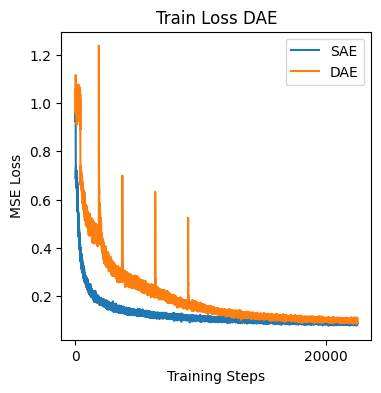

In [48]:
sae_train_loss_all = np.load('/home/david/mnist_models_test2/sae/1/' + 'all_train_losses.npy')
dae_train_loss_all = np.load('/home/david/mnist_models_test2/dae/1/' + 'all_train_losses.npy')

plt.figure(figsize=(4, 4))
plt.plot(np.concatenate(sae_train_loss_all)[:22500], label='SAE')
plt.plot(np.concatenate(dae_train_loss_all)[:22500], label='DAE')
plt.legend()
plt.xticks([0, 20000])
# plt.yticks([0, 0.1])
plt.xlabel('Training Steps')
plt.ylabel('MSE Loss')
plt.title('Train Loss DAE')

Text(0.5, 1.0, 'Train Loss DAE')

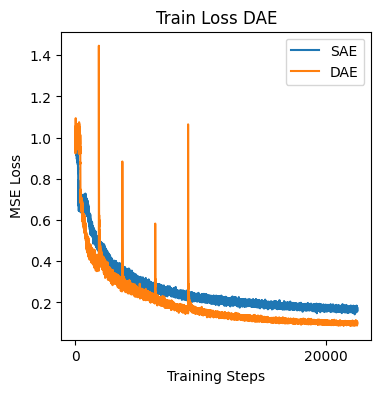

In [30]:
sae_train_loss_all = np.load('/home/david/mnist_models_test2/sae/1/' + 'all_train_losses.npy')
dae_train_loss_all = np.load('/home/david/mnist_models_test2/dae/1/' + 'all_train_losses.npy')

plt.figure(figsize=(4, 4))
plt.plot(np.concatenate(sae_train_loss_all), label='SAE')
plt.plot(np.concatenate(dae_train_loss_all), label='DAE')
plt.legend()
plt.xticks([0, 20000])
# plt.yticks([0, 0.1])
plt.xlabel('Training Steps')
plt.ylabel('MSE Loss')
plt.title('Train Loss DAE')

In [39]:
ae = NonLinearAutoencoder(n_input=784, n_hidden_ls=[512, 128, 32], n_layers=3)
ae.parameters

<bound method Module.parameters of NonLinearAutoencoder(
  (encoder): Sequential(
    (encoder_1): Linear(in_features=784, out_features=512, bias=True)
    (activation_1): ReLU()
    (encoder_2): Linear(in_features=512, out_features=128, bias=True)
    (activation_2): ReLU()
    (encoder_3): Linear(in_features=128, out_features=32, bias=True)
    (activation_3): ReLU()
  )
  (decoder): Sequential(
    (decoder_1): Linear(in_features=32, out_features=128, bias=True)
    (activation_1): ReLU()
    (decoder_2): Linear(in_features=128, out_features=512, bias=True)
    (activation_2): ReLU()
    (decoder_3): Linear(in_features=512, out_features=784, bias=True)
  )
)>

In [16]:
sae_loss = 0
dae_loss = 0
for i in range(4):
    losses = np.load(f'/home/david/mnist_models/sae/{i}/' + 'all_train_losses.npy')
    # Average loss in the last training epoch
    last_loss = np.mean(losses[-1])
    sae_loss += last_loss

    losses = np.load(f'/home/david/mnist_models/dae/{i}/' + 'all_train_losses.npy')
    # Average loss in the last training epoch
    last_loss = np.mean(losses[-1])
    dae_loss += last_loss

print(f"SAE average loss: {sae_loss/4}")
print(f"DAE average loss: {dae_loss/4}")

SAE average loss: 0.0967146187722683
DAE average loss: 0.10149728921552498


In [17]:
sae_loss = 0
dae_loss = 0
for i in range(4):
    losses = np.load(f'/home/david/mnist_test_model/sae/{i}/' + 'all_train_losses.npy')
    # Average loss in the last training epoch
    last_loss = np.mean(losses[-1])
    sae_loss += last_loss

    losses = np.load(f'/home/david/mnist_test_model/dae/{i}/' + 'all_train_losses.npy')
    # Average loss in the last training epoch
    last_loss = np.mean(losses[-1])
    dae_loss += last_loss

print(f"SAE average loss: {sae_loss/4}")
print(f"DAE average loss: {dae_loss/4}")

SAE average loss: 0.09910775635143121
DAE average loss: 0.10584552926321825


In [44]:
sae_loss = 0
dae_loss = 0
for i in range(2):
    losses = np.load(f'/home/david/mnist_models_test2/sae/{i}/' + 'all_train_losses.npy')
    # Average loss in the last training epoch
    last_loss = np.mean(losses[-1])
    sae_loss += last_loss

    losses = np.load(f'/home/david/mnist_models_test2/dae/{i}/' + 'all_train_losses.npy')
    # Average loss in the last training epoch
    last_loss = np.mean(losses[-1])
    dae_loss += last_loss

print(f"SAE average loss: {sae_loss/2}")
print(f"DAE average loss: {dae_loss/2}")

SAE average loss: 0.08424708408117294
DAE average loss: 0.08723582978049914


In [31]:
sae_loss = 0
dae_loss = 0
for i in range(2):
    losses = np.load(f'/home/david/mnist_models_test2/sae/{i}/' + 'all_train_losses.npy')
    # Average loss in the last training epoch
    last_loss = np.mean(losses[-1])
    sae_loss += last_loss

    losses = np.load(f'/home/david/mnist_models_test2/dae/{i}/' + 'all_train_losses.npy')
    # Average loss in the last training epoch
    last_loss = np.mean(losses[-1])
    dae_loss += last_loss

print(f"SAE average loss: {sae_loss/2}")
print(f"DAE average loss: {dae_loss/2}")

SAE average loss: 0.1653087358077367
DAE average loss: 0.09664378198981285


In [41]:
num_models = 2

sae_test_loss = 0
dae_test_loss = 0

for i in range(num_models):
    sae_model = load_model(f'/home/david/mnist_models_test2/sae/{i}', 'SAE', 49)
    dae_model = load_model(f'/home/david/mnist_models_test2/dae/{i}', 'DAE', 49)

    sae_model.eval()
    dae_model.eval()

    test_loss, _, _ = test(sae_model, test_loader, device=torch.device('cpu'))
    sae_test_loss += test_loss
    test_loss, _, _ = test(dae_model, test_loader, device=torch.device('cpu'))
    dae_test_loss += test_loss

sae_test_loss /= num_models
dae_test_loss /= num_models

print("SAE Test Loss: ", sae_test_loss)
print("DAE Test Loss: ", dae_test_loss)

/tmp/ipykernel_177223/1155741500.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(f"{model_path}/model_weights_epoch{epoch}.pth")


====> Test set loss: 0.0937
====> Test set loss: 0.0998
====> Test set loss: 0.0925
====> Test set loss: 0.1040
SAE Test Loss:  0.0931234350781652
DAE Test Loss:  0.10191665773716155


In [15]:
num_models = 4

sae_test_loss = 0
dae_test_loss = 0

for i in range(num_models):
    sae_model = load_model(f'/home/david/mnist_test_model/sae/{i}', 'SAE', 49)
    dae_model = load_model(f'/home/david/mnist_test_model/dae/{i}', 'DAE', 49)

    sae_model.eval()
    dae_model.eval()

    test_loss, _, _ = test(sae_model, test_loader, device=torch.device('cpu'))
    sae_test_loss += test_loss
    test_loss, _, _ = test(dae_model, test_loader, device=torch.device('cpu'))
    dae_test_loss += test_loss

sae_test_loss /= num_models
dae_test_loss /= num_models

print("SAE Test Loss: ", sae_test_loss)
print("DAE Test Loss: ", dae_test_loss)

/tmp/ipykernel_512025/2496817223.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(f"{model_path}/model_weights_epoch{epoch}.pth")


====> Test set loss: 0.0950
====> Test set loss: 0.1046
====> Test set loss: 0.0928
====> Test set loss: 0.0999
====> Test set loss: 0.1055
====> Test set loss: 0.1108
====> Test set loss: 0.1058
====> Test set loss: 0.1098
SAE Test Loss:  0.09976207943562465
DAE Test Loss:  0.1062854812067898


In [12]:
num_models = 4

sae_test_loss = 0
dae_test_loss = 0

for i in range(num_models):
    sae_model = load_model(f'/home/david/mnist_test_model/sae/{i}', 'SAE', 49)
    dae_model = load_model(f'/home/david/mnist_test_model/dae/{i}', 'DAE', 49)

    sae_model.eval()
    dae_model.eval()

    test_loss, _, _ = test(sae_model, test_loader, device=torch.device('cpu'))
    sae_test_loss += test_loss
    test_loss, _, _ = test(dae_model, test_loader, device=torch.device('cpu'))
    dae_test_loss += test_loss

sae_test_loss /= num_models
dae_test_loss /= num_models

print("SAE Test Loss: ", sae_test_loss)
print("DAE Test Loss: ", dae_test_loss)

/tmp/ipykernel_19978/2496817223.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(f"{model_path}/model_weights_epoch{epoch}.pth")


====> Test set loss: 0.2262
====> Test set loss: 0.2505
====> Test set loss: 0.2258
====> Test set loss: 0.2518
====> Test set loss: 0.2222
====> Test set loss: 0.2539
====> Test set loss: 0.2267
====> Test set loss: 0.2574
SAE Test Loss:  0.22519178509334975
DAE Test Loss:  0.25341658676161044


In [16]:
ae.parameters

<bound method Module.parameters of NonLinearAutoencoder(
  (encoder): Sequential(
    (encoder_1): Linear(in_features=784, out_features=512, bias=True)
    (activation_1): ReLU()
    (dropout_1): Dropout(p=0.2, inplace=False)
    (encoder_2): Linear(in_features=512, out_features=128, bias=True)
    (activation_2): ReLU()
    (dropout_2): Dropout(p=0.2, inplace=False)
    (encoder_3): Linear(in_features=128, out_features=32, bias=True)
    (activation_3): ReLU()
  )
  (decoder): Sequential(
    (decoder_1): Linear(in_features=32, out_features=128, bias=True)
    (activation_1): ReLU()
    (dropout_1): Dropout(p=0.2, inplace=False)
    (decoder_2): Linear(in_features=128, out_features=512, bias=True)
    (activation_2): ReLU()
    (dropout_2): Dropout(p=0.2, inplace=False)
    (decoder_3): Linear(in_features=512, out_features=784, bias=True)
    (dropout_3): Dropout(p=0.2, inplace=False)
  )
)>

In [15]:
sample_sae_model = load_model(f'/home/david/mnist_models/sae/0', 'SAE', 49)
sample_dae_model = load_model(f'/home/david/mnist_models/dae/0', 'DAE', 49)

/tmp/ipykernel_123796/2496817223.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(f"{model_path}/model_weights_epoch{epoch}.pth")


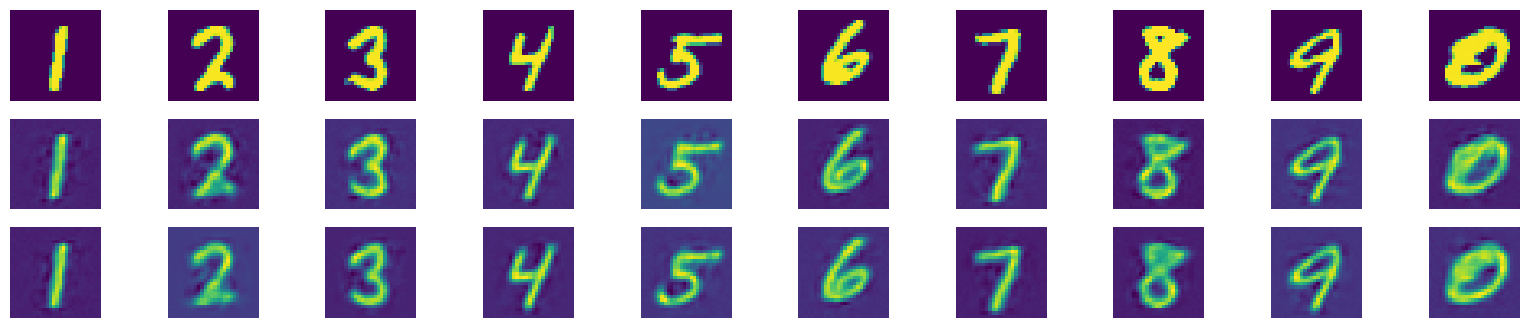

In [46]:
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(3,10,i+1)
    plt.imshow(test[i][0])
    plt.axis('off')

    plt.subplot(3,10,i+11)
    _, decoded = sample_sae_model(test[i][0].view(-1))
    plt.imshow(decoded.reshape(28, 28).detach().numpy())
    plt.axis('off')

    plt.subplot(3,10,i+21)
    _, decoded = sample_dae_model(test[i][0].view(-1))
    plt.imshow(decoded.reshape(28, 28).detach().numpy())
    plt.axis('off')

plt.show()